In [1]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
# data = pd.read_csv('simulation_data.csv')
data = pd.read_csv('data/run_30413/run_30413_labelled_tails.csv')
data.head()

,#Ch.#,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,E(k4),k5,E(k5),k6,E(k6),Chi2/DOF,integral_R,max_deviation,class
0,1,5.014668,0.008637,88813.00258,1574.470,2.185990,0.010328,0.958992,0.017475,1.248665,0.024367,0.065162,3.971222e-03,0.066870,4.085170e-03,11.788794,-310.660036,-25.730102,c1
1,5,5.027961,0.008432,89118.75734,298.836,2.163617,0.009578,0.990102,0.015362,1.285738,0.022480,0.027013,1.080916e-02,0.027301,1.087349e-02,9.229203,-137.513352,-9.011581,c1
2,6,5.025032,0.008807,89401.56098,1577.360,2.252891,0.010268,0.967520,0.016561,1.246196,0.023000,0.029420,3.432170e-03,0.030555,3.514271e-03,7.523369,-512.475697,-24.754859,c1
3,9,5.015114,0.008383,88852.85358,4856.830,2.179301,0.009825,0.951252,0.013167,1.242426,0.020734,-0.178756,4.449393e-07,-0.178756,4.455861e-07,8.138368,-6.032877,-5.766407,c1
4,11,5.040750,0.008590,88556.38748,571.131,2.184355,0.010283,1.020078,0.021741,1.307345,0.028292,0.022602,1.684398e-03,0.025840,1.807494e-03,4.509772,-1595.153796,-55.495744,c1


In [3]:
data.columns

Index(['#Ch.#', 't', 'E(t)', 'A_0', 'E(A_0)', 't_p', 'E(t_p)', 'k3', 'E(k3)',
       'k4', 'E(k4)', 'k5', 'E(k5)', 'k6', 'E(k6)', 'Chi2/DOF', 'integral_R',
       'max_deviation', 'class'],
      dtype='object')

In [4]:
def one_hot_encode_sklearn(data, column_name):
    """
    One-hot encode using scikit-learn's OneHotEncoder.
    
    Parameters:
    data (pandas.DataFrame): Input DataFrame
    column_name (str): Name of the column to encode
    
    Returns:
    pandas.DataFrame: DataFrame with one-hot encoded column
    """
    # Reshape data for encoder
    X = data[column_name].values.reshape(-1, 1)
    
    # Create and fit the encoder
    encoder = OneHotEncoder(sparse_output=False)
    encoded = encoder.fit_transform(X)
    
    # Create new column names
    feature_names = encoder.get_feature_names_out([column_name])

    print(encoded)
    print(feature_names)
    # Create DataFrame with encoded values
    encoded_df = pd.DataFrame(encoded, columns=feature_names, index=data.index)
    
    # Combine with original data
    result = pd.concat([data.drop(column_name, axis=1), encoded_df], axis=1)
    
    return result

In [5]:
encoded_df = one_hot_encode_sklearn(data=data, column_name='class')

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
['class_c1' 'class_c2' 'class_c3' 'class_c4']


In [6]:
encoded_df

,#Ch.#,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,...,E(k5),k6,E(k6),Chi2/DOF,integral_R,max_deviation,class_c1,class_c2,class_c3,class_c4
0,1,5.014668,0.008637,88813.00258,1574.470,2.185990,0.010328,0.958992,0.017475,1.248665,...,3.971222e-03,0.066870,4.085170e-03,11.788794,-310.660036,-25.730102,1.0,0.0,0.0,0.0
1,5,5.027961,0.008432,89118.75734,298.836,2.163617,0.009578,0.990102,0.015362,1.285738,...,1.080916e-02,0.027301,1.087349e-02,9.229203,-137.513352,-9.011581,1.0,0.0,0.0,0.0
2,6,5.025032,0.008807,89401.56098,1577.360,2.252891,0.010268,0.967520,0.016561,1.246196,...,3.432170e-03,0.030555,3.514271e-03,7.523369,-512.475697,-24.754859,1.0,0.0,0.0,0.0
3,9,5.015114,0.008383,88852.85358,4856.830,2.179301,0.009825,0.951252,0.013167,1.242426,...,4.449393e-07,-0.178756,4.455861e-07,8.138368,-6.032877,-5.766407,1.0,0.0,0.0,0.0
4,11,5.040750,0.008590,88556.38748,571.131,2.184355,0.010283,1.020078,0.021741,1.307345,...,1.684398e-03,0.025840,1.807494e-03,4.509772,-1595.153796,-55.495744,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,10223,5.030455,0.008372,78969.22525,461.390,2.088329,0.007170,0.387340,0.004484,0.537982,...,4.484087e-03,0.296215,2.142928e-03,4.699773,277.972982,39.355436,0.0,0.0,0.0,1.0
10236,10224,5.081329,0.009629,83548.37431,1753.900,2.195073,0.016421,1.624984,0.135674,1.869724,...,5.959105e-03,0.053016,5.882263e-03,6.174783,207.781507,10.666710,0.0,0.0,0.0,1.0
10237,10226,5.105504,0.009342,75059.88015,451.101,2.103103,0.007255,0.029225,0.002810,0.016374,...,2.532061e-03,0.016458,2.603118e-03,7.309111,1029.575895,67.949146,0.0,0.0,0.0,1.0
10238,10227,5.041171,0.009047,78695.14070,651.389,2.074962,0.010799,0.637336,0.056500,0.697428,...,3.934225e-03,0.086531,3.532014e-03,3.646716,727.620813,47.560914,0.0,0.0,0.0,1.0


In [7]:
import xgboost as xgb
from xgboost import XGBRegressor  # for regression
from xgboost import XGBClassifier # for classification
from sklearn.model_selection import train_test_split


# Prepare your data
targets = ['class_c1', 'class_c2', 'class_c3', 'class_c4']


X = encoded_df[['A_0', 't_p', 'k3', 'k4', 'k5', 'k6']]
y = encoded_df[targets]

# First split: separate test set (20% of total data)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, 
    test_size=0.2, # 20% for testing
    random_state=42
)

# Second split: divide remaining data into train and validation (80% train, 20% validation of remaining data)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.2, # 20% of the X_temp for validation ==> 16% for validation and 64% for training
    random_state=42
)

In [8]:
print('Total entries in the data = ', len(data))

Total entries in the data =  10240


In [108]:
train_df = pd.concat([X_train, y_train], axis=1)
train_df.head()

,A_0,t_p,k3,k4,k5,k6,class_c1,class_c2,class_c3,class_c4
326,87889.51831,2.212453,1.108149,1.402928,4.742759e-02,4.876779e-02,1.0,0.0,0.0,0.0
699,87309.56047,2.207926,1.179487,1.472946,8.558557e-02,9.176157e-02,1.0,0.0,0.0,0.0
5105,82213.71916,2.251809,1.397038,2.343816,4.912223e+06,3.572055e+06,0.0,0.0,1.0,0.0
557,76847.68774,2.042505,0.073172,0.086533,2.968407e-02,2.760504e-02,1.0,0.0,0.0,0.0
3075,86962.14219,2.129464,1.251511,1.564821,6.441552e-02,6.399724e-02,1.0,0.0,0.0,0.0


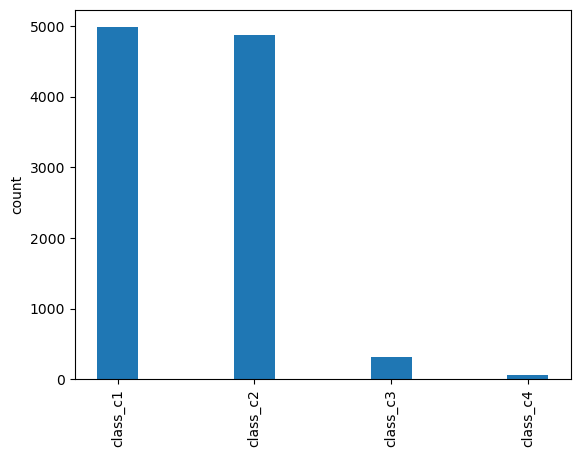

In [109]:
class_counts = data['class'].value_counts()

plt.figure()
plt.bar(range(len(class_counts)), class_counts.values, width=0.3)
plt.ylabel('count')
# plt.xticks(range(len(class_counts)), ['Overshoot', 'Undershoot', 'Ideal', 'Singularity', 'Abnormal'])
plt.xticks(range(len(class_counts)), targets, rotation=90)
plt.show()

In [110]:
# Convert to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    # 'max_depth': 3,
    # 'learning_rate': 0.1,
    'learning_rate': 0.1, 'max_depth': 3,
    'objective': 'binary:logistic',  # for classification
    'eval_metric': 'logloss',
    'tree_method' : 'gpu_hist'
}

# Specify evaluation sets
evals = [(dtrain, 'train'), (dval, 'validation')]

# Train model
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    # num_boost_round = 200,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=True
)

[0]	train-logloss:0.50491	validation-logloss:0.50372
[1]	train-logloss:0.45918	validation-logloss:0.45710


[2]	train-logloss:0.42221	validation-logloss:0.41963
[3]	train-logloss:0.39186	validation-logloss:0.38861
[4]	train-logloss:0.36617	validation-logloss:0.36248
[5]	train-logloss:0.34483	validation-logloss:0.34054
[6]	train-logloss:0.32664	validation-logloss:0.32204
[7]	train-logloss:0.31012	validation-logloss:0.30563
[8]	train-logloss:0.29607	validation-logloss:0.29163
[9]	train-logloss:0.28383	validation-logloss:0.27936
[10]	train-logloss:0.27157	validation-logloss:0.26692
[11]	train-logloss:0.26140	validation-logloss:0.25658
[12]	train-logloss:0.25263	validation-logloss:0.24771
[13]	train-logloss:0.24333	validation-logloss:0.23864
[14]	train-logloss:0.23537	validation-logloss:0.23099
[15]	train-logloss:0.22855	validation-logloss:0.22410
[16]	train-logloss:0.22217	validation-logloss:0.21787
[17]	train-logloss:0.21700	validation-logloss:0.21286
[18]	train-logloss:0.21174	validation-logloss:0.20776
[19]	train-logloss:0.20702	validation-logloss:0.20330
[20]	train-logloss:0.20270	validatio

KeyboardInterrupt: 

----------
### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# # Create a custom callback for learning rate decay
# def learning_rate_decay(boosting_round, decay_factor=0.5):
#     def callback(env):
#         if (env.iteration + 1) == boosting_round:
#             # Get current learning rate
#             old_lr = env.model.get_params()['learning_rate']
#             # Set new learning rate
#             new_lr = old_lr * decay_factor
#             env.model.set_params(learning_rate=new_lr)
#             print(f"Learning rate decreased from {old_lr} to {new_lr}")
#     return callback

# # Set parameters
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7],
    # 'max_depth' : [6],
    'learning_rate': [0.1, 0.05],
    # 'learning_rate' : [0.1],
    'num_boost_round' : [100, 200],
    # 'num_boost_round' : [100],
    'n_estimators': [50, 70, 90, 100, 110, 120, 200],
    # 'n_estimators' : [90],
    # 'n_estimators': [100, 120, 200],
    'objective': ['binary:logistic'],  # for classification
    'eval_metric': ['logloss'],
    'tree_method' : ['gpu_hist']
}

# xgb_wrapper = XGBTrainWrapper()
# grid_search = GridSearchCV(estimator=xgb_wrapper, 
#                            param_grid=param_grid, 
#                            scoring='accuracy', cv=3,
#                            verbose=2,
#                            )
# grid_search.fit(X_temp, y_temp)

xgb_clf = XGBClassifier(
    tree_method = 'gpu_hist',
    enable_categorical=True,
    use_label_encoder = True,
)

# callbacks = [
#     learning_rate_decay(boosting_round=50, decay_factor=np.exp(-1))
# ]

grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# grid_search.fit(X_train, y_train,
#                 eval_set=[(X_val, y_val)],
#                 # early_stopping_round=10,
#                 callbacks=callbacks,
#                 verbose=False)
grid_search.fit(
    X_train, 
    y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)

Fitting 3 folds for each of 168 candidates, totalling 504 fits


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[0]	validation_0-logloss:0.50730
[1]	validation_0-logloss:0.46765
[2]	validation_0-logloss:0.43472
[0]	validation_0-logloss:0.50730
[0]	validation_0-logloss:0.50730
[3]	validation_0-logloss:0.40860
[1]	validation_0-logloss:0.46765
[1]	validation_0-logloss:0.46765
[4]	validation_0-logloss:0.38711
[2]	validation_0-logloss:0.43472
[2]	validation_0-logloss:0.43472
[5]	validation_0-logloss:0.36812
[3]	validation_0-logloss:0.40860
[3]	validation_0-logloss:0.40860
[6]	validation_0-logloss:0.35087
[4]	validation_0-logloss:0.38711
[7]	validation_0-logloss:0.33459
[0]	validation_0-logloss:0.51326
[4]	validation_0-logloss:0.38711
[5]	validation_0-logloss:0.36812


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	validation_0-logloss:0.32036
[1]	validation_0-logloss:0.47342
[6]	validation_0-logloss:0.35087
[5]	validation_0-logloss:0.36812
[9]	validation_0-logloss:0.30985
[7]	validation_0-logloss:0.33459[6]	validation_0-logloss:0.35087

[2]	validation_0-logloss:0.44071
[0]	validation_0-logloss:0.51298
[10]	validation_0-logloss:0.29781
[7]	validation_0-logloss:0.33459
[8]	validation_0-logloss:0.32036
[0]	validation_0-logloss:0.51298
[0]	validation_0-logloss:0.51298
[1]	validation_0-logloss:0.47356
[0]	validation_0-logloss:0.51298
[8]	validation_0-logloss:0.32036
[11]	validation_0-logloss:0.28866
[0]	validation_0-logloss:0.51326
[0]	validation_0-logloss:0.51326
[0]	validation_0-logloss:0.51298
[9]	validation_0-logloss:0.30985
[1]	validation_0-logloss:0.47356
[1]	validation_0-logloss:0.47356[3]	validation_0-logloss:0.41607

[2]	validation_0-logloss:0.44339
[1]	validation_0-logloss:0.47356
[0]	validation_0-logloss:0.50730
[12]	validation_0-logloss:0.27956
[1]	validation_0-logloss:0.47342
[9]	val

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning w

[40]	validation_0-logloss:0.18844
[40]	validation_0-logloss:0.19055
[47]	validation_0-logloss:0.18489
[40]	validation_0-logloss:0.19055
[38]	validation_0-logloss:0.19284
[40]	validation_0-logloss:0.18844
[39]	validation_0-logloss:0.19131
[36]	validation_0-logloss:0.19582
[41]	validation_0-logloss:0.18763
[41]	validation_0-logloss:0.18763
[49]	validation_0-logloss:0.18365
[40]	validation_0-logloss:0.18844
[37]	validation_0-logloss:0.19428
[42]	validation_0-logloss:0.18787
[39]	validation_0-logloss:0.19131
[41]	validation_0-logloss:0.18763
[41]	validation_0-logloss:0.18912
[48]	validation_0-logloss:0.18446
[41]	validation_0-logloss:0.18912
[39]	validation_0-logloss:0.19149
[41]	validation_0-logloss:0.18763
[40]	validation_0-logloss:0.19055
[37]	validation_0-logloss:0.19428
[42]	validation_0-logloss:0.18701
[42]	validation_0-logloss:0.18701
[50]	validation_0-logloss:0.18296
[41]	validation_0-logloss:0.18763
[38]	validation_0-logloss:0.19284
[43]	validation_0-logloss:0.18704
[42]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning w

[44]	validation_0-logloss:0.18607
[42]	validation_0-logloss:0.18883
[44]	validation_0-logloss:0.18561
[43]	validation_0-logloss:0.18704
[40]	validation_0-logloss:0.19055
[45]	validation_0-logloss:0.18452
[45]	validation_0-logloss:0.18452
[53]	validation_0-logloss:0.18084
[41]	validation_0-logloss:0.18992
[44]	validation_0-logloss:0.18561
[41]	validation_0-logloss:0.18912
[0]	validation_0-logloss:0.51326
[1]	validation_0-logloss:0.47356[45]	validation_0-logloss:0.18452
[45]	validation_0-logloss:0.18569
[46]	validation_0-logloss:0.18465

[45]	validation_0-logloss:0.18569
[43]	validation_0-logloss:0.18785
[45]	validation_0-logloss:0.18452
[44]	validation_0-logloss:0.18607
[41]	validation_0-logloss:0.18992
[46]	validation_0-logloss:0.18406
[46]	validation_0-logloss:0.18406
[54]	validation_0-logloss:0.18055
[42]	validation_0-logloss:0.18883
[45]	validation_0-logloss:0.18452
[1]	validation_0-logloss:0.47342
[42]	validation_0-logloss:0.18787
[46]	validation_0-logloss:0.18406
[46]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning w

[46]	validation_0-logloss:0.18465
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=50, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=   6.4s
[48]	validation_0-logloss:0.18446
[6]	validation_0-logloss:0.35342
[50]	validation_0-logloss:0.18074
[50]	validation_0-logloss:0.18122
[46]	validation_0-logloss:0.18565
[49]	validation_0-logloss:0.18194
[51]	validation_0-logloss:0.18021
[59]	validation_0-logloss:0.17730
[6]	validation_0-logloss:0.35538
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=50, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=   6.4s
[47]	validation_0-logloss:0.18489
[51]	validation_0-logloss:0.18021
[51]	validation_0-logloss:0.18052
[47]	validation_0-logloss:0.18343
[49]	validation_0-logloss:0.18365
[0]	validation_0-logloss:0.50730
[7]	validation_0-logloss:0.33624
[51]	validation_0-logloss:0.18021
[51]	validation_0-logloss:0.18052
[47]	validation_0-logl

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning w

[48]	validation_0-logloss:0.18265
[50]	validation_0-logloss:0.18296
[1]	validation_0-logloss:0.46765
[8]	validation_0-logloss:0.32122
[52]	validation_0-logloss:0.17918
[52]	validation_0-logloss:0.17988
[48]	validation_0-logloss:0.18446
[53]	validation_0-logloss:0.17871
[8]	validation_0-logloss:0.32324
[0]	validation_0-logloss:0.51326
[53]	validation_0-logloss:0.17871
[1]	validation_0-logloss:0.47356
[53]	validation_0-logloss:0.17916
[61]	validation_0-logloss:0.17639[51]	validation_0-logloss:0.18221

[2]	validation_0-logloss:0.43472
[49]	validation_0-logloss:0.18194
[9]	validation_0-logloss:0.30905
[53]	validation_0-logloss:0.17871
[9]	validation_0-logloss:0.31066
[1]	validation_0-logloss:0.47342
[53]	validation_0-logloss:0.17916[0]	validation_0-logloss:0.50730

[49]	validation_0-logloss:0.18365
[54]	validation_0-logloss:0.17816
[54]	validation_0-logloss:0.17839
[49]	validation_0-logloss:0.18365
[3]	validation_0-logloss:0.40860
[52]	validation_0-logloss:0.18153
[2]	validation_0-logloss:

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning w

[18]	validation_0-logloss:0.24262
[62]	validation_0-logloss:0.17371
[60]	validation_0-logloss:0.17684
[62]	validation_0-logloss:0.17371
[10]	validation_0-logloss:0.30031
[57]	validation_0-logloss:0.17874
[62]	validation_0-logloss:0.17374
[10]	validation_0-logloss:0.29762
[9]	validation_0-logloss:0.30985
[62]	validation_0-logloss:0.17374
[63]	validation_0-logloss:0.17321
[12]	validation_0-logloss:0.27956
[58]	validation_0-logloss:0.17802
[19]	validation_0-logloss:0.23745
[59]	validation_0-logloss:0.17566
[19]	validation_0-logloss:0.23782
[61]	validation_0-logloss:0.17639
[63]	validation_0-logloss:0.17321
[63]	validation_0-logloss:0.17321
[11]	validation_0-logloss:0.29060
[58]	validation_0-logloss:0.17802
[63]	validation_0-logloss:0.17325
[11]	validation_0-logloss:0.28805
[10]	validation_0-logloss:0.29781[0]	validation_0-logloss:0.51298

[64]	validation_0-logloss:0.17288
[63]	validation_0-logloss:0.17325
[13]	validation_0-logloss:0.27198
[59]	validation_0-logloss:0.17730
[20]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning w

[26]	validation_0-logloss:0.21407
[68]	validation_0-logloss:0.17324
[70]	validation_0-logloss:0.17003
[18]	validation_0-logloss:0.24262
[18]	validation_0-logloss:0.24205
[65]	validation_0-logloss:0.17407
[7]	validation_0-logloss:0.33624
[16]	validation_0-logloss:0.25129
[70]	validation_0-logloss:0.17040
[66]	validation_0-logloss:0.17380
[67]	validation_0-logloss:0.17140
[27]	validation_0-logloss:0.20978
[20]	validation_0-logloss:0.23230
[27]	validation_0-logloss:0.21123
[0]	validation_0-logloss:0.51326
[69]	validation_0-logloss:0.17286
[71]	validation_0-logloss:0.16974
[19]	validation_0-logloss:0.23782
[19]	validation_0-logloss:0.23745
[66]	validation_0-logloss:0.17380
[8]	validation_0-logloss:0.32122
[71]	validation_0-logloss:0.16998
[67]	validation_0-logloss:0.17347
[17]	validation_0-logloss:0.24571
[68]	validation_0-logloss:0.17108
[28]	validation_0-logloss:0.20757
[21]	validation_0-logloss:0.22940
[28]	validation_0-logloss:0.20845
[0]	validation_0-logloss:0.50730
[0]	validation_0-l

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning w

[69]	validation_0-logloss:0.17286
[30]	validation_0-logloss:0.20407
[2]	validation_0-logloss:0.43472
[2]	validation_0-logloss:0.44339
[3]	validation_0-logloss:0.41607
[72]	validation_0-logloss:0.17165
[74]	validation_0-logloss:0.16832
[23]	validation_0-logloss:0.22272
[22]	validation_0-logloss:0.22631
[22]	validation_0-logloss:0.22556
[69]	validation_0-logloss:0.17286
[11]	validation_0-logloss:0.28805
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=70, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=   8.9s
[31]	validation_0-logloss:0.20176
[20]	validation_0-logloss:0.23230
[74]	validation_0-logloss:0.16883
[3]	validation_0-logloss:0.41682
[4]	validation_0-logloss:0.39402
[73]	validation_0-logloss:0.17107
[75]	validation_0-logloss:0.16771
[31]	validation_0-logloss:0.20234
[3]	validation_0-logloss:0.40860
[23]	validation_0-logloss:0.22236
[70]	validation_0-logloss:0.17203
[12]	validation_0-logloss:0.28037
[23]	validation_0-logl

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[4]	validation_0-logloss:0.39042
[5]	validation_0-logloss:0.37569
[74]	validation_0-logloss:0.17043
[32]	validation_0-logloss:0.20023
[76]	validation_0-logloss:0.16739
[4]	validation_0-logloss:0.38711
[13]	validation_0-logloss:0.27211
[24]	validation_0-logloss:0.21921
[75]	validation_0-logloss:0.16841
[24]	validation_0-logloss:0.21787
[71]	validation_0-logloss:0.17182
[1]	validation_0-logloss:0.47342
[25]	validation_0-logloss:0.21693
[33]	validation_0-logloss:0.19793
[0]	validation_0-logloss:0.50730
[22]	validation_0-logloss:0.22599
[5]	validation_0-logloss:0.37251
[6]	validation_0-logloss:0.35538
[75]	validation_0-logloss:0.17002
[33]	validation_0-logloss:0.19896
[5]	validation_0-logloss:0.36812
[14]	validation_0-logloss:0.26553
[25]	validation_0-logloss:0.21668
[76]	validation_0-logloss:0.16781
[25]	validation_0-logloss:0.21481
[72]	validation_0-logloss:0.17165
[77]	validation_0-logloss:0.16701[2]	validation_0-logloss:0.44071

[26]	validation_0-logloss:0.21438
[34]	validation_0-loglo

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning w

[40]	validation_0-logloss:0.19055
[15]	validation_0-logloss:0.25746
[48]	validation_0-logloss:0.18242
[37]	validation_0-logloss:0.19428
[20]	validation_0-logloss:0.23230
[40]	validation_0-logloss:0.19055
[40]	validation_0-logloss:0.18844
[48]	validation_0-logloss:0.18265
[29]	validation_0-logloss:0.20551
[21]	validation_0-logloss:0.23092
[17]	validation_0-logloss:0.24866
[0]	validation_0-logloss:0.51298
[20]	validation_0-logloss:0.23403
[87]	validation_0-logloss:0.16635
[41]	validation_0-logloss:0.18992
[16]	validation_0-logloss:0.25129
[38]	validation_0-logloss:0.19284
[49]	validation_0-logloss:0.18128
[21]	validation_0-logloss:0.22940
[0]	validation_0-logloss:0.51326
[41]	validation_0-logloss:0.18912
[41]	validation_0-logloss:0.18763
[49]	validation_0-logloss:0.18194
[30]	validation_0-logloss:0.20362
[18]	validation_0-logloss:0.24262
[22]	validation_0-logloss:0.22631
[1]	validation_0-logloss:0.47356
[0]	validation_0-logloss:0.50730
[21]	validation_0-logloss:0.22859
[88]	validation_0-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning w

[23]	validation_0-logloss:0.22204
[44]	validation_0-logloss:0.18686
[19]	validation_0-logloss:0.23686
[3]	validation_0-logloss:0.41682
[41]	validation_0-logloss:0.18992
[52]	validation_0-logloss:0.17918
[24]	validation_0-logloss:0.21977
[44]	validation_0-logloss:0.18607
[44]	validation_0-logloss:0.18561
[52]	validation_0-logloss:0.17988
[33]	validation_0-logloss:0.19793
[3]	validation_0-logloss:0.41607
[21]	validation_0-logloss:0.23092
[25]	validation_0-logloss:0.21668
[3]	validation_0-logloss:0.40860
[24]	validation_0-logloss:0.21787
[20]	validation_0-logloss:0.23230
[4]	validation_0-logloss:0.39042
[45]	validation_0-logloss:0.18638
[53]	validation_0-logloss:0.17871
[42]	validation_0-logloss:0.18883
[25]	validation_0-logloss:0.21693
[45]	validation_0-logloss:0.18569
[45]	validation_0-logloss:0.18452
[53]	validation_0-logloss:0.17916
[0]	validation_0-logloss:0.51298
[34]	validation_0-logloss:0.19589
[22]	validation_0-logloss:0.22631
[26]	validation_0-logloss:0.21407
[4]	validation_0-lo

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[80]	validation_0-logloss:0.16879
[81]	validation_0-logloss:0.16568
[81]	validation_0-logloss:0.16550
[89]	validation_0-logloss:0.16355
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=90, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=   9.9s
[70]	validation_0-logloss:0.17003
[61]	validation_0-logloss:0.17639
[56]	validation_0-logloss:0.17902
[62]	validation_0-logloss:0.17374
[59]	validation_0-logloss:0.17498
[58]	validation_0-logloss:0.17632
[40]	validation_0-logloss:0.19055
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=90, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=   9.6s
[41]	validation_0-logloss:0.18763
[36]	validation_0-logloss:0.19362
[79]	validation_0-logloss:0.16912
[40]	validation_0-logloss:0.19055
[81]	validation_0-logloss:0.16827
[82]	validation_0-logloss:0.16551
[82]	validation_0-logloss:0.16512
[71]	validation_0-logloss:0.16974
[62]	validation_0-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[98]	validation_0-logloss:0.16318
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=100, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  11.0s
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=100, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  11.0s
[60]	validation_0-logloss:0.17473
[18]	validation_0-logloss:0.24262
[0]	validation_0-logloss:0.51298
[54]	validation_0-logloss:0.17816
[80]	validation_0-logloss:0.16620
[80]	validation_0-logloss:0.16879
[78]	validation_0-logloss:0.16713
[89]	validation_0-logloss:0.16283
[79]	validation_0-logloss:0.16638
[18]	validation_0-logloss:0.24073
[76]	validation_0-logloss:0.16979
[60]	validation_0-logloss:0.17513
[59]	validation_0-logloss:0.17730
[99]	validation_0-logloss:0.16289
[19]	validation_0-logloss:0.23782
[1]	validation_0-logloss:0.47356
[55]	validation_0-logloss:0.17776
[61]	validation_0-logloss:0.17425
[81]	validation_0-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2

[0]	validation_0-logloss:0.50730
[20]	validation_0-logloss:0.23436
[2]	validation_0-logloss:0.44339
[56]	validation_0-logloss:0.17690
[62]	validation_0-logloss:0.17371
[82]	validation_0-logloss:0.16551
[82]	validation_0-logloss:0.16814
[80]	validation_0-logloss:0.16620
[91]	validation_0-logloss:0.16221
[20]	validation_0-logloss:0.23230
[81]	validation_0-logloss:0.16550
[78]	validation_0-logloss:0.16932
[0]	validation_0-logloss:0.51326
[62]	validation_0-logloss:0.17374
[61]	validation_0-logloss:0.17639
[1]	validation_0-logloss:0.46765
[21]	validation_0-logloss:0.23092
[3]	validation_0-logloss:0.41682
[57]	validation_0-logloss:0.17639
[63]	validation_0-logloss:0.17321
[83]	validation_0-logloss:0.16520
[83]	validation_0-logloss:0.16794
[81]	validation_0-logloss:0.16568
[92]	validation_0-logloss:0.16186
[21]	validation_0-logloss:0.22940
[82]	validation_0-logloss:0.16512
[79]	validation_0-logloss:0.16912
[63]	validation_0-logloss:0.17325
[62]	validation_0-logloss:0.17569
[1]	validation_0-lo

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[9]	validation_0-logloss:0.30985
[30]	validation_0-logloss:0.20407
[70]	validation_0-logloss:0.17203
[12]	validation_0-logloss:0.28037
[72]	validation_0-logloss:0.16921
[8]	validation_0-logloss:0.32122
[71]	validation_0-logloss:0.16998
[30]	validation_0-logloss:0.20491
[92]	validation_0-logloss:0.16296
[91]	validation_0-logloss:0.16221
[92]	validation_0-logloss:0.16460
[9]	validation_0-logloss:0.31066
[0]	validation_0-logloss:0.51326
[90]	validation_0-logloss:0.16322
[88]	validation_0-logloss:0.16605
[66]	validation_0-logloss:0.17205
[31]	validation_0-logloss:0.20234
[71]	validation_0-logloss:0.17182
[10]	validation_0-logloss:0.29781
[13]	validation_0-logloss:0.27211
[73]	validation_0-logloss:0.16864
[9]	validation_0-logloss:0.30905
[31]	validation_0-logloss:0.20314
[93]	validation_0-logloss:0.16241
[92]	validation_0-logloss:0.16186
[93]	validation_0-logloss:0.16450
[72]	validation_0-logloss:0.16945
[10]	validation_0-logloss:0.30031
[1]	validation_0-logloss:0.47342
[91]	validation_0-lo

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[38]	validation_0-logloss:0.19248
[78]	validation_0-logloss:0.16932
[20]	validation_0-logloss:0.23403
[80]	validation_0-logloss:0.16603
[17]	validation_0-logloss:0.24571
[16]	validation_0-logloss:0.25204
[100]	validation_0-logloss:0.16256
[99]	validation_0-logloss:0.15968
[8]	validation_0-logloss:0.32324
[98]	validation_0-logloss:0.16115
[17]	validation_0-logloss:0.24866
[96]	validation_0-logloss:0.16364
[74]	validation_0-logloss:0.16832
[79]	validation_0-logloss:0.16642
[38]	validation_0-logloss:0.19284
[79]	validation_0-logloss:0.16912
[39]	validation_0-logloss:0.19131
[21]	validation_0-logloss:0.22859
[81]	validation_0-logloss:0.16550
[18]	validation_0-logloss:0.24073
[17]	validation_0-logloss:0.24741
[101]	validation_0-logloss:0.16233
[100]	validation_0-logloss:0.15951
[9]	validation_0-logloss:0.31066
[99]	validation_0-logloss:0.16082
[18]	validation_0-logloss:0.24262
[97]	validation_0-logloss:0.16347
[0]	validation_0-logloss:0.50730
[75]	validation_0-logloss:0.16771
[80]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=110, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  11.9s
[88]	validation_0-logloss:0.16605
[48]	validation_0-logloss:0.18265
[46]	validation_0-logloss:0.18565
[30]	validation_0-logloss:0.20362
[90]	validation_0-logloss:0.16247
[26]	validation_0-logloss:0.21222
[27]	validation_0-logloss:0.21161
[109]	validation_0-logloss:0.15666
[18]	validation_0-logloss:0.24262
[27]	validation_0-logloss:0.21123
[106]	validation_0-logloss:0.16108
[108]	validation_0-logloss:0.15908
[9]	validation_0-logloss:0.30985
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=110, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  12.0s
[84]	validation_0-logloss:0.16452
[89]	validation_0-logloss:0.16355
[89]	validation_0-logloss:0.16581
[49]	validation_0-logloss:0.18194
[47]	validation_0-logloss:0.18489
[31]	validation_0-logloss:0.20176
[91]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[85]	validation_0-logloss:0.16410
[90]	validation_0-logloss:0.16322
[90]	validation_0-logloss:0.16544
[50]	validation_0-logloss:0.18122
[32]	validation_0-logloss:0.20010
[48]	validation_0-logloss:0.18446
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=110, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  11.8s
[28]	validation_0-logloss:0.20757
[20]	validation_0-logloss:0.23436
[29]	validation_0-logloss:0.20691
[29]	validation_0-logloss:0.20635[108]	validation_0-logloss:0.16034

[0]	validation_0-logloss:0.51326
[92]	validation_0-logloss:0.16186
[11]	validation_0-logloss:0.28866
[1]	validation_0-logloss:0.47356
[86]	validation_0-logloss:0.16371
[91]	validation_0-logloss:0.16312
[91]	validation_0-logloss:0.16496
[33]	validation_0-logloss:0.19793
[51]	validation_0-logloss:0.18052
[49]	validation_0-logloss:0.18365
[29]	validation_0-logloss:0.20551
[21]	validation_0-logloss:0.23092
[30]	validation_0-logloss:0.20491
[30]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[14]	validation_0-logloss:0.26543
[89]	validation_0-logloss:0.16283
[94]	validation_0-logloss:0.16437
[94]	validation_0-logloss:0.16212
[36]	validation_0-logloss:0.19362
[0]	validation_0-logloss:0.50350
[54]	validation_0-logloss:0.17839
[32]	validation_0-logloss:0.20010
[52]	validation_0-logloss:0.18153
[2]	validation_0-logloss:0.41760
[95]	validation_0-logloss:0.16097
[24]	validation_0-logloss:0.21921
[33]	validation_0-logloss:0.19976
[33]	validation_0-logloss:0.19896
[4]	validation_0-logloss:0.39402
[5]	validation_0-logloss:0.37251
[15]	validation_0-logloss:0.25746
[90]	validation_0-logloss:0.16247
[95]	validation_0-logloss:0.16192
[37]	validation_0-logloss:0.19185
[95]	validation_0-logloss:0.16398
[55]	validation_0-logloss:0.17780
[1]	validation_0-logloss:0.45699
[33]	validation_0-logloss:0.19793
[53]	validation_0-logloss:0.18084
[34]	validation_0-logloss:0.19819
[25]	validation_0-logloss:0.21668
[34]	validation_0-logloss:0.19759
[3]	validation_0-logloss:0.38672
[96]	validation_0-lo

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[51]	validation_0-logloss:0.18021
[48]	validation_0-logloss:0.18446
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=110, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  12.0s
[15]	validation_0-logloss:0.22579
[39]	validation_0-logloss:0.19131
[48]	validation_0-logloss:0.18265
[19]	validation_0-logloss:0.23782
[20]	validation_0-logloss:0.23403
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=110, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  12.1s
[30]	validation_0-logloss:0.20491
[67]	validation_0-logloss:0.17347
[105]	validation_0-logloss:0.15771
[70]	validation_0-logloss:0.17040
[48]	validation_0-logloss:0.18242[110]	validation_0-logloss:0.16004

[14]	validation_0-logloss:0.23132
[52]	validation_0-logloss:0.17918
[49]	validation_0-logloss:0.18365
[40]	validation_0-logloss:0.19055
[49]	validation_0-logloss:0.18194
[20]	validation_0-logloss:0.23436
[21]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[48]	validation_0-logloss:0.18265
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=120, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  13.0s
[58]	validation_0-logloss:0.17632
[5]	validation_0-logloss:0.33836
[39]	validation_0-logloss:0.19149
[29]	validation_0-logloss:0.20635
[58]	validation_0-logloss:0.17802
[5]	validation_0-logloss:0.34132
[77]	validation_0-logloss:0.16959
[80]	validation_0-logloss:0.16620
[29]	validation_0-logloss:0.20551
[22]	validation_0-logloss:0.19322
[114]	validation_0-logloss:0.15549
[24]	validation_0-logloss:0.18973
[58]	validation_0-logloss:0.17552
[62]	validation_0-logloss:0.17371
[49]	validation_0-logloss:0.18194
[59]	validation_0-logloss:0.17566
[40]	validation_0-logloss:0.19055
[30]	validation_0-logloss:0.20407
[6]	validation_0-logloss:0.31966
[59]	validation_0-logloss:0.17730
[81]	validation_0-logloss:0.16568
[30]	validation_0-logloss:0.20362
[78]	validation_0-logloss:0.16932
[115]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[63]	validation_0-logloss:0.17321
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=120, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  13.2s
[67]	validation_0-logloss:0.17143
[54]	validation_0-logloss:0.17839
[10]	validation_0-logloss:0.26578
[35]	validation_0-logloss:0.19636
[10]	validation_0-logloss:0.26791
[64]	validation_0-logloss:0.17493
[45]	validation_0-logloss:0.18638
[64]	validation_0-logloss:0.17273
[27]	validation_0-logloss:0.18106
[86]	validation_0-logloss:0.16431
[35]	validation_0-logloss:0.19468
[82]	validation_0-logloss:0.16814
[4]	validation_0-logloss:0.36304
[29]	validation_0-logloss:0.17979
[64]	validation_0-logloss:0.17288
[68]	validation_0-logloss:0.17117
[55]	validation_0-logloss:0.17780
[11]	validation_0-logloss:0.25648
[36]	validation_0-logloss:0.19550
[65]	validation_0-logloss:0.17407
[46]	validation_0-logloss:0.18565
[65]	validation_0-logloss:0.17237
[87]	validation_0-logloss:0.16407
[11]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[31]	validation_0-logloss:0.17672
[60]	validation_0-logloss:0.17473
[18]	validation_0-logloss:0.20856
[89]	validation_0-logloss:0.16581
[111]	validation_0-logloss:0.15864
[25]	validation_0-logloss:0.18535
[47]	validation_0-logloss:0.15735
[107]	validation_0-logloss:0.16083
[89]	validation_0-logloss:0.16355
[93]	validation_0-logloss:0.16177
[61]	validation_0-logloss:0.17448
[70]	validation_0-logloss:0.17203
[89]	validation_0-logloss:0.16283
[32]	validation_0-logloss:0.17303
[80]	validation_0-logloss:0.16620
[61]	validation_0-logloss:0.17425
[90]	validation_0-logloss:0.16544
[112]	validation_0-logloss:0.15842
[32]	validation_0-logloss:0.17541
[19]	validation_0-logloss:0.20480
[108]	validation_0-logloss:0.16034
[26]	validation_0-logloss:0.18326
[0]	validation_0-logloss:0.50207
[48]	validation_0-logloss:0.15670
[90]	validation_0-logloss:0.16322
[94]	validation_0-logloss:0.16131
[62]	validation_0-logloss:0.17374
[71]	validation_0-logloss:0.17182
[81]	validation_0-logloss:0.16568
[62]	valida

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:50:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[21]	validation_0-logloss:0.19684
[2]	validation_0-logloss:0.41760
[64]	validation_0-logloss:0.17273
[73]	validation_0-logloss:0.17107
[83]	validation_0-logloss:0.16520
[92]	validation_0-logloss:0.16186
[93]	validation_0-logloss:0.16450
[115]	validation_0-logloss:0.15745
[64]	validation_0-logloss:0.17288
[111]	validation_0-logloss:0.15972
[35]	validation_0-logloss:0.16928
[35]	validation_0-logloss:0.17150
[97]	validation_0-logloss:0.16043
[65]	validation_0-logloss:0.17237
[74]	validation_0-logloss:0.17043
[29]	validation_0-logloss:0.17719
[93]	validation_0-logloss:0.16241
[22]	validation_0-logloss:0.19368
[3]	validation_0-logloss:0.38672
[84]	validation_0-logloss:0.16476
[93]	validation_0-logloss:0.16177
[94]	validation_0-logloss:0.16437
[116]	validation_0-logloss:0.15709
[65]	validation_0-logloss:0.17234
[112]	validation_0-logloss:0.15934
[36]	validation_0-logloss:0.16816
[0]	validation_0-logloss:0.50350
[98]	validation_0-logloss:0.15988
[75]	validation_0-logloss:0.17002
[66]	validati

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[33]	validation_0-logloss:0.17102
[7]	validation_0-logloss:0.30330
[39]	validation_0-logloss:0.16552
[79]	validation_0-logloss:0.16912
[70]	validation_0-logloss:0.17040
[98]	validation_0-logloss:0.16115
[98]	validation_0-logloss:0.15988
[99]	validation_0-logloss:0.16289
[102]	validation_0-logloss:0.15888
[89]	validation_0-logloss:0.16355
[117]	validation_0-logloss:0.15848
[70]	validation_0-logloss:0.17003
[0]	validation_0-logloss:0.50342
[40]	validation_0-logloss:0.16672
[80]	validation_0-logloss:0.16879
[27]	validation_0-logloss:0.18139
[71]	validation_0-logloss:0.16998
[8]	validation_0-logloss:0.28890
[34]	validation_0-logloss:0.16980
[99]	validation_0-logloss:0.16082
[99]	validation_0-logloss:0.15968
[100]	validation_0-logloss:0.16256
[4]	validation_0-logloss:0.36304
[103]	validation_0-logloss:0.15853
[40]	validation_0-logloss:0.16483
[90]	validation_0-logloss:0.16322
[118]	validation_0-logloss:0.15820
[71]	validation_0-logloss:0.16974
[1]	validation_0-logloss:0.45716
[41]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[73]	validation_0-logloss:0.16864
[83]	validation_0-logloss:0.16794
[102]	validation_0-logloss:0.15888
[103]	validation_0-logloss:0.16165
[74]	validation_0-logloss:0.16883
[102]	validation_0-logloss:0.16014
[3]	validation_0-logloss:0.38908
[106]	validation_0-logloss:0.15750
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=120, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  13.3s
[93]	validation_0-logloss:0.16241
[43]	validation_0-logloss:0.16425
[11]	validation_0-logloss:0.25648
[37]	validation_0-logloss:0.16611
[7]	validation_0-logloss:0.30682
[43]	validation_0-logloss:0.16243
[74]	validation_0-logloss:0.16832
[84]	validation_0-logloss:0.16761
[103]	validation_0-logloss:0.15853
[104]	validation_0-logloss:0.16141
[75]	validation_0-logloss:0.16841
[103]	validation_0-logloss:0.16006
[29]	validation_0-logloss:0.17774[107]	validation_0-logloss:0.15720
[94]	validation_0-logloss:0.16212

[4]	validation_0-logloss:0.36342
[44]	valid

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[83]	validation_0-logloss:0.16474
[19]	validation_0-logloss:0.20628
[45]	validation_0-logloss:0.15872
[93]	validation_0-logloss:0.16450
[113]	validation_0-logloss:0.15915
[84]	validation_0-logloss:0.16476
[116]	validation_0-logloss:0.15506
[103]	validation_0-logloss:0.16006
[15]	validation_0-logloss:0.22478
[111]	validation_0-logloss:0.15864
[112]	validation_0-logloss:0.15597
[36]	validation_0-logloss:0.16816
[5]	validation_0-logloss:0.33836
[12]	validation_0-logloss:0.24892
[84]	validation_0-logloss:0.16452
[114]	validation_0-logloss:0.15897[94]	validation_0-logloss:0.16437

[85]	validation_0-logloss:0.16463
[20]	validation_0-logloss:0.20212
[117]	validation_0-logloss:0.15483
[104]	validation_0-logloss:0.15978
[112]	validation_0-logloss:0.15842
[46]	validation_0-logloss:0.15821
[16]	validation_0-logloss:0.21848
[113]	validation_0-logloss:0.15577
[0]	validation_0-logloss:0.50350
[37]	validation_0-logloss:0.16699
[85]	validation_0-logloss:0.16410
[6]	validation_0-logloss:0.31966
[13]	va

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[87]	validation_0-logloss:0.16340
[2]	validation_0-logloss:0.41971
[48]	validation_0-logloss:0.15670
[97]	validation_0-logloss:0.16347
[88]	validation_0-logloss:0.16376
[117]	validation_0-logloss:0.15848
[115]	validation_0-logloss:0.15525[107]	validation_0-logloss:0.15936

[8]	validation_0-logloss:0.28890
[15]	validation_0-logloss:0.22480
[115]	validation_0-logloss:0.15745
[88]	validation_0-logloss:0.16309
[19]	validation_0-logloss:0.20429
[2]	validation_0-logloss:0.42013
[3]	validation_0-logloss:0.38986
[98]	validation_0-logloss:0.16318
[89]	validation_0-logloss:0.16355
[118]	validation_0-logloss:0.15820
[116]	validation_0-logloss:0.15506[49]	validation_0-logloss:0.15610

[108]	validation_0-logloss:0.15908
[116]	validation_0-logloss:0.15709
[9]	validation_0-logloss:0.27714
[0]	validation_0-logloss:0.50207
[23]	validation_0-logloss:0.19254
[39]	validation_0-logloss:0.16552
[16]	validation_0-logloss:0.21881
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=3, n_estimators=50, n

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[89]	validation_0-logloss:0.16283
[99]	validation_0-logloss:0.16289
[119]	validation_0-logloss:0.15783
[90]	validation_0-logloss:0.16322
[20]	validation_0-logloss:0.20038
[3]	validation_0-logloss:0.38908
[109]	validation_0-logloss:0.15887
[117]	validation_0-logloss:0.15483
[4]	validation_0-logloss:0.36304
[117]	validation_0-logloss:0.15694
[10]	validation_0-logloss:0.26578
[1]	validation_0-logloss:0.45526
[40]	validation_0-logloss:0.16483
[17]	validation_0-logloss:0.21346
[90]	validation_0-logloss:0.16247
[120]	validation_0-logloss:0.15755
[91]	validation_0-logloss:0.16312
[110]	validation_0-logloss:0.15877
[100]	validation_0-logloss:0.16256
[118]	validation_0-logloss:0.15641
[21]	validation_0-logloss:0.19670
[4]	validation_0-logloss:0.36342
[118]	validation_0-logloss:0.15445
[5]	validation_0-logloss:0.34130
[11]	validation_0-logloss:0.25648
[2]	validation_0-logloss:0.41760
[24]	validation_0-logloss:0.18973
[41]	validation_0-logloss:0.16372
[18]	validation_0-logloss:0.20856
[0]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[20]	validation_0-logloss:0.20045
[2]	validation_0-logloss:0.41971
[113]	validation_0-logloss:0.15797
[4]	validation_0-logloss:0.36041
[102]	validation_0-logloss:0.16200
[8]	validation_0-logloss:0.29315
[92]	validation_0-logloss:0.16186
[43]	validation_0-logloss:0.16243
[24]	validation_0-logloss:0.18783
[0]	validation_0-logloss:0.50342
[6]	validation_0-logloss:0.32213
[121]	validation_0-logloss:0.15372
[95]	validation_0-logloss:0.16192
[124]	validation_0-logloss:0.15665
[14]	validation_0-logloss:0.23278
[21]	validation_0-logloss:0.19684
[114]	validation_0-logloss:0.15779
[3]	validation_0-logloss:0.38986
[26]	validation_0-logloss:0.18506
[5]	validation_0-logloss:0.33836
[103]	validation_0-logloss:0.16165
[9]	validation_0-logloss:0.28080
[122]	validation_0-logloss:0.15344
[44]	validation_0-logloss:0.16163
[96]	validation_0-logloss:0.16157
[125]	validation_0-logloss:0.15653
[25]	validation_0-logloss:0.18535
[1]	validation_0-logloss:0.45716
[7]	validation_0-logloss:0.30544
[15]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[20]	validation_0-logloss:0.20212
[30]	validation_0-logloss:0.17819
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=3, n_estimators=50, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=   7.1s
[9]	validation_0-logloss:0.28080
[27]	validation_0-logloss:0.18139
[11]	validation_0-logloss:0.25648
[121]	validation_0-logloss:0.15595
[98]	validation_0-logloss:0.15988
[129]	validation_0-logloss:0.15199
[15]	validation_0-logloss:0.22478
[109]	validation_0-logloss:0.16022
[132]	validation_0-logloss:0.15483
[103]	validation_0-logloss:0.16006
[7]	validation_0-logloss:0.30544
[31]	validation_0-logloss:0.17409
[13]	validation_0-logloss:0.23990
[21]	validation_0-logloss:0.19862
[31]	validation_0-logloss:0.17672
[122]	validation_0-logloss:0.15589
[99]	validation_0-logloss:0.15968
[10]	validation_0-logloss:0.27013
[28]	validation_0-logloss:0.17967
[12]	validation_0-logloss:0.24769
[130]	validation_0-logloss:0.15149
[133]	validation_0-logloss:0.15470
[104]	vali

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[177]	validation_0-logloss:0.14767
[174]	validation_0-logloss:0.14299
[66]	validation_0-logloss:0.14998
[48]	validation_0-logloss:0.15670
[38]	validation_0-logloss:0.16835
[141]	validation_0-logloss:0.14940
[44]	validation_0-logloss:0.16163
[153]	validation_0-logloss:0.15128
[50]	validation_0-logloss:0.15947
[50]	validation_0-logloss:0.15538
[149]	validation_0-logloss:0.15110
[60]	validation_0-logloss:0.15445
[178]	validation_0-logloss:0.14743
[175]	validation_0-logloss:0.14287
[67]	validation_0-logloss:0.14944
[49]	validation_0-logloss:0.15610
[164]	validation_0-logloss:0.14879
[142]	validation_0-logloss:0.14909
[39]	validation_0-logloss:0.16751
[45]	validation_0-logloss:0.16115
[0]	validation_0-logloss:0.50350
[150]	validation_0-logloss:0.15099
[51]	validation_0-logloss:0.15890
[49]	validation_0-logloss:0.15841
[0]	validation_0-logloss:0.50342
[154]	validation_0-logloss:0.15109
[51]	validation_0-logloss:0.15479
[61]	validation_0-logloss:0.15395
[179]	validation_0-logloss:0.14723
[176

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[52]	validation_0-logloss:0.15426
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=3, n_estimators=70, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=   8.8s
[181]	validation_0-logloss:0.14700
[156]	validation_0-logloss:0.15069
[53]	validation_0-logloss:0.15741
[178]	validation_0-logloss:0.14242
[51]	validation_0-logloss:0.15712
[2]	validation_0-logloss:0.42013
[167]	validation_0-logloss:0.14837
[63]	validation_0-logloss:0.15312
[153]	validation_0-logloss:0.15054
[52]	validation_0-logloss:0.15426
[145]	validation_0-logloss:0.14841
[42]	validation_0-logloss:0.16503
[182]	validation_0-logloss:0.14683
[3]	validation_0-logloss:0.38986
[179]	validation_0-logloss:0.14209
[48]	validation_0-logloss:0.15872
[54]	validation_0-logloss:0.15710
[157]	validation_0-logloss:0.15040
[53]	validation_0-logloss:0.15397
[52]	validation_0-logloss:0.15652
[168]	validation_0-logloss:0.14829
[3]	validation_0-logloss:0.38908
[64]	validation_0-logloss:0.15269
[154]	val

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[162]	validation_0-logloss:0.14918
[61]	validation_0-logloss:0.15395
[59]	validation_0-logloss:0.15293
[165]	validation_0-logloss:0.14943
[191]	validation_0-logloss:0.14537
[60]	validation_0-logloss:0.15035
[188]	validation_0-logloss:0.14084
[177]	validation_0-logloss:0.14669
[11]	validation_0-logloss:0.25867
[50]	validation_0-logloss:0.15947
[0]	validation_0-logloss:0.50350
[154]	validation_0-logloss:0.14620
[9]	validation_0-logloss:0.27896
[56]	validation_0-logloss:0.15428
[7]	validation_0-logloss:0.30330
[163]	validation_0-logloss:0.14894
[61]	validation_0-logloss:0.14978
[62]	validation_0-logloss:0.15346
[192]	validation_0-logloss:0.14519
[60]	validation_0-logloss:0.15234
[166]	validation_0-logloss:0.14934
[61]	validation_0-logloss:0.14978
[155]	validation_0-logloss:0.14593
[178]	validation_0-logloss:0.14646
[12]	validation_0-logloss:0.24850
[189]	validation_0-logloss:0.14074
[51]	validation_0-logloss:0.15890
[1]	validation_0-logloss:0.45699
[10]	validation_0-logloss:0.26791
[164]	

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[7]	validation_0-logloss:0.30682
[14]	validation_0-logloss:0.23278
[67]	validation_0-logloss:0.14944
[68]	validation_0-logloss:0.14681
[172]	validation_0-logloss:0.14746
[186]	validation_0-logloss:0.14564
[19]	validation_0-logloss:0.20429
[58]	validation_0-logloss:0.15548
[17]	validation_0-logloss:0.21346
[175]	validation_0-logloss:0.14817
[163]	validation_0-logloss:0.14491
[64]	validation_0-logloss:0.15047
[70]	validation_0-logloss:0.15022
[0]	validation_0-logloss:0.50342
[173]	validation_0-logloss:0.14732
[15]	validation_0-logloss:0.22579
[8]	validation_0-logloss:0.29315
[69]	validation_0-logloss:0.14658
[68]	validation_0-logloss:0.14883
[195]	validation_0-logloss:0.13974
[69]	validation_0-logloss:0.14658
[59]	validation_0-logloss:0.15511
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=3, n_estimators=70, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=   9.6s[20]	validation_0-logloss:0.20038

[187]	validation_0-logloss:0.14550
[18]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[164]	validation_0-logloss:0.14463
[65]	validation_0-logloss:0.15027
[174]	validation_0-logloss:0.14729
[71]	validation_0-logloss:0.14982
[1]	validation_0-logloss:0.45716
[16]	validation_0-logloss:0.22043
[9]	validation_0-logloss:0.28080
[69]	validation_0-logloss:0.14847
[70]	validation_0-logloss:0.14620
[196]	validation_0-logloss:0.13964
[60]	validation_0-logloss:0.15445
[177]	validation_0-logloss:0.14767
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=3, n_estimators=70, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=   9.6s
[21]	validation_0-logloss:0.19670
[188]	validation_0-logloss:0.14532
[19]	validation_0-logloss:0.20480
[165]	validation_0-logloss:0.14454
[175]	validation_0-logloss:0.14704
[66]	validation_0-logloss:0.14998
[2]	validation_0-logloss:0.42013
[72]	validation_0-logloss:0.14942
[17]	validation_0-logloss:0.21528
[10]	validation_0-logloss:0.27013
[0]	validation_0-logloss:0.50207
[71]	validation_0-logloss:0.14577
[178]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[23]	validation_0-logloss:0.19057
[182]	validation_0-logloss:0.14683
[25]	validation_0-logloss:0.18535
[64]	validation_0-logloss:0.15269
[170]	validation_0-logloss:0.14369
[70]	validation_0-logloss:0.14821
[76]	validation_0-logloss:0.14836
[6]	validation_0-logloss:0.32213
[180]	validation_0-logloss:0.14617
[14]	validation_0-logloss:0.23132
[4]	validation_0-logloss:0.36041
[3]	validation_0-logloss:0.38986
[75]	validation_0-logloss:0.14406
[193]	validation_0-logloss:0.14468
[21]	validation_0-logloss:0.19862
[183]	validation_0-logloss:0.14650
[24]	validation_0-logloss:0.18785
[171]	validation_0-logloss:0.14349
[26]	validation_0-logloss:0.18326
[65]	validation_0-logloss:0.15228
[0]	validation_0-logloss:0.50342
[181]	validation_0-logloss:0.14609
[71]	validation_0-logloss:0.14810
[7]	validation_0-logloss:0.30544
[77]	validation_0-logloss:0.14801
[15]	validation_0-logloss:0.22478
[5]	validation_0-logloss:0.33836
[194]	validation_0-logloss:0.14473
[76]	validation_0-logloss:0.14362
[184]	valida

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[26]	validation_0-logloss:0.18506
[178]	validation_0-logloss:0.14242
[190]	validation_0-logloss:0.14542
[187]	validation_0-logloss:0.14550
[32]	validation_0-logloss:0.17250
[30]	validation_0-logloss:0.17604
[6]	validation_0-logloss:0.32213
[77]	validation_0-logloss:0.14598
[13]	validation_0-logloss:0.23990
[7]	validation_0-logloss:0.30682
[21]	validation_0-logloss:0.19670
[11]	validation_0-logloss:0.25648
[82]	validation_0-logloss:0.14101
[83]	validation_0-logloss:0.14634
[71]	validation_0-logloss:0.14982
[179]	validation_0-logloss:0.14209
[191]	validation_0-logloss:0.14537
[27]	validation_0-logloss:0.18342
[188]	validation_0-logloss:0.14532
[0]	validation_0-logloss:0.50207
[31]	validation_0-logloss:0.17440
[7]	validation_0-logloss:0.30544
[78]	validation_0-logloss:0.14553
[33]	validation_0-logloss:0.17102
[14]	validation_0-logloss:0.23203
[12]	validation_0-logloss:0.24769
[83]	validation_0-logloss:0.14076
[84]	validation_0-logloss:0.14609
[72]	validation_0-logloss:0.14942
[22]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[38]	validation_0-logloss:0.16645[14]	validation_0-logloss:0.23203

[85]	validation_0-logloss:0.14391
[185]	validation_0-logloss:0.14121
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=200, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  22.2s
[21]	validation_0-logloss:0.19684
[40]	validation_0-logloss:0.16256
[19]	validation_0-logloss:0.20628
[0]	validation_0-logloss:0.50350
[197]	validation_0-logloss:0.14428
[79]	validation_0-logloss:0.14749
[33]	validation_0-logloss:0.17431
[6]	validation_0-logloss:0.31966
[29]	validation_0-logloss:0.17719
[15]	validation_0-logloss:0.22478
[39]	validation_0-logloss:0.16552
[186]	validation_0-logloss:0.14118
[86]	validation_0-logloss:0.14350
[41]	validation_0-logloss:0.16198
[198]	validation_0-logloss:0.14421
[15]	validation_0-logloss:0.22480
[22]	validation_0-logloss:0.19368
[20]	validation_0-logloss:0.20212
[1]	validation_0-logloss:0.45699
[80]	validation_0-logloss:0.14710
[0]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[30]	validation_0-logloss:0.17559
[0]	validation_0-logloss:0.50207
[16]	validation_0-logloss:0.21848
[187]	validation_0-logloss:0.14090
[40]	validation_0-logloss:0.16483
[199]	validation_0-logloss:0.14404
[87]	validation_0-logloss:0.14331
[42]	validation_0-logloss:0.16142
[16]	validation_0-logloss:0.21881
[21]	validation_0-logloss:0.19862
[2]	validation_0-logloss:0.41971
[81]	validation_0-logloss:0.14708
[1]	validation_0-logloss:0.45716
[35]	validation_0-logloss:0.17150
[8]	validation_0-logloss:0.28890
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=200, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  21.3s
[23]	validation_0-logloss:0.19057
[188]	validation_0-logloss:0.14084
[1]	validation_0-logloss:0.45526
[17]	validation_0-logloss:0.21292
[41]	validation_0-logloss:0.16372
[31]	validation_0-logloss:0.17409
[88]	validation_0-logloss:0.14309
[17]	validation_0-logloss:0.21346


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[3]	validation_0-logloss:0.38986
[22]	validation_0-logloss:0.19511
[2]	validation_0-logloss:0.42013
[9]	validation_0-logloss:0.27714
[36]	validation_0-logloss:0.17034
[43]	validation_0-logloss:0.16078
[24]	validation_0-logloss:0.18785
[189]	validation_0-logloss:0.14074
[18]	validation_0-logloss:0.20879
[82]	validation_0-logloss:0.14689
[42]	validation_0-logloss:0.16307
[32]	validation_0-logloss:0.17250
[89]	validation_0-logloss:0.14282
[0]	validation_0-logloss:0.50350
[18]	validation_0-logloss:0.20856
[4]	validation_0-logloss:0.36304
[23]	validation_0-logloss:0.19254
[2]	validation_0-logloss:0.41760
[3]	validation_0-logloss:0.38908
[10]	validation_0-logloss:0.26578
[37]	validation_0-logloss:0.16914
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=3, n_estimators=90, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  11.6s
[190]	validation_0-logloss:0.14055
[44]	validation_0-logloss:0.15980
[25]	validation_0-logloss:0.18571


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[19]	validation_0-logloss:0.20429
[43]	validation_0-logloss:0.16243
[33]	validation_0-logloss:0.17102
[1]	validation_0-logloss:0.45699
[19]	validation_0-logloss:0.20480
[5]	validation_0-logloss:0.34130
[191]	validation_0-logloss:0.14040
[24]	validation_0-logloss:0.18973
[4]	validation_0-logloss:0.36342
[11]	validation_0-logloss:0.25648
[38]	validation_0-logloss:0.16835
[26]	validation_0-logloss:0.18386
[3]	validation_0-logloss:0.38672
[45]	validation_0-logloss:0.15872
[83]	validation_0-logloss:0.14634
[20]	validation_0-logloss:0.20038
[44]	validation_0-logloss:0.16163
[34]	validation_0-logloss:0.16980
[192]	validation_0-logloss:0.14030
[2]	validation_0-logloss:0.41971
[0]	validation_0-logloss:0.50342
[20]	validation_0-logloss:0.20045
[6]	validation_0-logloss:0.32276
[25]	validation_0-logloss:0.18746
[5]	validation_0-logloss:0.34132
[12]	validation_0-logloss:0.24769
[39]	validation_0-logloss:0.16751
[27]	validation_0-logloss:0.18139
[4]	validation_0-logloss:0.36041
[193]	validation_0-lo

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[7]	validation_0-logloss:0.30544
[52]	validation_0-logloss:0.15426
[9]	validation_0-logloss:0.27714
[32]	validation_0-logloss:0.17541
[52]	validation_0-logloss:0.15652
[20]	validation_0-logloss:0.20212
[89]	validation_0-logloss:0.14458
[28]	validation_0-logloss:0.17967
[10]	validation_0-logloss:0.27013
[0]	validation_0-logloss:0.50207
[47]	validation_0-logloss:0.16125
[13]	validation_0-logloss:0.23990
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=3, n_estimators=90, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  11.9s
[42]	validation_0-logloss:0.16142
[35]	validation_0-logloss:0.16928
[28]	validation_0-logloss:0.17915
[8]	validation_0-logloss:0.29077
[14]	validation_0-logloss:0.23132
[53]	validation_0-logloss:0.15397
[10]	validation_0-logloss:0.26578
[53]	validation_0-logloss:0.15597
[21]	validation_0-logloss:0.19862
[29]	validation_0-logloss:0.17774
[11]	validation_0-logloss:0.25867
[33]	validation_0-logloss:0.17431
[1]	validation_0-log

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[14]	validation_0-logloss:0.23203
[43]	validation_0-logloss:0.16078
[48]	validation_0-logloss:0.16052
[36]	validation_0-logloss:0.16816
[9]	validation_0-logloss:0.27896
[15]	validation_0-logloss:0.22478
[29]	validation_0-logloss:0.17719
[54]	validation_0-logloss:0.15334
[11]	validation_0-logloss:0.25648
[22]	validation_0-logloss:0.19511
[54]	validation_0-logloss:0.15542
[0]	validation_0-logloss:0.50350
[12]	validation_0-logloss:0.24850
[30]	validation_0-logloss:0.17604
[2]	validation_0-logloss:0.41760
[15]	validation_0-logloss:0.22480
[44]	validation_0-logloss:0.15980
[49]	validation_0-logloss:0.15994
[37]	validation_0-logloss:0.16699
[34]	validation_0-logloss:0.17290
[10]	validation_0-logloss:0.26791
[16]	validation_0-logloss:0.21848
[55]	validation_0-logloss:0.15301
[12]	validation_0-logloss:0.24769
[23]	validation_0-logloss:0.19254
[55]	validation_0-logloss:0.15493
[30]	validation_0-logloss:0.17559
[1]	validation_0-logloss:0.45699
[13]	validation_0-logloss:0.23955
[31]	validation_0-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=3, n_estimators=90, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  11.7s
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=3, n_estimators=90, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  11.8s
[72]	validation_0-logloss:0.14757
[83]	validation_0-logloss:0.14634
[68]	validation_0-logloss:0.15100
[47]	validation_0-logloss:0.16125
[50]	validation_0-logloss:0.15759
[51]	validation_0-logloss:0.15479
[79]	validation_0-logloss:0.14215
[35]	validation_0-logloss:0.16843
[47]	validation_0-logloss:0.15735
[45]	validation_0-logloss:0.16115
[64]	validation_0-logloss:0.14823
[64]	validation_0-logloss:0.15047
[58]	validation_0-logloss:0.15548
[38]	validation_0-logloss:0.16835
[73]	validation_0-logloss:0.14725
[84]	validation_0-logloss:0.14609
[69]	validation_0-logloss:0.15037
[48]	validation_0-logloss:0.16052
[52]	validation_0-logloss:0.15426
[51]	validation_0-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[64]	validation_0-logloss:0.14823
[52]	validation_0-logloss:0.15426
[16]	validation_0-logloss:0.22043
[55]	validation_0-logloss:0.15662
[90]	validation_0-logloss:0.14261
[96]	validation_0-logloss:0.13743
[75]	validation_0-logloss:0.14858
[86]	validation_0-logloss:0.14564
[69]	validation_0-logloss:0.14658
[80]	validation_0-logloss:0.14171
[68]	validation_0-logloss:0.14883
[0]	validation_0-logloss:0.50350
[82]	validation_0-logloss:0.14458
[17]	validation_0-logloss:0.21346
[65]	validation_0-logloss:0.15228
[65]	validation_0-logloss:0.14783
[63]	validation_0-logloss:0.15090
[53]	validation_0-logloss:0.15397
[17]	validation_0-logloss:0.21528
[56]	validation_0-logloss:0.15617
[91]	validation_0-logloss:0.14246
[97]	validation_0-logloss:0.13725
[76]	validation_0-logloss:0.14836
[87]	validation_0-logloss:0.14523
[70]	validation_0-logloss:0.14620
[81]	validation_0-logloss:0.14123
[69]	validation_0-logloss:0.14847
[1]	validation_0-logloss:0.45699
[18]	validation_0-logloss:0.20856
[66]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[21]	validation_0-logloss:0.19684
[69]	validation_0-logloss:0.14658
[67]	validation_0-logloss:0.14944
[69]	validation_0-logloss:0.15037
[57]	validation_0-logloss:0.15175
[60]	validation_0-logloss:0.15445
[95]	validation_0-logloss:0.14139
[80]	validation_0-logloss:0.14710
[0]	validation_0-logloss:0.50342
[91]	validation_0-logloss:0.14429
[86]	validation_0-logloss:0.14350
[74]	validation_0-logloss:0.14458
[85]	validation_0-logloss:0.14003
[73]	validation_0-logloss:0.14725
[5]	validation_0-logloss:0.34130
[21]	validation_0-logloss:0.19862
[22]	validation_0-logloss:0.19368
[68]	validation_0-logloss:0.14883
[70]	validation_0-logloss:0.15022
[58]	validation_0-logloss:0.15138
[70]	validation_0-logloss:0.14620
[61]	validation_0-logloss:0.15395
[96]	validation_0-logloss:0.14124
[81]	validation_0-logloss:0.14708
[1]	validation_0-logloss:0.45716
[92]	validation_0-logloss:0.14425
[87]	validation_0-logloss:0.14331
[75]	validation_0-logloss:0.14406
[74]	validation_0-logloss:0.14696
[86]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[90]	validation_0-logloss:0.14261
[73]	validation_0-logloss:0.14478
[78]	validation_0-logloss:0.14269
[77]	validation_0-logloss:0.14598
[9]	validation_0-logloss:0.28080
[89]	validation_0-logloss:0.13881
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=3, n_estimators=100, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  12.9s
[74]	validation_0-logloss:0.14900[72]	validation_0-logloss:0.14757
[26]	validation_0-logloss:0.18386

[62]	validation_0-logloss:0.14933
[25]	validation_0-logloss:0.18746
[65]	validation_0-logloss:0.15228
[85]	validation_0-logloss:0.14590
[5]	validation_0-logloss:0.34132
[96]	validation_0-logloss:0.14297
[91]	validation_0-logloss:0.14246
[79]	validation_0-logloss:0.14215
[78]	validation_0-logloss:0.14553
[10]	validation_0-logloss:0.27013
[90]	validation_0-logloss:0.13864
[74]	validation_0-logloss:0.14458
[73]	validation_0-logloss:0.14725
[75]	validation_0-logloss:0.14858
[27]	validation_0-logloss:0.18139
[63]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[31]	validation_0-logloss:0.17440
[94]	validation_0-logloss:0.14158
[77]	validation_0-logloss:0.14598
[93]	validation_0-logloss:0.13814
[66]	validation_0-logloss:0.14751
[70]	validation_0-logloss:0.15022
[78]	validation_0-logloss:0.14269
[4]	validation_0-logloss:0.36041
[90]	validation_0-logloss:0.14442
[10]	validation_0-logloss:0.26791
[0]	validation_0-logloss:0.50350
[84]	validation_0-logloss:0.14032
[15]	validation_0-logloss:0.22478
[30]	validation_0-logloss:0.17819
[83]	validation_0-logloss:0.14413
[78]	validation_0-logloss:0.14768
[32]	validation_0-logloss:0.17303
[95]	validation_0-logloss:0.14139
[78]	validation_0-logloss:0.14553
[94]	validation_0-logloss:0.13779
[67]	validation_0-logloss:0.14724
[71]	validation_0-logloss:0.14982
[5]	validation_0-logloss:0.33836
[91]	validation_0-logloss:0.14429
[79]	validation_0-logloss:0.14215
[11]	validation_0-logloss:0.25863
[1]	validation_0-logloss:0.45699
[85]	validation_0-logloss:0.14003
[16]	validation_0-logloss:0.21848
[31]	validation_0-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[76]	validation_0-logloss:0.14836
[96]	validation_0-logloss:0.14297
[6]	validation_0-logloss:0.32276
[16]	validation_0-logloss:0.21881
[10]	validation_0-logloss:0.26578
[90]	validation_0-logloss:0.13864
[21]	validation_0-logloss:0.19670
[38]	validation_0-logloss:0.16645
[89]	validation_0-logloss:0.14282
[84]	validation_0-logloss:0.14032
[36]	validation_0-logloss:0.17034
[0]	validation_0-logloss:0.50342
[84]	validation_0-logloss:0.14609[73]	validation_0-logloss:0.14478

[84]	validation_0-logloss:0.14409
[97]	validation_0-logloss:0.14283
[77]	validation_0-logloss:0.14801
[17]	validation_0-logloss:0.21346
[11]	validation_0-logloss:0.25648
[91]	validation_0-logloss:0.13836
[7]	validation_0-logloss:0.30682
[22]	validation_0-logloss:0.19322
[39]	validation_0-logloss:0.16552
[90]	validation_0-logloss:0.14261
[85]	validation_0-logloss:0.14003
[37]	validation_0-logloss:0.16914


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation_0-logloss:0.45716
[85]	validation_0-logloss:0.14590
[74]	validation_0-logloss:0.14458
[0]	validation_0-logloss:0.50207
[85]	validation_0-logloss:0.14391
[78]	validation_0-logloss:0.14768
[18]	validation_0-logloss:0.20856
[12]	validation_0-logloss:0.24769
[98]	validation_0-logloss:0.14240
[92]	validation_0-logloss:0.13824
[8]	validation_0-logloss:0.29315
[23]	validation_0-logloss:0.19026
[91]	validation_0-logloss:0.14246
[38]	validation_0-logloss:0.16835
[86]	validation_0-logloss:0.14564
[40]	validation_0-logloss:0.16483
[75]	validation_0-logloss:0.14406
[86]	validation_0-logloss:0.13958
[1]	validation_0-logloss:0.45526
[86]	validation_0-logloss:0.14350
[79]	validation_0-logloss:0.14749
[2]	validation_0-logloss:0.42013
[19]	validation_0-logloss:0.20480[13]	validation_0-logloss:0.23973

[93]	validation_0-logloss:0.13814
[99]	validation_0-logloss:0.14224
[9]	validation_0-logloss:0.28080
[24]	validation_0-logloss:0.18783
[92]	validation_0-logloss:0.14196
[39]	validation_0-lo

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[35]	validation_0-logloss:0.16843
[103]	validation_0-logloss:0.13965
[50]	validation_0-logloss:0.15947
[51]	validation_0-logloss:0.15712
[13]	validation_0-logloss:0.23973
[87]	validation_0-logloss:0.13935
[14]	validation_0-logloss:0.23203
[91]	validation_0-logloss:0.14429
[98]	validation_0-logloss:0.14240
[98]	validation_0-logloss:0.14090
[31]	validation_0-logloss:0.17440
[105]	validation_0-logloss:0.13466
[98]	validation_0-logloss:0.13676
[25]	validation_0-logloss:0.18746
[21]	validation_0-logloss:0.19670
[36]	validation_0-logloss:0.16703
[104]	validation_0-logloss:0.13921
[51]	validation_0-logloss:0.15890
[0]	validation_0-logloss:0.50350
[14]	validation_0-logloss:0.23278
[88]	validation_0-logloss:0.13908
[52]	validation_0-logloss:0.15652
[15]	validation_0-logloss:0.22480
[92]	validation_0-logloss:0.14425
[99]	validation_0-logloss:0.14060
[32]	validation_0-logloss:0.17303
[106]	validation_0-logloss:0.13438
[99]	validation_0-logloss:0.13653
[99]	validation_0-logloss:0.14224
[26]	valida

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[102]	validation_0-logloss:0.14160
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=3, n_estimators=110, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  14.2s
[40]	validation_0-logloss:0.16256
[108]	validation_0-logloss:0.13881
[55]	validation_0-logloss:0.15662
[18]	validation_0-logloss:0.21048
[92]	validation_0-logloss:0.13824
[96]	validation_0-logloss:0.14297
[4]	validation_0-logloss:0.36304
[19]	validation_0-logloss:0.20480
[103]	validation_0-logloss:0.13965
[36]	validation_0-logloss:0.16816
[103]	validation_0-logloss:0.13505
[30]	validation_0-logloss:0.17819
[26]	validation_0-logloss:0.18326
[56]	validation_0-logloss:0.15428
[103]	validation_0-logloss:0.14142
[109]	validation_0-logloss:0.13846
[41]	validation_0-logloss:0.16198
[56]	validation_0-logloss:0.15617
[19]	validation_0-logloss:0.20628
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=3, n_estimators=110, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hi

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[58]	validation_0-logloss:0.15328
[58]	validation_0-logloss:0.15548
[95]	validation_0-logloss:0.13749
[21]	validation_0-logloss:0.19862
[99]	validation_0-logloss:0.14224
[106]	validation_0-logloss:0.13901
[7]	validation_0-logloss:0.30682
[2]	validation_0-logloss:0.42013
[39]	validation_0-logloss:0.16552
[106]	validation_0-logloss:0.13438
[33]	validation_0-logloss:0.17431
[22]	validation_0-logloss:0.19368
[106]	validation_0-logloss:0.14066
[44]	validation_0-logloss:0.15980
[1]	validation_0-logloss:0.44924
[59]	validation_0-logloss:0.15293
[96]	validation_0-logloss:0.13743
[22]	validation_0-logloss:0.19511
[100]	validation_0-logloss:0.14196
[107]	validation_0-logloss:0.13890
[29]	validation_0-logloss:0.17719
[8]	validation_0-logloss:0.29315
[3]	validation_0-logloss:0.38908
[40]	validation_0-logloss:0.16483
[107]	validation_0-logloss:0.13442
[34]	validation_0-logloss:0.17290
[23]	validation_0-logloss:0.19057
[107]	validation_0-logloss:0.14048
[59]	validation_0-logloss:0.15511
[45]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[62]	validation_0-logloss:0.15346
[100]	validation_0-logloss:0.13611
[26]	validation_0-logloss:0.18506
[104]	validation_0-logloss:0.14126
[37]	validation_0-logloss:0.16914
[48]	validation_0-logloss:0.15670[12]	validation_0-logloss:0.24850

[32]	validation_0-logloss:0.17250
[7]	validation_0-logloss:0.30544
[5]	validation_0-logloss:0.32574
[0]	validation_0-logloss:0.49931
[27]	validation_0-logloss:0.18139
[44]	validation_0-logloss:0.16163
[64]	validation_0-logloss:0.15047
[63]	validation_0-logloss:0.15312
[101]	validation_0-logloss:0.13581
[0]	validation_0-logloss:0.49938
[105]	validation_0-logloss:0.14098
[27]	validation_0-logloss:0.18342
[13]	validation_0-logloss:0.23955
[49]	validation_0-logloss:0.15610
[0]	validation_0-logloss:0.49862
[33]	validation_0-logloss:0.17102
[8]	validation_0-logloss:0.29077
[38]	validation_0-logloss:0.16835
[28]	validation_0-logloss:0.17967
[6]	validation_0-logloss:0.30552
[1]	validation_0-logloss:0.45013
[45]	validation_0-logloss:0.16115
[65]	validation_0-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[82]	validation_0-logloss:0.14689
[44]	validation_0-logloss:0.16325
[119]	validation_0-logloss:0.13792[83]	validation_0-logloss:0.14413

[19]	validation_0-logloss:0.18856
[17]	validation_0-logloss:0.19802
[32]	validation_0-logloss:0.17250
[42]	validation_0-logloss:0.16307
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=3, n_estimators=120, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  16.1s
[27]	validation_0-logloss:0.18139
[52]	validation_0-logloss:0.15426
[68]	validation_0-logloss:0.14681
[17]	validation_0-logloss:0.19989
[57]	validation_0-logloss:0.15568
[17]	validation_0-logloss:0.19796
[64]	validation_0-logloss:0.15047
[45]	validation_0-logloss:0.16267
[84]	validation_0-logloss:0.14409
[20]	validation_0-logloss:0.18438
[33]	validation_0-logloss:0.17102
[83]	validation_0-logloss:0.14634
[43]	validation_0-logloss:0.16243
[53]	validation_0-logloss:0.15397
[28]	validation_0-logloss:0.17967
[18]	validation_0-logloss:0.19313
[0]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[79]	validation_0-logloss:0.14749
[85]	validation_0-logloss:0.14003
[103]	validation_0-logloss:0.13505
[62]	validation_0-logloss:0.15143
[91]	validation_0-logloss:0.14429
[47]	validation_0-logloss:0.14603
[47]	validation_0-logloss:0.14204
[29]	validation_0-logloss:0.16115
[99]	validation_0-logloss:0.14060
[119]	validation_0-logloss:0.13599
[68]	validation_0-logloss:0.14681
[28]	validation_0-logloss:0.16393
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=3, n_estimators=120, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  15.7s
[118]	validation_0-logloss:0.13818[78]	validation_0-logloss:0.14553

[80]	validation_0-logloss:0.14710
[86]	validation_0-logloss:0.13958
[104]	validation_0-logloss:0.13492
[47]	validation_0-logloss:0.14501
[63]	validation_0-logloss:0.15090
[92]	validation_0-logloss:0.14425
[48]	validation_0-logloss:0.14546
[48]	validation_0-logloss:0.14108
[30]	validation_0-logloss:0.15948
[100]	validation_0-logloss:0.14040
[0]	valida

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[49]	validation_0-logloss:0.14442
[30]	validation_0-logloss:0.16061
[80]	validation_0-logloss:0.14501
[102]	validation_0-logloss:0.14001
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=4, n_estimators=50, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=   7.6s
[71]	validation_0-logloss:0.14577
[89]	validation_0-logloss:0.13881[107]	validation_0-logloss:0.13442

[2]	validation_0-logloss:0.40935
[32]	validation_0-logloss:0.15661
[1]	validation_0-logloss:0.45013
[66]	validation_0-logloss:0.14998
[0]	validation_0-logloss:0.49938
[83]	validation_0-logloss:0.14634
[81]	validation_0-logloss:0.14477
[103]	validation_0-logloss:0.13965
[0]	validation_0-logloss:0.49862
[31]	validation_0-logloss:0.15885
[72]	validation_0-logloss:0.14516
[95]	validation_0-logloss:0.14315


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[90]	validation_0-logloss:0.13864
[108]	validation_0-logloss:0.13406
[67]	validation_0-logloss:0.14944
[3]	validation_0-logloss:0.37682
[2]	validation_0-logloss:0.41066
[1]	validation_0-logloss:0.45029
[33]	validation_0-logloss:0.15529[84]	validation_0-logloss:0.14609

[0]	validation_0-logloss:0.49938
[104]	validation_0-logloss:0.13921
[82]	validation_0-logloss:0.14458
[96]	validation_0-logloss:0.14297
[73]	validation_0-logloss:0.14478
[1]	validation_0-logloss:0.44924
[32]	validation_0-logloss:0.15764
[0]	validation_0-logloss:0.49931
[109]	validation_0-logloss:0.13390
[68]	validation_0-logloss:0.14883
[91]	validation_0-logloss:0.13836
[4]	validation_0-logloss:0.34946
[3]	validation_0-logloss:0.37782
[85]	validation_0-logloss:0.14590
[2]	validation_0-logloss:0.41093
[105]	validation_0-logloss:0.13924
[83]	validation_0-logloss:0.14413
[1]	validation_0-logloss:0.45029
[97]	validation_0-logloss:0.14283
[74]	validation_0-logloss:0.14458
[2]	validation_0-logloss:0.40935
[33]	validation_0-log

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[44]	validation_0-logloss:0.14685[12]	validation_0-logloss:0.23026

[43]	validation_0-logloss:0.14539
[110]	validation_0-logloss:0.13975
[96]	validation_0-logloss:0.14124
[13]	validation_0-logloss:0.22252
[87]	validation_0-logloss:0.13935
[16]	validation_0-logloss:0.20294
[15]	validation_0-logloss:0.20918
[0]	validation_0-logloss:0.49862
[82]	validation_0-logloss:0.14458
[104]	validation_0-logloss:0.13492
[99]	validation_0-logloss:0.14224
[13]	validation_0-logloss:0.22464
[14]	validation_0-logloss:0.21714
[119]	validation_0-logloss:0.13599
[111]	validation_0-logloss:0.13942
[45]	validation_0-logloss:0.14609[13]	validation_0-logloss:0.22288

[97]	validation_0-logloss:0.14108
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=3, n_estimators=120, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  15.5s
[88]	validation_0-logloss:0.13908
[14]	validation_0-logloss:0.21526
[44]	validation_0-logloss:0.14444


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[17]	validation_0-logloss:0.19796
[16]	validation_0-logloss:0.20309
[100]	validation_0-logloss:0.14196[105]	validation_0-logloss:0.13466

[1]	validation_0-logloss:0.44924
[83]	validation_0-logloss:0.14413
[14]	validation_0-logloss:0.21714
[15]	validation_0-logloss:0.21101
[112]	validation_0-logloss:0.13924
[98]	validation_0-logloss:0.14090
[14]	validation_0-logloss:0.21562
[89]	validation_0-logloss:0.13881
[15]	validation_0-logloss:0.20872
[46]	validation_0-logloss:0.14562
[45]	validation_0-logloss:0.14348
[101]	validation_0-logloss:0.14183
[106]	validation_0-logloss:0.13438
[18]	validation_0-logloss:0.19309
[84]	validation_0-logloss:0.14409
[17]	validation_0-logloss:0.19802
[15]	validation_0-logloss:0.21101
[16]	validation_0-logloss:0.20494
[113]	validation_0-logloss:0.13885
[0]	validation_0-logloss:0.49931
[99]	validation_0-logloss:0.14060
[2]	validation_0-logloss:0.40935
[15]	validation_0-logloss:0.20918
[16]	validation_0-logloss:0.20294
[102]	validation_0-logloss:0.14160
[46]	valid

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[19]	validation_0-logloss:0.18837
[104]	validation_0-logloss:0.13921
[118]	validation_0-logloss:0.13818
[94]	validation_0-logloss:0.13779
[20]	validation_0-logloss:0.18438
[111]	validation_0-logloss:0.13328
[89]	validation_0-logloss:0.14282
[23]	validation_0-logloss:0.17464
[107]	validation_0-logloss:0.14048
[20]	validation_0-logloss:0.18654
[0]	validation_0-logloss:0.49938
[5]	validation_0-logloss:0.32678
[21]	validation_0-logloss:0.18263
[22]	validation_0-logloss:0.17794
[7]	validation_0-logloss:0.28808[105]	validation_0-logloss:0.13924
[112]	validation_0-logloss:0.13309

[20]	validation_0-logloss:0.18457
[0]	validation_0-logloss:0.49862
[119]	validation_0-logloss:0.13792
[21]	validation_0-logloss:0.18121
[95]	validation_0-logloss:0.13749
[24]	validation_0-logloss:0.17213
[22]	validation_0-logloss:0.17921
[90]	validation_0-logloss:0.14261
[21]	validation_0-logloss:0.18263
[106]	validation_0-logloss:0.13901
[113]	validation_0-logloss:0.13280
[23]	validation_0-logloss:0.17454
[120]	val

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[146]	validation_0-logloss:0.12645
[51]	validation_0-logloss:0.13908
[67]	validation_0-logloss:0.13748
[66]	validation_0-logloss:0.13771
[141]	validation_0-logloss:0.13269
[173]	validation_0-logloss:0.12978
[54]	validation_0-logloss:0.14231
[68]	validation_0-logloss:0.13726[47]	validation_0-logloss:0.14603

[66]	validation_0-logloss:0.13287
[159]	validation_0-logloss:0.12982
[0]	validation_0-logloss:0.49931
[163]	validation_0-logloss:0.12405
[157]	validation_0-logloss:0.13191
[69]	validation_0-logloss:0.13175
[147]	validation_0-logloss:0.12612
[44]	validation_0-logloss:0.14685
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=4, n_estimators=70, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  10.7s
[68]	validation_0-logloss:0.13726
[52]	validation_0-logloss:0.13851
[142]	validation_0-logloss:0.13260
[67]	validation_0-logloss:0.13704
[174]	validation_0-logloss:0.12969


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[55]	validation_0-logloss:0.14202
[160]	validation_0-logloss:0.12983
[164]	validation_0-logloss:0.12399
[48]	validation_0-logloss:0.14546
[67]	validation_0-logloss:0.13244
[1]	validation_0-logloss:0.45013
[69]	validation_0-logloss:0.13698
[148]	validation_0-logloss:0.12592
[158]	validation_0-logloss:0.13196
[45]	validation_0-logloss:0.14609
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=4, n_estimators=70, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  10.6s
[143]	validation_0-logloss:0.13253
[53]	validation_0-logloss:0.13798
[175]	validation_0-logloss:0.12948
[161]	validation_0-logloss:0.12970
[165]	validation_0-logloss:0.12383
[56]	validation_0-logloss:0.14171
[68]	validation_0-logloss:0.13210
[49]	validation_0-logloss:0.14487
[2]	validation_0-logloss:0.41066
[68]	validation_0-logloss:0.13657
[149]	validation_0-logloss:0.12578
[159]	validation_0-logloss:0.13186
[69]	validation_0-logloss:0.13698


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[46]	validation_0-logloss:0.14562
[144]	validation_0-logloss:0.13243
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=4, n_estimators=70, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  10.6s
[176]	validation_0-logloss:0.12951
[54]	validation_0-logloss:0.13757
[162]	validation_0-logloss:0.12961
[166]	validation_0-logloss:0.12359
[57]	validation_0-logloss:0.14098
[0]	validation_0-logloss:0.49862
[0]	validation_0-logloss:0.49938
[150]	validation_0-logloss:0.12543
[69]	validation_0-logloss:0.13175
[50]	validation_0-logloss:0.14394
[3]	validation_0-logloss:0.37782
[160]	validation_0-logloss:0.13163
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=4, n_estimators=70, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  10.8s
[145]	validation_0-logloss:0.13226
[69]	validation_0-logloss:0.13632
[47]	validation_0-logloss:0.14501
[177]	validation_0-logloss:0.12953
[163]	validation_0-logloss:0.12953
[55]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[165]	validation_0-logloss:0.12928
[49]	validation_0-logloss:0.14442
[169]	validation_0-logloss:0.12311
[2]	validation_0-logloss:0.41093
[153]	validation_0-logloss:0.12519
[57]	validation_0-logloss:0.13643
[163]	validation_0-logloss:0.13147
[60]	validation_0-logloss:0.13974
[148]	validation_0-logloss:0.13169
[3]	validation_0-logloss:0.37682
[1]	validation_0-logloss:0.45029
[53]	validation_0-logloss:0.14303
[1]	validation_0-logloss:0.45013
[6]	validation_0-logloss:0.30665
[166]	validation_0-logloss:0.12901
[180]	validation_0-logloss:0.12893
[170]	validation_0-logloss:0.12285
[0]	validation_0-logloss:0.49862
[50]	validation_0-logloss:0.14397
[58]	validation_0-logloss:0.13615
[3]	validation_0-logloss:0.37838
[154]	validation_0-logloss:0.12517
[164]	validation_0-logloss:0.13115
[149]	validation_0-logloss:0.13161
[61]	validation_0-logloss:0.13946
[4]	validation_0-logloss:0.34946
[2]	validation_0-logloss:0.41093
[54]	validation_0-logloss:0.14231
[181]	validation_0-logloss:0.12885
[167]	valid

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[71]	validation_0-logloss:0.13585
[21]	validation_0-logloss:0.18263
[191]	validation_0-logloss:0.12011
[185]	validation_0-logloss:0.12836
[170]	validation_0-logloss:0.12801
[79]	validation_0-logloss:0.13311[22]	validation_0-logloss:0.17752

[25]	validation_0-logloss:0.16911
[68]	validation_0-logloss:0.13726
[76]	validation_0-logloss:0.12944
[20]	validation_0-logloss:0.18457
[19]	validation_0-logloss:0.18856
[20]	validation_0-logloss:0.18654
[188]	validation_0-logloss:0.12660
[175]	validation_0-logloss:0.12216
[0]	validation_0-logloss:0.49931
[72]	validation_0-logloss:0.13487
[192]	validation_0-logloss:0.12003
[22]	validation_0-logloss:0.17921
[186]	validation_0-logloss:0.12821
[171]	validation_0-logloss:0.12805
[23]	validation_0-logloss:0.17464
[26]	validation_0-logloss:0.16711
[69]	validation_0-logloss:0.13698
[189]	validation_0-logloss:0.12628
[77]	validation_0-logloss:0.12942
[20]	validation_0-logloss:0.18438
[21]	validation_0-logloss:0.18097
[21]	validation_0-logloss:0.18263
[176]	

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[196]	validation_0-logloss:0.12525
[29]	validation_0-logloss:0.16230
[179]	validation_0-logloss:0.12745
[86]	validation_0-logloss:0.12980
[84]	validation_0-logloss:0.12768
[33]	validation_0-logloss:0.15529
[30]	validation_0-logloss:0.16057
[27]	validation_0-logloss:0.16557
[184]	validation_0-logloss:0.12090
[76]	validation_0-logloss:0.13493
[28]	validation_0-logloss:0.16393
[28]	validation_0-logloss:0.16302
[8]	validation_0-logloss:0.27427
[195]	validation_0-logloss:0.12734
[197]	validation_0-logloss:0.12525
[0]	validation_0-logloss:0.49938
[180]	validation_0-logloss:0.12749
[87]	validation_0-logloss:0.12967
[80]	validation_0-logloss:0.13262
[185]	validation_0-logloss:0.12080
[85]	validation_0-logloss:0.12753
[30]	validation_0-logloss:0.16061
[34]	validation_0-logloss:0.15406
[31]	validation_0-logloss:0.15928
[28]	validation_0-logloss:0.16374
[77]	validation_0-logloss:0.13428
[29]	validation_0-logloss:0.16230
[196]	validation_0-logloss:0.12732
[29]	validation_0-logloss:0.16115
[9]	vali

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[2]	validation_0-logloss:0.41093
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=3, n_estimators=200, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  26.8s
[187]	validation_0-logloss:0.12055
[89]	validation_0-logloss:0.12944
[87]	validation_0-logloss:0.12647
[198]	validation_0-logloss:0.12704
[36]	validation_0-logloss:0.15156
[30]	validation_0-logloss:0.16057
[33]	validation_0-logloss:0.15692
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=4, n_estimators=90, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  13.7s
[79]	validation_0-logloss:0.13385
[31]	validation_0-logloss:0.15885
[31]	validation_0-logloss:0.15772
[183]	validation_0-logloss:0.12708
[82]	validation_0-logloss:0.13190
[32]	validation_0-logloss:0.15764
[11]	validation_0-logloss:0.23919
[188]	validation_0-logloss:0.12039
[3]	validation_0-logloss:0.37838
[199]	validation_0-logloss:0.12702
[88]	validation_0-logloss:0.12611
[37]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[84]	validation_0-logloss:0.13072
[190]	validation_0-logloss:0.12013
[34]	validation_0-logloss:0.15531
[1]	validation_0-logloss:0.45013
[0]	validation_0-logloss:0.49938
[33]	validation_0-logloss:0.15692
[39]	validation_0-logloss:0.14848
[36]	validation_0-logloss:0.15452
[82]	validation_0-logloss:0.13270
[34]	validation_0-logloss:0.15531
[2]	validation_0-logloss:0.40935
[34]	validation_0-logloss:0.15406
[14]	validation_0-logloss:0.21562
[186]	validation_0-logloss:0.12672
[85]	validation_0-logloss:0.13015
[5]	validation_0-logloss:0.32809
[191]	validation_0-logloss:0.12011
[35]	validation_0-logloss:0.15425
[2]	validation_0-logloss:0.41066
[0]	validation_0-logloss:0.49862
[1]	validation_0-logloss:0.45029
[34]	validation_0-logloss:0.15617
[83]	validation_0-logloss:0.13222
[37]	validation_0-logloss:0.15359
[3]	validation_0-logloss:0.37682
[35]	validation_0-logloss:0.15425
[40]	validation_0-logloss:0.14756
[35]	validation_0-logloss:0.15276
[15]	validation_0-logloss:0.20918
[187]	validation_0-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[40]	validation_0-logloss:0.14756
[11]	validation_0-logloss:0.24236
[6]	validation_0-logloss:0.30552
[41]	validation_0-logloss:0.14867
[198]	validation_0-logloss:0.11923
[8]	validation_0-logloss:0.27427
[7]	validation_0-logloss:0.29115
[40]	validation_0-logloss:0.15079
[43]	validation_0-logloss:0.14798
[0]	validation_0-logloss:0.49931
[9]	validation_0-logloss:0.26036
[21]	validation_0-logloss:0.18097
[46]	validation_0-logloss:0.14292
[88]	validation_0-logloss:0.13084
[40]	validation_0-logloss:0.14965
[41]	validation_0-logloss:0.14681
[192]	validation_0-logloss:0.12580
[199]	validation_0-logloss:0.11914
[12]	validation_0-logloss:0.23291
[7]	validation_0-logloss:0.28808
[42]	validation_0-logloss:0.14777
[9]	validation_0-logloss:0.26113
[8]	validation_0-logloss:0.27608


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=3, n_estimators=200, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  26.5s
[41]	validation_0-logloss:0.14978
[44]	validation_0-logloss:0.14757
[10]	validation_0-logloss:0.24927
[1]	validation_0-logloss:0.45013
[22]	validation_0-logloss:0.17794
[47]	validation_0-logloss:0.14204
[89]	validation_0-logloss:0.13076
[193]	validation_0-logloss:0.12585
[41]	validation_0-logloss:0.14867
[8]	validation_0-logloss:0.27342
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=4, n_estimators=90, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  14.4s
[9]	validation_0-logloss:0.26349
[43]	validation_0-logloss:0.14724
[13]	validation_0-logloss:0.22464
[42]	validation_0-logloss:0.14908
[45]	validation_0-logloss:0.14712
[11]	validation_0-logloss:0.23928
[2]	validation_0-logloss:0.41066
[48]	validation_0-logloss:0.14108
[23]	validation_0-logloss:0.17454
[42]	validation_0-lo

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[5]	validation_0-logloss:0.32809
[51]	validation_0-logloss:0.14381
[5]	validation_0-logloss:0.32574
[54]	validation_0-logloss:0.13757
[29]	validation_0-logloss:0.16115
[48]	validation_0-logloss:0.14460
[15]	validation_0-logloss:0.20872
[16]	validation_0-logloss:0.20494
[50]	validation_0-logloss:0.14397
[47]	validation_0-logloss:0.14204
[49]	validation_0-logloss:0.14487
[0]	validation_0-logloss:0.49931
[18]	validation_0-logloss:0.19309
[16]	validation_0-logloss:0.20309
[20]	validation_0-logloss:0.18654
[8]	validation_0-logloss:0.27427
[6]	validation_0-logloss:0.30778
[6]	validation_0-logloss:0.30552
[52]	validation_0-logloss:0.14332
[30]	validation_0-logloss:0.15948
[49]	validation_0-logloss:0.14442
[55]	validation_0-logloss:0.13726
[16]	validation_0-logloss:0.20294
[51]	validation_0-logloss:0.14330
[17]	validation_0-logloss:0.19989
[48]	validation_0-logloss:0.14108
[50]	validation_0-logloss:0.14394
[1]	validation_0-logloss:0.45013
[19]	validation_0-logloss:0.18856
[21]	validation_0-log

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:51:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[41]	validation_0-logloss:0.14681
[87]	validation_0-logloss:0.12967
[83]	validation_0-logloss:0.13121
[85]	validation_0-logloss:0.13169
[83]	validation_0-logloss:0.13222
[41]	validation_0-logloss:0.14978
[51]	validation_0-logloss:0.14381
[63]	validation_0-logloss:0.13412
[53]	validation_0-logloss:0.14258
[53]	validation_0-logloss:0.14303
[82]	validation_0-logloss:0.12778
[51]	validation_0-logloss:0.13908
[41]	validation_0-logloss:0.14867
[52]	validation_0-logloss:0.14298
[32]	validation_0-logloss:0.15661
[88]	validation_0-logloss:0.12972
[84]	validation_0-logloss:0.13072
[86]	validation_0-logloss:0.13162
[84]	validation_0-logloss:0.13205
[42]	validation_0-logloss:0.14602
[42]	validation_0-logloss:0.14908
[52]	validation_0-logloss:0.14332
[64]	validation_0-logloss:0.13374
[54]	validation_0-logloss:0.14231
[83]	validation_0-logloss:0.12767
[54]	validation_0-logloss:0.14222
[52]	validation_0-logloss:0.13851
[42]	validation_0-logloss:0.14777
[53]	validation_0-logloss:0.14258
[33]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[3]	validation_0-logloss:0.37838
[56]	validation_0-logloss:0.13677
[57]	validation_0-logloss:0.14125
[37]	validation_0-logloss:0.15027
[93]	validation_0-logloss:0.12807
[46]	validation_0-logloss:0.14562[0]	validation_0-logloss:0.49862

[89]	validation_0-logloss:0.12944
[47]	validation_0-logloss:0.14603
[46]	validation_0-logloss:0.14292
[57]	validation_0-logloss:0.14098
[69]	validation_0-logloss:0.13175
[88]	validation_0-logloss:0.12611
[59]	validation_0-logloss:0.14039
[59]	validation_0-logloss:0.13994
[4]	validation_0-logloss:0.35113
[57]	validation_0-logloss:0.13643
[89]	validation_0-logloss:0.13076
[58]	validation_0-logloss:0.14085
[38]	validation_0-logloss:0.14943
[94]	validation_0-logloss:0.12793
[1]	validation_0-logloss:0.44924
[47]	validation_0-logloss:0.14501
[90]	validation_0-logloss:0.12890
[48]	validation_0-logloss:0.14546
[58]	validation_0-logloss:0.14017[70]	validation_0-logloss:0.13138

[89]	validation_0-logloss:0.12577
[60]	validation_0-logloss:0.14016
[5]	validation_0-l

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[65]	validation_0-logloss:0.13795
[10]	validation_0-logloss:0.25252
[65]	validation_0-logloss:0.13799
[53]	validation_0-logloss:0.14303
[64]	validation_0-logloss:0.13812
[95]	validation_0-logloss:0.12930
[52]	validation_0-logloss:0.13851
[44]	validation_0-logloss:0.14444
[7]	validation_0-logloss:0.28808
[63]	validation_0-logloss:0.13412
[96]	validation_0-logloss:0.12747
[53]	validation_0-logloss:0.14258
[64]	validation_0-logloss:0.13828
[76]	validation_0-logloss:0.12944
[95]	validation_0-logloss:0.12409
[66]	validation_0-logloss:0.13761
[66]	validation_0-logloss:0.13771
[54]	validation_0-logloss:0.14231
[11]	validation_0-logloss:0.24236
[65]	validation_0-logloss:0.13795
[0]	validation_0-logloss:0.49931
[96]	validation_0-logloss:0.12916
[8]	validation_0-logloss:0.27342
[45]	validation_0-logloss:0.14348
[97]	validation_0-logloss:0.12735
[53]	validation_0-logloss:0.13798
[54]	validation_0-logloss:0.14222
[96]	validation_0-logloss:0.12365
[12]	validation_0-logloss:0.23291
[65]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[68]	validation_0-logloss:0.13726
[98]	validation_0-logloss:0.12879
[66]	validation_0-logloss:0.13287
[57]	validation_0-logloss:0.14098
[11]	validation_0-logloss:0.23928
[99]	validation_0-logloss:0.12304
[69]	validation_0-logloss:0.13698
[57]	validation_0-logloss:0.14125
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=4, n_estimators=100, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  15.6s
[4]	validation_0-logloss:0.35050
[56]	validation_0-logloss:0.13677
[69]	validation_0-logloss:0.13632
[80]	validation_0-logloss:0.12809
[68]	validation_0-logloss:0.13657
[0]	validation_0-logloss:0.49938
[49]	validation_0-logloss:0.14038
[69]	validation_0-logloss:0.13698[15]	validation_0-logloss:0.21101

[67]	validation_0-logloss:0.13244
[58]	validation_0-logloss:0.14017
[12]	validation_0-logloss:0.23080
[70]	validation_0-logloss:0.13665


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2

[58]	validation_0-logloss:0.14085
[5]	validation_0-logloss:0.32678
[99]	validation_0-logloss:0.12858
[70]	validation_0-logloss:0.13607
[81]	validation_0-logloss:0.12789
[57]	validation_0-logloss:0.13643
[69]	validation_0-logloss:0.13632
[1]	validation_0-logloss:0.45029
[50]	validation_0-logloss:0.13977
[70]	validation_0-logloss:0.13665[16]	validation_0-logloss:0.20494

[68]	validation_0-logloss:0.13210
[59]	validation_0-logloss:0.13994
[0]	validation_0-logloss:0.49862
[13]	validation_0-logloss:0.22252
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=4, n_estimators=100, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  15.8s
[71]	validation_0-logloss:0.13630
[59]	validation_0-logloss:0.14039
[6]	validation_0-logloss:0.30665
[71]	validation_0-logloss:0.13585
[82]	validation_0-logloss:0.12778


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[70]	validation_0-logloss:0.13607
[2]	validation_0-logloss:0.41093
[51]	validation_0-logloss:0.13908
[71]	validation_0-logloss:0.13630
[17]	validation_0-logloss:0.19989
[69]	validation_0-logloss:0.13175
[60]	validation_0-logloss:0.13974
[1]	validation_0-logloss:0.44924
[72]	validation_0-logloss:0.13623
[60]	validation_0-logloss:0.14016
[58]	validation_0-logloss:0.13615
[7]	validation_0-logloss:0.28969
[72]	validation_0-logloss:0.13487
[83]	validation_0-logloss:0.12767
[71]	validation_0-logloss:0.13585
[3]	validation_0-logloss:0.37838
[52]	validation_0-logloss:0.13851
[14]	validation_0-logloss:0.21526[0]	validation_0-logloss:0.49931
[72]	validation_0-logloss:0.13623
[18]	validation_0-logloss:0.19541

[70]	validation_0-logloss:0.13138
[61]	validation_0-logloss:0.13946
[2]	validation_0-logloss:0.40935
[73]	validation_0-logloss:0.13578
[61]	validation_0-logloss:0.13942
[8]	validation_0-logloss:0.27427
[73]	validation_0-logloss:0.13473
[84]	validation_0-logloss:0.12768
[72]	validation_0-log

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[70]	validation_0-logloss:0.13138
[89]	validation_0-logloss:0.12944
[17]	validation_0-logloss:0.19802
[78]	validation_0-logloss:0.13321
[21]	validation_0-logloss:0.18263
[20]	validation_0-logloss:0.18438
[90]	validation_0-logloss:0.12890
[88]	validation_0-logloss:0.12611
[0]	validation_0-logloss:0.49938
[35]	validation_0-logloss:0.15425
[24]	validation_0-logloss:0.17187
[78]	validation_0-logloss:0.13411
[30]	validation_0-logloss:0.16057
[91]	validation_0-logloss:0.13044
[90]	validation_0-logloss:0.13059
[90]	validation_0-logloss:0.12890
[76]	validation_0-logloss:0.12944
[18]	validation_0-logloss:0.19313
[79]	validation_0-logloss:0.13311
[22]	validation_0-logloss:0.17921
[21]	validation_0-logloss:0.18121
[71]	validation_0-logloss:0.13096
[91]	validation_0-logloss:0.12864
[89]	validation_0-logloss:0.12577
[1]	validation_0-logloss:0.45029
[36]	validation_0-logloss:0.15330
[79]	validation_0-logloss:0.13385
[25]	validation_0-logloss:0.16911
[31]	validation_0-logloss:0.15928
[92]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=4, n_estimators=100, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  15.7s
[83]	validation_0-logloss:0.12767
[98]	validation_0-logloss:0.12733
[87]	validation_0-logloss:0.12967
[26]	validation_0-logloss:0.16711
[29]	validation_0-logloss:0.16203
[30]	validation_0-logloss:0.16061
[99]	validation_0-logloss:0.12713
[79]	validation_0-logloss:0.12870
[97]	validation_0-logloss:0.12339
[32]	validation_0-logloss:0.15661
[9]	validation_0-logloss:0.26349
[87]	validation_0-logloss:0.13132
[44]	validation_0-logloss:0.14685
[39]	validation_0-logloss:0.15150
[99]	validation_0-logloss:0.12858
[84]	validation_0-logloss:0.12768
[99]	validation_0-logloss:0.12713
[88]	validation_0-logloss:0.12972
[27]	validation_0-logloss:0.16463
[30]	validation_0-logloss:0.16057
[31]	validation_0-logloss:0.15885
[100]	validation_0-logloss:0.12682
[80]	validation_0-logloss:0.12809
[0]	validation_0-logloss:0.49862
[88]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[107]	validation_0-logloss:0.12075
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=4, n_estimators=110, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  16.6s
[98]	validation_0-logloss:0.12733
[40]	validation_0-logloss:0.15079
[41]	validation_0-logloss:0.14867
[90]	validation_0-logloss:0.12557
[98]	validation_0-logloss:0.12879
[94]	validation_0-logloss:0.12447
[42]	validation_0-logloss:0.14602
[20]	validation_0-logloss:0.18654
[37]	validation_0-logloss:0.15027
[109]	validation_0-logloss:0.12551
[10]	validation_0-logloss:0.24927
[50]	validation_0-logloss:0.14394
[55]	validation_0-logloss:0.14163
[108]	validation_0-logloss:0.12058
[99]	validation_0-logloss:0.12713
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=4, n_estimators=110, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  16.6s
[42]	validation_0-logloss:0.14777
[41]	validation_0-logloss:0.14978


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[99]	validation_0-logloss:0.12858
[95]	validation_0-logloss:0.12409
[0]	validation_0-logloss:0.49931
[43]	validation_0-logloss:0.14539
[91]	validation_0-logloss:0.12557
[38]	validation_0-logloss:0.14943
[0]	validation_0-logloss:0.49938
[11]	validation_0-logloss:0.23928
[56]	validation_0-logloss:0.14140
[109]	validation_0-logloss:0.12045
[51]	validation_0-logloss:0.14381
[100]	validation_0-logloss:0.12682
[21]	validation_0-logloss:0.18263
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=4, n_estimators=110, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  17.1s
[43]	validation_0-logloss:0.14724
[42]	validation_0-logloss:0.14908
[100]	validation_0-logloss:0.12850
[1]	validation_0-logloss:0.45013[96]	validation_0-logloss:0.12365

[92]	validation_0-logloss:0.12519
[39]	validation_0-logloss:0.14848
[1]	validation_0-logloss:0.45029
[44]	validation_0-logloss:0.14444


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[52]	validation_0-logloss:0.14332[0]	validation_0-logloss:0.49720

[44]	validation_0-logloss:0.14685
[12]	validation_0-logloss:0.23080
[2]	validation_0-logloss:0.41066
[97]	validation_0-logloss:0.12339
[43]	validation_0-logloss:0.14798
[93]	validation_0-logloss:0.12480
[101]	validation_0-logloss:0.12839
[101]	validation_0-logloss:0.12662
[40]	validation_0-logloss:0.14756
[2]	validation_0-logloss:0.41093
[57]	validation_0-logloss:0.14125
[22]	validation_0-logloss:0.17921
[45]	validation_0-logloss:0.14609
[1]	validation_0-logloss:0.44623
[45]	validation_0-logloss:0.14348
[53]	validation_0-logloss:0.14303
[3]	validation_0-logloss:0.37782
[0]	validation_0-logloss:0.49699
[98]	validation_0-logloss:0.12321
[94]	validation_0-logloss:0.12447
[102]	validation_0-logloss:0.12631
[13]	validation_0-logloss:0.22252
[3]	validation_0-logloss:0.37838
[44]	validation_0-logloss:0.14757
[102]	validation_0-logloss:0.12830
[41]	validation_0-logloss:0.14681
[58]	validation_0-logloss:0.14085
[46]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[49]	validation_0-logloss:0.14038
[65]	validation_0-logloss:0.13795
[54]	validation_0-logloss:0.14222
[21]	validation_0-logloss:0.18121
[9]	validation_0-logloss:0.24973
[30]	validation_0-logloss:0.16061
[62]	validation_0-logloss:0.13910
[12]	validation_0-logloss:0.23026
[111]	validation_0-logloss:0.12483
[107]	validation_0-logloss:0.12075
[53]	validation_0-logloss:0.14303
[12]	validation_0-logloss:0.23291
[8]	validation_0-logloss:0.26644
[54]	validation_0-logloss:0.13757
[0]	validation_0-logloss:0.49738
[50]	validation_0-logloss:0.13977
[66]	validation_0-logloss:0.13761
[55]	validation_0-logloss:0.14163
[22]	validation_0-logloss:0.17752
[63]	validation_0-logloss:0.13877
[31]	validation_0-logloss:0.15885
[103]	validation_0-logloss:0.12210
[13]	validation_0-logloss:0.22288
[112]	validation_0-logloss:0.12448
[108]	validation_0-logloss:0.12058
[54]	validation_0-logloss:0.14231
[13]	validation_0-logloss:0.22464
[55]	validation_0-logloss:0.13726
[9]	validation_0-logloss:0.25273
[10]	validati

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[10]	validation_0-logloss:0.24061
[52]	validation_0-logloss:0.13851
[11]	validation_0-logloss:0.22737
[57]	validation_0-logloss:0.14125
[24]	validation_0-logloss:0.17213
[2]	validation_0-logloss:0.40658
[65]	validation_0-logloss:0.13799
[33]	validation_0-logloss:0.15645
[68]	validation_0-logloss:0.13726
[105]	validation_0-logloss:0.12126
[56]	validation_0-logloss:0.14171
[114]	validation_0-logloss:0.12424
[57]	validation_0-logloss:0.13643
[15]	validation_0-logloss:0.20918
[53]	validation_0-logloss:0.13798
[11]	validation_0-logloss:0.23007
[15]	validation_0-logloss:0.21101
[58]	validation_0-logloss:0.14085
[12]	validation_0-logloss:0.21832
[25]	validation_0-logloss:0.16980
[66]	validation_0-logloss:0.13771
[34]	validation_0-logloss:0.15531
[3]	validation_0-logloss:0.37313
[106]	validation_0-logloss:0.12106
[0]	validation_0-logloss:0.49720
[57]	validation_0-logloss:0.14098
[115]	validation_0-logloss:0.12431
[58]	validation_0-logloss:0.13615
[69]	validation_0-logloss:0.13698
[54]	validati

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[8]	validation_0-logloss:0.26598
[20]	validation_0-logloss:0.18654
[64]	validation_0-logloss:0.13812
[20]	validation_0-logloss:0.18457
[31]	validation_0-logloss:0.15928
[5]	validation_0-logloss:0.31877
[72]	validation_0-logloss:0.13487
[112]	validation_0-logloss:0.11995
[63]	validation_0-logloss:0.13877
[64]	validation_0-logloss:0.13374
[74]	validation_0-logloss:0.13518
[40]	validation_0-logloss:0.14965
[0]	validation_0-logloss:0.49699
[17]	validation_0-logloss:0.18700
[18]	validation_0-logloss:0.17973
[60]	validation_0-logloss:0.13512
[65]	validation_0-logloss:0.13795
[21]	validation_0-logloss:0.18263
[9]	validation_0-logloss:0.25310
[32]	validation_0-logloss:0.15802
[73]	validation_0-logloss:0.13473
[21]	validation_0-logloss:0.18097
[113]	validation_0-logloss:0.11998
[64]	validation_0-logloss:0.13828
[6]	validation_0-logloss:0.29788
[65]	validation_0-logloss:0.13313
[75]	validation_0-logloss:0.13496
[41]	validation_0-logloss:0.14867
[1]	validation_0-logloss:0.44629
[18]	validation_0-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[67]	validation_0-logloss:0.13244
[72]	validation_0-logloss:0.13623
[12]	validation_0-logloss:0.21832
[80]	validation_0-logloss:0.13262
[39]	validation_0-logloss:0.15150
[28]	validation_0-logloss:0.16393
[72]	validation_0-logloss:0.13072
[71]	validation_0-logloss:0.13585
[7]	validation_0-logloss:0.28153
[82]	validation_0-logloss:0.13270
[24]	validation_0-logloss:0.16021
[25]	validation_0-logloss:0.15700
[15]	validation_0-logloss:0.19863
[48]	validation_0-logloss:0.14460
[73]	validation_0-logloss:0.13578
[28]	validation_0-logloss:0.16302
[68]	validation_0-logloss:0.13210
[81]	validation_0-logloss:0.13232
[13]	validation_0-logloss:0.21018
[29]	validation_0-logloss:0.16230
[0]	validation_0-logloss:0.49738[73]	validation_0-logloss:0.13030

[72]	validation_0-logloss:0.13487
[40]	validation_0-logloss:0.15079
[83]	validation_0-logloss:0.13222
[8]	validation_0-logloss:0.26644
[49]	validation_0-logloss:0.14442
[25]	validation_0-logloss:0.15743
[16]	validation_0-logloss:0.19256
[26]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[37]	validation_0-logloss:0.13882
[110]	validation_0-logloss:0.12689
[75]	validation_0-logloss:0.13496
[24]	validation_0-logloss:0.16109
[49]	validation_0-logloss:0.12966
[56]	validation_0-logloss:0.14140
[32]	validation_0-logloss:0.14447
[39]	validation_0-logloss:0.13802
[55]	validation_0-logloss:0.13726
[66]	validation_0-logloss:0.13771
[96]	validation_0-logloss:0.12365
[101]	validation_0-logloss:0.12266
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=5, n_estimators=50, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=   8.7s
[100]	validation_0-logloss:0.12682
[111]	validation_0-logloss:0.12652
[108]	validation_0-logloss:0.12557
[0]	validation_0-logloss:0.49720
[100]	validation_0-logloss:0.12850
[76]	validation_0-logloss:0.13493


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[38]	validation_0-logloss:0.13814
[57]	validation_0-logloss:0.14125
[25]	validation_0-logloss:0.15866
[56]	validation_0-logloss:0.13677
[67]	validation_0-logloss:0.13704
[102]	validation_0-logloss:0.12233
[40]	validation_0-logloss:0.13738
[97]	validation_0-logloss:0.12339
[33]	validation_0-logloss:0.14317
[101]	validation_0-logloss:0.12662
[112]	validation_0-logloss:0.12645
[109]	validation_0-logloss:0.12551
[77]	validation_0-logloss:0.13428
[101]	validation_0-logloss:0.12839
[57]	validation_0-logloss:0.13643
[1]	validation_0-logloss:0.44623
[26]	validation_0-logloss:0.15637
[102]	validation_0-logloss:0.12631
[98]	validation_0-logloss:0.12321
[68]	validation_0-logloss:0.13657
[58]	validation_0-logloss:0.14085
[113]	validation_0-logloss:0.12612
[41]	validation_0-logloss:0.13692
[110]	validation_0-logloss:0.12518
[39]	validation_0-logloss:0.13693
[78]	validation_0-logloss:0.13411
[0]	validation_0-logloss:0.49699
[103]	validation_0-logloss:0.12210
[102]	validation_0-logloss:0.12830
[103]	

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[39]	validation_0-logloss:0.13642
[47]	validation_0-logloss:0.13293
[105]	validation_0-logloss:0.12126
[7]	validation_0-logloss:0.27981
[117]	validation_0-logloss:0.12371
[85]	validation_0-logloss:0.13169
[32]	validation_0-logloss:0.14571
[6]	validation_0-logloss:0.29908
[65]	validation_0-logloss:0.13795
[45]	validation_0-logloss:0.13310
[75]	validation_0-logloss:0.13419
[110]	validation_0-logloss:0.12022
[110]	validation_0-logloss:0.12518
[109]	validation_0-logloss:0.12701
[65]	validation_0-logloss:0.13313
[106]	validation_0-logloss:0.12106
[48]	validation_0-logloss:0.13259
[0]	validation_0-logloss:0.49738
[8]	validation_0-logloss:0.26342
[118]	validation_0-logloss:0.12340
[86]	validation_0-logloss:0.13162
[40]	validation_0-logloss:0.13542[33]	validation_0-logloss:0.14468
[7]	validation_0-logloss:0.28153

[76]	validation_0-logloss:0.13391
[111]	validation_0-logloss:0.12015
[46]	validation_0-logloss:0.13257
[111]	validation_0-logloss:0.12483
[66]	validation_0-logloss:0.13761
[110]	vali

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[41]	validation_0-logloss:0.13480
[67]	validation_0-logloss:0.13748
[47]	validation_0-logloss:0.13234
[108]	validation_0-logloss:0.12058
[67]	validation_0-logloss:0.13244
[88]	validation_0-logloss:0.13084
[2]	validation_0-logloss:0.40658
[10]	validation_0-logloss:0.23794
[78]	validation_0-logloss:0.13321
[113]	validation_0-logloss:0.11998
[113]	validation_0-logloss:0.12444
[112]	validation_0-logloss:0.12645
[35]	validation_0-logloss:0.14193
[9]	validation_0-logloss:0.25273
[48]	validation_0-logloss:0.13179
[109]	validation_0-logloss:0.12045
[68]	validation_0-logloss:0.13726
[0]	validation_0-logloss:0.49720
[68]	validation_0-logloss:0.13210
[89]	validation_0-logloss:0.13076
[0]	validation_0-logloss:0.49699
[42]	validation_0-logloss:0.13420
[3]	validation_0-logloss:0.37313
[79]	validation_0-logloss:0.13311
[114]	validation_0-logloss:0.11985
[114]	validation_0-logloss:0.12424
[113]	validation_0-logloss:0.12612
[11]	validation_0-logloss:0.22737
[10]	validation_0-logloss:0.24061
[110]	valid

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[80]	validation_0-logloss:0.13262
[115]	validation_0-logloss:0.11975
[115]	validation_0-logloss:0.12431
[4]	validation_0-logloss:0.34433
[114]	validation_0-logloss:0.12586
[12]	validation_0-logloss:0.21832
[43]	validation_0-logloss:0.13348
[11]	validation_0-logloss:0.23007
[111]	validation_0-logloss:0.12015
[70]	validation_0-logloss:0.13665
[70]	validation_0-logloss:0.13138
[91]	validation_0-logloss:0.13044
[2]	validation_0-logloss:0.40530
[116]	validation_0-logloss:0.11935
[81]	validation_0-logloss:0.13232
[2]	validation_0-logloss:0.40591
[116]	validation_0-logloss:0.12419
[37]	validation_0-logloss:0.13993
[115]	validation_0-logloss:0.12550
[5]	validation_0-logloss:0.32035
[13]	validation_0-logloss:0.21018
[71]	validation_0-logloss:0.13630
[0]	validation_0-logloss:0.49738
[44]	validation_0-logloss:0.13305
[12]	validation_0-logloss:0.22080
[71]	validation_0-logloss:0.13096
[92]	validation_0-logloss:0.13022
[3]	validation_0-logloss:0.37181
[117]	validation_0-logloss:0.11917
[3]	validati

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[5]	validation_0-logloss:0.31877
[84]	validation_0-logloss:0.13072
[119]	validation_0-logloss:0.12333
[118]	validation_0-logloss:0.12519
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=4, n_estimators=120, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  18.8s
[5]	validation_0-logloss:0.31998
[114]	validation_0-logloss:0.11985
[74]	validation_0-logloss:0.13008
[95]	validation_0-logloss:0.12930
[8]	validation_0-logloss:0.26598
[16]	validation_0-logloss:0.18976
[47]	validation_0-logloss:0.13079
[15]	validation_0-logloss:0.19853
[74]	validation_0-logloss:0.13518
[40]	validation_0-logloss:0.13738
[120]	validation_0-logloss:0.12328
[85]	validation_0-logloss:0.13015
[119]	validation_0-logloss:0.12504
[3]	validation_0-logloss:0.37313
[6]	validation_0-logloss:0.29788
[115]	validation_0-logloss:0.11975
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=4, n_estimators=120, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; 

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation_0-logloss:0.44623
[76]	validation_0-logloss:0.13493
[10]	validation_0-logloss:0.24114
[122]	validation_0-logloss:0.12278
[17]	validation_0-logloss:0.18700
[0]	validation_0-logloss:0.49699
[49]	validation_0-logloss:0.12966[87]	validation_0-logloss:0.12967

[5]	validation_0-logloss:0.32035
[8]	validation_0-logloss:0.26342
[77]	validation_0-logloss:0.12942
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=5, n_estimators=50, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=   9.2s
[98]	validation_0-logloss:0.12879
[7]	validation_0-logloss:0.28153
[42]	validation_0-logloss:0.13590
[117]	validation_0-logloss:0.11917
[18]	validation_0-logloss:0.17973
[77]	validation_0-logloss:0.13428
[2]	validation_0-logloss:0.40530
[123]	validation_0-logloss:0.12280
[18]	validation_0-logloss:0.18227
[1]	validation_0-logloss:0.44629
[88]	validation_0-logloss:0.12972
[11]	validation_0-logloss:0.23111


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[78]	validation_0-logloss:0.12894
[99]	validation_0-logloss:0.12858
[9]	validation_0-logloss:0.24973
[6]	validation_0-logloss:0.29987
[118]	validation_0-logloss:0.11890
[19]	validation_0-logloss:0.17525
[78]	validation_0-logloss:0.13411
[8]	validation_0-logloss:0.26644
[43]	validation_0-logloss:0.13553
[3]	validation_0-logloss:0.37181
[124]	validation_0-logloss:0.12276
[89]	validation_0-logloss:0.12944
[19]	validation_0-logloss:0.17778
[12]	validation_0-logloss:0.22167
[0]	validation_0-logloss:0.49738
[79]	validation_0-logloss:0.12870
[100]	validation_0-logloss:0.12850
[119]	validation_0-logloss:0.11857
[10]	validation_0-logloss:0.23794
[7]	validation_0-logloss:0.28168
[20]	validation_0-logloss:0.17132
[79]	validation_0-logloss:0.13385
[2]	validation_0-logloss:0.40591
[9]	validation_0-logloss:0.25273
[125]	validation_0-logloss:0.12257
[90]	validation_0-logloss:0.12890
[80]	validation_0-logloss:0.12809
[20]	validation_0-logloss:0.17355
[101]	validation_0-logloss:0.12839
[120]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[9]	validation_0-logloss:0.25310
[28]	validation_0-logloss:0.15102
[129]	validation_0-logloss:0.11619
[21]	validation_0-logloss:0.17013
[89]	validation_0-logloss:0.13076
[19]	validation_0-logloss:0.17525
[16]	validation_0-logloss:0.19256
[10]	validation_0-logloss:0.24061
[100]	validation_0-logloss:0.12682
[11]	validation_0-logloss:0.22737
[18]	validation_0-logloss:0.18227[0]	validation_0-logloss:0.49720

[111]	validation_0-logloss:0.12652
[29]	validation_0-logloss:0.14864
[90]	validation_0-logloss:0.12557
[130]	validation_0-logloss:0.11594
[135]	validation_0-logloss:0.12108
[10]	validation_0-logloss:0.24114
[29]	validation_0-logloss:0.14962
[90]	validation_0-logloss:0.13059
[22]	validation_0-logloss:0.16695
[20]	validation_0-logloss:0.17132
[17]	validation_0-logloss:0.18720
[11]	validation_0-logloss:0.23007
[101]	validation_0-logloss:0.12662
[12]	validation_0-logloss:0.21832
[112]	validation_0-logloss:0.12645
[19]	validation_0-logloss:0.17778
[1]	validation_0-logloss:0.44623
[91]	valid

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[61]	validation_0-logloss:0.12802
[41]	validation_0-logloss:0.13570
[60]	validation_0-logloss:0.12688
[146]	validation_0-logloss:0.11895
[158]	validation_0-logloss:0.11910
[137]	validation_0-logloss:0.11540
[53]	validation_0-logloss:0.12997
[51]	validation_0-logloss:0.13122
[134]	validation_0-logloss:0.12230
[176]	validation_0-logloss:0.10982
[58]	validation_0-logloss:0.12573
[52]	validation_0-logloss:0.12804
[58]	validation_0-logloss:0.12892
[0]	validation_0-logloss:0.49699
[62]	validation_0-logloss:0.12765
[0]	validation_0-logloss:0.49738
[42]	validation_0-logloss:0.13483
[61]	validation_0-logloss:0.12642
[147]	validation_0-logloss:0.11895
[181]	validation_0-logloss:0.11475
[138]	validation_0-logloss:0.11519
[54]	validation_0-logloss:0.12934
[135]	validation_0-logloss:0.12237
[177]	validation_0-logloss:0.10963
[52]	validation_0-logloss:0.13093
[59]	validation_0-logloss:0.12559
[53]	validation_0-logloss:0.12757
[59]	validation_0-logloss:0.12855
[1]	validation_0-logloss:0.44629
[63]	va

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[8]	validation_0-logloss:0.26644
[66]	validation_0-logloss:0.12620
[188]	validation_0-logloss:0.11446
[69]	validation_0-logloss:0.12469
[50]	validation_0-logloss:0.13086
[8]	validation_0-logloss:0.26598
[156]	validation_0-logloss:0.11805
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=5, n_estimators=70, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  12.2s
[147]	validation_0-logloss:0.11398
[62]	validation_0-logloss:0.12625
[144]	validation_0-logloss:0.12042
[186]	validation_0-logloss:0.10867
[60]	validation_0-logloss:0.12814
[61]	validation_0-logloss:0.12467
[65]	validation_0-logloss:0.12341
[0]	validation_0-logloss:0.49720
[9]	validation_0-logloss:0.25273
[164]	validation_0-logloss:0.11875
[189]	validation_0-logloss:0.11432
[67]	validation_0-logloss:0.12614
[157]	validation_0-logloss:0.11801


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[51]	validation_0-logloss:0.13053
[9]	validation_0-logloss:0.25310
[63]	validation_0-logloss:0.12624
[187]	validation_0-logloss:0.10863
[145]	validation_0-logloss:0.12028
[148]	validation_0-logloss:0.11383
[61]	validation_0-logloss:0.12802
[62]	validation_0-logloss:0.12451
[165]	validation_0-logloss:0.11850
[1]	validation_0-logloss:0.44623
[190]	validation_0-logloss:0.11427
[10]	validation_0-logloss:0.24061
[158]	validation_0-logloss:0.11802
[0]	validation_0-logloss:0.49699
[52]	validation_0-logloss:0.13024
[66]	validation_0-logloss:0.12286
[10]	validation_0-logloss:0.24114
[146]	validation_0-logloss:0.12027
[188]	validation_0-logloss:0.10859
[68]	validation_0-logloss:0.12542
[64]	validation_0-logloss:0.12589
[149]	validation_0-logloss:0.11356
[62]	validation_0-logloss:0.12765
[191]	validation_0-logloss:0.11427
[63]	validation_0-logloss:0.12392
[166]	validation_0-logloss:0.11853
[2]	validation_0-logloss:0.40530
[159]	validation_0-logloss:0.11790
[11]	validation_0-logloss:0.23007
[1]	va

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[4]	validation_0-logloss:0.34350
[68]	validation_0-logloss:0.12220
[13]	validation_0-logloss:0.21242
[149]	validation_0-logloss:0.11974
[55]	validation_0-logloss:0.12922
[191]	validation_0-logloss:0.10844
[152]	validation_0-logloss:0.11281
[13]	validation_0-logloss:0.21318
[0]	validation_0-logloss:0.49738
[67]	validation_0-logloss:0.12515
[162]	validation_0-logloss:0.11771
[3]	validation_0-logloss:0.37236
[65]	validation_0-logloss:0.12674
[169]	validation_0-logloss:0.11805
[194]	validation_0-logloss:0.11375
[66]	validation_0-logloss:0.12286
[5]	validation_0-logloss:0.31877
[14]	validation_0-logloss:0.20541
[192]	validation_0-logloss:0.10830
[153]	validation_0-logloss:0.11246
[56]	validation_0-logloss:0.12886
[150]	validation_0-logloss:0.11971
[69]	validation_0-logloss:0.12195
[14]	validation_0-logloss:0.20524
[68]	validation_0-logloss:0.12505
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=5, n_estimators=70, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hi

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[15]	validation_0-logloss:0.19863
[164]	validation_0-logloss:0.11742
[69]	validation_0-logloss:0.12469
[171]	validation_0-logloss:0.11783
[2]	validation_0-logloss:0.40658
[67]	validation_0-logloss:0.12614
[5]	validation_0-logloss:0.31998
[68]	validation_0-logloss:0.12220
[196]	validation_0-logloss:0.11343
[194]	validation_0-logloss:0.10827
[155]	validation_0-logloss:0.11217
[152]	validation_0-logloss:0.11946
[16]	validation_0-logloss:0.19241
[0]	validation_0-logloss:0.49720
[58]	validation_0-logloss:0.12826
[165]	validation_0-logloss:0.11728
[16]	validation_0-logloss:0.19256
[70]	validation_0-logloss:0.12442
[172]	validation_0-logloss:0.11779
[68]	validation_0-logloss:0.12542
[6]	validation_0-logloss:0.29908
[197]	validation_0-logloss:0.11320
[195]	validation_0-logloss:0.10826
[69]	validation_0-logloss:0.12195
[7]	validation_0-logloss:0.27981
[156]	validation_0-logloss:0.11200
[153]	validation_0-logloss:0.11937
[3]	validation_0-logloss:0.37313
[17]	validation_0-logloss:0.18700
[1]	vali

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[9]	validation_0-logloss:0.24973
[61]	validation_0-logloss:0.12642
[198]	validation_0-logloss:0.10781
[5]	validation_0-logloss:0.32035
[156]	validation_0-logloss:0.11927
[159]	validation_0-logloss:0.11165
[19]	validation_0-logloss:0.17776
[73]	validation_0-logloss:0.12335
[71]	validation_0-logloss:0.12492
[9]	validation_0-logloss:0.25273
[169]	validation_0-logloss:0.11648
[175]	validation_0-logloss:0.11751
[4]	validation_0-logloss:0.34350
[20]	validation_0-logloss:0.17355
[72]	validation_0-logloss:0.12090
[62]	validation_0-logloss:0.12625
[199]	validation_0-logloss:0.10777
[10]	validation_0-logloss:0.23794
[160]	validation_0-logloss:0.11156[6]	validation_0-logloss:0.29987

[0]	validation_0-logloss:0.49699
[20]	validation_0-logloss:0.17377
[74]	validation_0-logloss:0.12290
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=4, n_estimators=200, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  31.0s
[72]	validation_0-logloss:0.12470
[170]	validati

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[75]	validation_0-logloss:0.12279
[73]	validation_0-logloss:0.12444
[177]	validation_0-logloss:0.11751
[11]	validation_0-logloss:0.23007
[158]	validation_0-logloss:0.11910
[6]	validation_0-logloss:0.29788
[22]	validation_0-logloss:0.16646
[74]	validation_0-logloss:0.12033
[162]	validation_0-logloss:0.11132
[0]	validation_0-logloss:0.49738
[64]	validation_0-logloss:0.12589
[8]	validation_0-logloss:0.26598
[172]	validation_0-logloss:0.11638
[12]	validation_0-logloss:0.21832
[2]	validation_0-logloss:0.40591
[22]	validation_0-logloss:0.16695
[76]	validation_0-logloss:0.12261
[74]	validation_0-logloss:0.12440
[178]	validation_0-logloss:0.11727
[12]	validation_0-logloss:0.22080
[7]	validation_0-logloss:0.27981
[159]	validation_0-logloss:0.11901
[23]	validation_0-logloss:0.16331
[163]	validation_0-logloss:0.11102
[75]	validation_0-logloss:0.12006
[1]	validation_0-logloss:0.44667
[173]	validation_0-logloss:0.11626
[9]	validation_0-logloss:0.25310
[13]	validation_0-logloss:0.21018
[179]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[173]	validation_0-logloss:0.11780
[88]	validation_0-logloss:0.11705
[87]	validation_0-logloss:0.12227
[77]	validation_0-logloss:0.12216
[36]	validation_0-logloss:0.14018
[14]	validation_0-logloss:0.20524
[188]	validation_0-logloss:0.11446
[36]	validation_0-logloss:0.14112
[22]	validation_0-logloss:0.16695
[194]	validation_0-logloss:0.11604
[16]	validation_0-logloss:0.19241
[21]	validation_0-logloss:0.16788
[26]	validation_0-logloss:0.15496
[174]	validation_0-logloss:0.11764
[177]	validation_0-logloss:0.10963
[89]	validation_0-logloss:0.11701
[88]	validation_0-logloss:0.12206
[0]	validation_0-logloss:0.49720
[78]	validation_0-logloss:0.12179
[25]	validation_0-logloss:0.15700
[37]	validation_0-logloss:0.13907
[15]	validation_0-logloss:0.19863
[189]	validation_0-logloss:0.11432
[37]	validation_0-logloss:0.13993
[195]	validation_0-logloss:0.11594
[17]	validation_0-logloss:0.18700
[22]	validation_0-logloss:0.16468
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=5, n_estimators=9

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[38]	validation_0-logloss:0.13913
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=5, n_estimators=90, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  15.8s
[196]	validation_0-logloss:0.11584
[176]	validation_0-logloss:0.11746
[23]	validation_0-logloss:0.16176
[26]	validation_0-logloss:0.15522
[18]	validation_0-logloss:0.18227
[24]	validation_0-logloss:0.16109
[2]	validation_0-logloss:0.40530
[80]	validation_0-logloss:0.12129
[191]	validation_0-logloss:0.11427
[0]	validation_0-logloss:0.49699
[39]	validation_0-logloss:0.13642
[17]	validation_0-logloss:0.18720
[28]	validation_0-logloss:0.15102
[177]	validation_0-logloss:0.11751
[39]	validation_0-logloss:0.13802
[197]	validation_0-logloss:0.11583
[24]	validation_0-logloss:0.15904


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[19]	validation_0-logloss:0.17778
[25]	validation_0-logloss:0.15866
[192]	validation_0-logloss:0.11414
[179]	validation_0-logloss:0.10957
[81]	validation_0-logloss:0.12092
[3]	validation_0-logloss:0.37181
[0]	validation_0-logloss:0.49738
[1]	validation_0-logloss:0.44629
[40]	validation_0-logloss:0.13542
[18]	validation_0-logloss:0.18233
[29]	validation_0-logloss:0.14962
[178]	validation_0-logloss:0.11727
[198]	validation_0-logloss:0.11584
[40]	validation_0-logloss:0.13738
[27]	validation_0-logloss:0.15275
[25]	validation_0-logloss:0.15700
[20]	validation_0-logloss:0.17355
[193]	validation_0-logloss:0.11415
[26]	validation_0-logloss:0.15637
[82]	validation_0-logloss:0.12069
[4]	validation_0-logloss:0.34350
[1]	validation_0-logloss:0.44667
[180]	validation_0-logloss:0.10943
[2]	validation_0-logloss:0.40591
[19]	validation_0-logloss:0.17776
[179]	validation_0-logloss:0.11733
[30]	validation_0-logloss:0.14769
[41]	validation_0-logloss:0.13480
[41]	validation_0-logloss:0.13692
[28]	validati

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[180]	validation_0-logloss:0.11719
[3]	validation_0-logloss:0.37236
[31]	validation_0-logloss:0.14573
[20]	validation_0-logloss:0.17377
[42]	validation_0-logloss:0.13590
[29]	validation_0-logloss:0.14864
[42]	validation_0-logloss:0.13420
[27]	validation_0-logloss:0.15275
[195]	validation_0-logloss:0.11364
[182]	validation_0-logloss:0.10918
[28]	validation_0-logloss:0.15230
[22]	validation_0-logloss:0.16646
[6]	validation_0-logloss:0.29788
[3]	validation_0-logloss:0.37313
[84]	validation_0-logloss:0.12049
[181]	validation_0-logloss:0.11704
[4]	validation_0-logloss:0.34393
[32]	validation_0-logloss:0.14447
[0]	validation_0-logloss:0.49720
[21]	validation_0-logloss:0.17013
[30]	validation_0-logloss:0.14727
[43]	validation_0-logloss:0.13553
[43]	validation_0-logloss:0.13348
[28]	validation_0-logloss:0.15067
[183]	validation_0-logloss:0.10908
[29]	validation_0-logloss:0.15024
[7]	validation_0-logloss:0.27981
[196]	validation_0-logloss:0.11343
[23]	validation_0-logloss:0.16331
[182]	validati

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[8]	validation_0-logloss:0.26644
[87]	validation_0-logloss:0.11988
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=4, n_estimators=200, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  31.3s
[36]	validation_0-logloss:0.14018
[25]	validation_0-logloss:0.15866
[4]	validation_0-logloss:0.34350
[186]	validation_0-logloss:0.11651
[187]	validation_0-logloss:0.10863
[34]	validation_0-logloss:0.14195
[47]	validation_0-logloss:0.13079
[47]	validation_0-logloss:0.13293
[32]	validation_0-logloss:0.14396
[26]	validation_0-logloss:0.15496
[33]	validation_0-logloss:0.14468
[8]	validation_0-logloss:0.26598
[11]	validation_0-logloss:0.22737
[9]	validation_0-logloss:0.25273
[88]	validation_0-logloss:0.11954
[187]	validation_0-logloss:0.11627
[188]	validation_0-logloss:0.10859
[37]	validation_0-logloss:0.13907
[5]	validation_0-logloss:0.31877
[26]	validation_0-logloss:0.15637
[35]	validation_0-logloss:0.14101
[48]	validation_0-logloss:0.13023
[48]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[2]	validation_0-logloss:0.40591
[36]	validation_0-logloss:0.14112
[7]	validation_0-logloss:0.27981
[11]	validation_0-logloss:0.23111
[190]	validation_0-logloss:0.11628
[191]	validation_0-logloss:0.10844
[12]	validation_0-logloss:0.22080
[14]	validation_0-logloss:0.20256
[0]	validation_0-logloss:0.49738
[29]	validation_0-logloss:0.15024
[38]	validation_0-logloss:0.13814
[51]	validation_0-logloss:0.12859
[51]	validation_0-logloss:0.13122
[29]	validation_0-logloss:0.14962
[36]	validation_0-logloss:0.13957
[191]	validation_0-logloss:0.11616
[192]	validation_0-logloss:0.10830
[3]	validation_0-logloss:0.37236
[37]	validation_0-logloss:0.13993
[12]	validation_0-logloss:0.22167
[40]	validation_0-logloss:0.13542
[13]	validation_0-logloss:0.21242
[8]	validation_0-logloss:0.26342
[15]	validation_0-logloss:0.19582
[1]	validation_0-logloss:0.44667
[30]	validation_0-logloss:0.14866
[52]	validation_0-logloss:0.12804
[39]	validation_0-logloss:0.13693
[52]	validation_0-logloss:0.13093
[37]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=4, n_estimators=200, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  31.7s
[35]	validation_0-logloss:0.14115
[59]	validation_0-logloss:0.12559
[7]	validation_0-logloss:0.28168
[46]	validation_0-logloss:0.13257
[37]	validation_0-logloss:0.13993
[59]	validation_0-logloss:0.12855
[44]	validation_0-logloss:0.13387
[15]	validation_0-logloss:0.19582
[47]	validation_0-logloss:0.13079
[45]	validation_0-logloss:0.13446
[20]	validation_0-logloss:0.17377
[23]	validation_0-logloss:0.16176
[0]	validation_0-logloss:0.49720
[10]	validation_0-logloss:0.24061
[21]	validation_0-logloss:0.17003
[60]	validation_0-logloss:0.12532
[36]	validation_0-logloss:0.14018
[8]	validation_0-logloss:0.26598
[45]	validation_0-logloss:0.13310
[60]	validation_0-logloss:0.12814
[38]	validation_0-logloss:0.13913
[16]	validation_0-logloss:0.18976
[48]	validation_0-logloss:0.13023
[47]	validation_0-logloss:0.13234
[46]	validation_0-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[75]	validation_0-logloss:0.12279
[77]	validation_0-logloss:0.11951
[53]	validation_0-logloss:0.12997
[49]	validation_0-logloss:0.12966
[29]	validation_0-logloss:0.14962
[40]	validation_0-logloss:0.13542
[75]	validation_0-logloss:0.12279[76]	validation_0-logloss:0.12411
[46]	validation_0-logloss:0.13257

[0]	validation_0-logloss:0.49738
[31]	validation_0-logloss:0.14589
[38]	validation_0-logloss:0.13913
[76]	validation_0-logloss:0.12261
[51]	validation_0-logloss:0.13122
[66]	validation_0-logloss:0.12286
[0]	validation_0-logloss:0.49720
[54]	validation_0-logloss:0.12934
[50]	validation_0-logloss:0.12914
[78]	validation_0-logloss:0.11899
[30]	validation_0-logloss:0.14769
[67]	validation_0-logloss:0.12614
[77]	validation_0-logloss:0.12385
[47]	validation_0-logloss:0.13234
[1]	validation_0-logloss:0.44667
[76]	validation_0-logloss:0.12261
[39]	validation_0-logloss:0.13802
[41]	validation_0-logloss:0.13480
[52]	validation_0-logloss:0.13093
[1]	validation_0-logloss:0.44623
[51]	validation_0-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=5, n_estimators=100, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  17.7s
[87]	validation_0-logloss:0.12227
[99]	validation_0-logloss:0.11503
[98]	validation_0-logloss:0.11861
[77]	validation_0-logloss:0.12216
[22]	validation_0-logloss:0.16468
[73]	validation_0-logloss:0.12444
[54]	validation_0-logloss:0.12934
[60]	validation_0-logloss:0.12814
[88]	validation_0-logloss:0.11705
[69]	validation_0-logloss:0.12469
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=5, n_estimators=100, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  18.3s
[52]	validation_0-logloss:0.12804
[98]	validation_0-logloss:0.11861
[73]	validation_0-logloss:0.12057
[23]	validation_0-logloss:0.16396
[99]	validation_0-logloss:0.11858
[78]	validation_0-logloss:0.12179
[23]	validation_0-logloss:0.16176
[88]	validation_0-logloss:0.12206
[74]	validation_0-logloss:0.12440
[63]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[61]	validation_0-logloss:0.12802
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=5, n_estimators=100, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  17.4s
[89]	validation_0-logloss:0.11701
[55]	validation_0-logloss:0.12922
[70]	validation_0-logloss:0.12442
[53]	validation_0-logloss:0.12757
[99]	validation_0-logloss:0.11858
[0]	validation_0-logloss:0.49699
[74]	validation_0-logloss:0.12033
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=5, n_estimators=100, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  18.7s
[79]	validation_0-logloss:0.12129
[24]	validation_0-logloss:0.15904
[75]	validation_0-logloss:0.12433
[90]	validation_0-logloss:0.11680
[56]	validation_0-logloss:0.12886
[64]	validation_0-logloss:0.12364
[62]	validation_0-logloss:0.12765
[24]	validation_0-logloss:0.16109
[54]	validation_0-logloss:0.12720
[89]	validation_0-logloss:0.12185[71]	validation_0-logloss:0.12420
[0]	validation_0-l

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[71]	validation_0-logloss:0.12492
[7]	validation_0-logloss:0.28153
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=5, n_estimators=100, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  18.4s
[84]	validation_0-logloss:0.12271
[73]	validation_0-logloss:0.12057
[63]	validation_0-logloss:0.12392
[33]	validation_0-logloss:0.14468
[79]	validation_0-logloss:0.12129
[9]	validation_0-logloss:0.25310
[6]	validation_0-logloss:0.29788
[10]	validation_0-logloss:0.24061
[34]	validation_0-logloss:0.14195
[66]	validation_0-logloss:0.12527
[89]	validation_0-logloss:0.11951
[97]	validation_0-logloss:0.12019
[83]	validation_0-logloss:0.11806
[8]	validation_0-logloss:0.26644
[74]	validation_0-logloss:0.12033
[85]	validation_0-logloss:0.12243
[64]	validation_0-logloss:0.12364
[80]	validation_0-logloss:0.12129
[34]	validation_0-logloss:0.14346
[10]	validation_0-logloss:0.24114
[7]	validation_0-logloss:0.27981
[11]	validation_0-logloss:0.23007
[72]	validation_0-lo

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[37]	validation_0-logloss:0.13882
[12]	validation_0-logloss:0.22167
[86]	validation_0-logloss:0.11729
[77]	validation_0-logloss:0.11951
[88]	validation_0-logloss:0.12206
[11]	validation_0-logloss:0.23007
[67]	validation_0-logloss:0.12265
[83]	validation_0-logloss:0.12055
[69]	validation_0-logloss:0.12469
[37]	validation_0-logloss:0.13993
[92]	validation_0-logloss:0.11905
[10]	validation_0-logloss:0.23794
[14]	validation_0-logloss:0.20541
[74]	validation_0-logloss:0.12440
[0]	validation_0-logloss:0.49720
[3]	validation_0-logloss:0.37313
[38]	validation_0-logloss:0.13814
[87]	validation_0-logloss:0.11713
[13]	validation_0-logloss:0.21318
[78]	validation_0-logloss:0.11899
[89]	validation_0-logloss:0.12185
[38]	validation_0-logloss:0.13913
[93]	validation_0-logloss:0.11909
[15]	validation_0-logloss:0.19853
[1]	validation_0-logloss:0.44623
[84]	validation_0-logloss:0.12049[4]	validation_0-logloss:0.34433
[70]	validation_0-logloss:0.12442

[39]	validation_0-logloss:0.13693
[11]	validation_0-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[95]	validation_0-logloss:0.11573
[32]	validation_0-logloss:0.14447
[106]	validation_0-logloss:0.11875
[90]	validation_0-logloss:0.12148
[21]	validation_0-logloss:0.17013
[103]	validation_0-logloss:0.11441
[18]	validation_0-logloss:0.17973
[83]	validation_0-logloss:0.11806
[0]	validation_0-logloss:0.49699
[28]	validation_0-logloss:0.15230
[28]	validation_0-logloss:0.15067
[100]	validation_0-logloss:0.11851
[56]	validation_0-logloss:0.12940
[28]	validation_0-logloss:0.15102
[56]	validation_0-logloss:0.12886
[88]	validation_0-logloss:0.11954
[96]	validation_0-logloss:0.11557
[33]	validation_0-logloss:0.14317
[91]	validation_0-logloss:0.12135
[107]	validation_0-logloss:0.11872
[22]	validation_0-logloss:0.16695
[104]	validation_0-logloss:0.11393
[19]	validation_0-logloss:0.17525
[101]	validation_0-logloss:0.11831
[29]	validation_0-logloss:0.14864
[29]	validation_0-logloss:0.15024
[57]	validation_0-logloss:0.12912
[29]	validation_0-logloss:0.14962
[1]	validation_0-logloss:0.44629
[89]	valid

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[59]	validation_0-logloss:0.12855
[31]	validation_0-logloss:0.14589[31]	validation_0-logloss:0.14573

[91]	validation_0-logloss:0.11920
[3]	validation_0-logloss:0.37236
[86]	validation_0-logloss:0.11729
[99]	validation_0-logloss:0.11503
[36]	validation_0-logloss:0.14018
[59]	validation_0-logloss:0.12760
[94]	validation_0-logloss:0.12084
[25]	validation_0-logloss:0.15866
[104]	validation_0-logloss:0.11787
[32]	validation_0-logloss:0.14571
[107]	validation_0-logloss:0.11347
[60]	validation_0-logloss:0.12814
[22]	validation_0-logloss:0.16468
[32]	validation_0-logloss:0.14447
[92]	validation_0-logloss:0.11905
[4]	validation_0-logloss:0.34393
[87]	validation_0-logloss:0.11713
[100]	validation_0-logloss:0.11494
[60]	validation_0-logloss:0.12688
[32]	validation_0-logloss:0.14396
[95]	validation_0-logloss:0.12063
[26]	validation_0-logloss:0.15637
[37]	validation_0-logloss:0.13907
[0]	validation_0-logloss:0.49738
[105]	validation_0-logloss:0.11758
[61]	validation_0-logloss:0.12802
[108]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[107]	validation_0-logloss:0.11716
[63]	validation_0-logloss:0.12750
[35]	validation_0-logloss:0.14193
[25]	validation_0-logloss:0.15700
[35]	validation_0-logloss:0.14115
[39]	validation_0-logloss:0.13642
[95]	validation_0-logloss:0.11889
[2]	validation_0-logloss:0.40658
[90]	validation_0-logloss:0.11680
[103]	validation_0-logloss:0.11441
[63]	validation_0-logloss:0.12624
[98]	validation_0-logloss:0.12005
[35]	validation_0-logloss:0.14101
[7]	validation_0-logloss:0.28153
[29]	validation_0-logloss:0.15024
[108]	validation_0-logloss:0.11690
[0]	validation_0-logloss:0.49580
[64]	validation_0-logloss:0.12725
[36]	validation_0-logloss:0.14112
[26]	validation_0-logloss:0.15522
[96]	validation_0-logloss:0.11894
[36]	validation_0-logloss:0.14018
[3]	validation_0-logloss:0.37313
[104]	validation_0-logloss:0.11393
[91]	validation_0-logloss:0.11642
[99]	validation_0-logloss:0.11994
[36]	validation_0-logloss:0.13957
[8]	validation_0-logloss:0.26644
[40]	validation_0-logloss:0.13542
[30]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[105]	validation_0-logloss:0.11376
[92]	validation_0-logloss:0.11624
[100]	validation_0-logloss:0.11978
[37]	validation_0-logloss:0.13882
[9]	validation_0-logloss:0.25273
[31]	validation_0-logloss:0.14704
[41]	validation_0-logloss:0.13480
[66]	validation_0-logloss:0.12620
[65]	validation_0-logloss:0.12586
[28]	validation_0-logloss:0.15067
[38]	validation_0-logloss:0.13913
[2]	validation_0-logloss:0.40168
[98]	validation_0-logloss:0.11861
[38]	validation_0-logloss:0.13731
[5]	validation_0-logloss:0.32035
[93]	validation_0-logloss:0.11613
[106]	validation_0-logloss:0.11366
[101]	validation_0-logloss:0.11975
[38]	validation_0-logloss:0.13814
[10]	validation_0-logloss:0.24061
[32]	validation_0-logloss:0.14571
[0]	validation_0-logloss:0.49545
[67]	validation_0-logloss:0.12614
[29]	validation_0-logloss:0.14864
[39]	validation_0-logloss:0.13802
[99]	validation_0-logloss:0.11858
[39]	validation_0-logloss:0.13642
[3]	validation_0-logloss:0.36745
[6]	validation_0-logloss:0.29987
[94]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[97]	validation_0-logloss:0.11540
[32]	validation_0-logloss:0.14396
[9]	validation_0-logloss:0.25310
[105]	validation_0-logloss:0.11899
[42]	validation_0-logloss:0.13483
[6]	validation_0-logloss:0.29265
[14]	validation_0-logloss:0.20541
[45]	validation_0-logloss:0.13247
[102]	validation_0-logloss:0.11826
[69]	validation_0-logloss:0.12469[71]	validation_0-logloss:0.12492
[36]	validation_0-logloss:0.14112

[43]	validation_0-logloss:0.13553
[43]	validation_0-logloss:0.13348
[0]	validation_0-logloss:0.49552
[98]	validation_0-logloss:0.11534
[33]	validation_0-logloss:0.14284
[4]	validation_0-logloss:0.33933
[10]	validation_0-logloss:0.24114
[106]	validation_0-logloss:0.11875
[43]	validation_0-logloss:0.13420
[46]	validation_0-logloss:0.13140
[15]	validation_0-logloss:0.19853
[7]	validation_0-logloss:0.27441
[72]	validation_0-logloss:0.12470
[37]	validation_0-logloss:0.13993
[103]	validation_0-logloss:0.11795
[44]	validation_0-logloss:0.13513
[44]	validation_0-logloss:0.13305
[99]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:52:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[37]	validation_0-logloss:0.13882
[14]	validation_0-logloss:0.20524
[50]	validation_0-logloss:0.12914
[4]	validation_0-logloss:0.33999
[8]	validation_0-logloss:0.25885
[47]	validation_0-logloss:0.13234
[73]	validation_0-logloss:0.12335
[76]	validation_0-logloss:0.12411
[41]	validation_0-logloss:0.13692
[107]	validation_0-logloss:0.11716
[19]	validation_0-logloss:0.17778
[48]	validation_0-logloss:0.13259
[47]	validation_0-logloss:0.13079
[0]	validation_0-logloss:0.49580
[103]	validation_0-logloss:0.11441
[38]	validation_0-logloss:0.13814
[51]	validation_0-logloss:0.12859
[10]	validation_0-logloss:0.23252
[5]	validation_0-logloss:0.31571
[9]	validation_0-logloss:0.24492
[74]	validation_0-logloss:0.12290
[15]	validation_0-logloss:0.19863
[42]	validation_0-logloss:0.13590
[77]	validation_0-logloss:0.12385
[108]	validation_0-logloss:0.11690
[48]	validation_0-logloss:0.13179
[49]	validation_0-logloss:0.13214
[20]	validation_0-logloss:0.17355
[104]	validation_0-logloss:0.11393
[39]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[60]	validation_0-logloss:0.12688
[61]	validation_0-logloss:0.12802
[32]	validation_0-logloss:0.14447
[58]	validation_0-logloss:0.12573
[27]	validation_0-logloss:0.15422
[16]	validation_0-logloss:0.18436
[50]	validation_0-logloss:0.13086
[89]	validation_0-logloss:0.12185
[64]	validation_0-logloss:0.12364
[86]	validation_0-logloss:0.11985
[55]	validation_0-logloss:0.12949
[20]	validation_0-logloss:0.16347
[116]	validation_0-logloss:0.11241
[21]	validation_0-logloss:0.15946
[61]	validation_0-logloss:0.12642
[62]	validation_0-logloss:0.12765
[33]	validation_0-logloss:0.14317
[28]	validation_0-logloss:0.15230
[59]	validation_0-logloss:0.12559
[10]	validation_0-logloss:0.23252
[0]	validation_0-logloss:0.49545
[17]	validation_0-logloss:0.17891
[90]	validation_0-logloss:0.12148
[51]	validation_0-logloss:0.13053
[56]	validation_0-logloss:0.12940
[87]	validation_0-logloss:0.11988
[22]	validation_0-logloss:0.15582
[34]	validation_0-logloss:0.14210
[29]	validation_0-logloss:0.15024
[18]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[33]	validation_0-logloss:0.14468
[24]	validation_0-logloss:0.15064
[21]	validation_0-logloss:0.16135
[66]	validation_0-logloss:0.12620
[66]	validation_0-logloss:0.12527
[95]	validation_0-logloss:0.12063
[14]	validation_0-logloss:0.19594
[69]	validation_0-logloss:0.12195
[26]	validation_0-logloss:0.14480
[61]	validation_0-logloss:0.12802
[64]	validation_0-logloss:0.12364
[5]	validation_0-logloss:0.31454
[39]	validation_0-logloss:0.13642
[92]	validation_0-logloss:0.11905
[34]	validation_0-logloss:0.14346
[55]	validation_0-logloss:0.12922
[67]	validation_0-logloss:0.12515
[67]	validation_0-logloss:0.12614
[22]	validation_0-logloss:0.15759
[25]	validation_0-logloss:0.14806
[96]	validation_0-logloss:0.12033
[70]	validation_0-logloss:0.12159
[62]	validation_0-logloss:0.12765
[65]	validation_0-logloss:0.12341
[27]	validation_0-logloss:0.14237
[6]	validation_0-logloss:0.29319
[40]	validation_0-logloss:0.13542
[0]	validation_0-logloss:0.49552
[56]	validation_0-logloss:0.12886
[97]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[42]	validation_0-logloss:0.12720
[86]	validation_0-logloss:0.11729
[115]	validation_0-logloss:0.11610
[90]	validation_0-logloss:0.12148
[18]	validation_0-logloss:0.17412
[45]	validation_0-logloss:0.12211
[94]	validation_0-logloss:0.11601
[89]	validation_0-logloss:0.11951
[62]	validation_0-logloss:0.12451
[34]	validation_0-logloss:0.13147
[27]	validation_0-logloss:0.14237
[56]	validation_0-logloss:0.12940
[78]	validation_0-logloss:0.12179
[47]	validation_0-logloss:0.12228
[86]	validation_0-logloss:0.12226
[91]	validation_0-logloss:0.12135
[116]	validation_0-logloss:0.11581
[43]	validation_0-logloss:0.12688
[0]	validation_0-logloss:0.49580
[95]	validation_0-logloss:0.11573
[87]	validation_0-logloss:0.11713
[46]	validation_0-logloss:0.12177
[90]	validation_0-logloss:0.11948
[87]	validation_0-logloss:0.12227
[79]	validation_0-logloss:0.12129
[28]	validation_0-logloss:0.14044
[35]	validation_0-logloss:0.13080
[19]	validation_0-logloss:0.16939
[57]	validation_0-logloss:0.12912
[92]	validati

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[99]	validation_0-logloss:0.11503
[38]	validation_0-logloss:0.12857
[91]	validation_0-logloss:0.11642
[30]	validation_0-logloss:0.13706[66]	validation_0-logloss:0.12286

[91]	validation_0-logloss:0.12135[83]	validation_0-logloss:0.12055

[4]	validation_0-logloss:0.33845
[94]	validation_0-logloss:0.11901
[61]	validation_0-logloss:0.12802
[47]	validation_0-logloss:0.12513
[96]	validation_0-logloss:0.12033
[100]	validation_0-logloss:0.11494
[22]	validation_0-logloss:0.15759
[92]	validation_0-logloss:0.11624
[0]	validation_0-logloss:0.49580
[67]	validation_0-logloss:0.12265
[0]	validation_0-logloss:0.49552
[92]	validation_0-logloss:0.12119
[84]	validation_0-logloss:0.12049
[5]	validation_0-logloss:0.31366
[95]	validation_0-logloss:0.11889
[39]	validation_0-logloss:0.12716
[97]	validation_0-logloss:0.12019
[62]	validation_0-logloss:0.12765
[48]	validation_0-logloss:0.12464
[101]	validation_0-logloss:0.11461
[0]	validation_0-logloss:0.49545
[93]	validation_0-logloss:0.11613
[31]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[64]	validation_0-logloss:0.12725
[103]	validation_0-logloss:0.11441
[1]	validation_0-logloss:0.44421[95]	validation_0-logloss:0.11573

[95]	validation_0-logloss:0.12063
[32]	validation_0-logloss:0.13401
[98]	validation_0-logloss:0.11861
[87]	validation_0-logloss:0.11988
[70]	validation_0-logloss:0.12159
[99]	validation_0-logloss:0.11994
[3]	validation_0-logloss:0.36745
[8]	validation_0-logloss:0.25832
[41]	validation_0-logloss:0.12583
[65]	validation_0-logloss:0.12674
[0]	validation_0-logloss:0.49545
[96]	validation_0-logloss:0.11557
[25]	validation_0-logloss:0.14871
[104]	validation_0-logloss:0.11393
[96]	validation_0-logloss:0.12033
[3]	validation_0-logloss:0.36931
[99]	validation_0-logloss:0.11858
[88]	validation_0-logloss:0.11954
[71]	validation_0-logloss:0.12121
[4]	validation_0-logloss:0.33845
[66]	validation_0-logloss:0.12620
[42]	validation_0-logloss:0.12534
[9]	validation_0-logloss:0.24459
[2]	validation_0-logloss:0.40288
[1]	validation_0-logloss:0.44421
[97]	validation_0-log

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[109]	validation_0-logloss:0.11836
[107]	validation_0-logloss:0.11872
[18]	validation_0-logloss:0.17212
[13]	validation_0-logloss:0.20544
[14]	validation_0-logloss:0.19594
[110]	validation_0-logloss:0.11663
[42]	validation_0-logloss:0.12351
[107]	validation_0-logloss:0.11347
[116]	validation_0-logloss:0.11241
[99]	validation_0-logloss:0.11858
[82]	validation_0-logloss:0.11844
[76]	validation_0-logloss:0.12411
[11]	validation_0-logloss:0.22195
[108]	validation_0-logloss:0.11867
[110]	validation_0-logloss:0.11838
[12]	validation_0-logloss:0.21223
[19]	validation_0-logloss:0.16754
[35]	validation_0-logloss:0.13241
[0]	validation_0-logloss:0.49552
[14]	validation_0-logloss:0.19736
[15]	validation_0-logloss:0.18901
[108]	validation_0-logloss:0.11348
[100]	validation_0-logloss:0.11851[111]	validation_0-logloss:0.11659

[117]	validation_0-logloss:0.11209
[43]	validation_0-logloss:0.12294
[111]	validation_0-logloss:0.11828
[12]	validation_0-logloss:0.21223
[13]	validation_0-logloss:0.20368
[10

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[18]	validation_0-logloss:0.17212
[114]	validation_0-logloss:0.11800
[85]	validation_0-logloss:0.11760
[22]	validation_0-logloss:0.15630
[15]	validation_0-logloss:0.18928
[16]	validation_0-logloss:0.18294
[112]	validation_0-logloss:0.11802
[80]	validation_0-logloss:0.12322
[39]	validation_0-logloss:0.12874[3]	validation_0-logloss:0.36931

[46]	validation_0-logloss:0.12177
[104]	validation_0-logloss:0.11787
[18]	validation_0-logloss:0.17412
[114]	validation_0-logloss:0.11601
[112]	validation_0-logloss:0.11280
[86]	validation_0-logloss:0.11729


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[19]	validation_0-logloss:0.16754
[16]	validation_0-logloss:0.18294
[115]	validation_0-logloss:0.11804
[81]	validation_0-logloss:0.12310
[0]	validation_0-logloss:0.49580
[4]	validation_0-logloss:0.33999
[40]	validation_0-logloss:0.12811
[105]	validation_0-logloss:0.11758
[17]	validation_0-logloss:0.17703
[113]	validation_0-logloss:0.11807
[23]	validation_0-logloss:0.15337
[47]	validation_0-logloss:0.12082
[115]	validation_0-logloss:0.11610
[19]	validation_0-logloss:0.16939
[87]	validation_0-logloss:0.11713
[82]	validation_0-logloss:0.12307
[17]	validation_0-logloss:0.17703
[113]	validation_0-logloss:0.11267
[20]	validation_0-logloss:0.16347
[116]	validation_0-logloss:0.11798
[106]	validation_0-logloss:0.11752
[1]	validation_0-logloss:0.44344
[5]	validation_0-logloss:0.31571
[41]	validation_0-logloss:0.12751
[114]	validation_0-logloss:0.11800
[88]	validation_0-logloss:0.11705
[83]	validation_0-logloss:0.12273
[18]	validation_0-logloss:0.17199
[116]	validation_0-logloss:0.11581
[18]	vali

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[118]	validation_0-logloss:0.11794
[19]	validation_0-logloss:0.16750
[25]	validation_0-logloss:0.14806
[116]	validation_0-logloss:0.11798
[118]	validation_0-logloss:0.11535
[109]	validation_0-logloss:0.11690
[85]	validation_0-logloss:0.12243
[20]	validation_0-logloss:0.16326
[116]	validation_0-logloss:0.11241
[4]	validation_0-logloss:0.33845
[22]	validation_0-logloss:0.15759
[8]	validation_0-logloss:0.25988
[44]	validation_0-logloss:0.12652
[91]	validation_0-logloss:0.11642
[119]	validation_0-logloss:0.11770
[26]	validation_0-logloss:0.14546


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[117]	validation_0-logloss:0.11805
[119]	validation_0-logloss:0.11514
[20]	validation_0-logloss:0.16326
[22]	validation_0-logloss:0.15630
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=5, n_estimators=120, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  22.1s
[110]	validation_0-logloss:0.11663
[86]	validation_0-logloss:0.12226
[0]	validation_0-logloss:0.49545
[117]	validation_0-logloss:0.11209[21]	validation_0-logloss:0.15946

[92]	validation_0-logloss:0.11624
[9]	validation_0-logloss:0.24575
[23]	validation_0-logloss:0.15435
[45]	validation_0-logloss:0.12595
[5]	validation_0-logloss:0.31366
[118]	validation_0-logloss:0.11794
[27]	validation_0-logloss:0.14328
[120]	validation_0-logloss:0.11498
[21]	validation_0-logloss:0.15946
[111]	validation_0-logloss:0.11659
[87]	validation_0-logloss:0.12227
[1]	validation_0-logloss:0.44421
[118]	validation_0-logloss:0.11206
[22]	validation_0-logloss:0.15582
[93]	validation_0-logloss:0.11613
[0]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[116]	validation_0-logloss:0.11581
[26]	validation_0-logloss:0.14480
[5]	validation_0-logloss:0.31454
[4]	validation_0-logloss:0.33999
[92]	validation_0-logloss:0.12119
[123]	validation_0-logloss:0.11159
[14]	validation_0-logloss:0.19736
[26]	validation_0-logloss:0.14546
[10]	validation_0-logloss:0.23252
[125]	validation_0-logloss:0.11435
[31]	validation_0-logloss:0.13541
[26]	validation_0-logloss:0.14480
[98]	validation_0-logloss:0.11534
[124]	validation_0-logloss:0.11685
[0]	validation_0-logloss:0.49580
[117]	validation_0-logloss:0.11572
[6]	validation_0-logloss:0.29319[27]	validation_0-logloss:0.14237

[93]	validation_0-logloss:0.12115
[5]	validation_0-logloss:0.31571
[28]	validation_0-logloss:0.14226
[124]	validation_0-logloss:0.11138
[126]	validation_0-logloss:0.11436
[15]	validation_0-logloss:0.19085
[27]	validation_0-logloss:0.14328
[11]	validation_0-logloss:0.22163
[99]	validation_0-logloss:0.11503
[125]	validation_0-logloss:0.11679
[27]	validation_0-logloss:0.14237
[118]	valid

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[64]	validation_0-logloss:0.11954
[140]	validation_0-logloss:0.10827
[66]	validation_0-logloss:0.11800
[168]	validation_0-logloss:0.11297
[65]	validation_0-logloss:0.11485
[47]	validation_0-logloss:0.12228
[158]	validation_0-logloss:0.11116
[45]	validation_0-logloss:0.12211
[168]	validation_0-logloss:0.11035
[65]	validation_0-logloss:0.11485
[165]	validation_0-logloss:0.10577
[136]	validation_0-logloss:0.11547
[53]	validation_0-logloss:0.12238
[44]	validation_0-logloss:0.12652
[169]	validation_0-logloss:0.11302
[159]	validation_0-logloss:0.11108
[169]	validation_0-logloss:0.11033
[65]	validation_0-logloss:0.11939
[66]	validation_0-logloss:0.11458
[46]	validation_0-logloss:0.12177
[66]	validation_0-logloss:0.11458
[48]	validation_0-logloss:0.12138
[137]	validation_0-logloss:0.11544
[67]	validation_0-logloss:0.11793[166]	validation_0-logloss:0.10567

[54]	validation_0-logloss:0.12205[0]	validation_0-logloss:0.49545

[40]	validation_0-logloss:0.12631
[45]	validation_0-logloss:0.12595
[170

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[51]	validation_0-logloss:0.12048
[50]	validation_0-logloss:0.11925
[69]	validation_0-logloss:0.11407
[144]	validation_0-logloss:0.10766
[69]	validation_0-logloss:0.11859
[140]	validation_0-logloss:0.11502
[170]	validation_0-logloss:0.10511
[48]	validation_0-logloss:0.12464
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=6, n_estimators=70, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  14.5s
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=6, n_estimators=70, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  13.9s
[173]	validation_0-logloss:0.10995
[174]	validation_0-logloss:0.11253
[164]	validation_0-logloss:0.11061
[43]	validation_0-logloss:0.12446
[52]	validation_0-logloss:0.12043
[69]	validation_0-logloss:0.11407
[58]	validation_0-logloss:0.12099
[51]	validation_0-logloss:0.11881
[0]	validation_0-logloss:0.49552
[145]	validation_0-logloss:0.10744
[CV] END eval_metric=logloss, learning_rate=0.

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[171]	validation_0-logloss:0.10493
[49]	validation_0-logloss:0.12371
[174]	validation_0-logloss:0.10992
[165]	validation_0-logloss:0.11057
[4]	validation_0-logloss:0.33933
[175]	validation_0-logloss:0.11244
[141]	validation_0-logloss:0.11494[44]	validation_0-logloss:0.12410
[53]	validation_0-logloss:0.12034

[59]	validation_0-logloss:0.12090
[146]	validation_0-logloss:0.10744
[52]	validation_0-logloss:0.11839
[1]	validation_0-logloss:0.44428
[0]	validation_0-logloss:0.49580
[172]	validation_0-logloss:0.10472
[50]	validation_0-logloss:0.12345
[166]	validation_0-logloss:0.11059
[175]	validation_0-logloss:0.10969
[176]	validation_0-logloss:0.11240
[0]	validation_0-logloss:0.49552
[0]	validation_0-logloss:0.49545
[45]	validation_0-logloss:0.12356
[54]	validation_0-logloss:0.12030
[147]	validation_0-logloss:0.10727
[60]	validation_0-logloss:0.12068
[5]	validation_0-logloss:0.31454
[2]	validation_0-logloss:0.40316
[1]	validation_0-logloss:0.44344
[142]	validation_0-logloss:0.11482
[173]	vali

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[182]	validation_0-logloss:0.10395
[9]	validation_0-logloss:0.24459
[187]	validation_0-logloss:0.11174
[185]	validation_0-logloss:0.10876
[158]	validation_0-logloss:0.10639
[62]	validation_0-logloss:0.11553
[10]	validation_0-logloss:0.23354
[59]	validation_0-logloss:0.12090
[55]	validation_0-logloss:0.12026
[152]	validation_0-logloss:0.11396
[64]	validation_0-logloss:0.11855
[176]	validation_0-logloss:0.10957
[11]	validation_0-logloss:0.22325
[10]	validation_0-logloss:0.23267
[15]	validation_0-logloss:0.18928
[183]	validation_0-logloss:0.10387
[188]	validation_0-logloss:0.11163
[186]	validation_0-logloss:0.10849
[10]	validation_0-logloss:0.23252
[0]	validation_0-logloss:0.49580
[63]	validation_0-logloss:0.11545
[11]	validation_0-logloss:0.22325
[153]	validation_0-logloss:0.11387
[56]	validation_0-logloss:0.12007
[177]	validation_0-logloss:0.10949
[65]	validation_0-logloss:0.11819
[159]	validation_0-logloss:0.10632
[60]	validation_0-logloss:0.12068
[184]	validation_0-logloss:0.10395
[18

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[10]	validation_0-logloss:0.23252
[19]	validation_0-logloss:0.16750
[68]	validation_0-logloss:0.11861
[20]	validation_0-logloss:0.16555
[164]	validation_0-logloss:0.11306
[73]	validation_0-logloss:0.11276
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=5, n_estimators=200, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  34.4s
[25]	validation_0-logloss:0.14722
[197]	validation_0-logloss:0.10747
[188]	validation_0-logloss:0.10835
[19]	validation_0-logloss:0.16754
[169]	validation_0-logloss:0.10515
[21]	validation_0-logloss:0.16135
[74]	validation_0-logloss:0.11558
[194]	validation_0-logloss:0.10301
[65]	validation_0-logloss:0.11819
[165]	validation_0-logloss:0.11305
[11]	validation_0-logloss:0.22163
[20]	validation_0-logloss:0.16326
[69]	validation_0-logloss:0.11859
[21]	validation_0-logloss:0.16135
[74]	validation_0-logloss:0.11216
[198]	validation_0-logloss:0.10737
[26]	validation_0-logloss:0.14480
[189]	validation_0-logloss:0.10834
[170]	v

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[172]	validation_0-logloss:0.10472
[23]	validation_0-logloss:0.15435
[28]	validation_0-logloss:0.14044
[22]	validation_0-logloss:0.15630
[77]	validation_0-logloss:0.11480
[168]	validation_0-logloss:0.11297
[2]	validation_0-logloss:0.40288
[68]	validation_0-logloss:0.11767
[197]	validation_0-logloss:0.10297
[0]	validation_0-logloss:0.49552
[72]	validation_0-logloss:0.11829
[192]	validation_0-logloss:0.10785
[14]	validation_0-logloss:0.19594
[77]	validation_0-logloss:0.11123
[23]	validation_0-logloss:0.15268
[173]	validation_0-logloss:0.10461
[29]	validation_0-logloss:0.13858
[24]	validation_0-logloss:0.15151
[169]	validation_0-logloss:0.11302
[78]	validation_0-logloss:0.11419
[3]	validation_0-logloss:0.36866
[69]	validation_0-logloss:0.11717
[23]	validation_0-logloss:0.15337
[193]	validation_0-logloss:0.10782
[24]	validation_0-logloss:0.15151
[198]	validation_0-logloss:0.10281
[73]	validation_0-logloss:0.11824
[1]	validation_0-logloss:0.44428
[15]	validation_0-logloss:0.18901
[174]	vali

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[80]	validation_0-logloss:0.11379
[25]	validation_0-logloss:0.14722
[5]	validation_0-logloss:0.31454
[195]	validation_0-logloss:0.10768
[71]	validation_0-logloss:0.11668
[25]	validation_0-logloss:0.14806
[176]	validation_0-logloss:0.10447
[26]	validation_0-logloss:0.14657
[17]	validation_0-logloss:0.17690
[80]	validation_0-logloss:0.11096
[3]	validation_0-logloss:0.36931
[172]	validation_0-logloss:0.11266
[32]	validation_0-logloss:0.13401
[75]	validation_0-logloss:0.11808
[81]	validation_0-logloss:0.11346
[27]	validation_0-logloss:0.14407
[6]	validation_0-logloss:0.29319
[0]	validation_0-logloss:0.49580
[26]	validation_0-logloss:0.14546[196]	validation_0-logloss:0.10754

[72]	validation_0-logloss:0.11650[27]	validation_0-logloss:0.14407
[18]	validation_0-logloss:0.17212
[173]	validation_0-logloss:0.11258
[177]	validation_0-logloss:0.10435

[81]	validation_0-logloss:0.11098
[4]	validation_0-logloss:0.33999
[26]	validation_0-logloss:0.14480
[33]	validation_0-logloss:0.13260
[7]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[28]	validation_0-logloss:0.14044
[21]	validation_0-logloss:0.15965
[30]	validation_0-logloss:0.13872
[29]	validation_0-logloss:0.13872
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=5, n_estimators=200, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  36.0s
[75]	validation_0-logloss:0.11525
[30]	validation_0-logloss:0.13872
[84]	validation_0-logloss:0.11016
[36]	validation_0-logloss:0.12900
[7]	validation_0-logloss:0.27593
[10]	validation_0-logloss:0.23267
[4]	validation_0-logloss:0.33845
[181]	validation_0-logloss:0.10395
[177]	validation_0-logloss:0.11237
[85]	validation_0-logloss:0.11344
[79]	validation_0-logloss:0.11689
[22]	validation_0-logloss:0.15630
[29]	validation_0-logloss:0.13858
[30]	validation_0-logloss:0.13643
[31]	validation_0-logloss:0.13745
[76]	validation_0-logloss:0.11489
[85]	validation_0-logloss:0.10997
[31]	validation_0-logloss:0.13745
[37]	validation_0-logloss:0.12789
[0]	validation_0-logloss:0.49545
[182]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[33]	validation_0-logloss:0.13260
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=6, n_estimators=90, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  17.5s
[15]	validation_0-logloss:0.18928
[9]	validation_0-logloss:0.24459
[84]	validation_0-logloss:0.11658
[35]	validation_0-logloss:0.13241
[27]	validation_0-logloss:0.14328
[35]	validation_0-logloss:0.13080
[4]	validation_0-logloss:0.33933
[81]	validation_0-logloss:0.11346
[183]	validation_0-logloss:0.11214
[187]	validation_0-logloss:0.10354
[12]	validation_0-logloss:0.21373
[36]	validation_0-logloss:0.13108
[41]	validation_0-logloss:0.12434
[0]	validation_0-logloss:0.49552
[16]	validation_0-logloss:0.18294
[10]	validation_0-logloss:0.23252
[0]	validation_0-logloss:0.49580
[34]	validation_0-logloss:0.13084
[85]	validation_0-logloss:0.11619
[28]	validation_0-logloss:0.14051
[184]	validation_0-logloss:0.11183
[36]	validation_0-logloss:0.12951
[5]	validation_0-logloss:0.31454
[82]	validation_0-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[46]	validation_0-logloss:0.12177
[41]	validation_0-logloss:0.12583
[33]	validation_0-logloss:0.13270
[10]	validation_0-logloss:0.23267
[41]	validation_0-logloss:0.12751
[18]	validation_0-logloss:0.17412
[42]	validation_0-logloss:0.12720
[190]	validation_0-logloss:0.11139
[193]	validation_0-logloss:0.10302
[6]	validation_0-logloss:0.29460
[16]	validation_0-logloss:0.18254
[88]	validation_0-logloss:0.11305
[40]	validation_0-logloss:0.12495
[47]	validation_0-logloss:0.12082
[34]	validation_0-logloss:0.13147
[11]	validation_0-logloss:0.22195
[42]	validation_0-logloss:0.12534
[22]	validation_0-logloss:0.15582[42]	validation_0-logloss:0.12720

[0]	validation_0-logloss:0.49545
[191]	validation_0-logloss:0.11132
[5]	validation_0-logloss:0.31366
[19]	validation_0-logloss:0.16939
[43]	validation_0-logloss:0.12688
[194]	validation_0-logloss:0.10301
[7]	validation_0-logloss:0.27593
[17]	validation_0-logloss:0.17690
[41]	validation_0-logloss:0.12434
[89]	validation_0-logloss:0.11267
[48]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[43]	validation_0-logloss:0.12446
[1]	validation_0-logloss:0.44421
[43]	validation_0-logloss:0.12688
[192]	validation_0-logloss:0.11104
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=6, n_estimators=90, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  18.0s
[195]	validation_0-logloss:0.10294
[23]	validation_0-logloss:0.15268
[20]	validation_0-logloss:0.16555
[44]	validation_0-logloss:0.12652
[8]	validation_0-logloss:0.25988
[6]	validation_0-logloss:0.29265
[18]	validation_0-logloss:0.17212
[49]	validation_0-logloss:0.11961
[42]	validation_0-logloss:0.12351
[36]	validation_0-logloss:0.12951
[13]	validation_0-logloss:0.20368
[193]	validation_0-logloss:0.11096
[44]	validation_0-logloss:0.12410
[2]	validation_0-logloss:0.40288
[196]	validation_0-logloss:0.10294
[44]	validation_0-logloss:0.12652
[21]	validation_0-logloss:0.16135
[24]	validation_0-logloss:0.14977
[9]	validation_0-logloss:0.24575
[45]	validation_0-logloss:0.12595
[0]	validation_0-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[24]	validation_0-logloss:0.15151
[12]	validation_0-logloss:0.21373
[48]	validation_0-logloss:0.12464
[3]	validation_0-logloss:0.36931
[27]	validation_0-logloss:0.14237
[47]	validation_0-logloss:0.12513
[22]	validation_0-logloss:0.15630
[53]	validation_0-logloss:0.11806
[10]	validation_0-logloss:0.23252
[46]	validation_0-logloss:0.12177
[40]	validation_0-logloss:0.12631
[17]	validation_0-logloss:0.17703
[48]	validation_0-logloss:0.12138
[6]	validation_0-logloss:0.29319
[197]	validation_0-logloss:0.11074
[25]	validation_0-logloss:0.14871
[13]	validation_0-logloss:0.20544
[4]	validation_0-logloss:0.33999
[28]	validation_0-logloss:0.14044
[0]	validation_0-logloss:0.49580
[48]	validation_0-logloss:0.12464
[23]	validation_0-logloss:0.15337
[54]	validation_0-logloss:0.11788
[11]	validation_0-logloss:0.22163
[47]	validation_0-logloss:0.12082
[41]	validation_0-logloss:0.12583
[198]	validation_0-logloss:0.11067
[18]	validation_0-logloss:0.17199
[49]	validation_0-logloss:0.12098
[7]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[50]	validation_0-logloss:0.12345
[6]	validation_0-logloss:0.29460
[25]	validation_0-logloss:0.14806
[56]	validation_0-logloss:0.11728
[30]	validation_0-logloss:0.13706
[13]	validation_0-logloss:0.20348
[43]	validation_0-logloss:0.12446
[51]	validation_0-logloss:0.12048
[20]	validation_0-logloss:0.16326
[9]	validation_0-logloss:0.24492
[51]	validation_0-logloss:0.12310
[2]	validation_0-logloss:0.40168
[28]	validation_0-logloss:0.14226
[49]	validation_0-logloss:0.11961
[16]	validation_0-logloss:0.18436
[51]	validation_0-logloss:0.12310
[0]	validation_0-logloss:0.49545
[7]	validation_0-logloss:0.27593
[26]	validation_0-logloss:0.14546
[57]	validation_0-logloss:0.11712
[31]	validation_0-logloss:0.13545
[14]	validation_0-logloss:0.19594
[44]	validation_0-logloss:0.12410
[52]	validation_0-logloss:0.12043
[21]	validation_0-logloss:0.15946
[10]	validation_0-logloss:0.23267
[52]	validation_0-logloss:0.12269
[29]	validation_0-logloss:0.14027
[17]	validation_0-logloss:0.17891
[52]	validation_0-l

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[45]	validation_0-logloss:0.12356
[32]	validation_0-logloss:0.13379
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=6, n_estimators=90, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  18.5s
[32]	validation_0-logloss:0.13401
[58]	validation_0-logloss:0.11960
[63]	validation_0-logloss:0.11545
[77]	validation_0-logloss:0.11480
[48]	validation_0-logloss:0.12464
[42]	validation_0-logloss:0.12351
[82]	validation_0-logloss:0.11076
[85]	validation_0-logloss:0.11619
[39]	validation_0-logloss:0.12874
[59]	validation_0-logloss:0.12090
[54]	validation_0-logloss:0.11788
[84]	validation_0-logloss:0.11658
[85]	validation_0-logloss:0.11344
[46]	validation_0-logloss:0.12287
[33]	validation_0-logloss:0.13270
[33]	validation_0-logloss:0.13260
[59]	validation_0-logloss:0.11956
[64]	validation_0-logloss:0.11512
[78]	validation_0-logloss:0.11419
[43]	validation_0-logloss:0.12294
[49]	validation_0-logloss:0.12371
[86]	validation_0-logloss:0.11616
[0]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[47]	validation_0-logloss:0.12082
[50]	validation_0-logloss:0.12070
[4]	validation_0-logloss:0.33999
[89]	validation_0-logloss:0.11589
[37]	validation_0-logloss:0.12913[44]	validation_0-logloss:0.12652

[86]	validation_0-logloss:0.10991
[90]	validation_0-logloss:0.11263
[53]	validation_0-logloss:0.12238
[64]	validation_0-logloss:0.11954
[69]	validation_0-logloss:0.11407
[64]	validation_0-logloss:0.11855
[59]	validation_0-logloss:0.11670
[83]	validation_0-logloss:0.11366
[38]	validation_0-logloss:0.12662
[51]	validation_0-logloss:0.12048
[5]	validation_0-logloss:0.31571
[90]	validation_0-logloss:0.11578
[38]	validation_0-logloss:0.12857
[0]	validation_0-logloss:0.49580
[48]	validation_0-logloss:0.11992[45]	validation_0-logloss:0.12595
[87]	validation_0-logloss:0.10982

[91]	validation_0-logloss:0.11256
[54]	validation_0-logloss:0.12205
[65]	validation_0-logloss:0.11939
[70]	validation_0-logloss:0.11358
[65]	validation_0-logloss:0.11819
[60]	validation_0-logloss:0.11646
[84]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[68]	validation_0-logloss:0.11410
[61]	validation_0-logloss:0.12038
[56]	validation_0-logloss:0.11728
[92]	validation_0-logloss:0.11261
[99]	validation_0-logloss:0.11410
[45]	validation_0-logloss:0.12356
[96]	validation_0-logloss:0.10817
[9]	validation_0-logloss:0.24459
[59]	validation_0-logloss:0.11956
[14]	validation_0-logloss:0.19736
[54]	validation_0-logloss:0.12205
[73]	validation_0-logloss:0.11824
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=6, n_estimators=100, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  20.3s
[74]	validation_0-logloss:0.11558
[79]	validation_0-logloss:0.11115
[47]	validation_0-logloss:0.12082
[69]	validation_0-logloss:0.11407


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-logloss:0.49545
[57]	validation_0-logloss:0.11712
[93]	validation_0-logloss:0.11222
[97]	validation_0-logloss:0.10800
[10]	validation_0-logloss:0.23252
[15]	validation_0-logloss:0.19085
[62]	validation_0-logloss:0.12028
[74]	validation_0-logloss:0.11816
[55]	validation_0-logloss:0.12180
[60]	validation_0-logloss:0.11936
[75]	validation_0-logloss:0.11525
[46]	validation_0-logloss:0.12287
[80]	validation_0-logloss:0.11096
[48]	validation_0-logloss:0.11992
[70]	validation_0-logloss:0.11358
[0]	validation_0-logloss:0.49552
[58]	validation_0-logloss:0.11689
[1]	validation_0-logloss:0.44421
[98]	validation_0-logloss:0.10781
[11]	validation_0-logloss:0.22163
[16]	validation_0-logloss:0.18436
[61]	validation_0-logloss:0.11925
[75]	validation_0-logloss:0.11808
[63]	validation_0-logloss:0.12002
[76]	validation_0-logloss:0.11489
[56]	validation_0-logloss:0.12155
[81]	validation_0-logloss:0.11098
[49]	validation_0-logloss:0.11961
[47]	validation_0-logloss:0.12228
[94]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[77]	validation_0-logloss:0.11731
[18]	validation_0-logloss:0.17412
[78]	validation_0-logloss:0.11419
[83]	validation_0-logloss:0.11055
[58]	validation_0-logloss:0.12099
[65]	validation_0-logloss:0.11939
[49]	validation_0-logloss:0.12098
[63]	validation_0-logloss:0.11872
[0]	validation_0-logloss:0.49580
[73]	validation_0-logloss:0.11276
[3]	validation_0-logloss:0.36931
[51]	validation_0-logloss:0.11881
[61]	validation_0-logloss:0.11601
[4]	validation_0-logloss:0.33933
[96]	validation_0-logloss:0.11168
[14]	validation_0-logloss:0.19594
[78]	validation_0-logloss:0.11676
[79]	validation_0-logloss:0.11391
[66]	validation_0-logloss:0.11912
[50]	validation_0-logloss:0.12070
[1]	validation_0-logloss:0.44344
[84]	validation_0-logloss:0.11016
[4]	validation_0-logloss:0.33999
[52]	validation_0-logloss:0.11839
[59]	validation_0-logloss:0.12090
[64]	validation_0-logloss:0.11855
[74]	validation_0-logloss:0.11216
[5]	validation_0-logloss:0.31454
[19]	validation_0-logloss:0.16939
[97]	validation_0-lo

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[87]	validation_0-logloss:0.10982
[67]	validation_0-logloss:0.11793
[62]	validation_0-logloss:0.12028
[55]	validation_0-logloss:0.11771
[77]	validation_0-logloss:0.11123
[4]	validation_0-logloss:0.33845
[8]	validation_0-logloss:0.25885
[22]	validation_0-logloss:0.15759
[7]	validation_0-logloss:0.27593
[18]	validation_0-logloss:0.17212
[82]	validation_0-logloss:0.11681
[83]	validation_0-logloss:0.11366
[70]	validation_0-logloss:0.11858
[54]	validation_0-logloss:0.12030
[65]	validation_0-logloss:0.11485
[88]	validation_0-logloss:0.10968
[68]	validation_0-logloss:0.11767
[63]	validation_0-logloss:0.12002
[56]	validation_0-logloss:0.11728
[78]	validation_0-logloss:0.11124
[5]	validation_0-logloss:0.31366
[9]	validation_0-logloss:0.24492
[23]	validation_0-logloss:0.15435
[19]	validation_0-logloss:0.16754
[84]	validation_0-logloss:0.11340
[0]	validation_0-logloss:0.49545
[71]	validation_0-logloss:0.11846
[83]	validation_0-logloss:0.11665
[66]	validation_0-logloss:0.11458
[55]	validation_0-lo

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[34]	validation_0-logloss:0.13355
[82]	validation_0-logloss:0.11681
[30]	validation_0-logloss:0.13643
[95]	validation_0-logloss:0.11184
[77]	validation_0-logloss:0.11123
[80]	validation_0-logloss:0.11379
[68]	validation_0-logloss:0.11410
[90]	validation_0-logloss:0.10946
[75]	validation_0-logloss:0.11808
[18]	validation_0-logloss:0.17412
[17]	validation_0-logloss:0.17690
[11]	validation_0-logloss:0.22195
[21]	validation_0-logloss:0.15946
[66]	validation_0-logloss:0.11800
[35]	validation_0-logloss:0.13241
[83]	validation_0-logloss:0.11665
[31]	validation_0-logloss:0.13541
[96]	validation_0-logloss:0.11168
[69]	validation_0-logloss:0.11407
[94]	validation_0-logloss:0.11459[91]	validation_0-logloss:0.10912
[76]	validation_0-logloss:0.11767

[78]	validation_0-logloss:0.11124
[18]	validation_0-logloss:0.17212
[81]	validation_0-logloss:0.11346
[0]	validation_0-logloss:0.49552
[22]	validation_0-logloss:0.15582
[67]	validation_0-logloss:0.11793
[36]	validation_0-logloss:0.13108
[12]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[73]	validation_0-logloss:0.11580
[89]	validation_0-logloss:0.11589
[87]	validation_0-logloss:0.11311
[28]	validation_0-logloss:0.14044
[6]	validation_0-logloss:0.29460
[103]	validation_0-logloss:0.11115
[18]	validation_0-logloss:0.17199
[82]	validation_0-logloss:0.11681
[76]	validation_0-logloss:0.11186
[98]	validation_0-logloss:0.10781
[0]	validation_0-logloss:0.49580
[38]	validation_0-logloss:0.12857
[85]	validation_0-logloss:0.10997
[24]	validation_0-logloss:0.15151
[25]	validation_0-logloss:0.14806
[74]	validation_0-logloss:0.11558
[90]	validation_0-logloss:0.11578
[29]	validation_0-logloss:0.13858
[88]	validation_0-logloss:0.11305
[104]	validation_0-logloss:0.11098
[19]	validation_0-logloss:0.16750[83]	validation_0-logloss:0.11665

[42]	validation_0-logloss:0.12720
[77]	validation_0-logloss:0.11123
[1]	validation_0-logloss:0.44344
[99]	validation_0-logloss:0.10781
[39]	validation_0-logloss:0.12716
[7]	validation_0-logloss:0.27593
[86]	validation_0-logloss:0.10991
[26]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[47]	validation_0-logloss:0.12513[29]	validation_0-logloss:0.14027

[104]	validation_0-logloss:0.10706
[6]	validation_0-logloss:0.29265
[82]	validation_0-logloss:0.11076
[44]	validation_0-logloss:0.12410
[80]	validation_0-logloss:0.11379
[91]	validation_0-logloss:0.10912
[31]	validation_0-logloss:0.13541
[96]	validation_0-logloss:0.11469
[35]	validation_0-logloss:0.12981
[94]	validation_0-logloss:0.11184
[12]	validation_0-logloss:0.21373
[89]	validation_0-logloss:0.11589
[25]	validation_0-logloss:0.14722
[48]	validation_0-logloss:0.12464
[105]	validation_0-logloss:0.10703
[30]	validation_0-logloss:0.13872
[7]	validation_0-logloss:0.27441
[45]	validation_0-logloss:0.12356
[83]	validation_0-logloss:0.11055
[81]	validation_0-logloss:0.11346
[92]	validation_0-logloss:0.10898
[32]	validation_0-logloss:0.13379
[0]	validation_0-logloss:0.49545
[95]	validation_0-logloss:0.11184
[36]	validation_0-logloss:0.12900
[97]	validation_0-logloss:0.11445
[90]	validation_0-logloss:0.11578
[26]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[35]	validation_0-logloss:0.13241
[53]	validation_0-logloss:0.12238
[12]	validation_0-logloss:0.21209
[50]	validation_0-logloss:0.12070
[97]	validation_0-logloss:0.10800
[86]	validation_0-logloss:0.11306
[37]	validation_0-logloss:0.12913
[5]	validation_0-logloss:0.31454
[100]	validation_0-logloss:0.11115
[41]	validation_0-logloss:0.12434
[102]	validation_0-logloss:0.11413
[95]	validation_0-logloss:0.11472
[0]	validation_0-logloss:0.49552
[17]	validation_0-logloss:0.17891
[88]	validation_0-logloss:0.10968
[36]	validation_0-logloss:0.13108
[13]	validation_0-logloss:0.20348
[51]	validation_0-logloss:0.12048
[54]	validation_0-logloss:0.12205
[87]	validation_0-logloss:0.11311
[38]	validation_0-logloss:0.12857
[6]	validation_0-logloss:0.29319
[98]	validation_0-logloss:0.10781
[101]	validation_0-logloss:0.11119
[31]	validation_0-logloss:0.13545
[103]	validation_0-logloss:0.11415
[42]	validation_0-logloss:0.12351
[96]	validation_0-logloss:0.11469
[1]	validation_0-logloss:0.44428
[18]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[13]	validation_0-logloss:0.20368
[94]	validation_0-logloss:0.11184
[7]	validation_0-logloss:0.27593
[103]	validation_0-logloss:0.11415
[49]	validation_0-logloss:0.11961
[38]	validation_0-logloss:0.12662
[105]	validation_0-logloss:0.10703
[58]	validation_0-logloss:0.11960
[44]	validation_0-logloss:0.12652
[96]	validation_0-logloss:0.10817
[0]	validation_0-logloss:0.49474
[21]	validation_0-logloss:0.15965
[62]	validation_0-logloss:0.12028
[109]	validation_0-logloss:0.11018
[46]	validation_0-logloss:0.12287
[14]	validation_0-logloss:0.19620
[95]	validation_0-logloss:0.11184


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[8]	validation_0-logloss:0.25988
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=6, n_estimators=110, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  22.9s
[50]	validation_0-logloss:0.11925
[104]	validation_0-logloss:0.11412
[39]	validation_0-logloss:0.12591
[106]	validation_0-logloss:0.10696
[25]	validation_0-logloss:0.14871
[59]	validation_0-logloss:0.11956
[97]	validation_0-logloss:0.10800
[45]	validation_0-logloss:0.12595
[22]	validation_0-logloss:0.15630
[1]	validation_0-logloss:0.44243
[47]	validation_0-logloss:0.12228
[15]	validation_0-logloss:0.18928
[96]	validation_0-logloss:0.11168
[9]	validation_0-logloss:0.24575
[51]	validation_0-logloss:0.11881
[40]	validation_0-logloss:0.12495
[63]	validation_0-logloss:0.12002[105]	validation_0-logloss:0.11417

[107]	validation_0-logloss:0.10700
[60]	validation_0-logloss:0.11936
[98]	validation_0-logloss:0.10781
[26]	validation_0-logloss:0.14657
[46]	validation_0-logloss:0.12559
[2]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[49]	validation_0-logloss:0.12371
[101]	validation_0-logloss:0.10754
[2]	validation_0-logloss:0.40071
[5]	validation_0-logloss:0.31143
[29]	validation_0-logloss:0.14027
[55]	validation_0-logloss:0.11771
[100]	validation_0-logloss:0.11115
[19]	validation_0-logloss:0.16750
[26]	validation_0-logloss:0.14546
[44]	validation_0-logloss:0.12251
[109]	validation_0-logloss:0.11374
[13]	validation_0-logloss:0.20544
[64]	validation_0-logloss:0.11855
[0]	validation_0-logloss:0.49508
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=6, n_estimators=110, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  22.2s
[51]	validation_0-logloss:0.12048
[50]	validation_0-logloss:0.12345
[102]	validation_0-logloss:0.10743


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[3]	validation_0-logloss:0.36621
[56]	validation_0-logloss:0.11728
[6]	validation_0-logloss:0.29027
[20]	validation_0-logloss:0.16326
[101]	validation_0-logloss:0.11119
[14]	validation_0-logloss:0.19736
[27]	validation_0-logloss:0.14328
[65]	validation_0-logloss:0.11819
[66]	validation_0-logloss:0.11912
[52]	validation_0-logloss:0.12043
[1]	validation_0-logloss:0.44300
[30]	validation_0-logloss:0.13872
[103]	validation_0-logloss:0.10723
[45]	validation_0-logloss:0.12211
[51]	validation_0-logloss:0.12310
[4]	validation_0-logloss:0.33711
[57]	validation_0-logloss:0.11712
[0]	validation_0-logloss:0.49474
[21]	validation_0-logloss:0.15946[7]	validation_0-logloss:0.27179

[102]	validation_0-logloss:0.11121
[15]	validation_0-logloss:0.19085
[66]	validation_0-logloss:0.11800
[67]	validation_0-logloss:0.11907
[53]	validation_0-logloss:0.12034
[28]	validation_0-logloss:0.14051
[2]	validation_0-logloss:0.40142
[104]	validation_0-logloss:0.10706
[52]	validation_0-logloss:0.12269
[58]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[31]	validation_0-logloss:0.13745
[83]	validation_0-logloss:0.11665
[19]	validation_0-logloss:0.16298
[20]	validation_0-logloss:0.15847
[44]	validation_0-logloss:0.12652
[42]	validation_0-logloss:0.12534
[61]	validation_0-logloss:0.11601
[74]	validation_0-logloss:0.11216
[14]	validation_0-logloss:0.19133
[119]	validation_0-logloss:0.10923
[82]	validation_0-logloss:0.11361
[37]	validation_0-logloss:0.12789
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=6, n_estimators=120, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  25.0s
[70]	validation_0-logloss:0.11668
[0]	validation_0-logloss:0.49467
[17]	validation_0-logloss:0.17404
[84]	validation_0-logloss:0.11658
[32]	validation_0-logloss:0.13617


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:53:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[45]	validation_0-logloss:0.12595
[66]	validation_0-logloss:0.11912
[21]	validation_0-logloss:0.15450
[43]	validation_0-logloss:0.12446
[62]	validation_0-logloss:0.11553
[75]	validation_0-logloss:0.11213
[15]	validation_0-logloss:0.18447
[83]	validation_0-logloss:0.11366
[38]	validation_0-logloss:0.12662
[20]	validation_0-logloss:0.15898
[71]	validation_0-logloss:0.11668
[1]	validation_0-logloss:0.44232
[18]	validation_0-logloss:0.16856
[67]	validation_0-logloss:0.11907
[46]	validation_0-logloss:0.12559
[33]	validation_0-logloss:0.13452
[44]	validation_0-logloss:0.12410
[22]	validation_0-logloss:0.15072
[0]	validation_0-logloss:0.49508
[63]	validation_0-logloss:0.11545
[84]	validation_0-logloss:0.11340
[16]	validation_0-logloss:0.17802
[39]	validation_0-logloss:0.12591
[85]	validation_0-logloss:0.11619[76]	validation_0-logloss:0.11186

[72]	validation_0-logloss:0.11650
[21]	validation_0-logloss:0.15545
[2]	validation_0-logloss:0.40071
[68]	validation_0-logloss:0.11861
[47]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=7, n_estimators=50, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  11.3s
[74]	validation_0-logloss:0.11558
[28]	validation_0-logloss:0.13594
[27]	validation_0-logloss:0.13896
[48]	validation_0-logloss:0.11761
[74]	validation_0-logloss:0.11816
[113]	validation_0-logloss:0.10968
[69]	validation_0-logloss:0.11407
[46]	validation_0-logloss:0.11903
[113]	validation_0-logloss:0.11343
[97]	validation_0-logloss:0.11445
[43]	validation_0-logloss:0.11920
[105]	validation_0-logloss:0.10703
[64]	validation_0-logloss:0.11954
[94]	validation_0-logloss:0.10872
[103]	validation_0-logloss:0.11115
[75]	validation_0-logloss:0.11525
[29]	validation_0-logloss:0.13386
[75]	validation_0-logloss:0.11808
[114]	validation_0-logloss:0.10956
[28]	validation_0-logloss:0.13705
[0]	validation_0-logloss:0.49474
[70]	validation_0-logloss:0.11358[47]	validation_0-logloss:0.11861

[44]	validation_0-logloss:0.11883[49]	validati

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[30]	validation_0-logloss:0.13211
[65]	validation_0-logloss:0.11939
[76]	validation_0-logloss:0.11489
[115]	validation_0-logloss:0.10955
[48]	validation_0-logloss:0.11816
[71]	validation_0-logloss:0.11339
[107]	validation_0-logloss:0.10700
[29]	validation_0-logloss:0.13523
[105]	validation_0-logloss:0.11083
[45]	validation_0-logloss:0.11863
[1]	validation_0-logloss:0.44243
[99]	validation_0-logloss:0.11410
[115]	validation_0-logloss:0.11290
[77]	validation_0-logloss:0.11731
[66]	validation_0-logloss:0.11912
[77]	validation_0-logloss:0.11480
[116]	validation_0-logloss:0.10921
[96]	validation_0-logloss:0.10817
[31]	validation_0-logloss:0.13073
[49]	validation_0-logloss:0.11783
[0]	validation_0-logloss:0.49467
[72]	validation_0-logloss:0.11332
[106]	validation_0-logloss:0.11063
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=7, n_estimators=50, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  10.9s
[108]	validation_0-logloss:0.10664
[2]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[97]	validation_0-logloss:0.10800
[46]	validation_0-logloss:0.11805
[73]	validation_0-logloss:0.11276
[1]	validation_0-logloss:0.44232
[107]	validation_0-logloss:0.11049
[109]	validation_0-logloss:0.10649
[101]	validation_0-logloss:0.11420
[117]	validation_0-logloss:0.11290
[79]	validation_0-logloss:0.11689
[68]	validation_0-logloss:0.11861
[32]	validation_0-logloss:0.12923
[31]	validation_0-logloss:0.13246
[79]	validation_0-logloss:0.11391
[118]	validation_0-logloss:0.10922
[3]	validation_0-logloss:0.36541
[0]	validation_0-logloss:0.49508
[98]	validation_0-logloss:0.10781
[74]	validation_0-logloss:0.11216
[108]	validation_0-logloss:0.10999
[2]	validation_0-logloss:0.40071
[110]	validation_0-logloss:0.10646
[102]	validation_0-logloss:0.11413
[80]	validation_0-logloss:0.11684
[118]	validation_0-logloss:0.11288
[47]	validation_0-logloss:0.11739
[69]	validation_0-logloss:0.11859
[1]	validation_0-logloss:0.44300
[99]	validation_0-logloss:0.10781
[33]	validation_0-logloss:0.12816
[80]	valid

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[112]	validation_0-logloss:0.10594
[81]	validation_0-logloss:0.11346
[71]	validation_0-logloss:0.11846
[104]	validation_0-logloss:0.11412
[49]	validation_0-logloss:0.11631
[82]	validation_0-logloss:0.11681
[4]	validation_0-logloss:0.33711
[101]	validation_0-logloss:0.10754
[0]	validation_0-logloss:0.49474
[77]	validation_0-logloss:0.11123
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=7, n_estimators=50, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  11.5s
[35]	validation_0-logloss:0.12602
[111]	validation_0-logloss:0.10996
[34]	validation_0-logloss:0.12873
[6]	validation_0-logloss:0.29027
[113]	validation_0-logloss:0.10550
[3]	validation_0-logloss:0.36707
[82]	validation_0-logloss:0.11361


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[72]	validation_0-logloss:0.11829
[0]	validation_0-logloss:0.49467
[105]	validation_0-logloss:0.11417
[83]	validation_0-logloss:0.11665
[102]	validation_0-logloss:0.10743
[78]	validation_0-logloss:0.11124
[1]	validation_0-logloss:0.44243
[112]	validation_0-logloss:0.10982
[114]	validation_0-logloss:0.10546
[36]	validation_0-logloss:0.12518
[83]	validation_0-logloss:0.11366
[7]	validation_0-logloss:0.27179
[35]	validation_0-logloss:0.12758
[4]	validation_0-logloss:0.33800
[73]	validation_0-logloss:0.11824
[106]	validation_0-logloss:0.11397
[1]	validation_0-logloss:0.44232
[5]	validation_0-logloss:0.31285
[84]	validation_0-logloss:0.11658
[103]	validation_0-logloss:0.10723
[79]	validation_0-logloss:0.11115
[113]	validation_0-logloss:0.10968
[115]	validation_0-logloss:0.10536
[2]	validation_0-logloss:0.40015
[84]	validation_0-logloss:0.11340
[37]	validation_0-logloss:0.12414
[0]	validation_0-logloss:0.49508
[8]	validation_0-logloss:0.25534
[36]	validation_0-logloss:0.12652
[5]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[6]	validation_0-logloss:0.29127
[89]	validation_0-logloss:0.11267
[84]	validation_0-logloss:0.11016
[112]	validation_0-logloss:0.11368
[3]	validation_0-logloss:0.36707
[7]	validation_0-logloss:0.27179
[90]	validation_0-logloss:0.11578
[109]	validation_0-logloss:0.10649
[42]	validation_0-logloss:0.12005
[78]	validation_0-logloss:0.11676
[13]	validation_0-logloss:0.19929
[41]	validation_0-logloss:0.12151
[10]	validation_0-logloss:0.23057
[119]	validation_0-logloss:0.10923
[10]	validation_0-logloss:0.22880
[90]	validation_0-logloss:0.11263
[113]	validation_0-logloss:0.11343[0]	validation_0-logloss:0.49474

[85]	validation_0-logloss:0.10997
[4]	validation_0-logloss:0.33800
[110]	validation_0-logloss:0.10646
[8]	validation_0-logloss:0.25534
[79]	validation_0-logloss:0.11689
[91]	validation_0-logloss:0.11544
[7]	validation_0-logloss:0.27232
[42]	validation_0-logloss:0.12098
[11]	validation_0-logloss:0.21955
[14]	validation_0-logloss:0.19133
[120]	validation_0-logloss:0.10897
[91]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[97]	validation_0-logloss:0.11445
[126]	validation_0-logloss:0.10797
[97]	validation_0-logloss:0.11155
[16]	validation_0-logloss:0.17827
[6]	validation_0-logloss:0.29027
[12]	validation_0-logloss:0.20818
[48]	validation_0-logloss:0.11761
[10]	validation_0-logloss:0.23057
[14]	validation_0-logloss:0.19133
[92]	validation_0-logloss:0.10898
[48]	validation_0-logloss:0.11816
[117]	validation_0-logloss:0.10518
[17]	validation_0-logloss:0.17404
[86]	validation_0-logloss:0.11616
[20]	validation_0-logloss:0.15847
[98]	validation_0-logloss:0.11434
[127]	validation_0-logloss:0.10799
[98]	validation_0-logloss:0.11153
[0]	validation_0-logloss:0.49467
[7]	validation_0-logloss:0.27179
[13]	validation_0-logloss:0.19958
[17]	validation_0-logloss:0.17251[93]	validation_0-logloss:0.10888

[15]	validation_0-logloss:0.18447
[118]	validation_0-logloss:0.10488[49]	validation_0-logloss:0.11783

[87]	validation_0-logloss:0.11608
[18]	validation_0-logloss:0.16856
[CV] END eval_metric=logloss, learning_rate=0.1

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[49]	validation_0-logloss:0.11687
[21]	validation_0-logloss:0.15450
[11]	validation_0-logloss:0.21955
[1]	validation_0-logloss:0.44232
[8]	validation_0-logloss:0.25534
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=7, n_estimators=50, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  11.6s
[94]	validation_0-logloss:0.10872
[14]	validation_0-logloss:0.19198
[18]	validation_0-logloss:0.16735
[119]	validation_0-logloss:0.10472
[16]	validation_0-logloss:0.17802
[88]	validation_0-logloss:0.11590
[19]	validation_0-logloss:0.16421
[129]	validation_0-logloss:0.10784
[100]	validation_0-logloss:0.11115
[100]	validation_0-logloss:0.11421
[12]	validation_0-logloss:0.20976
[2]	validation_0-logloss:0.40071
[95]	validation_0-logloss:0.10842
[9]	validation_0-logloss:0.24158
[15]	validation_0-logloss:0.18492
[120]	validation_0-logloss:0.10477[19]	validation_0-logloss:0.16298

[22]	validation_0-logloss:0.15072
[89]	validation_0-logloss:0.11589
[17]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[64]	validation_0-logloss:0.11253
[61]	validation_0-logloss:0.11541[67]	validation_0-logloss:0.11151

[67]	validation_0-logloss:0.11416
[149]	validation_0-logloss:0.10261
[173]	validation_0-logloss:0.10133
[47]	validation_0-logloss:0.11861
[50]	validation_0-logloss:0.11671
[186]	validation_0-logloss:0.10485
[144]	validation_0-logloss:0.11080
[66]	validation_0-logloss:0.11305
[49]	validation_0-logloss:0.11631
[59]	validation_0-logloss:0.11427
[65]	validation_0-logloss:0.11259
[0]	validation_0-logloss:0.49467
[156]	validation_0-logloss:0.10646
[154]	validation_0-logloss:0.11031
[150]	validation_0-logloss:0.10258
[68]	validation_0-logloss:0.11142
[62]	validation_0-logloss:0.11507
[68]	validation_0-logloss:0.11407
[174]	validation_0-logloss:0.10131
[48]	validation_0-logloss:0.11816
[187]	validation_0-logloss:0.10474
[145]	validation_0-logloss:0.11066
[51]	validation_0-logloss:0.11639
[67]	validation_0-logloss:0.11306
[50]	validation_0-logloss:0.11615
[60]	validation_0-logloss:0.11414
[66]	

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[68]	validation_0-logloss:0.11292
[152]	validation_0-logloss:0.10233
[51]	validation_0-logloss:0.11593
[61]	validation_0-logloss:0.11410
[67]	validation_0-logloss:0.11151
[158]	validation_0-logloss:0.10649
[2]	validation_0-logloss:0.40071
[176]	validation_0-logloss:0.10122
[64]	validation_0-logloss:0.11458
[156]	validation_0-logloss:0.11040
[189]	validation_0-logloss:0.10471
[50]	validation_0-logloss:0.11752
[147]	validation_0-logloss:0.11056
[53]	validation_0-logloss:0.11546
[153]	validation_0-logloss:0.10227
[69]	validation_0-logloss:0.11292[159]	validation_0-logloss:0.10635

[62]	validation_0-logloss:0.11367
[52]	validation_0-logloss:0.11549
[68]	validation_0-logloss:0.11142
[177]	validation_0-logloss:0.10113
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=7, n_estimators=70, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  15.6s
[3]	validation_0-logloss:0.36621
[65]	validation_0-logloss:0.11443
[0]	validation_0-logloss:0.49474
[190]	vali

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[63]	validation_0-logloss:0.11364
[178]	validation_0-logloss:0.10109
[69]	validation_0-logloss:0.11111
[53]	validation_0-logloss:0.11543
[191]	validation_0-logloss:0.10465
[4]	validation_0-logloss:0.33711
[66]	validation_0-logloss:0.11426
[1]	validation_0-logloss:0.44243
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=7, n_estimators=70, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  15.8s
[52]	validation_0-logloss:0.11704
[149]	validation_0-logloss:0.11042
[0]	validation_0-logloss:0.49467
[155]	validation_0-logloss:0.10208
[161]	validation_0-logloss:0.10634
[55]	validation_0-logloss:0.11506
[179]	validation_0-logloss:0.10099


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[64]	validation_0-logloss:0.11335
[158]	validation_0-logloss:0.11029
[192]	validation_0-logloss:0.10475
[1]	validation_0-logloss:0.44300
[67]	validation_0-logloss:0.11416
[5]	validation_0-logloss:0.31285
[54]	validation_0-logloss:0.11514
[2]	validation_0-logloss:0.40015
[150]	validation_0-logloss:0.11047
[53]	validation_0-logloss:0.11687
[156]	validation_0-logloss:0.10206
[162]	validation_0-logloss:0.10629
[1]	validation_0-logloss:0.44232
[56]	validation_0-logloss:0.11439
[180]	validation_0-logloss:0.10087
[65]	validation_0-logloss:0.11341
[193]	validation_0-logloss:0.10484
[0]	validation_0-logloss:0.49508
[2]	validation_0-logloss:0.40142
[68]	validation_0-logloss:0.11407
[6]	validation_0-logloss:0.29127
[3]	validation_0-logloss:0.36541
[151]	validation_0-logloss:0.11050
[55]	validation_0-logloss:0.11510
[163]	validation_0-logloss:0.10625
[157]	validation_0-logloss:0.10191
[54]	validation_0-logloss:0.11683
[159]	validation_0-logloss:0.11025
[2]	validation_0-logloss:0.40071
[57]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[67]	validation_0-logloss:0.11306
[164]	validation_0-logloss:0.10623[4]	validation_0-logloss:0.33800

[8]	validation_0-logloss:0.25552
[159]	validation_0-logloss:0.10174
[5]	validation_0-logloss:0.31143
[2]	validation_0-logloss:0.40142
[161]	validation_0-logloss:0.11027
[56]	validation_0-logloss:0.11610
[153]	validation_0-logloss:0.11037
[196]	validation_0-logloss:0.10487
[59]	validation_0-logloss:0.11374
[57]	validation_0-logloss:0.11482
[4]	validation_0-logloss:0.33711
[0]	validation_0-logloss:0.49474
[183]	validation_0-logloss:0.10066
[68]	validation_0-logloss:0.11292
[165]	validation_0-logloss:0.10613
[160]	validation_0-logloss:0.10156
[9]	validation_0-logloss:0.24134
[6]	validation_0-logloss:0.29027
[162]	validation_0-logloss:0.11015
[3]	validation_0-logloss:0.36707
[197]	validation_0-logloss:0.10485
[57]	validation_0-logloss:0.11606
[60]	validation_0-logloss:0.11346
[58]	validation_0-logloss:0.11453
[1]	validation_0-logloss:0.44243
[154]	validation_0-logloss:0.11031
[184]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[163]	validation_0-logloss:0.10146
[71]	validation_0-logloss:0.11227
[60]	validation_0-logloss:0.11414
[7]	validation_0-logloss:0.27232
[157]	validation_0-logloss:0.11026
[6]	validation_0-logloss:0.29192
[9]	validation_0-logloss:0.24158
[12]	validation_0-logloss:0.20818
[60]	validation_0-logloss:0.11558
[187]	validation_0-logloss:0.10069
[169]	validation_0-logloss:0.10600[4]	validation_0-logloss:0.33621

[63]	validation_0-logloss:0.11298
[165]	validation_0-logloss:0.10986
[164]	validation_0-logloss:0.10137
[8]	validation_0-logloss:0.25739
[72]	validation_0-logloss:0.11217
[0]	validation_0-logloss:0.49467
[61]	validation_0-logloss:0.11410
[7]	validation_0-logloss:0.27341
[188]	validation_0-logloss:0.10072
[158]	validation_0-logloss:0.11029
[166]	validation_0-logloss:0.10977
[165]	validation_0-logloss:0.10140
[170]	validation_0-logloss:0.10598
[5]	validation_0-logloss:0.31143
[61]	validation_0-logloss:0.11541
[73]	validation_0-logloss:0.11184
[13]	validation_0-logloss:0.19958
[1]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[72]	validation_0-logloss:0.11217
[18]	validation_0-logloss:0.16856
[84]	validation_0-logloss:0.10973
[16]	validation_0-logloss:0.17802
[23]	validation_0-logloss:0.14836
[72]	validation_0-logloss:0.11314
[170]	validation_0-logloss:0.10963
[75]	validation_0-logloss:0.10968
[178]	validation_0-logloss:0.10109
[21]	validation_0-logloss:0.15450
[182]	validation_0-logloss:0.10481
[179]	validation_0-logloss:0.10899
[19]	validation_0-logloss:0.16298
[0]	validation_0-logloss:0.49508
[73]	validation_0-logloss:0.11184
[85]	validation_0-logloss:0.10931
[19]	validation_0-logloss:0.16421
[24]	validation_0-logloss:0.14507
[17]	validation_0-logloss:0.17216
[20]	validation_0-logloss:0.15961
[171]	validation_0-logloss:0.10968
[73]	validation_0-logloss:0.11279
[12]	validation_0-logloss:0.20818
[76]	validation_0-logloss:0.10971
[179]	validation_0-logloss:0.10099
[180]	validation_0-logloss:0.10887
[183]	validation_0-logloss:0.10488
[22]	validation_0-logloss:0.15072
[20]	validation_0-logloss:0.15898
[1]	val

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[26]	validation_0-logloss:0.14036
[176]	validation_0-logloss:0.10937
[78]	validation_0-logloss:0.11097
[16]	validation_0-logloss:0.17827
[24]	validation_0-logloss:0.14507
[5]	validation_0-logloss:0.31319
[185]	validation_0-logloss:0.10825
[24]	validation_0-logloss:0.14624
[188]	validation_0-logloss:0.10474
[22]	validation_0-logloss:0.15072
[78]	validation_0-logloss:0.11263
[29]	validation_0-logloss:0.13386
[184]	validation_0-logloss:0.10060
[81]	validation_0-logloss:0.10861
[24]	validation_0-logloss:0.14624
[177]	validation_0-logloss:0.10921
[27]	validation_0-logloss:0.13796
[0]	validation_0-logloss:0.49474
[79]	validation_0-logloss:0.11030
[25]	validation_0-logloss:0.14277
[186]	validation_0-logloss:0.10820
[6]	validation_0-logloss:0.29192
[185]	validation_0-logloss:0.10063
[23]	validation_0-logloss:0.14798
[189]	validation_0-logloss:0.10471
[79]	validation_0-logloss:0.11239
[17]	validation_0-logloss:0.17251
[30]	validation_0-logloss:0.13211
[82]	validation_0-logloss:0.10860
[25]	vali

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[13]	validation_0-logloss:0.20110
[32]	validation_0-logloss:0.13117
[32]	validation_0-logloss:0.13117
[186]	validation_0-logloss:0.10820
[196]	validation_0-logloss:0.10487
[24]	validation_0-logloss:0.14507
[32]	validation_0-logloss:0.12923
[8]	validation_0-logloss:0.25534
[195]	validation_0-logloss:0.10739
[34]	validation_0-logloss:0.12677
[87]	validation_0-logloss:0.11070
[194]	validation_0-logloss:0.10033
[31]	validation_0-logloss:0.13065
[86]	validation_0-logloss:0.10922
[197]	validation_0-logloss:0.10485
[187]	validation_0-logloss:0.10812
[14]	validation_0-logloss:0.19341
[33]	validation_0-logloss:0.12964
[33]	validation_0-logloss:0.12964
[25]	validation_0-logloss:0.14277
[9]	validation_0-logloss:0.24158
[196]	validation_0-logloss:0.10737
[0]	validation_0-logloss:0.49467
[35]	validation_0-logloss:0.12594
[88]	validation_0-logloss:0.11075
[195]	validation_0-logloss:0.10032
[38]	validation_0-logloss:0.12334
[32]	validation_0-logloss:0.12912
[87]	validation_0-logloss:0.10903
[33]	vali

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[16]	validation_0-logloss:0.18018
[196]	validation_0-logloss:0.10016
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=6, n_estimators=200, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  40.8s
[35]	validation_0-logloss:0.12758
[198]	validation_0-logloss:0.10718
[35]	validation_0-logloss:0.12758
[39]	validation_0-logloss:0.12259
[11]	validation_0-logloss:0.21807
[37]	validation_0-logloss:0.12396
[190]	validation_0-logloss:0.10794
[2]	validation_0-logloss:0.40071
[34]	validation_0-logloss:0.12677
[27]	validation_0-logloss:0.13831
[89]	validation_0-logloss:0.10892
[35]	validation_0-logloss:0.12602
[197]	validation_0-logloss:0.10007


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[17]	validation_0-logloss:0.17404
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=7, n_estimators=90, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  20.5s
[36]	validation_0-logloss:0.12652
[0]	validation_0-logloss:0.49508
[36]	validation_0-logloss:0.12652
[40]	validation_0-logloss:0.12169
[12]	validation_0-logloss:0.20792
[199]	validation_0-logloss:0.10718
[191]	validation_0-logloss:0.10784
[0]	validation_0-logloss:0.49474
[38]	validation_0-logloss:0.12265
[35]	validation_0-logloss:0.12594
[198]	validation_0-logloss:0.09987
[28]	validation_0-logloss:0.13594
[36]	validation_0-logloss:0.12518
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=6, n_estimators=200, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  42.6s
[18]	validation_0-logloss:0.16856
[37]	validation_0-logloss:0.12516
[41]	validation_0-logloss:0.12066
[37]	validation_0-logloss:0.12516
[3]	validation_0-logloss:0.36621
[13]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2

[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=6, n_estimators=200, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  40.0s
[19]	validation_0-logloss:0.16421
[38]	validation_0-logloss:0.12398
[42]	validation_0-logloss:0.12005
[38]	validation_0-logloss:0.12398
[4]	validation_0-logloss:0.33711
[193]	validation_0-logloss:0.10763
[14]	validation_0-logloss:0.19133
[40]	validation_0-logloss:0.12091
[2]	validation_0-logloss:0.40142
[37]	validation_0-logloss:0.12396
[1]	validation_0-logloss:0.44232
[38]	validation_0-logloss:0.12334
[30]	validation_0-logloss:0.13211
[2]	validation_0-logloss:0.40015
[20]	validation_0-logloss:0.15961
[39]	validation_0-logloss:0.12337
[194]	validation_0-logloss:0.10752
[43]	validation_0-logloss:0.11945
[5]	validation_0-logloss:0.31285
[0]	validation_0-logloss:0.49474
[15]	validation_0-logloss:0.18447
[0]	validation_0-logloss:0.49508
[38]	validation_0-logloss:0.12265
[39]	validation_0-logloss:0.12337
[39]	validation_0-lo

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[10]	validation_0-logloss:0.22880
[25]	validation_0-logloss:0.14370
[35]	validation_0-logloss:0.12602
[6]	validation_0-logloss:0.29127
[19]	validation_0-logloss:0.16277
[7]	validation_0-logloss:0.27341
[43]	validation_0-logloss:0.11920
[5]	validation_0-logloss:0.31143
[44]	validation_0-logloss:0.11982
[48]	validation_0-logloss:0.11761
[44]	validation_0-logloss:0.11908
[45]	validation_0-logloss:0.11962
[8]	validation_0-logloss:0.25534
[5]	validation_0-logloss:0.31319
[46]	validation_0-logloss:0.11805
[11]	validation_0-logloss:0.21798
[0]	validation_0-logloss:0.49467
[26]	validation_0-logloss:0.14125
[7]	validation_0-logloss:0.27232
[8]	validation_0-logloss:0.25739
[36]	validation_0-logloss:0.12518
[44]	validation_0-logloss:0.11883
[45]	validation_0-logloss:0.11962
[49]	validation_0-logloss:0.11687
[45]	validation_0-logloss:0.11858
[6]	validation_0-logloss:0.29027
[46]	validation_0-logloss:0.11903
[6]	validation_0-logloss:0.29192
[9]	validation_0-logloss:0.24158
[20]	validation_0-logloss

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[52]	validation_0-logloss:0.11611
[41]	validation_0-logloss:0.12066
[60]	validation_0-logloss:0.11414
[47]	validation_0-logloss:0.11770
[48]	validation_0-logloss:0.11816
[48]	validation_0-logloss:0.11697
[86]	validation_0-logloss:0.10922
[87]	validation_0-logloss:0.10903
[86]	validation_0-logloss:0.10780
[86]	validation_0-logloss:0.11089[87]	validation_0-logloss:0.11070

[77]	validation_0-logloss:0.10955
[47]	validation_0-logloss:0.11739
[47]	validation_0-logloss:0.11861
[67]	validation_0-logloss:0.11416
[53]	validation_0-logloss:0.11546
[42]	validation_0-logloss:0.12005
[0]	validation_0-logloss:0.49508
[61]	validation_0-logloss:0.11410
[49]	validation_0-logloss:0.11783
[48]	validation_0-logloss:0.11761
[87]	validation_0-logloss:0.10903
[88]	validation_0-logloss:0.10880
[87]	validation_0-logloss:0.10773
[88]	validation_0-logloss:0.11075
[78]	validation_0-logloss:0.10921
[48]	validation_0-logloss:0.11697
[87]	validation_0-logloss:0.11070
[48]	validation_0-logloss:0.11816
[49]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[51]	validation_0-logloss:0.11593
[51]	validation_0-logloss:0.11719
[81]	validation_0-logloss:0.10861
[57]	validation_0-logloss:0.11415
[52]	validation_0-logloss:0.11549
[65]	validation_0-logloss:0.11341
[46]	validation_0-logloss:0.11840
[53]	validation_0-logloss:0.11687
[52]	validation_0-logloss:0.11611
[71]	validation_0-logloss:0.11360
[92]	validation_0-logloss:0.10870
[0]	validation_0-logloss:0.49474
[4]	validation_0-logloss:0.33800
[92]	validation_0-logloss:0.11056
[91]	validation_0-logloss:0.10877
[91]	validation_0-logloss:0.10711
[52]	validation_0-logloss:0.11704
[53]	validation_0-logloss:0.11543
[58]	validation_0-logloss:0.11413
[82]	validation_0-logloss:0.10860
[66]	validation_0-logloss:0.11305
[47]	validation_0-logloss:0.11770
[52]	validation_0-logloss:0.11549
[54]	validation_0-logloss:0.11683
[72]	validation_0-logloss:0.11314
[1]	validation_0-logloss:0.44243
[93]	validation_0-logloss:0.11053
[53]	validation_0-logloss:0.11546
[93]	validation_0-logloss:0.10851
[92]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=7, n_estimators=100, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  22.7s
[97]	validation_0-logloss:0.10602
[59]	validation_0-logloss:0.11591
[59]	validation_0-logloss:0.11374
[58]	validation_0-logloss:0.11453
[59]	validation_0-logloss:0.11427
[73]	validation_0-logloss:0.11184
[54]	validation_0-logloss:0.11515
[97]	validation_0-logloss:0.10787
[89]	validation_0-logloss:0.10720
[61]	validation_0-logloss:0.11541
[11]	validation_0-logloss:0.21955
[79]	validation_0-logloss:0.11239
[65]	validation_0-logloss:0.11259
[8]	validation_0-logloss:0.25534
[98]	validation_0-logloss:0.10596
[60]	validation_0-logloss:0.11414
[60]	validation_0-logloss:0.11558
[59]	validation_0-logloss:0.11427
[74]	validation_0-logloss:0.11182
[60]	validation_0-logloss:0.11346
[55]	validation_0-logloss:0.11506
[98]	validation_0-logloss:0.10791
[0]	validation_0-logloss:0.49467
[12]	validation_0-logloss:0.20976
[0]	validation_0-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[91]	validation_0-logloss:0.10711
[62]	validation_0-logloss:0.11309
[57]	validation_0-logloss:0.11415
[76]	validation_0-logloss:0.11122
[62]	validation_0-logloss:0.11507
[82]	validation_0-logloss:0.11137
[14]	validation_0-logloss:0.19341
[2]	validation_0-logloss:0.40071
[0]	validation_0-logloss:0.49474
[64]	validation_0-logloss:0.11458
[2]	validation_0-logloss:0.40142
[61]	validation_0-logloss:0.11410
[11]	validation_0-logloss:0.21807
[68]	validation_0-logloss:0.11142
[62]	validation_0-logloss:0.11367
[92]	validation_0-logloss:0.10694
[63]	validation_0-logloss:0.11298
[58]	validation_0-logloss:0.11413
[63]	validation_0-logloss:0.11479
[83]	validation_0-logloss:0.11132
[15]	validation_0-logloss:0.18681
[3]	validation_0-logloss:0.36621
[0]	validation_0-logloss:0.49467
[1]	validation_0-logloss:0.44243
[65]	validation_0-logloss:0.11443
[62]	validation_0-logloss:0.11367
[3]	validation_0-logloss:0.36707
[12]	validation_0-logloss:0.20792
[69]	validation_0-logloss:0.11111
[63]	validation_0-log

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[22]	validation_0-logloss:0.15275
[76]	validation_0-logloss:0.10971
[8]	validation_0-logloss:0.25534
[19]	validation_0-logloss:0.16277
[10]	validation_0-logloss:0.23057
[70]	validation_0-logloss:0.11259
[84]	validation_0-logloss:0.10973
[71]	validation_0-logloss:0.11105
[66]	validation_0-logloss:0.11203
[7]	validation_0-logloss:0.27232
[71]	validation_0-logloss:0.11360
[91]	validation_0-logloss:0.11066
[11]	validation_0-logloss:0.21798
[70]	validation_0-logloss:0.11259
[0]	validation_0-logloss:0.49508
[23]	validation_0-logloss:0.14915
[77]	validation_0-logloss:0.10955
[20]	validation_0-logloss:0.15847
[11]	validation_0-logloss:0.21955
[71]	validation_0-logloss:0.11227
[72]	validation_0-logloss:0.11314
[85]	validation_0-logloss:0.10931
[72]	validation_0-logloss:0.11082
[67]	validation_0-logloss:0.11151
[72]	validation_0-logloss:0.11314
[8]	validation_0-logloss:0.25552
[9]	validation_0-logloss:0.24158
[92]	validation_0-logloss:0.11056
[12]	validation_0-logloss:0.20818
[71]	validation_0-l

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[78]	validation_0-logloss:0.11097
[85]	validation_0-logloss:0.10798
[19]	validation_0-logloss:0.16298
[78]	validation_0-logloss:0.11263
[79]	validation_0-logloss:0.11030
[8]	validation_0-logloss:0.25739
[28]	validation_0-logloss:0.13574
[19]	validation_0-logloss:0.16421
[75]	validation_0-logloss:0.10968
[31]	validation_0-logloss:0.13246
[93]	validation_0-logloss:0.10851
[80]	validation_0-logloss:0.10883
[80]	validation_0-logloss:0.11178
[16]	validation_0-logloss:0.17802
[79]	validation_0-logloss:0.11030
[16]	validation_0-logloss:0.17827
[86]	validation_0-logloss:0.10780
[20]	validation_0-logloss:0.15898
[79]	validation_0-logloss:0.11239
[80]	validation_0-logloss:0.11027
[0]	validation_0-logloss:0.49474
[9]	validation_0-logloss:0.24314
[29]	validation_0-logloss:0.13402
[76]	validation_0-logloss:0.10971
[32]	validation_0-logloss:0.13117
[94]	validation_0-logloss:0.10803
[81]	validation_0-logloss:0.11171
[81]	validation_0-logloss:0.10861
[17]	validation_0-logloss:0.17216
[80]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[96]	validation_0-logloss:0.11018
[44]	validation_0-logloss:0.11883
[31]	validation_0-logloss:0.13073
[94]	validation_0-logloss:0.11063
[95]	validation_0-logloss:0.10793
[94]	validation_0-logloss:0.10803
[102]	validation_0-logloss:0.10587
[96]	validation_0-logloss:0.10611
[47]	validation_0-logloss:0.11861
[32]	validation_0-logloss:0.12912
[92]	validation_0-logloss:0.10694
[15]	validation_0-logloss:0.18447
[35]	validation_0-logloss:0.12758
[24]	validation_0-logloss:0.14624
[36]	validation_0-logloss:0.12518
[97]	validation_0-logloss:0.11023
[45]	validation_0-logloss:0.11863
[32]	validation_0-logloss:0.12923
[95]	validation_0-logloss:0.11039
[96]	validation_0-logloss:0.10792
[0]	validation_0-logloss:0.49467
[103]	validation_0-logloss:0.10584
[48]	validation_0-logloss:0.11816
[95]	validation_0-logloss:0.10793
[93]	validation_0-logloss:0.10644
[97]	validation_0-logloss:0.10602
[36]	validation_0-logloss:0.12652
[33]	validation_0-logloss:0.12783
[37]	validation_0-logloss:0.12414
[98]	validati

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[104]	validation_0-logloss:0.11016
[43]	validation_0-logloss:0.11945
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=7, n_estimators=110, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  24.5s
[6]	validation_0-logloss:0.29127
[103]	validation_0-logloss:0.10584[103]	validation_0-logloss:0.10712

[42]	validation_0-logloss:0.12098
[101]	validation_0-logloss:0.10765
[54]	validation_0-logloss:0.11683
[52]	validation_0-logloss:0.11549
[22]	validation_0-logloss:0.15072
[39]	validation_0-logloss:0.12259
[100]	validation_0-logloss:0.10583
[39]	validation_0-logloss:0.12192
[102]	validation_0-logloss:0.11027
[31]	validation_0-logloss:0.13246
[105]	validation_0-logloss:0.10985
[44]	validation_0-logloss:0.11908
[7]	validation_0-logloss:0.27232
[104]	validation_0-logloss:0.10714
[104]	validation_0-logloss:0.10564
[43]	validation_0-logloss:0.12003
[102]	validation_0-logloss:0.10731
[55]	validation_0-logloss:0.11659
[53]	validation_0-logloss:0.11543
[40]	va

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[26]	validation_0-logloss:0.14036
[44]	validation_0-logloss:0.11883
[49]	validation_0-logloss:0.11687
[0]	validation_0-logloss:0.53453
[107]	validation_0-logloss:0.10644
[109]	validation_0-logloss:0.10525
[109]	validation_0-logloss:0.10631
[12]	validation_0-logloss:0.20818
[48]	validation_0-logloss:0.11816
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=7, n_estimators=110, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  25.0s
[58]	validation_0-logloss:0.11453
[36]	validation_0-logloss:0.12652
[60]	validation_0-logloss:0.11558
[1]	validation_0-logloss:0.51154
[45]	validation_0-logloss:0.11858
[107]	validation_0-logloss:0.10978
[5]	validation_0-logloss:0.31319
[106]	validation_0-logloss:0.10563


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[27]	validation_0-logloss:0.13796
[50]	validation_0-logloss:0.11671
[108]	validation_0-logloss:0.10640
[2]	validation_0-logloss:0.49088
[110]	validation_0-logloss:0.10636
[13]	validation_0-logloss:0.19958
[0]	validation_0-logloss:0.53747
[59]	validation_0-logloss:0.11427
[61]	validation_0-logloss:0.11541
[37]	validation_0-logloss:0.12516
[49]	validation_0-logloss:0.11783
[46]	validation_0-logloss:0.11840
[45]	validation_0-logloss:0.11863
[3]	validation_0-logloss:0.47240
[6]	validation_0-logloss:0.29192
[107]	validation_0-logloss:0.10537
[108]	validation_0-logloss:0.10967
[28]	validation_0-logloss:0.13574
[1]	validation_0-logloss:0.51473
[51]	validation_0-logloss:0.11639
[109]	validation_0-logloss:0.10631
[111]	validation_0-logloss:0.10613
[4]	validation_0-logloss:0.45545
[14]	validation_0-logloss:0.19198
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=7, n_estimators=110, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  25.6s
[60]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[46]	validation_0-logloss:0.11805
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=7, n_estimators=110, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  25.8s
[52]	validation_0-logloss:0.11611
[3]	validation_0-logloss:0.47692
[29]	validation_0-logloss:0.13402
[112]	validation_0-logloss:0.10591
[50]	validation_0-logloss:0.11752
[6]	validation_0-logloss:0.42665
[0]	validation_0-logloss:0.53759
[61]	validation_0-logloss:0.11410
[15]	validation_0-logloss:0.18492
[63]	validation_0-logloss:0.11479
[39]	validation_0-logloss:0.12337
[48]	validation_0-logloss:0.11761
[4]	validation_0-logloss:0.46104
[109]	validation_0-logloss:0.10525
[7]	validation_0-logloss:0.41420
[1]	validation_0-logloss:0.51456
[0]	validation_0-logloss:0.53453
[47]	validation_0-logloss:0.11739
[53]	validation_0-logloss:0.11546
[113]	validation_0-logloss:0.10580
[8]	validation_0-logloss:0.25739[5]	validation_0-logloss:0.44704

[51]	validation_0-logloss:0.11719
[62]	validation_0-log

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[60]	validation_0-logloss:0.11346
[36]	validation_0-logloss:0.12457
[12]	validation_0-logloss:0.36314
[22]	validation_0-logloss:0.15204
[58]	validation_0-logloss:0.11594
[20]	validation_0-logloss:0.30430
[14]	validation_0-logloss:0.34904
[54]	validation_0-logloss:0.11514
[71]	validation_0-logloss:0.11360
[0]	validation_0-logloss:0.53747
[15]	validation_0-logloss:0.18681
[13]	validation_0-logloss:0.35348
[16]	validation_0-logloss:0.33396
[47]	validation_0-logloss:0.11861
[69]	validation_0-logloss:0.11292
[56]	validation_0-logloss:0.11439
[117]	validation_0-logloss:0.10458
[15]	validation_0-logloss:0.34075
[21]	validation_0-logloss:0.29906
[61]	validation_0-logloss:0.11312
[37]	validation_0-logloss:0.12396
[1]	validation_0-logloss:0.51473
[59]	validation_0-logloss:0.11591
[14]	validation_0-logloss:0.34454
[55]	validation_0-logloss:0.11510
[23]	validation_0-logloss:0.14836
[16]	validation_0-logloss:0.33286
[17]	validation_0-logloss:0.32833
[22]	validation_0-logloss:0.29404
[72]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[39]	validation_0-logloss:0.12192
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=7, n_estimators=120, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  26.1s
[25]	validation_0-logloss:0.28098
[61]	validation_0-logloss:0.11541
[20]	validation_0-logloss:0.30965
[71]	validation_0-logloss:0.11227
[5]	validation_0-logloss:0.44704
[57]	validation_0-logloss:0.11482
[58]	validation_0-logloss:0.11413
[25]	validation_0-logloss:0.14277
[19]	validation_0-logloss:0.31229
[18]	validation_0-logloss:0.31559
[74]	validation_0-logloss:0.11279
[50]	validation_0-logloss:0.11752
[26]	validation_0-logloss:0.27735
[21]	validation_0-logloss:0.30415
[18]	validation_0-logloss:0.16856
[6]	validation_0-logloss:0.43327
[64]	validation_0-logloss:0.11253
[19]	validation_0-logloss:0.31000
[20]	validation_0-logloss:0.30612
[40]	validation_0-logloss:0.12091
[0]	validation_0-logloss:0.53759
[62]	validation_0-logloss:0.11507
[58]	validation_0-logloss:0.11453
[22]	validation_0-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:54:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[53]	validation_0-logloss:0.11543
[70]	validation_0-logloss:0.11259
[38]	validation_0-logloss:0.12334
[23]	validation_0-logloss:0.29171[42]	validation_0-logloss:0.23122

[85]	validation_0-logloss:0.10931
[0]	validation_0-logloss:0.53453
[44]	validation_0-logloss:0.23031
[88]	validation_0-logloss:0.11075
[78]	validation_0-logloss:0.10921
[64]	validation_0-logloss:0.11458
[31]	validation_0-logloss:0.26361
[43]	validation_0-logloss:0.22912
[45]	validation_0-logloss:0.22777
[32]	validation_0-logloss:0.13117
[1]	validation_0-logloss:0.51154
[45]	validation_0-logloss:0.22800
[24]	validation_0-logloss:0.28720[71]	validation_0-logloss:0.11227
[39]	validation_0-logloss:0.12259

[72]	validation_0-logloss:0.11082
[46]	validation_0-logloss:0.22636
[2]	validation_0-logloss:0.49088
[89]	validation_0-logloss:0.11071
[44]	validation_0-logloss:0.22721
[86]	validation_0-logloss:0.10922
[46]	validation_0-logloss:0.22619
[32]	validation_0-logloss:0.25960
[79]	validation_0-logloss:0.10900
[65]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[49]	validation_0-logloss:0.22118
[28]	validation_0-logloss:0.27205
[81]	validation_0-logloss:0.10861
[6]	validation_0-logloss:0.42665
[88]	validation_0-logloss:0.10880
[48]	validation_0-logloss:0.22087
[67]	validation_0-logloss:0.11416
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=2, n_estimators=50, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=   6.1s
[78]	validation_0-logloss:0.11263
[35]	validation_0-logloss:0.12758
[74]	validation_0-logloss:0.11182
[29]	validation_0-logloss:0.26853
[7]	validation_0-logloss:0.41420
[0]	validation_0-logloss:0.53747
[75]	validation_0-logloss:0.10968
[49]	validation_0-logloss:0.21960
[56]	validation_0-logloss:0.11499
[42]	validation_0-logloss:0.12005
[92]	validation_0-logloss:0.11056
[36]	validation_0-logloss:0.24765
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=2, n_estimators=50, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=   6.1s


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[82]	validation_0-logloss:0.10860
[30]	validation_0-logloss:0.26497
[68]	validation_0-logloss:0.11407
[8]	validation_0-logloss:0.40283
[1]	validation_0-logloss:0.51473
[0]	validation_0-logloss:0.53759
[79]	validation_0-logloss:0.11239
[36]	validation_0-logloss:0.12652
[75]	validation_0-logloss:0.11157
[31]	validation_0-logloss:0.26171
[89]	validation_0-logloss:0.10892
[9]	validation_0-logloss:0.39244
[57]	validation_0-logloss:0.11482
[76]	validation_0-logloss:0.10971
[2]	validation_0-logloss:0.49437
[37]	validation_0-logloss:0.24531
[43]	validation_0-logloss:0.11945
[0]	validation_0-logloss:0.53453
[1]	validation_0-logloss:0.51456
[93]	validation_0-logloss:0.11053
[83]	validation_0-logloss:0.10836
[69]	validation_0-logloss:0.11386
[32]	validation_0-logloss:0.25919
[3]	validation_0-logloss:0.47692
[80]	validation_0-logloss:0.11178
[1]	validation_0-logloss:0.51154
[76]	validation_0-logloss:0.11122
[2]	validation_0-logloss:0.49423
[10]	validation_0-logloss:0.38183
[58]	validation_0-loglos

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[96]	validation_0-logloss:0.10792
[83]	validation_0-logloss:0.11011
[12]	validation_0-logloss:0.36544
[87]	validation_0-logloss:0.11070
[45]	validation_0-logloss:0.22800
[13]	validation_0-logloss:0.35348
[23]	validation_0-logloss:0.29001
[83]	validation_0-logloss:0.10836
[51]	validation_0-logloss:0.11639
[16]	validation_0-logloss:0.33396
[13]	validation_0-logloss:0.35635
[101]	validation_0-logloss:0.11023
[65]	validation_0-logloss:0.11341
[46]	validation_0-logloss:0.22619
[44]	validation_0-logloss:0.11982
[91]	validation_0-logloss:0.10711
[77]	validation_0-logloss:0.11258
[0]	validation_0-logloss:0.53747
[14]	validation_0-logloss:0.34454
[24]	validation_0-logloss:0.28560
[97]	validation_0-logloss:0.10787
[84]	validation_0-logloss:0.10973
[88]	validation_0-logloss:0.11075
[47]	validation_0-logloss:0.22405
[14]	validation_0-logloss:0.34904
[15]	validation_0-logloss:0.33670
[17]	validation_0-logloss:0.32833[25]	validation_0-logloss:0.28098

[52]	validation_0-logloss:0.11611
[84]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[3]	validation_0-logloss:0.47692
[86]	validation_0-logloss:0.10780
[54]	validation_0-logloss:0.11515
[19]	validation_0-logloss:0.31512
[17]	validation_0-logloss:0.32557
[99]	validation_0-logloss:0.10796
[19]	validation_0-logloss:0.31000
[29]	validation_0-logloss:0.26681
[94]	validation_0-logloss:0.10646
[47]	validation_0-logloss:0.11861
[0]	validation_0-logloss:0.53759
[104]	validation_0-logloss:0.11016
[68]	validation_0-logloss:0.11292
[80]	validation_0-logloss:0.11178
[18]	validation_0-logloss:0.31851
[91]	validation_0-logloss:0.11066
[20]	validation_0-logloss:0.30430
[4]	validation_0-logloss:0.46104[30]	validation_0-logloss:0.26281

[87]	validation_0-logloss:0.10903[1]	validation_0-logloss:0.51456

[20]	validation_0-logloss:0.30965
[87]	validation_0-logloss:0.10773
[55]	validation_0-logloss:0.11506
[100]	validation_0-logloss:0.10767
[19]	validation_0-logloss:0.31229
[95]	validation_0-logloss:0.10633
[48]	validation_0-logloss:0.11816
[31]	validation_0-logloss:0.25953
[5]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[102]	validation_0-logloss:0.10587
[58]	validation_0-logloss:0.20881
[32]	validation_0-logloss:0.25960
[48]	validation_0-logloss:0.22276
[63]	validation_0-logloss:0.11479
[29]	validation_0-logloss:0.26853
[107]	validation_0-logloss:0.10978
[45]	validation_0-logloss:0.22535
[47]	validation_0-logloss:0.22405
[0]	validation_0-logloss:0.53453
[103]	validation_0-logloss:0.10712
[59]	validation_0-logloss:0.20775
[116]	validation_0-logloss:0.10591
[84]	validation_0-logloss:0.10973
[30]	validation_0-logloss:0.26497
[110]	validation_0-logloss:0.10506
[33]	validation_0-logloss:0.25650
[49]	validation_0-logloss:0.22077
[70]	validation_0-logloss:0.11103
[1]	validation_0-logloss:0.51154
[103]	validation_0-logloss:0.10584
[95]	validation_0-logloss:0.11039[60]	validation_0-logloss:0.20691

[64]	validation_0-logloss:0.11458
[31]	validation_0-logloss:0.26171
[50]	validation_0-logloss:0.21948
[46]	validation_0-logloss:0.22385
[48]	validation_0-logloss:0.22244[117]	validation_0-logloss:0.10594

[104]	val

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[66]	validation_0-logloss:0.20148
[110]	validation_0-logloss:0.10946
[106]	validation_0-logloss:0.10563
[39]	validation_0-logloss:0.24021
[51]	validation_0-logloss:0.21690
[0]	validation_0-logloss:0.53747
[98]	validation_0-logloss:0.11030
[88]	validation_0-logloss:0.10880
[56]	validation_0-logloss:0.21099
[37]	validation_0-logloss:0.24602
[54]	validation_0-logloss:0.21374
[8]	validation_0-logloss:0.40283
[114]	validation_0-logloss:0.10477[67]	validation_0-logloss:0.20091

[106]	validation_0-logloss:0.10673
[40]	validation_0-logloss:0.23825
[52]	validation_0-logloss:0.21557
[1]	validation_0-logloss:0.51473
[57]	validation_0-logloss:0.20959
[38]	validation_0-logloss:0.24392
[74]	validation_0-logloss:0.10979
[68]	validation_0-logloss:0.11407
[9]	validation_0-logloss:0.39244
[111]	validation_0-logloss:0.10928
[68]	validation_0-logloss:0.20016
[99]	validation_0-logloss:0.11026
[55]	validation_0-logloss:0.21260
[53]	validation_0-logloss:0.21446
[2]	validation_0-logloss:0.49437
[58]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[100]	validation_0-logloss:0.11023
[56]	validation_0-logloss:0.21136
[55]	validation_0-logloss:0.21219
[4]	validation_0-logloss:0.46104
[60]	validation_0-logloss:0.20628
[41]	validation_0-logloss:0.23679
[42]	validation_0-logloss:0.23367
[108]	validation_0-logloss:0.10640
[90]	validation_0-logloss:0.10887
[12]	validation_0-logloss:0.36314
[108]	validation_0-logloss:0.10536
[116]	validation_0-logloss:0.10465
[0]	validation_0-logloss:0.53759
[76]	validation_0-logloss:0.10971
[57]	validation_0-logloss:0.20991
[56]	validation_0-logloss:0.21101
[70]	validation_0-logloss:0.11380
[61]	validation_0-logloss:0.20556
[42]	validation_0-logloss:0.23457
[113]	validation_0-logloss:0.10926
[43]	validation_0-logloss:0.23201
[101]	validation_0-logloss:0.11023
[5]	validation_0-logloss:0.44704
[13]	validation_0-logloss:0.35348
[1]	validation_0-logloss:0.51456
[57]	validation_0-logloss:0.20983
[58]	validation_0-logloss:0.20863
[62]	validation_0-logloss:0.20452
[43]	validation_0-logloss:0.23220
[109]	valida

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[49]	validation_0-logloss:0.22077
[48]	validation_0-logloss:0.22244
[19]	validation_0-logloss:0.31000
[112]	validation_0-logloss:0.10591
[94]	validation_0-logloss:0.10803
[6]	validation_0-logloss:0.43044
[63]	validation_0-logloss:0.20408
[64]	validation_0-logloss:0.20268
[112]	validation_0-logloss:0.10475
[68]	validation_0-logloss:0.19941
[73]	validation_0-logloss:0.11279
[11]	validation_0-logloss:0.37609
[50]	validation_0-logloss:0.21948
[49]	validation_0-logloss:0.22118
[80]	validation_0-logloss:0.10883
[20]	validation_0-logloss:0.30430
[105]	validation_0-logloss:0.10985
[7]	validation_0-logloss:0.41839
[117]	validation_0-logloss:0.10893
[64]	validation_0-logloss:0.20322
[0]	validation_0-logloss:0.53453
[69]	validation_0-logloss:0.19866
[65]	validation_0-logloss:0.20186
[51]	validation_0-logloss:0.21777
[113]	validation_0-logloss:0.10580
[50]	validation_0-logloss:0.21942
[95]	validation_0-logloss:0.10793
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=2, n_estimators=70, 

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[9]	validation_0-logloss:0.39680
[114]	validation_0-logloss:0.10584
[96]	validation_0-logloss:0.10792
[67]	validation_0-logloss:0.20045
[53]	validation_0-logloss:0.21494
[0]	validation_0-logloss:0.53747
[13]	validation_0-logloss:0.35856
[23]	validation_0-logloss:0.29001
[114]	validation_0-logloss:0.10477
[67]	validation_0-logloss:0.20091
[82]	validation_0-logloss:0.10860
[3]	validation_0-logloss:0.47240
[10]	validation_0-logloss:0.38682
[107]	validation_0-logloss:0.10978
[68]	validation_0-logloss:0.19958
[54]	validation_0-logloss:0.21357
[1]	validation_0-logloss:0.51473
[52]	validation_0-logloss:0.21621[14]	validation_0-logloss:0.34948

[75]	validation_0-logloss:0.11276
[24]	validation_0-logloss:0.28560
[119]	validation_0-logloss:0.10882
[115]	validation_0-logloss:0.10586


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[68]	validation_0-logloss:0.20016
[97]	validation_0-logloss:0.10787
[4]	validation_0-logloss:0.45545
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=7, n_estimators=120, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  26.1s
[55]	validation_0-logloss:0.21253
[69]	validation_0-logloss:0.19882
[2]	validation_0-logloss:0.49437
[15]	validation_0-logloss:0.34102
[115]	validation_0-logloss:0.10461
[25]	validation_0-logloss:0.28098
[11]	validation_0-logloss:0.37574
[83]	validation_0-logloss:0.10836
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=2, n_estimators=70, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=   8.6s
[53]	validation_0-logloss:0.21499
[69]	validation_0-logloss:0.19933
[5]	validation_0-logloss:0.44008
[108]	validation_0-logloss:0.10967
[56]	validation_0-logloss:0.21099
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=2, n_estimators=70, num_boost_round=200, objective=binary:l

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[11]	validation_0-logloss:0.37129
[27]	validation_0-logloss:0.27773
[84]	validation_0-logloss:0.11113
[122]	validation_0-logloss:0.10411
[68]	validation_0-logloss:0.19958
[91]	validation_0-logloss:0.10711
[116]	validation_0-logloss:0.10899
[14]	validation_0-logloss:0.34904
[106]	validation_0-logloss:0.10673
[13]	validation_0-logloss:0.35856
[18]	validation_0-logloss:0.32143
[19]	validation_0-logloss:0.31000
[40]	validation_0-logloss:0.23546
[26]	validation_0-logloss:0.27893
[12]	validation_0-logloss:0.36314
[28]	validation_0-logloss:0.27418
[69]	validation_0-logloss:0.19882
[15]	validation_0-logloss:0.34075
[14]	validation_0-logloss:0.34948
[124]	validation_0-logloss:0.10555
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=2, n_estimators=70, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=   8.0s
[0]	validation_0-logloss:0.53759
[19]	validation_0-logloss:0.31512
[41]	validation_0-logloss:0.23364
[85]	validation_0-logloss:0.11109
[123]	valida

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[31]	validation_0-logloss:0.26361
[108]	validation_0-logloss:0.10640
[28]	validation_0-logloss:0.27205
[1]	validation_0-logloss:0.51154
[17]	validation_0-logloss:0.32833
[17]	validation_0-logloss:0.32557
[22]	validation_0-logloss:0.29884
[32]	validation_0-logloss:0.25960
[15]	validation_0-logloss:0.33670
[44]	validation_0-logloss:0.22721
[2]	validation_0-logloss:0.49423
[126]	validation_0-logloss:0.10555[87]	validation_0-logloss:0.11070
[125]	validation_0-logloss:0.10389

[18]	validation_0-logloss:0.32143
[119]	validation_0-logloss:0.10882[22]	validation_0-logloss:0.29404

[2]	validation_0-logloss:0.49088
[23]	validation_0-logloss:0.29413
[29]	validation_0-logloss:0.26853
[33]	validation_0-logloss:0.25650
[45]	validation_0-logloss:0.22535
[18]	validation_0-logloss:0.31851
[109]	validation_0-logloss:0.10631
[94]	validation_0-logloss:0.10646
[16]	validation_0-logloss:0.32960
[19]	validation_0-logloss:0.31512
[3]	validation_0-logloss:0.47561
[3]	validation_0-logloss:0.47240
[24]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[49]	validation_0-logloss:0.21960
[152]	validation_0-logloss:0.10389
[120]	validation_0-logloss:0.10432
[49]	validation_0-logloss:0.22118
[146]	validation_0-logloss:0.10701
[74]	validation_0-logloss:0.19551
[63]	validation_0-logloss:0.20408
[69]	validation_0-logloss:0.19866
[81]	validation_0-logloss:0.19077
[65]	validation_0-logloss:0.20181
[66]	validation_0-logloss:0.20105
[50]	validation_0-logloss:0.21836
[65]	validation_0-logloss:0.20256
[151]	validation_0-logloss:0.10179
[50]	validation_0-logloss:0.21942
[75]	validation_0-logloss:0.19496
[64]	validation_0-logloss:0.20322
[135]	validation_0-logloss:0.10495
[70]	validation_0-logloss:0.19802
[82]	validation_0-logloss:0.19043
[114]	validation_0-logloss:0.10904
[153]	validation_0-logloss:0.10380
[0]	validation_0-logloss:0.53747
[121]	validation_0-logloss:0.10434
[66]	validation_0-logloss:0.20103
[67]	validation_0-logloss:0.20045
[147]	validation_0-logloss:0.10693
[51]	validation_0-logloss:0.21760
[51]	validation_0-logloss:0.21690
[65]	v

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[74]	validation_0-logloss:0.19504
[7]	validation_0-logloss:0.42136
[71]	validation_0-logloss:0.19769
[75]	validation_0-logloss:0.19496
[72]	validation_0-logloss:0.19731
[58]	validation_0-logloss:0.20863
[59]	validation_0-logloss:0.20775
[84]	validation_0-logloss:0.18947
[79]	validation_0-logloss:0.19200
[119]	validation_0-logloss:0.10882
[158]	validation_0-logloss:0.10323
[75]	validation_0-logloss:0.19434
[8]	validation_0-logloss:0.40992
[72]	validation_0-logloss:0.19731
[152]	validation_0-logloss:0.10693
[76]	validation_0-logloss:0.19420
[140]	validation_0-logloss:0.10456
[59]	validation_0-logloss:0.20775
[60]	validation_0-logloss:0.20691
[85]	validation_0-logloss:0.18890
[0]	validation_0-logloss:0.53759
[80]	validation_0-logloss:0.19129
[126]	validation_0-logloss:0.10388
[73]	validation_0-logloss:0.19673
[156]	validation_0-logloss:0.10118[76]	validation_0-logloss:0.19375
[9]	validation_0-logloss:0.39898
[73]	validation_0-logloss:0.19673

[77]	validation_0-logloss:0.19348
[60]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[63]	validation_0-logloss:0.20408
[81]	validation_0-logloss:0.19136
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=2, n_estimators=90, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  10.6s
[77]	validation_0-logloss:0.19390
[64]	validation_0-logloss:0.20268
[128]	validation_0-logloss:0.10348[5]	validation_0-logloss:0.44352
[85]	validation_0-logloss:0.18876

[81]	validation_0-logloss:0.19077
[143]	validation_0-logloss:0.10441
[14]	validation_0-logloss:0.34948
[78]	validation_0-logloss:0.19331
[82]	validation_0-logloss:0.19065
[159]	validation_0-logloss:0.10127
[65]	validation_0-logloss:0.20186
[78]	validation_0-logloss:0.19331
[6]	validation_0-logloss:0.43044
[162]	validation_0-logloss:0.10317
[86]	validation_0-logloss:0.18820
[154]	validation_0-logloss:0.10690
[64]	validation_0-logloss:0.20322
[122]	validation_0-logloss:0.10856
[82]	validation_0-logloss:0.19043
[15]	validation_0-logloss:0.34102[79]	validation_0-logloss:0.19295

[0]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[70]	validation_0-logloss:0.19804
[131]	validation_0-logloss:0.10318
[165]	validation_0-logloss:0.10322
[87]	validation_0-logloss:0.18793
[0]	validation_0-logloss:0.53747
[87]	validation_0-logloss:0.18757
[11]	validation_0-logloss:0.37574
[146]	validation_0-logloss:0.10458
[5]	validation_0-logloss:0.44008
[83]	validation_0-logloss:0.19082
[157]	validation_0-logloss:0.10677
[20]	validation_0-logloss:0.30965
[69]	validation_0-logloss:0.19933
[83]	validation_0-logloss:0.19082
[71]	validation_0-logloss:0.19716
[125]	validation_0-logloss:0.10818
[1]	validation_0-logloss:0.51473
[88]	validation_0-logloss:0.18707
[12]	validation_0-logloss:0.36544
[6]	validation_0-logloss:0.42665
[84]	validation_0-logloss:0.19034
[70]	validation_0-logloss:0.19856
[84]	validation_0-logloss:0.19034
[132]	validation_0-logloss:0.10314
[72]	validation_0-logloss:0.19665
[21]	validation_0-logloss:0.30415
[166]	validation_0-logloss:0.10309
[88]	validation_0-logloss:0.18744
[158]	validation_0-logloss:0.10674
[2]	valida

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[72]	validation_0-logloss:0.19731
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=2, n_estimators=90, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  10.2s
[23]	validation_0-logloss:0.29413
[159]	validation_0-logloss:0.10683
[74]	validation_0-logloss:0.19551
[148]	validation_0-logloss:0.10428
[4]	validation_0-logloss:0.46104
[91]	validation_0-logloss:0.18551
[15]	validation_0-logloss:0.34075
[9]	validation_0-logloss:0.39244
[87]	validation_0-logloss:0.18885
[87]	validation_0-logloss:0.18885
[73]	validation_0-logloss:0.19673
[24]	validation_0-logloss:0.28972
[75]	validation_0-logloss:0.19496
[134]	validation_0-logloss:0.10293
[5]	validation_0-logloss:0.44704
[92]	validation_0-logloss:0.18517
[16]	validation_0-logloss:0.33286
[10]	validation_0-logloss:0.38183
[168]	validation_0-logloss:0.10296
[88]	validation_0-logloss:0.18836
[160]	validation_0-logloss:0.10690[88]	validation_0-logloss:0.18836

[127]	validation_0-logloss:0.10788
[74]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[76]	validation_0-logloss:0.19457
[2]	validation_0-logloss:0.49423
[18]	validation_0-logloss:0.31851
[78]	validation_0-logloss:0.19286
[95]	validation_0-logloss:0.18395[8]	validation_0-logloss:0.40992

[13]	validation_0-logloss:0.35348
[27]	validation_0-logloss:0.27773
[91]	validation_0-logloss:0.18710
[164]	validation_0-logloss:0.10117
[77]	validation_0-logloss:0.19390
[3]	validation_0-logloss:0.47561
[136]	validation_0-logloss:0.10281[170]	validation_0-logloss:0.10296

[128]	validation_0-logloss:0.10763
[19]	validation_0-logloss:0.31229
[0]	validation_0-logloss:0.53453
[162]	validation_0-logloss:0.10675
[79]	validation_0-logloss:0.19232
[9]	validation_0-logloss:0.39898
[96]	validation_0-logloss:0.18368
[14]	validation_0-logloss:0.34454
[151]	validation_0-logloss:0.10395
[92]	validation_0-logloss:0.18663
[78]	validation_0-logloss:0.19331
[20]	validation_0-logloss:0.30612
[1]	validation_0-logloss:0.51154
[4]	validation_0-logloss:0.45897
[28]	validation_0-logloss:0.27418
[80]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[96]	validation_0-logloss:0.18515
[130]	validation_0-logloss:0.10770
[24]	validation_0-logloss:0.28720
[82]	validation_0-logloss:0.19144
[167]	validation_0-logloss:0.10101
[5]	validation_0-logloss:0.44008
[173]	validation_0-logloss:0.10290
[139]	validation_0-logloss:0.10242
[84]	validation_0-logloss:0.18947
[14]	validation_0-logloss:0.34948
[31]	validation_0-logloss:0.26361
[8]	validation_0-logloss:0.40741
[19]	validation_0-logloss:0.31000
[0]	validation_0-logloss:0.53747
[154]	validation_0-logloss:0.10353
[97]	validation_0-logloss:0.18471
[25]	validation_0-logloss:0.28320
[83]	validation_0-logloss:0.19082
[6]	validation_0-logloss:0.42665
[165]	validation_0-logloss:0.10650
[85]	validation_0-logloss:0.18890
[15]	validation_0-logloss:0.34102
[9]	validation_0-logloss:0.39680
[32]	validation_0-logloss:0.25960
[20]	validation_0-logloss:0.30430
[1]	validation_0-logloss:0.51473
[131]	validation_0-logloss:0.10764
[174]	validation_0-logloss:0.10297
[98]	validation_0-logloss:0.18427
[26]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[166]	validation_0-logloss:0.10645
[28]	validation_0-logloss:0.27205
[141]	validation_0-logloss:0.10238
[9]	validation_0-logloss:0.39244
[156]	validation_0-logloss:0.10342
[18]	validation_0-logloss:0.32143
[12]	validation_0-logloss:0.36544
[86]	validation_0-logloss:0.18925
[23]	validation_0-logloss:0.29001
[4]	validation_0-logloss:0.46104
[88]	validation_0-logloss:0.18744
[35]	validation_0-logloss:0.25050
[29]	validation_0-logloss:0.26853
[0]	validation_0-logloss:0.53759
[133]	validation_0-logloss:0.10757
[10]	validation_0-logloss:0.38183
[19]	validation_0-logloss:0.31512
[13]	validation_0-logloss:0.35635
[87]	validation_0-logloss:0.18885
[24]	validation_0-logloss:0.28560
[5]	validation_0-logloss:0.44704
[176]	validation_0-logloss:0.10297
[89]	validation_0-logloss:0.18696
[169]	validation_0-logloss:0.10103
[142]	validation_0-logloss:0.10241
[36]	validation_0-logloss:0.24765
[157]	validation_0-logloss:0.10342
[30]	validation_0-logloss:0.26497
[1]	validation_0-logloss:0.51456
[14]	valida

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[48]	validation_0-logloss:0.22276
[21]	validation_0-logloss:0.29906
[176]	validation_0-logloss:0.10078
[173]	validation_0-logloss:0.10608
[42]	validation_0-logloss:0.23457
[149]	validation_0-logloss:0.10201
[32]	validation_0-logloss:0.25960
[18]	validation_0-logloss:0.32143
[26]	validation_0-logloss:0.27893
[164]	validation_0-logloss:0.10312
[11]	validation_0-logloss:0.37574[0]	validation_0-logloss:0.53453

[49]	validation_0-logloss:0.22077
[22]	validation_0-logloss:0.29404
[35]	validation_0-logloss:0.24890
[43]	validation_0-logloss:0.23220
[141]	validation_0-logloss:0.10723
[19]	validation_0-logloss:0.31512
[184]	validation_0-logloss:0.10256
[33]	validation_0-logloss:0.25650
[27]	validation_0-logloss:0.27573
[0]	validation_0-logloss:0.53747
[1]	validation_0-logloss:0.51154
[177]	validation_0-logloss:0.10080
[50]	validation_0-logloss:0.21948
[23]	validation_0-logloss:0.29001
[174]	validation_0-logloss:0.10599
[150]	validation_0-logloss:0.10179
[165]	validation_0-logloss:0.10322
[44]	va

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[164]	validation_0-logloss:0.10117
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=7, n_estimators=200, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  41.8s
[45]	validation_0-logloss:0.22777
[26]	validation_0-logloss:0.28087
[190]	validation_0-logloss:0.10024
[52]	validation_0-logloss:0.21621
[179]	validation_0-logloss:0.10291
[58]	validation_0-logloss:0.20881
[24]	validation_0-logloss:0.28560
[59]	validation_0-logloss:0.20755
[36]	validation_0-logloss:0.24824
[75]	validation_0-logloss:0.19434
[47]	validation_0-logloss:0.22225
[70]	validation_0-logloss:0.19804
[46]	validation_0-logloss:0.22636
[27]	validation_0-logloss:0.27773
[53]	validation_0-logloss:0.21499
[59]	validation_0-logloss:0.20775
[25]	validation_0-logloss:0.28098
[60]	validation_0-logloss:0.20628
[37]	validation_0-logloss:0.24602
[155]	validation_0-logloss:0.10678
[76]	validation_0-logloss:0.19375
[189]	validation_0-logloss:0.10595
[48]	validation_0-logloss:0.22087
[71]	valid

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[16]	validation_0-logloss:0.33286
[87]	validation_0-logloss:0.18793[174]	validation_0-logloss:0.10112

[62]	validation_0-logloss:0.20494
[62]	validation_0-logloss:0.20452
[92]	validation_0-logloss:0.18517
[70]	validation_0-logloss:0.19804
[77]	validation_0-logloss:0.19316
[42]	validation_0-logloss:0.23367
[0]	validation_0-logloss:0.53453
[76]	validation_0-logloss:0.19457
[42]	validation_0-logloss:0.23122
[199]	validation_0-logloss:0.10550
[53]	validation_0-logloss:0.21499
[17]	validation_0-logloss:0.32557
[88]	validation_0-logloss:0.18744
[63]	validation_0-logloss:0.20408
[63]	validation_0-logloss:0.20345
[93]	validation_0-logloss:0.18478
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=7, n_estimators=200, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  41.9s
[71]	validation_0-logloss:0.19716
[165]	validation_0-logloss:0.10650
[78]	validation_0-logloss:0.19262
[1]	validation_0-logloss:0.51154
[77]	validation_0-logloss:0.19390
[43]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[18]	validation_0-logloss:0.31851
[89]	validation_0-logloss:0.18696
[64]	validation_0-logloss:0.20322
[64]	validation_0-logloss:0.20267
[94]	validation_0-logloss:0.18421
[72]	validation_0-logloss:0.19665
[79]	validation_0-logloss:0.19200
[43]	validation_0-logloss:0.23201
[2]	validation_0-logloss:0.49088
[78]	validation_0-logloss:0.19331
[190]	validation_0-logloss:0.10233
[44]	validation_0-logloss:0.22721
[55]	validation_0-logloss:0.21260
[19]	validation_0-logloss:0.31229
[166]	validation_0-logloss:0.10645
[0]	validation_0-logloss:0.53747
[90]	validation_0-logloss:0.18641
[65]	validation_0-logloss:0.20256
[65]	validation_0-logloss:0.20181
[95]	validation_0-logloss:0.18395
[73]	validation_0-logloss:0.19624
[80]	validation_0-logloss:0.19129
[3]	validation_0-logloss:0.47240
[79]	validation_0-logloss:0.19295
[176]	validation_0-logloss:0.10078
[45]	validation_0-logloss:0.22535
[56]	validation_0-logloss:0.21136
[20]	validation_0-logloss:0.30612
[1]	validation_0-logloss:0.51473
[44]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[24]	validation_0-logloss:0.28720
[5]	validation_0-logloss:0.44704
[70]	validation_0-logloss:0.19802
[95]	validation_0-logloss:0.18446
[70]	validation_0-logloss:0.19856
[85]	validation_0-logloss:0.18876
[78]	validation_0-logloss:0.19286
[8]	validation_0-logloss:0.40283
[193]	validation_0-logloss:0.10224
[84]	validation_0-logloss:0.19034
[169]	validation_0-logloss:0.10638
[50]	validation_0-logloss:0.21836
[60]	validation_0-logloss:0.20649
[179]	validation_0-logloss:0.10083
[25]	validation_0-logloss:0.28320
[6]	validation_0-logloss:0.43327
[47]	validation_0-logloss:0.22459
[71]	validation_0-logloss:0.19727
[86]	validation_0-logloss:0.18820
[71]	validation_0-logloss:0.19769
[79]	validation_0-logloss:0.19232
[9]	validation_0-logloss:0.39244
[96]	validation_0-logloss:0.18396
[0]	validation_0-logloss:0.53759
[85]	validation_0-logloss:0.18963
[51]	validation_0-logloss:0.21690
[26]	validation_0-logloss:0.27893
[7]	validation_0-logloss:0.42136
[48]	validation_0-logloss:0.22276
[72]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[30]	validation_0-logloss:0.26497
[11]	validation_0-logloss:0.37609
[182]	validation_0-logloss:0.10074
[52]	validation_0-logloss:0.21631
[76]	validation_0-logloss:0.19375
[172]	validation_0-logloss:0.10622
[91]	validation_0-logloss:0.18551
[64]	validation_0-logloss:0.20268
[14]	validation_0-logloss:0.34454
[76]	validation_0-logloss:0.19457
[5]	validation_0-logloss:0.44352
[90]	validation_0-logloss:0.18747
[55]	validation_0-logloss:0.21219
[0]	validation_0-logloss:0.53453
[31]	validation_0-logloss:0.26171
[12]	validation_0-logloss:0.36788
[83]	validation_0-logloss:0.19017
[77]	validation_0-logloss:0.19316
[53]	validation_0-logloss:0.21494
[92]	validation_0-logloss:0.18517
[15]	validation_0-logloss:0.33670
[197]	validation_0-logloss:0.10223
[6]	validation_0-logloss:0.43044
[77]	validation_0-logloss:0.19390
[91]	validation_0-logloss:0.18710
[1]	validation_0-logloss:0.51154
[56]	validation_0-logloss:0.21101
[173]	validation_0-logloss:0.10608
[65]	validation_0-logloss:0.20186
[32]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[88]	validation_0-logloss:0.18744
[69]	validation_0-logloss:0.19882
[82]	validation_0-logloss:0.19043
[36]	validation_0-logloss:0.24824
[58]	validation_0-logloss:0.20862
[95]	validation_0-logloss:0.18542
[11]	validation_0-logloss:0.37574
[18]	validation_0-logloss:0.31559
[175]	validation_0-logloss:0.10609
[97]	validation_0-logloss:0.18320
[17]	validation_0-logloss:0.32833[82]	validation_0-logloss:0.19144

[6]	validation_0-logloss:0.42665
[61]	validation_0-logloss:0.20582
[89]	validation_0-logloss:0.18696
[70]	validation_0-logloss:0.19804
[83]	validation_0-logloss:0.18978
[37]	validation_0-logloss:0.24602[59]	validation_0-logloss:0.20755

[186]	validation_0-logloss:0.10059
[0]	validation_0-logloss:0.53747
[12]	validation_0-logloss:0.36544
[98]	validation_0-logloss:0.18298
[18]	validation_0-logloss:0.32143
[83]	validation_0-logloss:0.19082
[7]	validation_0-logloss:0.41420
[62]	validation_0-logloss:0.20494
[96]	validation_0-logloss:0.18515
[84]	validation_0-logloss:0.18913
[19]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[24]	validation_0-logloss:0.28720
[18]	validation_0-logloss:0.31559
[96]	validation_0-logloss:0.18368
[108]	validation_0-logloss:0.18072
[193]	validation_0-logloss:0.10005
[72]	validation_0-logloss:0.19665
[80]	validation_0-logloss:0.19203
[12]	validation_0-logloss:0.36788
[74]	validation_0-logloss:0.19582
[50]	validation_0-logloss:0.21942
[31]	validation_0-logloss:0.25953
[96]	validation_0-logloss:0.18515
[102]	validation_0-logloss:0.18168
[31]	validation_0-logloss:0.26361
[25]	validation_0-logloss:0.28320
[19]	validation_0-logloss:0.31000
[109]	validation_0-logloss:0.18047
[97]	validation_0-logloss:0.18320
[73]	validation_0-logloss:0.19585
[13]	validation_0-logloss:0.35856
[183]	validation_0-logloss:0.10587
[75]	validation_0-logloss:0.19528
[51]	validation_0-logloss:0.21760
[0]	validation_0-logloss:0.53759
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=2, n_estimators=110, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  12.6s
[32]	valid

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[26]	validation_0-logloss:0.27893
[81]	validation_0-logloss:0.19136
[20]	validation_0-logloss:0.30430[98]	validation_0-logloss:0.18298

[103]	validation_0-logloss:0.18132
[14]	validation_0-logloss:0.34948
[52]	validation_0-logloss:0.21621
[98]	validation_0-logloss:0.18427
[33]	validation_0-logloss:0.25650
[76]	validation_0-logloss:0.19457[74]	validation_0-logloss:0.19504[184]	validation_0-logloss:0.10590


[27]	validation_0-logloss:0.27573
[99]	validation_0-logloss:0.18248
[104]	validation_0-logloss:0.18094
[33]	validation_0-logloss:0.25425
[15]	validation_0-logloss:0.34102
[1]	validation_0-logloss:0.51456
[53]	validation_0-logloss:0.21499
[195]	validation_0-logloss:0.09978
[21]	validation_0-logloss:0.29906
[99]	validation_0-logloss:0.18388
[34]	validation_0-logloss:0.25331
[75]	validation_0-logloss:0.19434
[77]	validation_0-logloss:0.19390
[28]	validation_0-logloss:0.27205
[82]	validation_0-logloss:0.19065[100]	validation_0-logloss:0.18214
[105]	validation_0-logloss:0.18055

[34]	vali

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[187]	validation_0-logloss:0.10598
[81]	validation_0-logloss:0.19077
[199]	validation_0-logloss:0.09996
[87]	validation_0-logloss:0.18793
[7]	validation_0-logloss:0.41839
[0]	validation_0-logloss:0.53747
[40]	validation_0-logloss:0.23546
[41]	validation_0-logloss:0.23591
[22]	validation_0-logloss:0.29884
[6]	validation_0-logloss:0.42665
[28]	validation_0-logloss:0.26999
[106]	validation_0-logloss:0.18152
[83]	validation_0-logloss:0.19082
[35]	validation_0-logloss:0.25094
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=7, n_estimators=200, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  40.8s
[59]	validation_0-logloss:0.20775
[82]	validation_0-logloss:0.19043
[107]	validation_0-logloss:0.17966
[88]	validation_0-logloss:0.18744
[8]	validation_0-logloss:0.40741
[1]	validation_0-logloss:0.51473
[41]	validation_0-logloss:0.23364
[42]	validation_0-logloss:0.23367
[7]	validation_0-logloss:0.41420
[29]	validation_0-logloss:0.26681
[107]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[83]	validation_0-logloss:0.18978
[108]	validation_0-logloss:0.17930
[89]	validation_0-logloss:0.18696
[9]	validation_0-logloss:0.39680
[2]	validation_0-logloss:0.49437
[42]	validation_0-logloss:0.23122
[43]	validation_0-logloss:0.23201
[8]	validation_0-logloss:0.40283
[30]	validation_0-logloss:0.26281
[85]	validation_0-logloss:0.18963
[60]	validation_0-logloss:0.20649
[108]	validation_0-logloss:0.18072
[37]	validation_0-logloss:0.24602
[84]	validation_0-logloss:0.18913
[0]	validation_0-logloss:0.53759
[90]	validation_0-logloss:0.18641
[3]	validation_0-logloss:0.47692
[43]	validation_0-logloss:0.22912
[10]	validation_0-logloss:0.38682
[109]	validation_0-logloss:0.17912
[44]	validation_0-logloss:0.22996
[189]	validation_0-logloss:0.10595
[24]	validation_0-logloss:0.28972[9]	validation_0-logloss:0.39244
[31]	validation_0-logloss:0.25953
[86]	validation_0-logloss:0.18925
[109]	validation_0-logloss:0.18047

[38]	validation_0-logloss:0.24392
[85]	validation_0-logloss:0.18876
[1]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[61]	validation_0-logloss:0.20544
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=2, n_estimators=110, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  12.5s
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=2, n_estimators=110, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  11.9s
[4]	validation_0-logloss:0.46104
[44]	validation_0-logloss:0.22721
[11]	validation_0-logloss:0.37574
[45]	validation_0-logloss:0.22777
[32]	validation_0-logloss:0.25697
[91]	validation_0-logloss:0.18601
[87]	validation_0-logloss:0.18885
[10]	validation_0-logloss:0.38183
[39]	validation_0-logloss:0.24150
[86]	validation_0-logloss:0.18820
[2]	validation_0-logloss:0.49423
[62]	validation_0-logloss:0.20456
[190]	validation_0-logloss:0.10580
[5]	validation_0-logloss:0.44704
[45]	validation_0-logloss:0.22535
[46]	validation_0-logloss:0.22636
[12]	validation_0-logloss:0.36544
[25]	validation_0-logloss:0.28519
[33]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[101]	validation_0-logloss:0.18179
[102]	validation_0-logloss:0.18282
[49]	validation_0-logloss:0.21960
[106]	validation_0-logloss:0.18020
[27]	validation_0-logloss:0.27325
[27]	validation_0-logloss:0.27573
[19]	validation_0-logloss:0.31229
[56]	validation_0-logloss:0.21136
[13]	validation_0-logloss:0.32629
[79]	validation_0-logloss:0.19232
[22]	validation_0-logloss:0.29884
[14]	validation_0-logloss:0.31464
[62]	validation_0-logloss:0.20494
[42]	validation_0-logloss:0.23367
[103]	validation_0-logloss:0.18253
[102]	validation_0-logloss:0.18133
[50]	validation_0-logloss:0.21836
[63]	validation_0-logloss:0.20345
[107]	validation_0-logloss:0.17989
[28]	validation_0-logloss:0.26999
[28]	validation_0-logloss:0.27205
[20]	validation_0-logloss:0.30612
[57]	validation_0-logloss:0.20991
[80]	validation_0-logloss:0.19203
[14]	validation_0-logloss:0.31774
[0]	validation_0-logloss:0.53254
[23]	validation_0-logloss:0.29413
[63]	validation_0-logloss:0.20408
[15]	validation_0-logloss:0.30665
[104]	val

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[106]	validation_0-logloss:0.18152
[105]	validation_0-logloss:0.18031
[31]	validation_0-logloss:0.25953
[53]	validation_0-logloss:0.21446
[31]	validation_0-logloss:0.26171
[60]	validation_0-logloss:0.20649
[23]	validation_0-logloss:0.29171
[83]	validation_0-logloss:0.19017
[26]	validation_0-logloss:0.28087
[44]	validation_0-logloss:0.22996
[17]	validation_0-logloss:0.29269
[66]	validation_0-logloss:0.20103
[66]	validation_0-logloss:0.20148
[17]	validation_0-logloss:0.29534
[3]	validation_0-logloss:0.46027
[107]	validation_0-logloss:0.18120
[106]	validation_0-logloss:0.18005
[32]	validation_0-logloss:0.25697
[54]	validation_0-logloss:0.21315
[32]	validation_0-logloss:0.25919
[61]	validation_0-logloss:0.20544
[24]	validation_0-logloss:0.28720
[84]	validation_0-logloss:0.18947
[0]	validation_0-logloss:0.53184
[27]	validation_0-logloss:0.27773
[67]	validation_0-logloss:0.20091
[67]	validation_0-logloss:0.20011
[108]	validation_0-logloss:0.18072
[18]	validation_0-logloss:0.28592
[18]	valida

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[40]	validation_0-logloss:0.23825
[46]	validation_0-logloss:0.22619
[76]	validation_0-logloss:0.19420
[80]	validation_0-logloss:0.19129
[99]	validation_0-logloss:0.18271
[68]	validation_0-logloss:0.20016
[11]	validation_0-logloss:0.34226
[30]	validation_0-logloss:0.23114
[39]	validation_0-logloss:0.24150
[46]	validation_0-logloss:0.22385
[59]	validation_0-logloss:0.20755
[81]	validation_0-logloss:0.19184
[15]	validation_0-logloss:0.30798
[30]	validation_0-logloss:0.22948
[47]	validation_0-logloss:0.22405
[41]	validation_0-logloss:0.23591
[0]	validation_0-logloss:0.53258
[77]	validation_0-logloss:0.19348
[81]	validation_0-logloss:0.19077
[100]	validation_0-logloss:0.18230
[69]	validation_0-logloss:0.19933
[40]	validation_0-logloss:0.23931
[31]	validation_0-logloss:0.22774
[47]	validation_0-logloss:0.22225
[60]	validation_0-logloss:0.20628
[0]	validation_0-logloss:0.53254
[82]	validation_0-logloss:0.19144
[48]	validation_0-logloss:0.22244[12]	validation_0-logloss:0.33247

[16]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[60]	validation_0-logloss:0.20649
[48]	validation_0-logloss:0.19130
[67]	validation_0-logloss:0.20045
[67]	validation_0-logloss:0.20091
[89]	validation_0-logloss:0.18787
[61]	validation_0-logloss:0.20556
[17]	validation_0-logloss:0.29534
[78]	validation_0-logloss:0.19262
[47]	validation_0-logloss:0.19110
[33]	validation_0-logloss:0.22103
[29]	validation_0-logloss:0.23489
[98]	validation_0-logloss:0.18308
[100]	validation_0-logloss:0.18352
[102]	validation_0-logloss:0.18133
[61]	validation_0-logloss:0.20544
[17]	validation_0-logloss:0.29345
[68]	validation_0-logloss:0.19958
[68]	validation_0-logloss:0.20016
[90]	validation_0-logloss:0.18747
[49]	validation_0-logloss:0.19014
[62]	validation_0-logloss:0.20452
[18]	validation_0-logloss:0.28872
[79]	validation_0-logloss:0.19200
[0]	validation_0-logloss:0.53184
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=50, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=   6.4s
[48]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[103]	validation_0-logloss:0.18108
[62]	validation_0-logloss:0.20456
[69]	validation_0-logloss:0.19882
[69]	validation_0-logloss:0.19933
[101]	validation_0-logloss:0.18296
[91]	validation_0-logloss:0.18710
[18]	validation_0-logloss:0.28706
[63]	validation_0-logloss:0.20345
[19]	validation_0-logloss:0.28286
[49]	validation_0-logloss:0.18821
[100]	validation_0-logloss:0.18230
[1]	validation_0-logloss:0.50473
[104]	validation_0-logloss:0.18075
[63]	validation_0-logloss:0.20354
[31]	validation_0-logloss:0.22774
[35]	validation_0-logloss:0.21531
[70]	validation_0-logloss:0.19804
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=50, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=   6.5s
[70]	validation_0-logloss:0.19856
[102]	validation_0-logloss:0.18282
[80]	validation_0-logloss:0.19129
[92]	validation_0-logloss:0.18663
[19]	validation_0-logloss:0.28070
[64]	validation_0-logloss:0.20267
[0]	validation_0-logloss:0.53258
[20]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[105]	validation_0-logloss:0.18031
[64]	validation_0-logloss:0.20268
[71]	validation_0-logloss:0.19716
[2]	validation_0-logloss:0.48061
[71]	validation_0-logloss:0.19769
[103]	validation_0-logloss:0.18253
[93]	validation_0-logloss:0.18646
[32]	validation_0-logloss:0.22478
[36]	validation_0-logloss:0.21279
[65]	validation_0-logloss:0.20181
[20]	validation_0-logloss:0.27528
[1]	validation_0-logloss:0.50557
[81]	validation_0-logloss:0.19077[102]	validation_0-logloss:0.18168[106]	validation_0-logloss:0.18005

[65]	validation_0-logloss:0.20186
[72]	validation_0-logloss:0.19665

[72]	validation_0-logloss:0.19731
[21]	validation_0-logloss:0.27192
[104]	validation_0-logloss:0.18220
[94]	validation_0-logloss:0.18593
[3]	validation_0-logloss:0.45913
[33]	validation_0-logloss:0.22165
[37]	validation_0-logloss:0.21036
[66]	validation_0-logloss:0.20103
[21]	validation_0-logloss:0.27016
[2]	validation_0-logloss:0.48158
[103]	validation_0-logloss:0.18132[107]	validation_0-logloss:0.17966

[66]	valida

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[48]	validation_0-logloss:0.19094
[12]	validation_0-logloss:0.33515
[84]	validation_0-logloss:0.19034
[78]	validation_0-logloss:0.19262
[85]	validation_0-logloss:0.18890
[32]	validation_0-logloss:0.22286
[44]	validation_0-logloss:0.19708
[10]	validation_0-logloss:0.35472
[117]	validation_0-logloss:0.17803
[79]	validation_0-logloss:0.19232
[15]	validation_0-logloss:0.30665
[115]	validation_0-logloss:0.17753
[107]	validation_0-logloss:0.18120
[92]	validation_0-logloss:0.18517
[30]	validation_0-logloss:0.23003
[85]	validation_0-logloss:0.18963
[49]	validation_0-logloss:0.18980
[79]	validation_0-logloss:0.19200
[13]	validation_0-logloss:0.32629
[86]	validation_0-logloss:0.18840
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=50, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=   6.4s
[33]	validation_0-logloss:0.21978
[118]	validation_0-logloss:0.17780
[45]	validation_0-logloss:0.19554
[0]	validation_0-logloss:0.53184
[80]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2

[16]	validation_0-logloss:0.29929
[86]	validation_0-logloss:0.18925
[80]	validation_0-logloss:0.19129
[93]	validation_0-logloss:0.18478
[87]	validation_0-logloss:0.18793
[14]	validation_0-logloss:0.31774
[119]	validation_0-logloss:0.17744
[34]	validation_0-logloss:0.21693
[46]	validation_0-logloss:0.19404
[1]	validation_0-logloss:0.50473
[109]	validation_0-logloss:0.18047
[81]	validation_0-logloss:0.19136
[117]	validation_0-logloss:0.17705
[31]	validation_0-logloss:0.22680[12]	validation_0-logloss:0.33373
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=2, n_estimators=120, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  13.5s

[87]	validation_0-logloss:0.18885
[17]	validation_0-logloss:0.29269
[81]	validation_0-logloss:0.19077
[94]	validation_0-logloss:0.18421
[88]	validation_0-logloss:0.18744
[0]	validation_0-logloss:0.53258
[15]	validation_0-logloss:0.31022
[110]	validation_0-logloss:0.18009
[35]	validation_0-logloss:0.21409
[118]	valida

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[90]	validation_0-logloss:0.18747
[83]	validation_0-logloss:0.19017
[37]	validation_0-logloss:0.20907
[84]	validation_0-logloss:0.18913
[1]	validation_0-logloss:0.50572
[4]	validation_0-logloss:0.43947
[49]	validation_0-logloss:0.19014
[97]	validation_0-logloss:0.18320
[91]	validation_0-logloss:0.18601
[15]	validation_0-logloss:0.30798
[20]	validation_0-logloss:0.27420
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=50, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=   6.5s
[3]	validation_0-logloss:0.46017
[91]	validation_0-logloss:0.18710
[18]	validation_0-logloss:0.28872
[84]	validation_0-logloss:0.18947
[0]	validation_0-logloss:0.53184
[38]	validation_0-logloss:0.20676
[85]	validation_0-logloss:0.18876
[5]	validation_0-logloss:0.42173
[98]	validation_0-logloss:0.18298
[92]	validation_0-logloss:0.18562
[2]	validation_0-logloss:0.48165
[16]	validation_0-logloss:0.30056
[21]	validation_0-logloss:0.26875
[33]	validation_0-log

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[105]	validation_0-logloss:0.18055
[112]	validation_0-logloss:0.17807
[30]	validation_0-logloss:0.22948
[32]	validation_0-logloss:0.22478
[27]	validation_0-logloss:0.24183
[14]	validation_0-logloss:0.31610
[43]	validation_0-logloss:0.19837
[16]	validation_0-logloss:0.30268
[10]	validation_0-logloss:0.35521
[106]	validation_0-logloss:0.18152
[98]	validation_0-logloss:0.18298
[18]	validation_0-logloss:0.28592
[127]	validation_0-logloss:0.17556
[13]	validation_0-logloss:0.32309
[0]	validation_0-logloss:0.53254
[113]	validation_0-logloss:0.17781
[99]	validation_0-logloss:0.18271
[33]	validation_0-logloss:0.22165
[31]	validation_0-logloss:0.22610
[106]	validation_0-logloss:0.18020
[28]	validation_0-logloss:0.23778
[15]	validation_0-logloss:0.30798
[17]	validation_0-logloss:0.29534
[107]	validation_0-logloss:0.18120
[99]	validation_0-logloss:0.18248
[128]	validation_0-logloss:0.17536
[19]	validation_0-logloss:0.27967
[14]	validation_0-logloss:0.31464
[11]	validation_0-logloss:0.34464
[114]	v

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[136]	validation_0-logloss:0.17325
[18]	validation_0-logloss:0.28872
[106]	validation_0-logloss:0.18020
[34]	validation_0-logloss:0.21795
[122]	validation_0-logloss:0.17528
[41]	validation_0-logloss:0.20231
[116]	validation_0-logloss:0.17839
[115]	validation_0-logloss:0.17753
[23]	validation_0-logloss:0.25901
[39]	validation_0-logloss:0.20455
[108]	validation_0-logloss:0.17930
[25]	validation_0-logloss:0.25044
[26]	validation_0-logloss:0.24635
[8]	validation_0-logloss:0.37896
[137]	validation_0-logloss:0.17313
[107]	validation_0-logloss:0.17989
[20]	validation_0-logloss:0.27420
[19]	validation_0-logloss:0.28286
[35]	validation_0-logloss:0.21531
[123]	validation_0-logloss:0.17488
[117]	validation_0-logloss:0.17803
[116]	validation_0-logloss:0.17732
[0]	validation_0-logloss:0.53184
[42]	validation_0-logloss:0.20044
[109]	validation_0-logloss:0.17912
[24]	validation_0-logloss:0.25442
[26]	validation_0-logloss:0.24573
[27]	validation_0-logloss:0.24187
[138]	validation_0-logloss:0.17299
[9]

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[38]	validation_0-logloss:0.20811
[49]	validation_0-logloss:0.18821
[171]	validation_0-logloss:0.16681
[55]	validation_0-logloss:0.18134
[150]	validation_0-logloss:0.16914
[158]	validation_0-logloss:0.16740
[30]	validation_0-logloss:0.23114
[140]	validation_0-logloss:0.17123
[65]	validation_0-logloss:0.17398
[143]	validation_0-logloss:0.17015
[152]	validation_0-logloss:0.17046
[57]	validation_0-logloss:0.18137
[52]	validation_0-logloss:0.18597
[69]	validation_0-logloss:0.16978
[50]	validation_0-logloss:0.18894
[159]	validation_0-logloss:0.16719
[0]	validation_0-logloss:0.53258
[56]	validation_0-logloss:0.18041
[39]	validation_0-logloss:0.20615
[31]	validation_0-logloss:0.22774
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=70, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=   9.1s
[151]	validation_0-logloss:0.16891[144]	validation_0-logloss:0.16992
[141]	validation_0-logloss:0.17097

[58]	validation_0-logloss:0.18058
[53]	v

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[153]	validation_0-logloss:0.17021
[50]	validation_0-logloss:0.18694
[160]	validation_0-logloss:0.16715
[57]	validation_0-logloss:0.17948
[32]	validation_0-logloss:0.22478
[40]	validation_0-logloss:0.20397
[66]	validation_0-logloss:0.17336
[142]	validation_0-logloss:0.17080
[59]	validation_0-logloss:0.17973
[145]	validation_0-logloss:0.16973
[54]	validation_0-logloss:0.18353
[1]	validation_0-logloss:0.50557
[173]	validation_0-logloss:0.16642
[154]	validation_0-logloss:0.16987
[161]	validation_0-logloss:0.16687
[51]	validation_0-logloss:0.18759
[51]	validation_0-logloss:0.18572
[152]	validation_0-logloss:0.16862
[58]	validation_0-logloss:0.17846
[33]	validation_0-logloss:0.22165
[0]	validation_0-logloss:0.53254
[67]	validation_0-logloss:0.17270
[41]	validation_0-logloss:0.20206
[174]	validation_0-logloss:0.16639
[155]	validation_0-logloss:0.16969
[60]	validation_0-logloss:0.17886
[162]	validation_0-logloss:0.16668
[143]	validation_0-logloss:0.17055
[55]	validation_0-logloss:0.18242
[52]

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=70, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=   9.4s
[62]	validation_0-logloss:0.17720
[43]	validation_0-logloss:0.19837
[57]	validation_0-logloss:0.18045
[54]	validation_0-logloss:0.18438
[145]	validation_0-logloss:0.17024
[155]	validation_0-logloss:0.16798
[54]	validation_0-logloss:0.18225
[61]	validation_0-logloss:0.17565
[177]	validation_0-logloss:0.16603
[158]	validation_0-logloss:0.16913
[165]	validation_0-logloss:0.16609
[36]	validation_0-logloss:0.21335
[148]	validation_0-logloss:0.16909
[4]	validation_0-logloss:0.44076
[2]	validation_0-logloss:0.48165
[63]	validation_0-logloss:0.17655
[44]	validation_0-logloss:0.19662
[58]	validation_0-logloss:0.17963
[55]	validation_0-logloss:0.18334
[156]	validation_0-logloss:0.16781
[178]	validation_0-logloss:0.16585
[159]	validation_0-logloss:0.16887
[166]	validation_0-logloss:0.16608
[55]	validation_0-logloss:0.18134
[62]	va

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[62]	validation_0-logloss:0.17486
[186]	validation_0-logloss:0.16464
[69]	validation_0-logloss:0.16978
[156]	validation_0-logloss:0.16771
[154]	validation_0-logloss:0.16806
[7]	validation_0-logloss:0.39070
[12]	validation_0-logloss:0.33515
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=70, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=   8.8s
[165]	validation_0-logloss:0.16639
[168]	validation_0-logloss:0.16728
[175]	validation_0-logloss:0.16434
[0]	validation_0-logloss:0.53258
[66]	validation_0-logloss:0.17336
[8]	validation_0-logloss:0.37896
[63]	validation_0-logloss:0.17655
[52]	validation_0-logloss:0.18597
[187]	validation_0-logloss:0.16450
[63]	validation_0-logloss:0.17403
[155]	validation_0-logloss:0.16798
[43]	validation_0-logloss:0.19875
[8]	validation_0-logloss:0.37695
[166]	validation_0-logloss:0.16622
[13]	validation_0-logloss:0.32629
[169]	validation_0-logloss:0.16709
[176]	validation_0-logloss:0.16417


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[157]	validation_0-logloss:0.16763
[67]	validation_0-logloss:0.17270
[188]	validation_0-logloss:0.16436
[1]	validation_0-logloss:0.50557
[64]	validation_0-logloss:0.17581
[53]	validation_0-logloss:0.18462
[156]	validation_0-logloss:0.16781
[64]	validation_0-logloss:0.17320
[0]	validation_0-logloss:0.53254
[44]	validation_0-logloss:0.19708
[167]	validation_0-logloss:0.16607
[170]	validation_0-logloss:0.16693
[177]	validation_0-logloss:0.16393
[9]	validation_0-logloss:0.36450
[14]	validation_0-logloss:0.31774
[9]	validation_0-logloss:0.36637[189]	validation_0-logloss:0.16415

[68]	validation_0-logloss:0.17203
[65]	validation_0-logloss:0.17498
[54]	validation_0-logloss:0.18353
[157]	validation_0-logloss:0.16772
[2]	validation_0-logloss:0.48158
[65]	validation_0-logloss:0.17250
[158]	validation_0-logloss:0.16740
[168]	validation_0-logloss:0.16583
[171]	validation_0-logloss:0.16681
[1]	validation_0-logloss:0.50572
[178]	validation_0-logloss:0.16377
[45]	validation_0-logloss:0.19554
[10]	val

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[192]	validation_0-logloss:0.16371
[47]	validation_0-logloss:0.19273
[12]	validation_0-logloss:0.33247
[4]	validation_0-logloss:0.44076
[160]	validation_0-logloss:0.16730
[171]	validation_0-logloss:0.16522
[161]	validation_0-logloss:0.16687
[181]	validation_0-logloss:0.16346
[0]	validation_0-logloss:0.53184
[68]	validation_0-logloss:0.17299
[57]	validation_0-logloss:0.18045
[17]	validation_0-logloss:0.29534
[193]	validation_0-logloss:0.16367
[4]	validation_0-logloss:0.44081
[48]	validation_0-logloss:0.19130
[161]	validation_0-logloss:0.16708
[5]	validation_0-logloss:0.42307
[13]	validation_0-logloss:0.32309
[11]	validation_0-logloss:0.34388
[174]	validation_0-logloss:0.16639
[68]	validation_0-logloss:0.17054[162]	validation_0-logloss:0.16668

[182]	validation_0-logloss:0.16326
[69]	validation_0-logloss:0.17254
[58]	validation_0-logloss:0.17963
[5]	validation_0-logloss:0.42332
[162]	validation_0-logloss:0.16690
[49]	validation_0-logloss:0.19014
[194]	validation_0-logloss:0.16358
[172]	v

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[168]	validation_0-logloss:0.16576
[181]	validation_0-logloss:0.16522
[189]	validation_0-logloss:0.16216
[17]	validation_0-logloss:0.29345
[75]	validation_0-logloss:0.16932
[64]	validation_0-logloss:0.17463
[6]	validation_0-logloss:0.40567
[19]	validation_0-logloss:0.27967
[11]	validation_0-logloss:0.34388
[53]	validation_0-logloss:0.18560
[168]	validation_0-logloss:0.16583[178]	validation_0-logloss:0.16405

[11]	validation_0-logloss:0.34464
[74]	validation_0-logloss:0.16691
[22]	validation_0-logloss:0.26681
[169]	validation_0-logloss:0.16557
[182]	validation_0-logloss:0.16510
[190]	validation_0-logloss:0.16203
[76]	validation_0-logloss:0.16884
[65]	validation_0-logloss:0.17398
[18]	validation_0-logloss:0.28706[7]	validation_0-logloss:0.39070

[20]	validation_0-logloss:0.27420
[0]	validation_0-logloss:0.53258
[12]	validation_0-logloss:0.33373
[179]	validation_0-logloss:0.16401
[54]	validation_0-logloss:0.18438
[12]	validation_0-logloss:0.33515
[169]	validation_0-logloss:0.16559
[75]	va

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[189]	validation_0-logloss:0.16273
[192]	validation_0-logloss:0.16371
[15]	validation_0-logloss:0.30665
[9]	validation_0-logloss:0.36628
[85]	validation_0-logloss:0.16515
[29]	validation_0-logloss:0.23489
[21]	validation_0-logloss:0.27016
[179]	validation_0-logloss:0.16401
[73]	validation_0-logloss:0.16904
[27]	validation_0-logloss:0.24183
[84]	validation_0-logloss:0.16204
[62]	validation_0-logloss:0.17720
[32]	validation_0-logloss:0.22286
[21]	validation_0-logloss:0.27192
[180]	validation_0-logloss:0.16355
[193]	validation_0-logloss:0.16367
[0]	validation_0-logloss:0.53254
[10]	validation_0-logloss:0.35521
[16]	validation_0-logloss:0.29929
[86]	validation_0-logloss:0.16482
[30]	validation_0-logloss:0.23114
[190]	validation_0-logloss:0.16267[22]	validation_0-logloss:0.26444
[180]	validation_0-logloss:0.16393

[74]	validation_0-logloss:0.16856
[85]	validation_0-logloss:0.16174
[63]	validation_0-logloss:0.17655
[28]	validation_0-logloss:0.23778
[33]	validation_0-logloss:0.21978
[194]	val

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[77]	validation_0-logloss:0.16703
[184]	validation_0-logloss:0.16292
[198]	validation_0-logloss:0.16298[194]	validation_0-logloss:0.16210

[34]	validation_0-logloss:0.21872
[20]	validation_0-logloss:0.27420
[4]	validation_0-logloss:0.44081
[13]	validation_0-logloss:0.32629[26]	validation_0-logloss:0.24560
[185]	validation_0-logloss:0.16311
[89]	validation_0-logloss:0.16025

[67]	validation_0-logloss:0.17367
[31]	validation_0-logloss:0.22680
[26]	validation_0-logloss:0.24573
[185]	validation_0-logloss:0.16280
[37]	validation_0-logloss:0.20907
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=90, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  11.6s
[78]	validation_0-logloss:0.16649
[199]	validation_0-logloss:0.16285
[195]	validation_0-logloss:0.16205
[0]	validation_0-logloss:0.53184
[35]	validation_0-logloss:0.21598
[21]	validation_0-logloss:0.26875
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=2, n_estimators=20

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2

[68]	validation_0-logloss:0.17299
[32]	validation_0-logloss:0.22363
[186]	validation_0-logloss:0.16268
[27]	validation_0-logloss:0.24128
[27]	validation_0-logloss:0.24183
[38]	validation_0-logloss:0.20676
[196]	validation_0-logloss:0.16189
[79]	validation_0-logloss:0.16602
[1]	validation_0-logloss:0.50473
[36]	validation_0-logloss:0.21335
[187]	validation_0-logloss:0.16291
[22]	validation_0-logloss:0.26371
[14]	validation_0-logloss:0.31774
[0]	validation_0-logloss:0.53258
[187]	validation_0-logloss:0.16253
[69]	validation_0-logloss:0.17254
[33]	validation_0-logloss:0.22103
[197]	validation_0-logloss:0.16188
[28]	validation_0-logloss:0.23701
[6]	validation_0-logloss:0.40718
[28]	validation_0-logloss:0.23778
[80]	validation_0-logloss:0.16550
[39]	validation_0-logloss:0.20455
[37]	validation_0-logloss:0.21100
[188]	validation_0-logloss:0.16282
[23]	validation_0-logloss:0.25895
[188]	validation_0-logloss:0.16241
[0]	validation_0-logloss:0.53254
[1]	validation_0-logloss:0.50557
[198]	valida

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[190]	validation_0-logloss:0.16203
[24]	validation_0-logloss:0.25449
[41]	validation_0-logloss:0.20044
[39]	validation_0-logloss:0.20641
[2]	validation_0-logloss:0.48165
[3]	validation_0-logloss:0.46017
[36]	validation_0-logloss:0.21279
[17]	validation_0-logloss:0.29534
[4]	validation_0-logloss:0.43947
[72]	validation_0-logloss:0.17084
[31]	validation_0-logloss:0.22610
[191]	validation_0-logloss:0.16253
[31]	validation_0-logloss:0.22680
[9]	validation_0-logloss:0.36637
[191]	validation_0-logloss:0.16193
[83]	validation_0-logloss:0.16426
[25]	validation_0-logloss:0.25033
[42]	validation_0-logloss:0.19848
[40]	validation_0-logloss:0.20412
[3]	validation_0-logloss:0.46027
[4]	validation_0-logloss:0.44076
[0]	validation_0-logloss:0.53184
[192]	validation_0-logloss:0.16238
[18]	validation_0-logloss:0.28872
[5]	validation_0-logloss:0.42173
[37]	validation_0-logloss:0.21036
[73]	validation_0-logloss:0.17037
[32]	validation_0-logloss:0.22286
[192]	validation_0-logloss:0.16174
[32]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=2, n_estimators=200, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  22.2s
[31]	validation_0-logloss:0.22774
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=2, n_estimators=200, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  22.5s
[10]	validation_0-logloss:0.35472
[7]	validation_0-logloss:0.39070
[49]	validation_0-logloss:0.18821
[11]	validation_0-logloss:0.34464
[47]	validation_0-logloss:0.19273
[25]	validation_0-logloss:0.25044
[12]	validation_0-logloss:0.33247
[39]	validation_0-logloss:0.20455
[80]	validation_0-logloss:0.16713
[44]	validation_0-logloss:0.19662
[39]	validation_0-logloss:0.20615
[17]	validation_0-logloss:0.29345
[0]	validation_0-logloss:0.53258
[32]	validation_0-logloss:0.22478
[11]	validation_0-logloss:0.34388
[8]	validation_0-logloss:0.37695
[50]	validation_0-logloss:0.18694
[12]	validation_0-logloss:0.33515
[48]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[60]	validation_0-logloss:0.17649
[54]	validation_0-logloss:0.18353
[36]	validation_0-logloss:0.21164
[10]	validation_0-logloss:0.35472
[21]	validation_0-logloss:0.27016
[41]	validation_0-logloss:0.20231
[23]	validation_0-logloss:0.25895
[27]	validation_0-logloss:0.24183
[50]	validation_0-logloss:0.18694
[10]	validation_0-logloss:0.35297
[11]	validation_0-logloss:0.34464
[49]	validation_0-logloss:0.18980
[22]	validation_0-logloss:0.26681
[58]	validation_0-logloss:0.18058
[19]	validation_0-logloss:0.27967
[0]	validation_0-logloss:0.53258
[61]	validation_0-logloss:0.17565
[37]	validation_0-logloss:0.20907
[55]	validation_0-logloss:0.18242
[11]	validation_0-logloss:0.34388
[22]	validation_0-logloss:0.26444
[42]	validation_0-logloss:0.20044
[24]	validation_0-logloss:0.25449
[51]	validation_0-logloss:0.18572
[28]	validation_0-logloss:0.23778
[11]	validation_0-logloss:0.34226
[12]	validation_0-logloss:0.33515
[50]	validation_0-logloss:0.18853
[23]	validation_0-logloss:0.26094
[20]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[53]	validation_0-logloss:0.18560
[53]	validation_0-logloss:0.18462
[42]	validation_0-logloss:0.20044
[40]	validation_0-logloss:0.20397
[68]	validation_0-logloss:0.17054
[81]	validation_0-logloss:0.16353
[43]	validation_0-logloss:0.19687
[58]	validation_0-logloss:0.17963
[89]	validation_0-logloss:0.16359
[73]	validation_0-logloss:0.17037
[54]	validation_0-logloss:0.18225
[0]	validation_0-logloss:0.53254
[51]	validation_0-logloss:0.18759
[32]	validation_0-logloss:0.22286
[86]	validation_0-logloss:0.16326
[81]	validation_0-logloss:0.16513
[54]	validation_0-logloss:0.18438
[54]	validation_0-logloss:0.18353
[43]	validation_0-logloss:0.19875
[69]	validation_0-logloss:0.16978
[82]	validation_0-logloss:0.16302
[59]	validation_0-logloss:0.17866
[41]	validation_0-logloss:0.20206
[90]	validation_0-logloss:0.16326[74]	validation_0-logloss:0.16977

[55]	validation_0-logloss:0.18134
[1]	validation_0-logloss:0.50572
[44]	validation_0-logloss:0.19542
[33]	validation_0-logloss:0.21978
[52]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:55:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[36]	validation_0-logloss:0.21164
[58]	validation_0-logloss:0.17846
[55]	validation_0-logloss:0.18334
[85]	validation_0-logloss:0.16365
[58]	validation_0-logloss:0.18058
[47]	validation_0-logloss:0.19273
[58]	validation_0-logloss:0.17963
[73]	validation_0-logloss:0.16755
[63]	validation_0-logloss:0.17539
[86]	validation_0-logloss:0.16144
[47]	validation_0-logloss:0.19110
[45]	validation_0-logloss:0.19497
[78]	validation_0-logloss:0.16800
[5]	validation_0-logloss:0.42332
[94]	validation_0-logloss:0.16174
[37]	validation_0-logloss:0.20907
[59]	validation_0-logloss:0.17742
[56]	validation_0-logloss:0.18233
[86]	validation_0-logloss:0.16326
[59]	validation_0-logloss:0.17973
[0]	validation_0-logloss:0.53184
[48]	validation_0-logloss:0.19130
[59]	validation_0-logloss:0.17866
[74]	validation_0-logloss:0.16691
[64]	validation_0-logloss:0.17463
[87]	validation_0-logloss:0.16101
[46]	validation_0-logloss:0.19366
[79]	validation_0-logloss:0.16749
[6]	validation_0-logloss:0.40718
[95]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[68]	validation_0-logloss:0.17203
[84]	validation_0-logloss:0.16545
[11]	validation_0-logloss:0.34388
[51]	validation_0-logloss:0.18717
[43]	validation_0-logloss:0.19687
[65]	validation_0-logloss:0.17250
[92]	validation_0-logloss:0.16072
[6]	validation_0-logloss:0.40567
[53]	validation_0-logloss:0.18335
[65]	validation_0-logloss:0.17498
[54]	validation_0-logloss:0.18438
[80]	validation_0-logloss:0.16410
[64]	validation_0-logloss:0.17463
[69]	validation_0-logloss:0.17142
[60]	validation_0-logloss:0.17886
[85]	validation_0-logloss:0.16515
[12]	validation_0-logloss:0.33373
[52]	validation_0-logloss:0.18597
[44]	validation_0-logloss:0.19542
[91]	validation_0-logloss:0.15945
[66]	validation_0-logloss:0.17181
[93]	validation_0-logloss:0.16041
[0]	validation_0-logloss:0.53258
[54]	validation_0-logloss:0.18225
[66]	validation_0-logloss:0.17435
[55]	validation_0-logloss:0.18334
[65]	validation_0-logloss:0.17398
[7]	validation_0-logloss:0.39070
[70]	validation_0-logloss:0.17091
[13]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[69]	validation_0-logloss:0.17254
[75]	validation_0-logloss:0.16647
[9]	validation_0-logloss:0.36628
[74]	validation_0-logloss:0.16977
[94]	validation_0-logloss:0.16174
[60]	validation_0-logloss:0.17787
[63]	validation_0-logloss:0.17403
[63]	validation_0-logloss:0.17655
[53]	validation_0-logloss:0.18335
[15]	validation_0-logloss:0.30665
[74]	validation_0-logloss:0.16856
[22]	validation_0-logloss:0.26444
[89]	validation_0-logloss:0.16025
[79]	validation_0-logloss:0.16602
[70]	validation_0-logloss:0.17202
[0]	validation_0-logloss:0.53254
[0]	validation_0-logloss:0.53184
[76]	validation_0-logloss:0.16594
[10]	validation_0-logloss:0.35521
[75]	validation_0-logloss:0.16932
[61]	validation_0-logloss:0.17703
[64]	validation_0-logloss:0.17320
[54]	validation_0-logloss:0.18225
[64]	validation_0-logloss:0.17581
[16]	validation_0-logloss:0.29929
[95]	validation_0-logloss:0.16138
[75]	validation_0-logloss:0.16803
[23]	validation_0-logloss:0.25901
[71]	validation_0-logloss:0.17151
[80]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[21]	validation_0-logloss:0.26875
[79]	validation_0-logloss:0.16602
[28]	validation_0-logloss:0.23778
[76]	validation_0-logloss:0.16884
[6]	validation_0-logloss:0.40567
[85]	validation_0-logloss:0.16365
[95]	validation_0-logloss:0.15804
[16]	validation_0-logloss:0.30268
[6]	validation_0-logloss:0.40718
[82]	validation_0-logloss:0.16302
[67]	validation_0-logloss:0.17270
[70]	validation_0-logloss:0.16912
[60]	validation_0-logloss:0.17649
[80]	validation_0-logloss:0.16713
[70]	validation_0-logloss:0.17202
[22]	validation_0-logloss:0.26371
[0]	validation_0-logloss:0.53258
[29]	validation_0-logloss:0.23380
[77]	validation_0-logloss:0.16844
[7]	validation_0-logloss:0.39070
[86]	validation_0-logloss:0.16326
[96]	validation_0-logloss:0.15760
[17]	validation_0-logloss:0.29534
[7]	validation_0-logloss:0.39241
[83]	validation_0-logloss:0.16257
[68]	validation_0-logloss:0.17203
[71]	validation_0-logloss:0.16852
[61]	validation_0-logloss:0.17565
[81]	validation_0-logloss:0.16674
[80]	validation_0-l

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[26]	validation_0-logloss:0.24635
[33]	validation_0-logloss:0.22103
[83]	validation_0-logloss:0.16426
[90]	validation_0-logloss:0.16157
[21]	validation_0-logloss:0.27192
[11]	validation_0-logloss:0.34226
[87]	validation_0-logloss:0.16101
[80]	validation_0-logloss:0.16713
[72]	validation_0-logloss:0.16966
[65]	validation_0-logloss:0.17250
[11]	validation_0-logloss:0.34388
[75]	validation_0-logloss:0.16647
[85]	validation_0-logloss:0.16515
[73]	validation_0-logloss:0.17037
[5]	validation_0-logloss:0.42307
[34]	validation_0-logloss:0.21795
[84]	validation_0-logloss:0.16394
[91]	validation_0-logloss:0.16109
[22]	validation_0-logloss:0.26681
[0]	validation_0-logloss:0.53254
[27]	validation_0-logloss:0.24187[12]	validation_0-logloss:0.33247

[88]	validation_0-logloss:0.16072
[81]	validation_0-logloss:0.16674
[73]	validation_0-logloss:0.16904
[12]	validation_0-logloss:0.33373
[66]	validation_0-logloss:0.17181
[76]	validation_0-logloss:0.16594
[86]	validation_0-logloss:0.16482
[6]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[81]	validation_0-logloss:0.16513
[14]	validation_0-logloss:0.31774
[43]	validation_0-logloss:0.19837
[20]	validation_0-logloss:0.27420
[35]	validation_0-logloss:0.21598[81]	validation_0-logloss:0.16674

[9]	validation_0-logloss:0.36637
[93]	validation_0-logloss:0.16041
[96]	validation_0-logloss:0.15760
[90]	validation_0-logloss:0.16326
[75]	validation_0-logloss:0.16647
[85]	validation_0-logloss:0.16174
[21]	validation_0-logloss:0.27016
[95]	validation_0-logloss:0.16138
[82]	validation_0-logloss:0.16468
[15]	validation_0-logloss:0.31022
[44]	validation_0-logloss:0.19662
[21]	validation_0-logloss:0.26875
[29]	validation_0-logloss:0.23317
[0]	validation_0-logloss:0.53184
[36]	validation_0-logloss:0.21335
[10]	validation_0-logloss:0.35472
[94]	validation_0-logloss:0.16008
[97]	validation_0-logloss:0.15729
[91]	validation_0-logloss:0.16291
[76]	validation_0-logloss:0.16594
[22]	validation_0-logloss:0.26444
[86]	validation_0-logloss:0.16144
[96]	validation_0-logloss:0.16110
[83]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[51]	validation_0-logloss:0.18759
[106]	validation_0-logloss:0.15838
[101]	validation_0-logloss:0.15609
[91]	validation_0-logloss:0.15945
[35]	validation_0-logloss:0.21531
[95]	validation_0-logloss:0.16138
[30]	validation_0-logloss:0.22948
[0]	validation_0-logloss:0.53258
[16]	validation_0-logloss:0.29929
[26]	validation_0-logloss:0.24560
[45]	validation_0-logloss:0.19396
[52]	validation_0-logloss:0.18655
[108]	validation_0-logloss:0.15629
[107]	validation_0-logloss:0.15817
[0]	validation_0-logloss:0.53254
[102]	validation_0-logloss:0.15594
[98]	validation_0-logloss:0.15874
[60]	validation_0-logloss:0.17787
[92]	validation_0-logloss:0.15899
[37]	validation_0-logloss:0.21100
[36]	validation_0-logloss:0.21279
[96]	validation_0-logloss:0.16110
[31]	validation_0-logloss:0.22610
[1]	validation_0-logloss:0.50557
[17]	validation_0-logloss:0.29269
[27]	validation_0-logloss:0.24183
[46]	validation_0-logloss:0.19245
[53]	validation_0-logloss:0.18560
[109]	validation_0-logloss:0.15604
[108]	valid

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[29]	validation_0-logloss:0.23380
[39]	validation_0-logloss:0.20641
[19]	validation_0-logloss:0.27967
[55]	validation_0-logloss:0.18334
[48]	validation_0-logloss:0.18962
[3]	validation_0-logloss:0.46027
[100]	validation_0-logloss:0.15821
[0]	validation_0-logloss:0.53007
[105]	validation_0-logloss:0.15494
[39]	validation_0-logloss:0.20615
[34]	validation_0-logloss:0.21693
[99]	validation_0-logloss:0.16019
[4]	validation_0-logloss:0.44076
[63]	validation_0-logloss:0.17539
[40]	validation_0-logloss:0.20412
[95]	validation_0-logloss:0.15804
[20]	validation_0-logloss:0.27420
[56]	validation_0-logloss:0.18233
[30]	validation_0-logloss:0.23003
[49]	validation_0-logloss:0.18821
[4]	validation_0-logloss:0.44081
[101]	validation_0-logloss:0.15793
[40]	validation_0-logloss:0.20397
[1]	validation_0-logloss:0.50116
[35]	validation_0-logloss:0.21409
[100]	validation_0-logloss:0.16000
[0]	validation_0-logloss:0.53043
[5]	validation_0-logloss:0.42307
[64]	validation_0-logloss:0.17463
[41]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[106]	validation_0-logloss:0.15660
[100]	validation_0-logloss:0.15638
[105]	validation_0-logloss:0.15877
[10]	validation_0-logloss:0.35521
[40]	validation_0-logloss:0.20233
[46]	validation_0-logloss:0.19404
[9]	validation_0-logloss:0.36637
[69]	validation_0-logloss:0.17142
[34]	validation_0-logloss:0.21795
[26]	validation_0-logloss:0.24635
[45]	validation_0-logloss:0.19497
[62]	validation_0-logloss:0.17720
[55]	validation_0-logloss:0.18134
[6]	validation_0-logloss:0.39626
[107]	validation_0-logloss:0.15642
[5]	validation_0-logloss:0.41391
[101]	validation_0-logloss:0.15609
[106]	validation_0-logloss:0.15838
[11]	validation_0-logloss:0.34464
[41]	validation_0-logloss:0.20044
[47]	validation_0-logloss:0.19273
[70]	validation_0-logloss:0.17091
[35]	validation_0-logloss:0.21531
[27]	validation_0-logloss:0.24187
[46]	validation_0-logloss:0.19366
[56]	validation_0-logloss:0.18041
[63]	validation_0-logloss:0.17655
[0]	validation_0-logloss:0.53045
[10]	validation_0-logloss:0.35472
[108]	valida

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=110, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  14.8s
[49]	validation_0-logloss:0.19014
[37]	validation_0-logloss:0.21036
[29]	validation_0-logloss:0.23489
[48]	validation_0-logloss:0.19094
[58]	validation_0-logloss:0.17846
[65]	validation_0-logloss:0.17498
[12]	validation_0-logloss:0.33373
[72]	validation_0-logloss:0.16966
[104]	validation_0-logloss:0.15529
[2]	validation_0-logloss:0.47628
[109]	validation_0-logloss:0.15754
[43]	validation_0-logloss:0.19687
[14]	validation_0-logloss:0.31774
[9]	validation_0-logloss:0.35279
[7]	validation_0-logloss:0.38124
[50]	validation_0-logloss:0.18894
[30]	validation_0-logloss:0.23114
[38]	validation_0-logloss:0.20811
[49]	validation_0-logloss:0.18980
[59]	validation_0-logloss:0.17742
[13]	validation_0-logloss:0.32433
[66]	validation_0-logloss:0.17435
[105]	validation_0-logloss:0.15494
[0]	validation_0-logloss:0.53007
[73]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[48]	validation_0-logloss:0.19094
[59]	validation_0-logloss:0.17866
[60]	validation_0-logloss:0.17886
[23]	validation_0-logloss:0.25901
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=120, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  16.2s
[115]	validation_0-logloss:0.15228
[76]	validation_0-logloss:0.16884
[16]	validation_0-logloss:0.28414
[54]	validation_0-logloss:0.18225
[9]	validation_0-logloss:0.35279
[69]	validation_0-logloss:0.16978
[83]	validation_0-logloss:0.16426
[23]	validation_0-logloss:0.26094
[12]	validation_0-logloss:0.32031
[41]	validation_0-logloss:0.20231
[19]	validation_0-logloss:0.26305
[49]	validation_0-logloss:0.18980
[60]	validation_0-logloss:0.17787
[24]	validation_0-logloss:0.25442
[116]	validation_0-logloss:0.15208
[77]	validation_0-logloss:0.16844
[55]	validation_0-logloss:0.18134
[17]	validation_0-logloss:0.27660
[10]	validation_0-logloss:0.34039
[70]	validation_0-logloss:0.16912
[61]	validati

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[45]	validation_0-logloss:0.19554
[20]	validation_0-logloss:0.25730
[13]	validation_0-logloss:0.30871
[53]	validation_0-logloss:0.18462
[64]	validation_0-logloss:0.17463
[87]	validation_0-logloss:0.16268
[27]	validation_0-logloss:0.24128
[28]	validation_0-logloss:0.23778
[81]	validation_0-logloss:0.16674
[16]	validation_0-logloss:0.28531
[59]	validation_0-logloss:0.17742
[3]	validation_0-logloss:0.45332
[23]	validation_0-logloss:0.24125
[64]	validation_0-logloss:0.17581
[74]	validation_0-logloss:0.16691
[46]	validation_0-logloss:0.19404
[54]	validation_0-logloss:0.18353
[65]	validation_0-logloss:0.17398
[21]	validation_0-logloss:0.25150
[14]	validation_0-logloss:0.29948
[88]	validation_0-logloss:0.16231
[29]	validation_0-logloss:0.23380
[82]	validation_0-logloss:0.16645
[0]	validation_0-logloss:0.53045
[60]	validation_0-logloss:0.17649
[17]	validation_0-logloss:0.27807
[65]	validation_0-logloss:0.17498
[75]	validation_0-logloss:0.16647
[4]	validation_0-logloss:0.43263
[24]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[113]	validation_0-logloss:0.15629
[58]	validation_0-logloss:0.17963
[96]	validation_0-logloss:0.15952
[48]	validation_0-logloss:0.17411
[44]	validation_0-logloss:0.18126
[27]	validation_0-logloss:0.22609
[94]	validation_0-logloss:0.16174
[42]	validation_0-logloss:0.18308
[0]	validation_0-logloss:0.53007
[104]	validation_0-logloss:0.15529
[58]	validation_0-logloss:0.17846
[31]	validation_0-logloss:0.21000
[86]	validation_0-logloss:0.16326
[91]	validation_0-logloss:0.15945
[118]	validation_0-logloss:0.15395
[114]	validation_0-logloss:0.15607
[78]	validation_0-logloss:0.16800
[59]	validation_0-logloss:0.17866
[97]	validation_0-logloss:0.15923
[49]	validation_0-logloss:0.17283
[28]	validation_0-logloss:0.22223
[45]	validation_0-logloss:0.17972


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[95]	validation_0-logloss:0.16138
[105]	validation_0-logloss:0.15494
[59]	validation_0-logloss:0.17742
[1]	validation_0-logloss:0.50116
[87]	validation_0-logloss:0.16268
[92]	validation_0-logloss:0.15899
[43]	validation_0-logloss:0.18143
[119]	validation_0-logloss:0.15368
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=4, n_estimators=50, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=   7.8s
[32]	validation_0-logloss:0.20698
[115]	validation_0-logloss:0.15575
[60]	validation_0-logloss:0.17787
[98]	validation_0-logloss:0.15874
[79]	validation_0-logloss:0.16749
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=120, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  15.9s
[96]	validation_0-logloss:0.16110
[29]	validation_0-logloss:0.21884
[106]	validation_0-logloss:0.15468
[60]	validation_0-logloss:0.17649
[46]	validation_0-logloss:0.17828
[88]	validation_0-logloss:0.16231
[93]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[64]	validation_0-logloss:0.17320
[92]	validation_0-logloss:0.16072
[97]	validation_0-logloss:0.15729
[2]	validation_0-logloss:0.47620
[65]	validation_0-logloss:0.17398
[84]	validation_0-logloss:0.16545
[33]	validation_0-logloss:0.20604
[103]	validation_0-logloss:0.15759
[6]	validation_0-logloss:0.39626
[48]	validation_0-logloss:0.17425
[101]	validation_0-logloss:0.15972
[111]	validation_0-logloss:0.15327
[3]	validation_0-logloss:0.45350
[37]	validation_0-logloss:0.19391
[65]	validation_0-logloss:0.17250
[93]	validation_0-logloss:0.16041
[98]	validation_0-logloss:0.15705
[0]	validation_0-logloss:0.53007
[66]	validation_0-logloss:0.17336
[3]	validation_0-logloss:0.45332
[104]	validation_0-logloss:0.15738
[34]	validation_0-logloss:0.20333
[85]	validation_0-logloss:0.16515
[7]	validation_0-logloss:0.38050
[102]	validation_0-logloss:0.15953
[112]	validation_0-logloss:0.15305
[49]	validation_0-logloss:0.17312
[0]	validation_0-logloss:0.53043
[4]	validation_0-logloss:0.43289
[66]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[39]	validation_0-logloss:0.18965
[68]	validation_0-logloss:0.17203
[2]	validation_0-logloss:0.47559
[106]	validation_0-logloss:0.15660
[5]	validation_0-logloss:0.41391
[104]	validation_0-logloss:0.15897
[36]	validation_0-logloss:0.19788
[114]	validation_0-logloss:0.15249
[68]	validation_0-logloss:0.17054
[96]	validation_0-logloss:0.15952
[0]	validation_0-logloss:0.53045
[87]	validation_0-logloss:0.16419
[9]	validation_0-logloss:0.35279
[101]	validation_0-logloss:0.15609
[2]	validation_0-logloss:0.47620
[6]	validation_0-logloss:0.39725
[69]	validation_0-logloss:0.17142
[40]	validation_0-logloss:0.18763
[107]	validation_0-logloss:0.15642
[3]	validation_0-logloss:0.45286
[6]	validation_0-logloss:0.39679
[105]	validation_0-logloss:0.15877
[115]	validation_0-logloss:0.15228
[69]	validation_0-logloss:0.16978
[97]	validation_0-logloss:0.15923
[37]	validation_0-logloss:0.19550
[102]	validation_0-logloss:0.15594
[1]	validation_0-logloss:0.50168
[88]	validation_0-logloss:0.16386
[10]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo


[112]	validation_0-logloss:0.15523
[41]	validation_0-logloss:0.18682
[14]	validation_0-logloss:0.29948
[5]	validation_0-logloss:0.41428
[110]	validation_0-logloss:0.15727
[7]	validation_0-logloss:0.38124
[74]	validation_0-logloss:0.16691
[11]	validation_0-logloss:0.33088
[102]	validation_0-logloss:0.15779
[107]	validation_0-logloss:0.15432
[93]	validation_0-logloss:0.16216
[45]	validation_0-logloss:0.17886
[8]	validation_0-logloss:0.36612
[75]	validation_0-logloss:0.16803
[113]	validation_0-logloss:0.15509
[11]	validation_0-logloss:0.32996
[42]	validation_0-logloss:0.18484
[111]	validation_0-logloss:0.15687
[0]	validation_0-logloss:0.53007
[6]	validation_0-logloss:0.39725
[15]	validation_0-logloss:0.29108
[75]	validation_0-logloss:0.16647
[103]	validation_0-logloss:0.15759
[8]	validation_0-logloss:0.36686
[12]	validation_0-logloss:0.32031
[94]	validation_0-logloss:0.16174
[108]	validation_0-logloss:0.15403
[76]	validation_0-logloss:0.16752
[46]	validation_0-logloss:0.17739
[9]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[19]	validation_0-logloss:0.26305
[46]	validation_0-logloss:0.17828
[12]	validation_0-logloss:0.31948
[16]	validation_0-logloss:0.28531
[13]	validation_0-logloss:0.30871
[116]	validation_0-logloss:0.15556
[80]	validation_0-logloss:0.16410
[108]	validation_0-logloss:0.15629
[113]	validation_0-logloss:0.15265
[99]	validation_0-logloss:0.16019
[16]	validation_0-logloss:0.28414
[81]	validation_0-logloss:0.16513
[5]	validation_0-logloss:0.41327
[119]	validation_0-logloss:0.15368
[11]	validation_0-logloss:0.33088
[20]	validation_0-logloss:0.25702
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=120, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  15.9s
[13]	validation_0-logloss:0.30952
[47]	validation_0-logloss:0.17673
[17]	validation_0-logloss:0.27807
[117]	validation_0-logloss:0.15517
[81]	validation_0-logloss:0.16353
[109]	validation_0-logloss:0.15604


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[14]	validation_0-logloss:0.29948
[0]	validation_0-logloss:0.53043
[114]	validation_0-logloss:0.15249
[82]	validation_0-logloss:0.16468
[17]	validation_0-logloss:0.27660
[100]	validation_0-logloss:0.16000
[6]	validation_0-logloss:0.39626
[12]	validation_0-logloss:0.32031
[21]	validation_0-logloss:0.25152
[118]	validation_0-logloss:0.15492
[82]	validation_0-logloss:0.16302
[14]	validation_0-logloss:0.30070
[18]	validation_0-logloss:0.27123
[48]	validation_0-logloss:0.17518
[110]	validation_0-logloss:0.15584
[115]	validation_0-logloss:0.15228
[15]	validation_0-logloss:0.29108
[1]	validation_0-logloss:0.50166
[83]	validation_0-logloss:0.16426
[18]	validation_0-logloss:0.26980
[7]	validation_0-logloss:0.38050
[0]	validation_0-logloss:0.53045
[101]	validation_0-logloss:0.15972
[13]	validation_0-logloss:0.31028
[119]	validation_0-logloss:0.15476
[22]	validation_0-logloss:0.24641
[83]	validation_0-logloss:0.16257
[111]	validation_0-logloss:0.15553
[19]	validation_0-logloss:0.26500
[49]	valida

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[20]	validation_0-logloss:0.25911
[85]	validation_0-logloss:0.16365
[16]	validation_0-logloss:0.28414
[17]	validation_0-logloss:0.27592
[3]	validation_0-logloss:0.45332
[20]	validation_0-logloss:0.25730
[121]	validation_0-logloss:0.15430
[9]	validation_0-logloss:0.35279
[2]	validation_0-logloss:0.47628
[85]	validation_0-logloss:0.16174
[113]	validation_0-logloss:0.15509
[0]	validation_0-logloss:0.53007
[118]	validation_0-logloss:0.15156
[15]	validation_0-logloss:0.29297
[103]	validation_0-logloss:0.15914
[24]	validation_0-logloss:0.23646
[86]	validation_0-logloss:0.16326
[21]	validation_0-logloss:0.25342
[17]	validation_0-logloss:0.27660
[18]	validation_0-logloss:0.26929
[4]	validation_0-logloss:0.43263
[122]	validation_0-logloss:0.15406
[21]	validation_0-logloss:0.25150
[114]	validation_0-logloss:0.15492
[86]	validation_0-logloss:0.16144
[10]	validation_0-logloss:0.34039
[3]	validation_0-logloss:0.45350
[119]	validation_0-logloss:0.15129
[1]	validation_0-logloss:0.50116
[16]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[169]	validation_0-logloss:0.14191
[54]	validation_0-logloss:0.16751

[66]	validation_0-logloss:0.15868
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=4, n_estimators=70, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  10.7s[46]	validation_0-logloss:0.17688

[138]	validation_0-logloss:0.15024
[166]	validation_0-logloss:0.14574
[156]	validation_0-logloss:0.14859
[138]	validation_0-logloss:0.14744
[64]	validation_0-logloss:0.15932
[174]	validation_0-logloss:0.14591
[60]	validation_0-logloss:0.16281
[170]	validation_0-logloss:0.14172
[46]	validation_0-logloss:0.17739
[63]	validation_0-logloss:0.15850
[55]	validation_0-logloss:0.16660
[67]	validation_0-logloss:0.15791
[47]	validation_0-logloss:0.17550
[139]	validation_0-logloss:0.15007
[167]	validation_0-logloss:0.14556
[157]	validation_0-logloss:0.14839
[139]	validation_0-logloss:0.14714
[47]	validation_0-logloss:0.17673
[175]	validation_0-logloss:0.14581
[65]	validation_0-logloss:0.15872
[6

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[174]	validation_0-logloss:0.14113
[68]	validation_0-logloss:0.15714
[142]	validation_0-logloss:0.14669
[64]	validation_0-logloss:0.16006
[3]	validation_0-logloss:0.45332
[143]	validation_0-logloss:0.14939
[161]	validation_0-logloss:0.14790
[50]	validation_0-logloss:0.17156
[67]	validation_0-logloss:0.15535
[68]	validation_0-logloss:0.15461
[179]	validation_0-logloss:0.14536
[59]	validation_0-logloss:0.16305
[51]	validation_0-logloss:0.17078
[49]	validation_0-logloss:0.17400
[175]	validation_0-logloss:0.14104
[0]	validation_0-logloss:0.53045
[143]	validation_0-logloss:0.14651
[171]	validation_0-logloss:0.14498[69]	validation_0-logloss:0.15661

[144]	validation_0-logloss:0.14923
[162]	validation_0-logloss:0.14779
[65]	validation_0-logloss:0.15944


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=4, n_estimators=70, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  10.6s
[180]	validation_0-logloss:0.14523[51]	validation_0-logloss:0.17012

[68]	validation_0-logloss:0.15461
[69]	validation_0-logloss:0.15401
[176]	validation_0-logloss:0.14096
[4]	validation_0-logloss:0.43263
[50]	validation_0-logloss:0.17261
[52]	validation_0-logloss:0.16956
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=4, n_estimators=70, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  11.2s
[60]	validation_0-logloss:0.16225
[1]	validation_0-logloss:0.50168
[144]	validation_0-logloss:0.14632
[172]	validation_0-logloss:0.14475
[145]	validation_0-logloss:0.14912
[163]	validation_0-logloss:0.14756
[66]	validation_0-logloss:0.15868
[181]	validation_0-logloss:0.14521
[69]	validation_0-logloss:0.15401
[177]	validation_0-logloss:0.14076
[52]	validation_0-logloss:0.16905
[5]	valida

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[179]	validation_0-logloss:0.14057
[68]	validation_0-logloss:0.15738
[0]	validation_0-logloss:0.53045
[147]	validation_0-logloss:0.14583
[54]	validation_0-logloss:0.16661
[1]	validation_0-logloss:0.50166
[175]	validation_0-logloss:0.14434
[7]	validation_0-logloss:0.38124
[148]	validation_0-logloss:0.14876
[53]	validation_0-logloss:0.16916
[166]	validation_0-logloss:0.14706
[55]	validation_0-logloss:0.16660
[4]	validation_0-logloss:0.43289
[2]	validation_0-logloss:0.47559
[184]	validation_0-logloss:0.14487
[180]	validation_0-logloss:0.14036
[63]	validation_0-logloss:0.15992
[69]	validation_0-logloss:0.15678
[148]	validation_0-logloss:0.14566
[1]	validation_0-logloss:0.50168
[176]	validation_0-logloss:0.14413
[55]	validation_0-logloss:0.16569
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=4, n_estimators=70, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  10.8s
[149]	validation_0-logloss:0.14861


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[2]	validation_0-logloss:0.47620
[8]	validation_0-logloss:0.36686
[167]	validation_0-logloss:0.14689
[54]	validation_0-logloss:0.16794
[56]	validation_0-logloss:0.16570
[3]	validation_0-logloss:0.45286
[5]	validation_0-logloss:0.41428
[185]	validation_0-logloss:0.14463
[181]	validation_0-logloss:0.14027
[177]	validation_0-logloss:0.14391
[168]	validation_0-logloss:0.14670
[56]	validation_0-logloss:0.16462
[150]	validation_0-logloss:0.14837
[149]	validation_0-logloss:0.14546[55]	validation_0-logloss:0.16701
[9]	validation_0-logloss:0.35357

[4]	validation_0-logloss:0.43200
[64]	validation_0-logloss:0.15932
[57]	validation_0-logloss:0.16472
[186]	validation_0-logloss:0.14453
[0]	validation_0-logloss:0.53007
[3]	validation_0-logloss:0.45332
[2]	validation_0-logloss:0.47628[169]	validation_0-logloss:0.14653

[182]	validation_0-logloss:0.14014
[178]	validation_0-logloss:0.14382
[57]	validation_0-logloss:0.16367
[6]	validation_0-logloss:0.39725
[150]	validation_0-logloss:0.14531
[56]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[22]	validation_0-logloss:0.24614
[165]	validation_0-logloss:0.14584
[70]	validation_0-logloss:0.15589
[69]	validation_0-logloss:0.15401
[164]	validation_0-logloss:0.14288
[77]	validation_0-logloss:0.15282
[15]	validation_0-logloss:0.29297
[184]	validation_0-logloss:0.14487
[0]	validation_0-logloss:0.53043
[197]	validation_0-logloss:0.13836
[190]	validation_0-logloss:0.14229
[67]	validation_0-logloss:0.15791
[19]	validation_0-logloss:0.26500
[13]	validation_0-logloss:0.30871
[16]	validation_0-logloss:0.28414
[17]	validation_0-logloss:0.27592
[166]	validation_0-logloss:0.14574
[23]	validation_0-logloss:0.24125
[71]	validation_0-logloss:0.15548
[70]	validation_0-logloss:0.15322
[185]	validation_0-logloss:0.14463
[165]	validation_0-logloss:0.14274
[198]	validation_0-logloss:0.13815
[191]	validation_0-logloss:0.14220
[16]	validation_0-logloss:0.28531
[1]	validation_0-logloss:0.50166
[68]	validation_0-logloss:0.15738
[78]	validation_0-logloss:0.15240
[17]	validation_0-logloss:0.27660
[167]	

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[18]	validation_0-logloss:0.26980
[19]	validation_0-logloss:0.26305
[25]	validation_0-logloss:0.23187
[15]	validation_0-logloss:0.29108
[73]	validation_0-logloss:0.15451
[167]	validation_0-logloss:0.14225
[187]	validation_0-logloss:0.14443
[193]	validation_0-logloss:0.14206
[72]	validation_0-logloss:0.15204
[21]	validation_0-logloss:0.25342
[3]	validation_0-logloss:0.45332
[18]	validation_0-logloss:0.27123
[169]	validation_0-logloss:0.14536
[80]	validation_0-logloss:0.15171
[70]	validation_0-logloss:0.15608
[19]	validation_0-logloss:0.26329
[20]	validation_0-logloss:0.25702
[26]	validation_0-logloss:0.22771
[168]	validation_0-logloss:0.14207
[16]	validation_0-logloss:0.28340
[194]	validation_0-logloss:0.14170
[74]	validation_0-logloss:0.15409
[0]	validation_0-logloss:0.53045
[73]	validation_0-logloss:0.15155
[188]	validation_0-logloss:0.14428[22]	validation_0-logloss:0.24832

[170]	validation_0-logloss:0.14521
[19]	validation_0-logloss:0.26500
[4]	validation_0-logloss:0.43263
[81]	vali

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[176]	validation_0-logloss:0.14413
[86]	validation_0-logloss:0.14970
[25]	validation_0-logloss:0.23187
[26]	validation_0-logloss:0.22795
[76]	validation_0-logloss:0.15307
[32]	validation_0-logloss:0.20698
[22]	validation_0-logloss:0.24641
[80]	validation_0-logloss:0.15171
[6]	validation_0-logloss:0.39725
[175]	validation_0-logloss:0.14104
[79]	validation_0-logloss:0.14813
[0]	validation_0-logloss:0.53007
[28]	validation_0-logloss:0.22223
[195]	validation_0-logloss:0.14338
[25]	validation_0-logloss:0.23426
[177]	validation_0-logloss:0.14391
[10]	validation_0-logloss:0.34140
[87]	validation_0-logloss:0.14916
[27]	validation_0-logloss:0.22373
[26]	validation_0-logloss:0.22771
[77]	validation_0-logloss:0.15267
[33]	validation_0-logloss:0.20384
[23]	validation_0-logloss:0.24125
[176]	validation_0-logloss:0.14096
[81]	validation_0-logloss:0.15115
[7]	validation_0-logloss:0.38175
[1]	validation_0-logloss:0.50116
[80]	validation_0-logloss:0.14764
[29]	validation_0-logloss:0.21884
[178]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[179]	validation_0-logloss:0.14057
[30]	validation_0-logloss:0.21293
[29]	validation_0-logloss:0.21666
[36]	validation_0-logloss:0.19616
[80]	validation_0-logloss:0.15117
[26]	validation_0-logloss:0.22795
[181]	validation_0-logloss:0.14357
[199]	validation_0-logloss:0.14311
[84]	validation_0-logloss:0.15023
[4]	validation_0-logloss:0.43200
[10]	validation_0-logloss:0.34222
[83]	validation_0-logloss:0.14637
[32]	validation_0-logloss:0.20909
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=200, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  26.4s
[29]	validation_0-logloss:0.21884
[180]	validation_0-logloss:0.14036
[14]	validation_0-logloss:0.30070
[30]	validation_0-logloss:0.21320
[0]	validation_0-logloss:0.53043
[31]	validation_0-logloss:0.20961
[182]	validation_0-logloss:0.14337
[37]	validation_0-logloss:0.19391
[81]	validation_0-logloss:0.15075
[27]	validation_0-logloss:0.22373


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[85]	validation_0-logloss:0.14996
[5]	validation_0-logloss:0.41327
[11]	validation_0-logloss:0.33088
[84]	validation_0-logloss:0.14590
[33]	validation_0-logloss:0.20604
[181]	validation_0-logloss:0.14027
[30]	validation_0-logloss:0.21524
[15]	validation_0-logloss:0.29201
[31]	validation_0-logloss:0.21000
[32]	validation_0-logloss:0.20637
[183]	validation_0-logloss:0.14330
[82]	validation_0-logloss:0.15035
[38]	validation_0-logloss:0.19194
[28]	validation_0-logloss:0.21984
[1]	validation_0-logloss:0.50166
[86]	validation_0-logloss:0.14970
[6]	validation_0-logloss:0.39626
[0]	validation_0-logloss:0.53045
[12]	validation_0-logloss:0.32031
[182]	validation_0-logloss:0.14014
[85]	validation_0-logloss:0.14536
[34]	validation_0-logloss:0.20333
[31]	validation_0-logloss:0.21216
[16]	validation_0-logloss:0.28414
[32]	validation_0-logloss:0.20698
[184]	validation_0-logloss:0.14318
[33]	validation_0-logloss:0.20328
[83]	validation_0-logloss:0.14999
[39]	validation_0-logloss:0.18965
[29]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[88]	validation_0-logloss:0.14420
[187]	validation_0-logloss:0.14270
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=4, n_estimators=90, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  13.6s
[37]	validation_0-logloss:0.19550
[34]	validation_0-logloss:0.20333
[19]	validation_0-logloss:0.26329
[35]	validation_0-logloss:0.19862
[36]	validation_0-logloss:0.19553
[186]	validation_0-logloss:0.13968
[86]	validation_0-logloss:0.14889[32]	validation_0-logloss:0.20637

[42]	validation_0-logloss:0.18371
[5]	validation_0-logloss:0.41391
[10]	validation_0-logloss:0.34039
[4]	validation_0-logloss:0.43289
[16]	validation_0-logloss:0.28531
[188]	validation_0-logloss:0.14257
[89]	validation_0-logloss:0.14392
[38]	validation_0-logloss:0.19312
[35]	validation_0-logloss:0.20049
[20]	validation_0-logloss:0.25730
[187]	validation_0-logloss:0.13952
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=4, n_estimators=90, num_boost_round=100, objective=bina

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[12]	validation_0-logloss:0.31847
[7]	validation_0-logloss:0.38124
[6]	validation_0-logloss:0.39725
[34]	validation_0-logloss:0.20077[18]	validation_0-logloss:0.27123

[40]	validation_0-logloss:0.18878
[189]	validation_0-logloss:0.13921
[37]	validation_0-logloss:0.19550
[22]	validation_0-logloss:0.24614
[38]	validation_0-logloss:0.19194
[2]	validation_0-logloss:0.47559
[39]	validation_0-logloss:0.18899
[191]	validation_0-logloss:0.14220
[89]	validation_0-logloss:0.14784
[45]	validation_0-logloss:0.17886
[13]	validation_0-logloss:0.30871
[8]	validation_0-logloss:0.36686
[7]	validation_0-logloss:0.38175
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=4, n_estimators=90, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  14.5s
[19]	validation_0-logloss:0.26500
[190]	validation_0-logloss:0.13912
[41]	validation_0-logloss:0.18682
[0]	validation_0-logloss:0.53043


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[38]	validation_0-logloss:0.19312
[23]	validation_0-logloss:0.24125
[192]	validation_0-logloss:0.14212
[3]	validation_0-logloss:0.45286
[39]	validation_0-logloss:0.18965
[40]	validation_0-logloss:0.18696
[46]	validation_0-logloss:0.17739
[14]	validation_0-logloss:0.29948
[35]	validation_0-logloss:0.19804
[9]	validation_0-logloss:0.35357
[8]	validation_0-logloss:0.36741
[191]	validation_0-logloss:0.13905
[20]	validation_0-logloss:0.25911
[42]	validation_0-logloss:0.18484
[1]	validation_0-logloss:0.50166
[39]	validation_0-logloss:0.19086
[193]	validation_0-logloss:0.14206
[24]	validation_0-logloss:0.23627
[4]	validation_0-logloss:0.43200
[41]	validation_0-logloss:0.18503
[40]	validation_0-logloss:0.18763
[47]	validation_0-logloss:0.17570
[15]	validation_0-logloss:0.29108
[192]	validation_0-logloss:0.13901
[10]	validation_0-logloss:0.34140
[9]	validation_0-logloss:0.35427
[21]	validation_0-logloss:0.25342
[0]	validation_0-logloss:0.53045[43]	validation_0-logloss:0.18287

[194]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[47]	validation_0-logloss:0.17550
[41]	validation_0-logloss:0.18503
[27]	validation_0-logloss:0.22609
[21]	validation_0-logloss:0.25152
[45]	validation_0-logloss:0.17886
[6]	validation_0-logloss:0.39725
[199]	validation_0-logloss:0.13801[8]	validation_0-logloss:0.36686

[15]	validation_0-logloss:0.29297
[53]	validation_0-logloss:0.16782
[31]	validation_0-logloss:0.21000
[46]	validation_0-logloss:0.17828
[48]	validation_0-logloss:0.17518
[11]	validation_0-logloss:0.32902
[16]	validation_0-logloss:0.28414
[0]	validation_0-logloss:0.53007
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=3, n_estimators=200, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  27.0s
[42]	validation_0-logloss:0.18308
[28]	validation_0-logloss:0.22223
[22]	validation_0-logloss:0.24641


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[46]	validation_0-logloss:0.17739
[7]	validation_0-logloss:0.38175
[9]	validation_0-logloss:0.35357
[16]	validation_0-logloss:0.28531
[54]	validation_0-logloss:0.16661
[48]	validation_0-logloss:0.17425
[47]	validation_0-logloss:0.17673
[12]	validation_0-logloss:0.31847
[32]	validation_0-logloss:0.20698
[17]	validation_0-logloss:0.27660
[1]	validation_0-logloss:0.50116
[43]	validation_0-logloss:0.18143
[49]	validation_0-logloss:0.17400
[29]	validation_0-logloss:0.21884[23]	validation_0-logloss:0.24125

[8]	validation_0-logloss:0.36741
[10]	validation_0-logloss:0.34140
[55]	validation_0-logloss:0.16569
[17]	validation_0-logloss:0.27807
[0]	validation_0-logloss:0.53043
[47]	validation_0-logloss:0.17570
[48]	validation_0-logloss:0.17518
[13]	validation_0-logloss:0.30871
[49]	validation_0-logloss:0.17312
[33]	validation_0-logloss:0.20384
[2]	validation_0-logloss:0.47559
[18]	validation_0-logloss:0.26980
[44]	validation_0-logloss:0.17977
[50]	validation_0-logloss:0.17261
[24]	validation_0-lo

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[58]	validation_0-logloss:0.16385
[80]	validation_0-logloss:0.14764
[34]	validation_0-logloss:0.20118
[80]	validation_0-logloss:0.15171
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=4, n_estimators=90, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  13.8s
[78]	validation_0-logloss:0.15240
[84]	validation_0-logloss:0.14953
[63]	validation_0-logloss:0.16078
[43]	validation_0-logloss:0.18214
[37]	validation_0-logloss:0.19325
[65]	validation_0-logloss:0.15692
[52]	validation_0-logloss:0.16905
[47]	validation_0-logloss:0.17550
[52]	validation_0-logloss:0.17015
[43]	validation_0-logloss:0.18287
[83]	validation_0-logloss:0.14999
[59]	validation_0-logloss:0.16305
[35]	validation_0-logloss:0.19862
[81]	validation_0-logloss:0.15115
[81]	validation_0-logloss:0.14726
[79]	validation_0-logloss:0.15205
[85]	validation_0-logloss:0.14915
[64]	validation_0-logloss:0.16006
[38]	validation_0-logloss:0.19092
[44]	validation_0-logloss:0.18054
[66]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[48]	validation_0-logloss:0.17518
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=4, n_estimators=90, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  14.1s
[57]	validation_0-logloss:0.16519
[88]	validation_0-logloss:0.14822
[52]	validation_0-logloss:0.16956
[4]	validation_0-logloss:0.43289
[57]	validation_0-logloss:0.16367
[85]	validation_0-logloss:0.14536
[40]	validation_0-logloss:0.18763
[64]	validation_0-logloss:0.15932
[86]	validation_0-logloss:0.14970
[84]	validation_0-logloss:0.15023
[43]	validation_0-logloss:0.18143
[49]	validation_0-logloss:0.17283
[71]	validation_0-logloss:0.15273
[49]	validation_0-logloss:0.17400
[69]	validation_0-logloss:0.15678
[58]	validation_0-logloss:0.16435
[89]	validation_0-logloss:0.14784
[5]	validation_0-logloss:0.41428
[58]	validation_0-logloss:0.16276
[86]	validation_0-logloss:0.14502
[65]	validation_0-logloss:0.15872
[41]	validation_0-logloss:0.18546
[87]	validation_0-logloss:0.14916
[53]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[68]	validation_0-logloss:0.15738
[16]	validation_0-logloss:0.28531
[76]	validation_0-logloss:0.15334
[98]	validation_0-logloss:0.14614
[80]	validation_0-logloss:0.15117
[97]	validation_0-logloss:0.14128
[52]	validation_0-logloss:0.16905
[64]	validation_0-logloss:0.15932
[61]	validation_0-logloss:0.16001
[11]	validation_0-logloss:0.32902
[55]	validation_0-logloss:0.16660
[83]	validation_0-logloss:0.14637
[69]	validation_0-logloss:0.15401
[96]	validation_0-logloss:0.14641
[0]	validation_0-logloss:0.53043
[60]	validation_0-logloss:0.16281
[69]	validation_0-logloss:0.15678
[17]	validation_0-logloss:0.27807
[99]	validation_0-logloss:0.14591
[81]	validation_0-logloss:0.15075
[98]	validation_0-logloss:0.14097
[77]	validation_0-logloss:0.15282
[53]	validation_0-logloss:0.16782
[65]	validation_0-logloss:0.15872
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=4, n_estimators=100, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  15.9s
[62]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[57]	validation_0-logloss:0.16472
[85]	validation_0-logloss:0.14536
[71]	validation_0-logloss:0.15273
[98]	validation_0-logloss:0.14614
[2]	validation_0-logloss:0.47620
[71]	validation_0-logloss:0.15547
[19]	validation_0-logloss:0.26500
[62]	validation_0-logloss:0.16142
[0]	validation_0-logloss:0.53045
[83]	validation_0-logloss:0.14999
[55]	validation_0-logloss:0.16569
[67]	validation_0-logloss:0.15764
[79]	validation_0-logloss:0.15205
[64]	validation_0-logloss:0.15766
[14]	validation_0-logloss:0.29948
[58]	validation_0-logloss:0.16385
[86]	validation_0-logloss:0.14502
[72]	validation_0-logloss:0.15204
[99]	validation_0-logloss:0.14591
[3]	validation_0-logloss:0.45332


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2

[72]	validation_0-logloss:0.15503
[20]	validation_0-logloss:0.25911
[63]	validation_0-logloss:0.16078
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=4, n_estimators=100, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  15.6s
[0]	validation_0-logloss:0.53007
[1]	validation_0-logloss:0.50168
[68]	validation_0-logloss:0.15714
[56]	validation_0-logloss:0.16462
[84]	validation_0-logloss:0.14953
[65]	validation_0-logloss:0.15692
[59]	validation_0-logloss:0.16305
[87]	validation_0-logloss:0.14454
[80]	validation_0-logloss:0.15171
[73]	validation_0-logloss:0.15155
[4]	validation_0-logloss:0.43263
[21]	validation_0-logloss:0.25342
[64]	validation_0-logloss:0.16006
[2]	validation_0-logloss:0.47628
[15]	validation_0-logloss:0.29108


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[66]	validation_0-logloss:0.15606
[60]	validation_0-logloss:0.16225
[88]	validation_0-logloss:0.14420
[69]	validation_0-logloss:0.15661
[1]	validation_0-logloss:0.50116
[74]	validation_0-logloss:0.15088
[73]	validation_0-logloss:0.15446
[5]	validation_0-logloss:0.41391
[0]	validation_0-logloss:0.53043
[81]	validation_0-logloss:0.15115
[22]	validation_0-logloss:0.24832
[57]	validation_0-logloss:0.16367
[65]	validation_0-logloss:0.15944
[85]	validation_0-logloss:0.14915
[3]	validation_0-logloss:0.45350
[61]	validation_0-logloss:0.16140
[67]	validation_0-logloss:0.15535
[16]	validation_0-logloss:0.28340
[89]	validation_0-logloss:0.14392
[70]	validation_0-logloss:0.15589
[2]	validation_0-logloss:0.47559
[75]	validation_0-logloss:0.15031
[74]	validation_0-logloss:0.15402
[1]	validation_0-logloss:0.50166
[82]	validation_0-logloss:0.15083
[6]	validation_0-logloss:0.39679
[23]	validation_0-logloss:0.24360
[58]	validation_0-logloss:0.16276
[66]	validation_0-logloss:0.15868
[86]	validation_0-log

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[93]	validation_0-logloss:0.14748
[34]	validation_0-logloss:0.20333
[17]	validation_0-logloss:0.27660
[69]	validation_0-logloss:0.15401
[10]	validation_0-logloss:0.34140
[15]	validation_0-logloss:0.29297
[28]	validation_0-logloss:0.21984
[0]	validation_0-logloss:0.53045
[73]	validation_0-logloss:0.15451
[79]	validation_0-logloss:0.14813
[14]	validation_0-logloss:0.29948
[77]	validation_0-logloss:0.15267
[87]	validation_0-logloss:0.14454
[86]	validation_0-logloss:0.14889
[94]	validation_0-logloss:0.14706
[35]	validation_0-logloss:0.20049
[18]	validation_0-logloss:0.26980
[82]	validation_0-logloss:0.15083
[95]	validation_0-logloss:0.14586
[70]	validation_0-logloss:0.15322
[11]	validation_0-logloss:0.32996
[16]	validation_0-logloss:0.28531
[29]	validation_0-logloss:0.21625
[1]	validation_0-logloss:0.50168
[74]	validation_0-logloss:0.15409
[80]	validation_0-logloss:0.14764[15]	validation_0-logloss:0.29108

[88]	validation_0-logloss:0.14420
[87]	validation_0-logloss:0.14845
[95]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[19]	validation_0-logloss:0.26305
[78]	validation_0-logloss:0.15240
[86]	validation_0-logloss:0.14970
[84]	validation_0-logloss:0.14590
[81]	validation_0-logloss:0.15075
[23]	validation_0-logloss:0.24125
[99]	validation_0-logloss:0.14591
[92]	validation_0-logloss:0.14275
[75]	validation_0-logloss:0.15031
[40]	validation_0-logloss:0.18878
[16]	validation_0-logloss:0.28414
[91]	validation_0-logloss:0.14732
[34]	validation_0-logloss:0.20077
[21]	validation_0-logloss:0.25342
[6]	validation_0-logloss:0.39725
[20]	validation_0-logloss:0.25702
[79]	validation_0-logloss:0.15205
[87]	validation_0-logloss:0.14916
[85]	validation_0-logloss:0.14536
[82]	validation_0-logloss:0.15035
[0]	validation_0-logloss:0.53007
[24]	validation_0-logloss:0.23627
[93]	validation_0-logloss:0.14240
[76]	validation_0-logloss:0.14976
[41]	validation_0-logloss:0.18682
[100]	validation_0-logloss:0.14570
[17]	validation_0-logloss:0.27660
[92]	validation_0-logloss:0.14705
[35]	validation_0-logloss:0.19804
[22]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[93]	validation_0-logloss:0.14679
[35]	validation_0-logloss:0.19862
[104]	validation_0-logloss:0.13926
[87]	validation_0-logloss:0.14454
[0]	validation_0-logloss:0.53043
[28]	validation_0-logloss:0.22022
[46]	validation_0-logloss:0.17688
[52]	validation_0-logloss:0.17015
[103]	validation_0-logloss:0.14397
[33]	validation_0-logloss:0.20604
[18]	validation_0-logloss:0.27123
[32]	validation_0-logloss:0.20637
[91]	validation_0-logloss:0.14808
[99]	validation_0-logloss:0.14591
[12]	validation_0-logloss:0.31847
[94]	validation_0-logloss:0.14639
[36]	validation_0-logloss:0.19616
[97]	validation_0-logloss:0.14128
[105]	validation_0-logloss:0.13905
[88]	validation_0-logloss:0.14420
[29]	validation_0-logloss:0.21666
[1]	validation_0-logloss:0.50166
[47]	validation_0-logloss:0.17550
[104]	validation_0-logloss:0.14366
[34]	validation_0-logloss:0.20333
[33]	validation_0-logloss:0.20328
[53]	validation_0-logloss:0.16916
[19]	validation_0-logloss:0.26500
[92]	validation_0-logloss:0.14775
[100]	valida

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[109]	validation_0-logloss:0.14241
[38]	validation_0-logloss:0.19092
[24]	validation_0-logloss:0.23880
[39]	validation_0-logloss:0.19086
[58]	validation_0-logloss:0.16435
[97]	validation_0-logloss:0.14626
[105]	validation_0-logloss:0.14419
[18]	validation_0-logloss:0.26929
[100]	validation_0-logloss:0.14451
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=4, n_estimators=110, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  17.2s
[0]	validation_0-logloss:0.53045
[42]	validation_0-logloss:0.18371
[103]	validation_0-logloss:0.13951
[94]	validation_0-logloss:0.14213
[35]	validation_0-logloss:0.19862
[53]	validation_0-logloss:0.16854
[7]	validation_0-logloss:0.38124
[39]	validation_0-logloss:0.18899
[25]	validation_0-logloss:0.23426
[40]	validation_0-logloss:0.18878
[59]	validation_0-logloss:0.16362
[98]	validation_0-logloss:0.14614
[19]	validation_0-logloss:0.26305
[106]	validation_0-logloss:0.14401
[101]	validation_0-logloss:0.14424


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[1]	validation_0-logloss:0.50168
[43]	validation_0-logloss:0.18214
[104]	validation_0-logloss:0.13926
[95]	validation_0-logloss:0.14183
[36]	validation_0-logloss:0.19616
[54]	validation_0-logloss:0.16751
[8]	validation_0-logloss:0.36686
[26]	validation_0-logloss:0.23002
[40]	validation_0-logloss:0.18696
[41]	validation_0-logloss:0.18682
[60]	validation_0-logloss:0.16281
[99]	validation_0-logloss:0.14591
[20]	validation_0-logloss:0.25702
[107]	validation_0-logloss:0.14396
[0]	validation_0-logloss:0.52933
[102]	validation_0-logloss:0.14415
[2]	validation_0-logloss:0.47628
[44]	validation_0-logloss:0.18054
[105]	validation_0-logloss:0.13905
[96]	validation_0-logloss:0.14147
[37]	validation_0-logloss:0.19391
[55]	validation_0-logloss:0.16660
[27]	validation_0-logloss:0.22609
[9]	validation_0-logloss:0.35357
[42]	validation_0-logloss:0.18484
[41]	validation_0-logloss:0.18503
[100]	validation_0-logloss:0.14570
[21]	validation_0-logloss:0.25152
[108]	validation_0-logloss:0.14364
[61]	validati

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[5]	validation_0-logloss:0.41428
[3]	validation_0-logloss:0.44976
[108]	validation_0-logloss:0.13806
[47]	validation_0-logloss:0.17570
[99]	validation_0-logloss:0.14067
[40]	validation_0-logloss:0.18763
[58]	validation_0-logloss:0.16385
[30]	validation_0-logloss:0.21524
[45]	validation_0-logloss:0.17972
[24]	validation_0-logloss:0.23646
[103]	validation_0-logloss:0.14479
[44]	validation_0-logloss:0.17977
[12]	validation_0-logloss:0.31948
[0]	validation_0-logloss:0.52922
[106]	validation_0-logloss:0.14286
[64]	validation_0-logloss:0.16006
[6]	validation_0-logloss:0.39725
[109]	validation_0-logloss:0.13784
[4]	validation_0-logloss:0.42856
[100]	validation_0-logloss:0.14026
[48]	validation_0-logloss:0.17411


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[41]	validation_0-logloss:0.18546
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=4, n_estimators=110, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  17.3s
[31]	validation_0-logloss:0.21216
[59]	validation_0-logloss:0.16305
[46]	validation_0-logloss:0.17828
[25]	validation_0-logloss:0.23204
[45]	validation_0-logloss:0.17832
[104]	validation_0-logloss:0.14457
[13]	validation_0-logloss:0.30952
[107]	validation_0-logloss:0.14272
[1]	validation_0-logloss:0.49949
[65]	validation_0-logloss:0.15944
[7]	validation_0-logloss:0.38175
[101]	validation_0-logloss:0.14012
[49]	validation_0-logloss:0.17283
[42]	validation_0-logloss:0.18371
[5]	validation_0-logloss:0.40922
[32]	validation_0-logloss:0.20909
[60]	validation_0-logloss:0.16225
[47]	validation_0-logloss:0.17673
[26]	validation_0-logloss:0.22795
[105]	validation_0-logloss:0.14419
[46]	validation_0-logloss:0.17688
[14]	validation_0-logloss:0.30070
[108]	validation_0-logloss:0.14261
[2]	validati

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[3]	validation_0-logloss:0.44975
[67]	validation_0-logloss:0.15791
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=4, n_estimators=110, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  17.3s
[1]	validation_0-logloss:0.49990
[103]	validation_0-logloss:0.13951
[51]	validation_0-logloss:0.17012
[44]	validation_0-logloss:0.18054
[62]	validation_0-logloss:0.16078
[34]	validation_0-logloss:0.20333
[28]	validation_0-logloss:0.21984
[107]	validation_0-logloss:0.14396
[49]	validation_0-logloss:0.17400
[48]	validation_0-logloss:0.17425
[7]	validation_0-logloss:0.37541
[16]	validation_0-logloss:0.28414
[10]	validation_0-logloss:0.34222
[68]	validation_0-logloss:0.15738
[4]	validation_0-logloss:0.42864
[104]	validation_0-logloss:0.13926
[52]	validation_0-logloss:0.16905
[2]	validation_0-logloss:0.47361
[45]	validation_0-logloss:0.17886
[29]	validation_0-logloss:0.21625
[35]	validation_0-logloss:0.20049
[108]	validation_0-logloss:0.14364
[63]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[74]	validation_0-logloss:0.15409
[28]	validation_0-logloss:0.22022
[12]	validation_0-logloss:0.31279
[18]	validation_0-logloss:0.25950
[57]	validation_0-logloss:0.16367
[116]	validation_0-logloss:0.13633
[22]	validation_0-logloss:0.24832
[60]	validation_0-logloss:0.16225
[15]	validation_0-logloss:0.28379
[80]	validation_0-logloss:0.15117
[47]	validation_0-logloss:0.17673[62]	validation_0-logloss:0.16142

[11]	validation_0-logloss:0.32227
[63]	validation_0-logloss:0.15850
[75]	validation_0-logloss:0.15379
[40]	validation_0-logloss:0.18696
[29]	validation_0-logloss:0.21666
[13]	validation_0-logloss:0.30255
[117]	validation_0-logloss:0.13628
[58]	validation_0-logloss:0.16276
[0]	validation_0-logloss:0.52922
[23]	validation_0-logloss:0.24360
[61]	validation_0-logloss:0.16140
[19]	validation_0-logloss:0.25274
[81]	validation_0-logloss:0.15075
[16]	validation_0-logloss:0.27594
[63]	validation_0-logloss:0.16078
[48]	validation_0-logloss:0.17518
[12]	validation_0-logloss:0.31122
[76]	validati

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[61]	validation_0-logloss:0.16001
[26]	validation_0-logloss:0.23002
[64]	validation_0-logloss:0.15932
[65]	validation_0-logloss:0.15692
[84]	validation_0-logloss:0.14953
[66]	validation_0-logloss:0.15868
[51]	validation_0-logloss:0.17127
[16]	validation_0-logloss:0.27632
[3]	validation_0-logloss:0.44975
[42]	validation_0-logloss:0.18308
[22]	validation_0-logloss:0.23561
[79]	validation_0-logloss:0.15205
[19]	validation_0-logloss:0.25447
[33]	validation_0-logloss:0.20384
[15]	validation_0-logloss:0.28278
[0]	validation_0-logloss:0.52942
[27]	validation_0-logloss:0.22609
[65]	validation_0-logloss:0.15872
[62]	validation_0-logloss:0.15923
[85]	validation_0-logloss:0.14915
[67]	validation_0-logloss:0.15791
[66]	validation_0-logloss:0.15606
[52]	validation_0-logloss:0.17015
[17]	validation_0-logloss:0.26855
[43]	validation_0-logloss:0.18143
[23]	validation_0-logloss:0.23062
[80]	validation_0-logloss:0.15171
[34]	validation_0-logloss:0.20118
[20]	validation_0-logloss:0.24820
[4]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo


[26]	validation_0-logloss:0.21894
[96]	validation_0-logloss:0.14564
[64]	validation_0-logloss:0.15766
[30]	validation_0-logloss:0.20298
[43]	validation_0-logloss:0.17125
[73]	validation_0-logloss:0.15451
[47]	validation_0-logloss:0.16324
[110]	validation_0-logloss:0.14314
[115]	validation_0-logloss:0.14115
[92]	validation_0-logloss:0.14275
[57]	validation_0-logloss:0.16519
[95]	validation_0-logloss:0.14664
[41]	validation_0-logloss:0.17283
[83]	validation_0-logloss:0.14999
[97]	validation_0-logloss:0.14128
[97]	validation_0-logloss:0.14539
[27]	validation_0-logloss:0.21467
[65]	validation_0-logloss:0.15692
[74]	validation_0-logloss:0.15409
[31]	validation_0-logloss:0.19965
[111]	validation_0-logloss:0.14296
[116]	validation_0-logloss:0.14095
[93]	validation_0-logloss:0.14240
[48]	validation_0-logloss:0.16174
[44]	validation_0-logloss:0.16948
[58]	validation_0-logloss:0.16435
[96]	validation_0-logloss:0.14641
[84]	validation_0-logloss:0.14953
[0]	validation_0-logloss:0.52933
[98]	valid

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[100]	validation_0-logloss:0.14451
[68]	validation_0-logloss:0.15461
[44]	validation_0-logloss:0.16758
[77]	validation_0-logloss:0.15282
[114]	validation_0-logloss:0.14217
[2]	validation_0-logloss:0.47328
[119]	validation_0-logloss:0.14054
[96]	validation_0-logloss:0.14147
[61]	validation_0-logloss:0.16202
[0]	validation_0-logloss:0.52922
[34]	validation_0-logloss:0.19071
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=4, n_estimators=120, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  18.7s
[99]	validation_0-logloss:0.14591
[30]	validation_0-logloss:0.20387
[87]	validation_0-logloss:0.14845
[101]	validation_0-logloss:0.14012
[47]	validation_0-logloss:0.16480
[101]	validation_0-logloss:0.14424
[69]	validation_0-logloss:0.15401
[78]	validation_0-logloss:0.15240
[115]	validation_0-logloss:0.14203


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[45]	validation_0-logloss:0.16579
[97]	validation_0-logloss:0.14128
[62]	validation_0-logloss:0.16142
[100]	validation_0-logloss:0.14570
[1]	validation_0-logloss:0.49949
[88]	validation_0-logloss:0.14822
[3]	validation_0-logloss:0.44976
[35]	validation_0-logloss:0.18802
[31]	validation_0-logloss:0.20055
[102]	validation_0-logloss:0.13970
[102]	validation_0-logloss:0.14415
[48]	validation_0-logloss:0.16332
[70]	validation_0-logloss:0.15322
[79]	validation_0-logloss:0.15205
[116]	validation_0-logloss:0.14186
[98]	validation_0-logloss:0.14097
[46]	validation_0-logloss:0.16435
[0]	validation_0-logloss:0.52942
[63]	validation_0-logloss:0.16078
[101]	validation_0-logloss:0.14525
[89]	validation_0-logloss:0.14784
[2]	validation_0-logloss:0.47323
[103]	validation_0-logloss:0.13951
[32]	validation_0-logloss:0.19743
[103]	validation_0-logloss:0.14397
[36]	validation_0-logloss:0.18553
[71]	validation_0-logloss:0.15273
[49]	validation_0-logloss:0.16191
[117]	validation_0-logloss:0.14152
[4]	valida

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[33]	validation_0-logloss:0.19434
[72]	validation_0-logloss:0.15204
[37]	validation_0-logloss:0.18305
[118]	validation_0-logloss:0.14118
[81]	validation_0-logloss:0.15115
[100]	validation_0-logloss:0.14026
[5]	validation_0-logloss:0.40922
[103]	validation_0-logloss:0.14479
[65]	validation_0-logloss:0.15944
[91]	validation_0-logloss:0.14732
[48]	validation_0-logloss:0.16161
[2]	validation_0-logloss:0.47361
[105]	validation_0-logloss:0.13905
[105]	validation_0-logloss:0.14316
[4]	validation_0-logloss:0.42864
[0]	validation_0-logloss:0.52933
[73]	validation_0-logloss:0.15155
[34]	validation_0-logloss:0.19140
[119]	validation_0-logloss:0.14099
[82]	validation_0-logloss:0.15083
[38]	validation_0-logloss:0.18050


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=4, n_estimators=120, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  18.7s
[101]	validation_0-logloss:0.14012
[66]	validation_0-logloss:0.15868
[92]	validation_0-logloss:0.14705
[6]	validation_0-logloss:0.39157
[106]	validation_0-logloss:0.13882
[104]	validation_0-logloss:0.14457
[106]	validation_0-logloss:0.14286
[1]	validation_0-logloss:0.49958
[74]	validation_0-logloss:0.15088
[5]	validation_0-logloss:0.40930
[3]	validation_0-logloss:0.45036
[39]	validation_0-logloss:0.17818
[49]	validation_0-logloss:0.16029
[67]	validation_0-logloss:0.15791
[93]	validation_0-logloss:0.14679
[107]	validation_0-logloss:0.13844
[7]	validation_0-logloss:0.37541
[107]	validation_0-logloss:0.14272
[75]	validation_0-logloss:0.15031
[83]	validation_0-logloss:0.15062
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=5, n_estimators=50, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist;

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:56:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[106]	validation_0-logloss:0.14401
[95]	validation_0-logloss:0.14586
[109]	validation_0-logloss:0.13784
[41]	validation_0-logloss:0.17404
[69]	validation_0-logloss:0.15678
[5]	validation_0-logloss:0.41021
[109]	validation_0-logloss:0.14241
[77]	validation_0-logloss:0.14928
[85]	validation_0-logloss:0.14996
[0]	validation_0-logloss:0.52942
[104]	validation_0-logloss:0.13926
[9]	validation_0-logloss:0.34661
[4]	validation_0-logloss:0.42856
[8]	validation_0-logloss:0.36086
[2]	validation_0-logloss:0.47323
[37]	validation_0-logloss:0.18363
[107]	validation_0-logloss:0.14396
[96]	validation_0-logloss:0.14564
[110]	validation_0-logloss:0.13769
[70]	validation_0-logloss:0.15608
[42]	validation_0-logloss:0.17204
[6]	validation_0-logloss:0.39278
[110]	validation_0-logloss:0.14211
[78]	validation_0-logloss:0.14868
[86]	validation_0-logloss:0.14970
[105]	validation_0-logloss:0.13905
[1]	validation_0-logloss:0.49990
[5]	validation_0-logloss:0.40922
[10]	validation_0-logloss:0.33395
[108]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[114]	validation_0-logloss:0.13674
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=4, n_estimators=120, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  18.7s
[9]	validation_0-logloss:0.34802
[13]	validation_0-logloss:0.30115
[117]	validation_0-logloss:0.14152
[18]	validation_0-logloss:0.25950
[11]	validation_0-logloss:0.32281
[106]	validation_0-logloss:0.14286
[0]	validation_0-logloss:0.52933
[46]	validation_0-logloss:0.16624
[17]	validation_0-logloss:0.26801
[80]	validation_0-logloss:0.15117
[88]	validation_0-logloss:0.14420
[96]	validation_0-logloss:0.14641
[15]	validation_0-logloss:0.28445
[115]	validation_0-logloss:0.13649
[14]	validation_0-logloss:0.29169
[118]	validation_0-logloss:0.14118
[10]	validation_0-logloss:0.33541


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-logloss:0.52922
[107]	validation_0-logloss:0.14272
[1]	validation_0-logloss:0.49958
[12]	validation_0-logloss:0.31177
[19]	validation_0-logloss:0.25274
[81]	validation_0-logloss:0.15075
[47]	validation_0-logloss:0.16480
[0]	validation_0-logloss:0.52942
[18]	validation_0-logloss:0.26108
[97]	validation_0-logloss:0.14626[89]	validation_0-logloss:0.14392

[116]	validation_0-logloss:0.13633
[16]	validation_0-logloss:0.27632
[119]	validation_0-logloss:0.14099
[15]	validation_0-logloss:0.28278
[11]	validation_0-logloss:0.32350
[108]	validation_0-logloss:0.14261
[1]	validation_0-logloss:0.49949
[2]	validation_0-logloss:0.47328
[13]	validation_0-logloss:0.30176
[82]	validation_0-logloss:0.15035
[20]	validation_0-logloss:0.24677
[98]	validation_0-logloss:0.14614
[90]	validation_0-logloss:0.14354
[1]	validation_0-logloss:0.49990
[117]	validation_0-logloss:0.13628
[48]	validation_0-logloss:0.16332
[19]	validation_0-logloss:0.25447
[17]	validation_0-logloss:0.26855
[120]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[111]	validation_0-logloss:0.14195
[85]	validation_0-logloss:0.14915
[18]	validation_0-logloss:0.25950
[14]	validation_0-logloss:0.29331
[4]	validation_0-logloss:0.42864
[101]	validation_0-logloss:0.14525
[93]	validation_0-logloss:0.14240
[5]	validation_0-logloss:0.40922
[120]	validation_0-logloss:0.13569
[0]	validation_0-logloss:0.52933
[16]	validation_0-logloss:0.27594
[4]	validation_0-logloss:0.42933
[23]	validation_0-logloss:0.23062
[123]	validation_0-logloss:0.14059
[22]	validation_0-logloss:0.23664
[112]	validation_0-logloss:0.14174
[20]	validation_0-logloss:0.24882
[86]	validation_0-logloss:0.14889
[102]	validation_0-logloss:0.14501
[15]	validation_0-logloss:0.28445
[19]	validation_0-logloss:0.25274
[94]	validation_0-logloss:0.14213
[5]	validation_0-logloss:0.40930
[121]	validation_0-logloss:0.13564
[6]	validation_0-logloss:0.39157
[1]	validation_0-logloss:0.49958
[17]	validation_0-logloss:0.26801
[124]	validation_0-logloss:0.14043
[5]	validation_0-logloss:0.41021
[24]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[65]	validation_0-logloss:0.14526
[66]	validation_0-logloss:0.14570
[173]	validation_0-logloss:0.12620
[51]	validation_0-logloss:0.15749
[176]	validation_0-logloss:0.13159
[61]	validation_0-logloss:0.14924
[165]	validation_0-logloss:0.13348
[63]	validation_0-logloss:0.14573
[51]	validation_0-logloss:0.15933
[147]	validation_0-logloss:0.13009
[155]	validation_0-logloss:0.13593
[139]	validation_0-logloss:0.13740
[48]	validation_0-logloss:0.16161
[53]	validation_0-logloss:0.15561
[69]	validation_0-logloss:0.14152
[174]	validation_0-logloss:0.12612
[66]	validation_0-logloss:0.14478
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=5, n_estimators=70, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  12.6s
[67]	validation_0-logloss:0.14507
[0]	validation_0-logloss:0.52922
[177]	validation_0-logloss:0.13150


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[166]	validation_0-logloss:0.13335
[52]	validation_0-logloss:0.15613
[62]	validation_0-logloss:0.14867
[148]	validation_0-logloss:0.12987
[64]	validation_0-logloss:0.14500
[156]	validation_0-logloss:0.13573
[52]	validation_0-logloss:0.15824
[140]	validation_0-logloss:0.13730
[49]	validation_0-logloss:0.16029
[54]	validation_0-logloss:0.15462
[175]	validation_0-logloss:0.12611
[67]	validation_0-logloss:0.14391
[178]	validation_0-logloss:0.13135
[68]	validation_0-logloss:0.14430
[167]	validation_0-logloss:0.13306
[1]	validation_0-logloss:0.49949
[53]	validation_0-logloss:0.15502
[63]	validation_0-logloss:0.14795
[149]	validation_0-logloss:0.12975
[141]	validation_0-logloss:0.13705
[65]	validation_0-logloss:0.14433
[157]	validation_0-logloss:0.13554
[53]	validation_0-logloss:0.15709
[0]	validation_0-logloss:0.52942
[176]	validation_0-logloss:0.12604
[50]	validation_0-logloss:0.15910
[179]	validation_0-logloss:0.13100
[168]	validation_0-logloss:0.13298
[55]	validation_0-logloss:0.15349
[68

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[54]	validation_0-logloss:0.15592
[1]	validation_0-logloss:0.49990
[177]	validation_0-logloss:0.12582
[180]	validation_0-logloss:0.13082
[169]	validation_0-logloss:0.13293
[51]	validation_0-logloss:0.15789
[56]	validation_0-logloss:0.15268
[69]	validation_0-logloss:0.14301
[3]	validation_0-logloss:0.44975
[151]	validation_0-logloss:0.12942
[143]	validation_0-logloss:0.13688
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=5, n_estimators=70, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  12.4s
[65]	validation_0-logloss:0.14624
[55]	validation_0-logloss:0.15289
[159]	validation_0-logloss:0.13522
[67]	validation_0-logloss:0.14267
[55]	validation_0-logloss:0.15492
[2]	validation_0-logloss:0.47361
[178]	validation_0-logloss:0.12570
[181]	validation_0-logloss:0.13058
[0]	validation_0-logloss:0.52933
[170]	validation_0-logloss:0.13289


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[52]	validation_0-logloss:0.15688
[152]	validation_0-logloss:0.12925
[4]	validation_0-logloss:0.42864
[144]	validation_0-logloss:0.13660
[66]	validation_0-logloss:0.14570
[56]	validation_0-logloss:0.15207
[57]	validation_0-logloss:0.15185
[179]	validation_0-logloss:0.12552
[160]	validation_0-logloss:0.13505
[171]	validation_0-logloss:0.13277
[1]	validation_0-logloss:0.49958
[68]	validation_0-logloss:0.14213
[153]	validation_0-logloss:0.12926
[145]	validation_0-logloss:0.13650
[5]	validation_0-logloss:0.40930
[0]	validation_0-logloss:0.52922
[53]	validation_0-logloss:0.15561
[182]	validation_0-logloss:0.13041
[67]	validation_0-logloss:0.14507
[57]	validation_0-logloss:0.15099
[56]	validation_0-logloss:0.15384
[180]	validation_0-logloss:0.12542
[161]	validation_0-logloss:0.13467
[3]	validation_0-logloss:0.45036
[172]	validation_0-logloss:0.13249
[58]	validation_0-logloss:0.15100
[69]	validation_0-logloss:0.14152
[154]	validation_0-logloss:0.12906
[2]	validation_0-logloss:0.47328
[146]	va

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[4]	validation_0-logloss:0.42933
[59]	validation_0-logloss:0.15000
[155]	validation_0-logloss:0.12882
[147]	validation_0-logloss:0.13620
[3]	validation_0-logloss:0.44976
[7]	validation_0-logloss:0.37569
[184]	validation_0-logloss:0.13010
[182]	validation_0-logloss:0.12536
[163]	validation_0-logloss:0.13428
[174]	validation_0-logloss:0.13225
[69]	validation_0-logloss:0.14372
[58]	validation_0-logloss:0.15179
[59]	validation_0-logloss:0.14911
[2]	validation_0-logloss:0.47323
[156]	validation_0-logloss:0.12868
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=5, n_estimators=70, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  12.6s
[55]	validation_0-logloss:0.15349
[0]	validation_0-logloss:0.52942
[148]	validation_0-logloss:0.13602
[5]	validation_0-logloss:0.41021
[60]	validation_0-logloss:0.14911


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[4]	validation_0-logloss:0.42856
[8]	validation_0-logloss:0.36086
[164]	validation_0-logloss:0.13423
[175]	validation_0-logloss:0.13222
[59]	validation_0-logloss:0.15090
[183]	validation_0-logloss:0.12530
[60]	validation_0-logloss:0.14814
[149]	validation_0-logloss:0.13575
[3]	validation_0-logloss:0.44975
[185]	validation_0-logloss:0.13004
[1]	validation_0-logloss:0.49990
[61]	validation_0-logloss:0.14815
[6]	validation_0-logloss:0.39278
[5]	validation_0-logloss:0.40922
[157]	validation_0-logloss:0.12860
[56]	validation_0-logloss:0.15268
[0]	validation_0-logloss:0.52933
[165]	validation_0-logloss:0.13412
[176]	validation_0-logloss:0.13209
[9]	validation_0-logloss:0.34710
[184]	validation_0-logloss:0.12525
[60]	validation_0-logloss:0.15007
[150]	validation_0-logloss:0.13563
[61]	validation_0-logloss:0.14742
[186]	validation_0-logloss:0.12999
[2]	validation_0-logloss:0.47361
[158]	validation_0-logloss:0.12846
[7]	validation_0-logloss:0.37668
[4]	validation_0-logloss:0.42864
[6]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[172]	validation_0-logloss:0.12631
[69]	validation_0-logloss:0.14301
[16]	validation_0-logloss:0.27594
[74]	validation_0-logloss:0.14017
[191]	validation_0-logloss:0.13045
[180]	validation_0-logloss:0.13082
[22]	validation_0-logloss:0.23664
[73]	validation_0-logloss:0.14149
[199]	validation_0-logloss:0.12341
[74]	validation_0-logloss:0.13841
[165]	validation_0-logloss:0.13348
[14]	validation_0-logloss:0.29331
[20]	validation_0-logloss:0.24882
[14]	validation_0-logloss:0.29169
[19]	validation_0-logloss:0.25274
[0]	validation_0-logloss:0.52922
[173]	validation_0-logloss:0.12620
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=4, n_estimators=200, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  31.7s
[70]	validation_0-logloss:0.14224


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[192]	validation_0-logloss:0.13038
[17]	validation_0-logloss:0.26801
[181]	validation_0-logloss:0.13058
[23]	validation_0-logloss:0.23151
[166]	validation_0-logloss:0.13335
[74]	validation_0-logloss:0.14110
[75]	validation_0-logloss:0.13791
[75]	validation_0-logloss:0.13989
[21]	validation_0-logloss:0.24320
[15]	validation_0-logloss:0.28278
[20]	validation_0-logloss:0.24677
[174]	validation_0-logloss:0.12612
[15]	validation_0-logloss:0.28445
[1]	validation_0-logloss:0.49949
[193]	validation_0-logloss:0.13035
[182]	validation_0-logloss:0.13041
[71]	validation_0-logloss:0.14171
[18]	validation_0-logloss:0.26108
[167]	validation_0-logloss:0.13306
[24]	validation_0-logloss:0.22667
[75]	validation_0-logloss:0.14052
[76]	validation_0-logloss:0.13733
[76]	validation_0-logloss:0.13926
[0]	validation_0-logloss:0.52942
[22]	validation_0-logloss:0.23766
[175]	validation_0-logloss:0.12611
[21]	validation_0-logloss:0.24100
[16]	validation_0-logloss:0.27443
[2]	validation_0-logloss:0.47323
[194]	val

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[189]	validation_0-logloss:0.12975
[30]	validation_0-logloss:0.20298
[24]	validation_0-logloss:0.22667
[174]	validation_0-logloss:0.13225
[81]	validation_0-logloss:0.13794
[82]	validation_0-logloss:0.13495
[6]	validation_0-logloss:0.39278
[82]	validation_0-logloss:0.13723
[27]	validation_0-logloss:0.21268
[28]	validation_0-logloss:0.21100
[8]	validation_0-logloss:0.36086
[22]	validation_0-logloss:0.23561
[182]	validation_0-logloss:0.12536
[22]	validation_0-logloss:0.23766
[0]	validation_0-logloss:0.52933
[190]	validation_0-logloss:0.12960
[31]	validation_0-logloss:0.19965
[78]	validation_0-logloss:0.13840
[175]	validation_0-logloss:0.13222
[25]	validation_0-logloss:0.22216
[82]	validation_0-logloss:0.13740
[83]	validation_0-logloss:0.13451
[7]	validation_0-logloss:0.37668
[83]	validation_0-logloss:0.13689
[28]	validation_0-logloss:0.20882
[183]	validation_0-logloss:0.12530
[9]	validation_0-logloss:0.34710
[23]	validation_0-logloss:0.23062
[1]	validation_0-logloss:0.49958
[23]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[13]	validation_0-logloss:0.30255
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=5, n_estimators=90, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  16.1s
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=5, n_estimators=90, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  16.2s
[7]	validation_0-logloss:0.37541
[15]	validation_0-logloss:0.28379
[29]	validation_0-logloss:0.20733
[197]	validation_0-logloss:0.12842
[34]	validation_0-logloss:0.18924
[38]	validation_0-logloss:0.18050
[28]	validation_0-logloss:0.20882
[32]	validation_0-logloss:0.19643
[183]	validation_0-logloss:0.13128
[190]	validation_0-logloss:0.12465
[85]	validation_0-logloss:0.13618
[89]	validation_0-logloss:0.13504
[35]	validation_0-logloss:0.18876
[14]	validation_0-logloss:0.29331
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=5, n_estimators=90, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; 

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2

[184]	validation_0-logloss:0.13116
[39]	validation_0-logloss:0.17818
[29]	validation_0-logloss:0.20504
[191]	validation_0-logloss:0.12454
[35]	validation_0-logloss:0.18655
[86]	validation_0-logloss:0.13589
[33]	validation_0-logloss:0.19349
[36]	validation_0-logloss:0.18617
[199]	validation_0-logloss:0.12821
[0]	validation_0-logloss:0.52942
[15]	validation_0-logloss:0.28445
[9]	validation_0-logloss:0.34661
[17]	validation_0-logloss:0.26801
[31]	validation_0-logloss:0.20055
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=4, n_estimators=200, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  31.8s
[185]	validation_0-logloss:0.13089
[40]	validation_0-logloss:0.17601
[0]	validation_0-logloss:0.52933
[192]	validation_0-logloss:0.12446
[30]	validation_0-logloss:0.20145


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-logloss:0.52922
[36]	validation_0-logloss:0.18388
[87]	validation_0-logloss:0.13563
[37]	validation_0-logloss:0.18363
[1]	validation_0-logloss:0.49990
[10]	validation_0-logloss:0.33395
[16]	validation_0-logloss:0.27632
[18]	validation_0-logloss:0.26108
[32]	validation_0-logloss:0.19743
[186]	validation_0-logloss:0.13090
[34]	validation_0-logloss:0.19071
[1]	validation_0-logloss:0.49958
[193]	validation_0-logloss:0.12437
[41]	validation_0-logloss:0.17404
[31]	validation_0-logloss:0.19813
[37]	validation_0-logloss:0.18166
[88]	validation_0-logloss:0.13536
[0]	validation_0-logloss:0.52922
[1]	validation_0-logloss:0.49949
[17]	validation_0-logloss:0.26855
[38]	validation_0-logloss:0.18130
[11]	validation_0-logloss:0.32227
[187]	validation_0-logloss:0.13085
[2]	validation_0-logloss:0.47361
[32]	validation_0-logloss:0.19490
[2]	validation_0-logloss:0.47328
[42]	validation_0-logloss:0.17204
[19]	validation_0-logloss:0.25447
[194]	validation_0-logloss:0.12428
[89]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[2]	validation_0-logloss:0.47323
[33]	validation_0-logloss:0.19200
[3]	validation_0-logloss:0.44976
[43]	validation_0-logloss:0.17027
[195]	validation_0-logloss:0.12423
[189]	validation_0-logloss:0.13064
[20]	validation_0-logloss:0.24820
[36]	validation_0-logloss:0.18553
[19]	validation_0-logloss:0.25514
[13]	validation_0-logloss:0.30115
[40]	validation_0-logloss:0.17694
[34]	validation_0-logloss:0.19140
[4]	validation_0-logloss:0.42933
[2]	validation_0-logloss:0.47323
[39]	validation_0-logloss:0.17707
[3]	validation_0-logloss:0.44975
[34]	validation_0-logloss:0.18924
[4]	validation_0-logloss:0.42856
[0]	validation_0-logloss:0.52942
[44]	validation_0-logloss:0.16840
[196]	validation_0-logloss:0.12400
[190]	validation_0-logloss:0.13058
[21]	validation_0-logloss:0.24226
[37]	validation_0-logloss:0.18305
[14]	validation_0-logloss:0.29169
[20]	validation_0-logloss:0.24882
[41]	validation_0-logloss:0.17510
[35]	validation_0-logloss:0.18876
[3]	validation_0-logloss:0.44975
[5]	validation_0-l

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[23]	validation_0-logloss:0.23272
[44]	validation_0-logloss:0.16948
[6]	validation_0-logloss:0.39186
[38]	validation_0-logloss:0.18130
[8]	validation_0-logloss:0.36175
[194]	validation_0-logloss:0.13029
[7]	validation_0-logloss:0.37569
[43]	validation_0-logloss:0.16922
[38]	validation_0-logloss:0.17937
[8]	validation_0-logloss:0.36046
[4]	validation_0-logloss:0.42933
[41]	validation_0-logloss:0.17404
[25]	validation_0-logloss:0.22216
[18]	validation_0-logloss:0.25950
[48]	validation_0-logloss:0.16174
[24]	validation_0-logloss:0.22774
[45]	validation_0-logloss:0.16780
[7]	validation_0-logloss:0.37569
[195]	validation_0-logloss:0.13016
[9]	validation_0-logloss:0.34802
[39]	validation_0-logloss:0.17906
[0]	validation_0-logloss:0.52933
[8]	validation_0-logloss:0.36086
[39]	validation_0-logloss:0.17707
[9]	validation_0-logloss:0.34661
[5]	validation_0-logloss:0.41021
[26]	validation_0-logloss:0.21794
[44]	validation_0-logloss:0.16758
[19]	validation_0-logloss:0.25274
[42]	validation_0-loglo

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[29]	validation_0-logloss:0.20640
[22]	validation_0-logloss:0.23561
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=4, n_estimators=200, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  31.2s
[45]	validation_0-logloss:0.16663
[4]	validation_0-logloss:0.42856
[52]	validation_0-logloss:0.15613
[28]	validation_0-logloss:0.21100
[49]	validation_0-logloss:0.16191
[43]	validation_0-logloss:0.17125
[47]	validation_0-logloss:0.16281
[11]	validation_0-logloss:0.32281[12]	validation_0-logloss:0.31177
[13]	validation_0-logloss:0.30255

[43]	validation_0-logloss:0.16922
[13]	validation_0-logloss:0.30115
[9]	validation_0-logloss:0.34802
[30]	validation_0-logloss:0.20298
[23]	validation_0-logloss:0.23062
[5]	validation_0-logloss:0.40922
[53]	validation_0-logloss:0.15502
[29]	validation_0-logloss:0.20733
[50]	validation_0-logloss:0.16058
[46]	validation_0-logloss:0.16493
[48]	validation_0-logloss:0.16161
[13]	validation_0-logloss:0.30176
[12]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[80]	validation_0-logloss:0.13784
[60]	validation_0-logloss:0.14911
[48]	validation_0-logloss:0.16174
[67]	validation_0-logloss:0.14267
[65]	validation_0-logloss:0.14624
[50]	validation_0-logloss:0.16058
[49]	validation_0-logloss:0.16038
[46]	validation_0-logloss:0.16624
[51]	validation_0-logloss:0.15789
[85]	validation_0-logloss:0.13618
[37]	validation_0-logloss:0.18305
[82]	validation_0-logloss:0.13495
[87]	validation_0-logloss:0.13589
[81]	validation_0-logloss:0.13794
[42]	validation_0-logloss:0.17094
[81]	validation_0-logloss:0.13762
[61]	validation_0-logloss:0.14815
[49]	validation_0-logloss:0.16038
[66]	validation_0-logloss:0.14570
[68]	validation_0-logloss:0.14213
[0]	validation_0-logloss:0.52942
[51]	validation_0-logloss:0.15933
[47]	validation_0-logloss:0.16480
[52]	validation_0-logloss:0.15688
[86]	validation_0-logloss:0.13589
[38]	validation_0-logloss:0.18050
[83]	validation_0-logloss:0.13451
[50]	validation_0-logloss:0.15878
[88]	validation_0-logloss:0.13552
[82]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[85]	validation_0-logloss:0.13379
[84]	validation_0-logloss:0.13667
[52]	validation_0-logloss:0.15613
[84]	validation_0-logloss:0.13648
[64]	validation_0-logloss:0.14618
[45]	validation_0-logloss:0.16579
[52]	validation_0-logloss:0.15613
[71]	validation_0-logloss:0.14025
[69]	validation_0-logloss:0.14372
[3]	validation_0-logloss:0.45036
[54]	validation_0-logloss:0.15592
[50]	validation_0-logloss:0.16058
[0]	validation_0-logloss:0.52933
[55]	validation_0-logloss:0.15349
[89]	validation_0-logloss:0.13513
[86]	validation_0-logloss:0.13344
[41]	validation_0-logloss:0.17404
[85]	validation_0-logloss:0.13639
[85]	validation_0-logloss:0.13618
[53]	validation_0-logloss:0.15502
[65]	validation_0-logloss:0.14526
[53]	validation_0-logloss:0.15502
[46]	validation_0-logloss:0.16435
[72]	validation_0-logloss:0.13980
[70]	validation_0-logloss:0.14325
[4]	validation_0-logloss:0.42933
[1]	validation_0-logloss:0.49958
[55]	validation_0-logloss:0.15492
[51]	validation_0-logloss:0.15933
[56]	validation_0-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[65]	validation_0-logloss:0.14624
[80]	validation_0-logloss:0.13838
[66]	validation_0-logloss:0.14478
[61]	validation_0-logloss:0.14924
[56]	validation_0-logloss:0.15268
[97]	validation_0-logloss:0.13034
[52]	validation_0-logloss:0.15613
[96]	validation_0-logloss:0.13336
[96]	validation_0-logloss:0.13363
[64]	validation_0-logloss:0.14500
[76]	validation_0-logloss:0.13926
[12]	validation_0-logloss:0.31122
[83]	validation_0-logloss:0.13451
[15]	validation_0-logloss:0.28445
[64]	validation_0-logloss:0.14500
[66]	validation_0-logloss:0.14570
[81]	validation_0-logloss:0.13794
[0]	validation_0-logloss:0.52922
[67]	validation_0-logloss:0.14391
[62]	validation_0-logloss:0.14867
[98]	validation_0-logloss:0.13007
[57]	validation_0-logloss:0.15185
[53]	validation_0-logloss:0.15502
[97]	validation_0-logloss:0.13321
[97]	validation_0-logloss:0.13348
[65]	validation_0-logloss:0.14433
[13]	validation_0-logloss:0.30115
[77]	validation_0-logloss:0.13903
[84]	validation_0-logloss:0.13411
[16]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=5, n_estimators=100, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  18.5s
[98]	validation_0-logloss:0.13287
[98]	validation_0-logloss:0.13337
[14]	validation_0-logloss:0.29169
[66]	validation_0-logloss:0.14344
[78]	validation_0-logloss:0.13840
[17]	validation_0-logloss:0.26855
[85]	validation_0-logloss:0.13379
[68]	validation_0-logloss:0.14430
[2]	validation_0-logloss:0.47323
[66]	validation_0-logloss:0.14344
[69]	validation_0-logloss:0.14301
[83]	validation_0-logloss:0.13703
[64]	validation_0-logloss:0.14719
[59]	validation_0-logloss:0.15000
[55]	validation_0-logloss:0.15289
[99]	validation_0-logloss:0.13244


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[99]	validation_0-logloss:0.13321
[15]	validation_0-logloss:0.28278
[67]	validation_0-logloss:0.14267
[79]	validation_0-logloss:0.13806
[18]	validation_0-logloss:0.26170
[0]	validation_0-logloss:0.52942
[3]	validation_0-logloss:0.44975
[69]	validation_0-logloss:0.14372
[70]	validation_0-logloss:0.14224
[67]	validation_0-logloss:0.14267
[65]	validation_0-logloss:0.14624
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=5, n_estimators=100, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  18.1s
[86]	validation_0-logloss:0.13344[56]	validation_0-logloss:0.15207

[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=5, n_estimators=100, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  18.4s
[60]	validation_0-logloss:0.14911
[80]	validation_0-logloss:0.13784
[19]	validation_0-logloss:0.25514
[68]	validation_0-logloss:0.14213
[16]	validation_0-logloss:0.27443
[1]	validation_0-logloss:0.49990
[84]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[80]	validation_0-logloss:0.13578
[78]	validation_0-logloss:0.13925
[74]	validation_0-logloss:0.14017
[33]	validation_0-logloss:0.19434[83]	validation_0-logloss:0.13703

[17]	validation_0-logloss:0.26801
[85]	validation_0-logloss:0.13618
[30]	validation_0-logloss:0.20145
[94]	validation_0-logloss:0.13374
[15]	validation_0-logloss:0.28445
[71]	validation_0-logloss:0.14025
[13]	validation_0-logloss:0.30176
[13]	validation_0-logloss:0.30115
[98]	validation_0-logloss:0.13337
[80]	validation_0-logloss:0.13578
[81]	validation_0-logloss:0.13517
[79]	validation_0-logloss:0.13885
[75]	validation_0-logloss:0.13989
[0]	validation_0-logloss:0.52942
[34]	validation_0-logloss:0.19140
[84]	validation_0-logloss:0.13667
[18]	validation_0-logloss:0.26108
[31]	validation_0-logloss:0.19813
[86]	validation_0-logloss:0.13589
[16]	validation_0-logloss:0.27632
[95]	validation_0-logloss:0.13360
[72]	validation_0-logloss:0.13980
[14]	validation_0-logloss:0.29169
[14]	validation_0-logloss:0.29240
[81]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[85]	validation_0-logloss:0.13639
[19]	validation_0-logloss:0.25447
[32]	validation_0-logloss:0.19490
[17]	validation_0-logloss:0.26855
[87]	validation_0-logloss:0.13563
[96]	validation_0-logloss:0.13336
[73]	validation_0-logloss:0.13929
[15]	validation_0-logloss:0.28278
[15]	validation_0-logloss:0.28379
[81]	validation_0-logloss:0.13794
[82]	validation_0-logloss:0.13495
[77]	validation_0-logloss:0.13903
[2]	validation_0-logloss:0.47361
[36]	validation_0-logloss:0.18617
[86]	validation_0-logloss:0.13616
[33]	validation_0-logloss:0.19200
[20]	validation_0-logloss:0.24820
[83]	validation_0-logloss:0.13451
[18]	validation_0-logloss:0.26170
[88]	validation_0-logloss:0.13536
[97]	validation_0-logloss:0.13321
[16]	validation_0-logloss:0.27443[74]	validation_0-logloss:0.13841

[16]	validation_0-logloss:0.27594
[0]	validation_0-logloss:0.52933
[78]	validation_0-logloss:0.13840
[82]	validation_0-logloss:0.13740
[37]	validation_0-logloss:0.18363
[3]	validation_0-logloss:0.45036
[83]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[94]	validation_0-logloss:0.13112[86]	validation_0-logloss:0.13344

[12]	validation_0-logloss:0.31122
[28]	validation_0-logloss:0.21005
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=5, n_estimators=110, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  19.5s
[14]	validation_0-logloss:0.29331
[100]	validation_0-logloss:0.13222
[98]	validation_0-logloss:0.13337
[94]	validation_0-logloss:0.13398
[95]	validation_0-logloss:0.13081
[33]	validation_0-logloss:0.19349
[49]	validation_0-logloss:0.16191
[45]	validation_0-logloss:0.16579
[31]	validation_0-logloss:0.20055
[90]	validation_0-logloss:0.13491
[29]	validation_0-logloss:0.20504
[13]	validation_0-logloss:0.30115
[87]	validation_0-logloss:0.13316
[95]	validation_0-logloss:0.13081
[29]	validation_0-logloss:0.20640
[15]	validation_0-logloss:0.28445
[101]	validation_0-logloss:0.13205
[95]	validation_0-logloss:0.13387
[96]	validation_0-logloss:0.13063
[34]	validation_0-logloss:0.19071
[50]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[38]	validation_0-logloss:0.17937
[58]	validation_0-logloss:0.15179
[99]	validation_0-logloss:0.13244
[54]	validation_0-logloss:0.15462
[22]	validation_0-logloss:0.23561
[38]	validation_0-logloss:0.18050
[40]	validation_0-logloss:0.17694
[107]	validation_0-logloss:0.13175
[104]	validation_0-logloss:0.12871
[96]	validation_0-logloss:0.13063
[24]	validation_0-logloss:0.22774
[104]	validation_0-logloss:0.13237
[105]	validation_0-logloss:0.12852
[9]	validation_0-logloss:0.34710
[43]	validation_0-logloss:0.17027
[59]	validation_0-logloss:0.15090
[39]	validation_0-logloss:0.17707
[100]	validation_0-logloss:0.13222
[55]	validation_0-logloss:0.15349
[23]	validation_0-logloss:0.23062
[39]	validation_0-logloss:0.17818
[0]	validation_0-logloss:0.52942
[105]	validation_0-logloss:0.12852
[41]	validation_0-logloss:0.17510
[108]	validation_0-logloss:0.13161
[97]	validation_0-logloss:0.13034
[25]	validation_0-logloss:0.22340
[105]	validation_0-logloss:0.13227
[106]	validation_0-logloss:0.12832
[10]	va

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[107]	validation_0-logloss:0.13175
[108]	validation_0-logloss:0.12806
[12]	validation_0-logloss:0.31177
[46]	validation_0-logloss:0.16493
[62]	validation_0-logloss:0.14867
[26]	validation_0-logloss:0.21689
[58]	validation_0-logloss:0.15100
[0]	validation_0-logloss:0.52861
[108]	validation_0-logloss:0.12806
[3]	validation_0-logloss:0.45036
[103]	validation_0-logloss:0.13159
[42]	validation_0-logloss:0.17204
[42]	validation_0-logloss:0.17094
[100]	validation_0-logloss:0.12956
[44]	validation_0-logloss:0.16948
[28]	validation_0-logloss:0.21100
[108]	validation_0-logloss:0.13161
[109]	validation_0-logloss:0.12789
[13]	validation_0-logloss:0.30176


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[47]	validation_0-logloss:0.16324
[63]	validation_0-logloss:0.14795
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=5, n_estimators=110, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  20.3s
[27]	validation_0-logloss:0.21268
[59]	validation_0-logloss:0.15000
[1]	validation_0-logloss:0.49830
[109]	validation_0-logloss:0.12789
[4]	validation_0-logloss:0.42933
[43]	validation_0-logloss:0.16922
[43]	validation_0-logloss:0.17027
[101]	validation_0-logloss:0.12933
[45]	validation_0-logloss:0.16780
[29]	validation_0-logloss:0.20733
[104]	validation_0-logloss:0.13142
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=5, n_estimators=110, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  20.7s
[109]	validation_0-logloss:0.13145
[14]	validation_0-logloss:0.29240
[48]	validation_0-logloss:0.16174
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=5, n_estimators=110, num_boost_round=200, objective=bi

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	validation_0-logloss:0.44691
[106]	validation_0-logloss:0.13064
[61]	validation_0-logloss:0.14815
[0]	validation_0-logloss:0.52861
[31]	validation_0-logloss:0.20055
[1]	validation_0-logloss:0.49812
[16]	validation_0-logloss:0.27594
[50]	validation_0-logloss:0.15878
[66]	validation_0-logloss:0.14570
[30]	validation_0-logloss:0.20145
[47]	validation_0-logloss:0.16480
[7]	validation_0-logloss:0.37668
[46]	validation_0-logloss:0.16435
[104]	validation_0-logloss:0.12871
[46]	validation_0-logloss:0.16493
[1]	validation_0-logloss:0.49824
[4]	validation_0-logloss:0.42516
[107]	validation_0-logloss:0.13045
[1]	validation_0-logloss:0.49830
[62]	validation_0-logloss:0.14749
[2]	validation_0-logloss:0.47147
[17]	validation_0-logloss:0.26801
[51]	validation_0-logloss:0.15749
[67]	validation_0-logloss:0.14507
[32]	validation_0-logloss:0.19743
[31]	validation_0-logloss:0.19813
[8]	validation_0-logloss:0.36175
[105]	validation_0-logloss:0.12852
[47]	validation_0-logloss:0.16281
[47]	validation_0-l

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo


[74]	validation_0-logloss:0.14017
[59]	validation_0-logloss:0.14911
[16]	validation_0-logloss:0.26905
[13]	validation_0-logloss:0.29598
[44]	validation_0-logloss:0.16948
[30]	validation_0-logloss:0.20298
[64]	validation_0-logloss:0.14500
[14]	validation_0-logloss:0.28727
[21]	validation_0-logloss:0.24320
[60]	validation_0-logloss:0.14911
[60]	validation_0-logloss:0.15007
[0]	validation_0-logloss:0.52843
[118]	validation_0-logloss:0.12635
[80]	validation_0-logloss:0.13838
[44]	validation_0-logloss:0.16758
[60]	validation_0-logloss:0.14814
[75]	validation_0-logloss:0.13989
[45]	validation_0-logloss:0.16780
[14]	validation_0-logloss:0.28813
[17]	validation_0-logloss:0.26123
[14]	validation_0-logloss:0.28650
[31]	validation_0-logloss:0.19965
[65]	validation_0-logloss:0.14433
[22]	validation_0-logloss:0.23766
[61]	validation_0-logloss:0.14815
[15]	validation_0-logloss:0.27821
[61]	validation_0-logloss:0.14924
[119]	validation_0-logloss:0.12608
[1]	validation_0-logloss:0.49812
[81]	validati

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[15]	validation_0-logloss:0.27900
[66]	validation_0-logloss:0.14344

[23]	validation_0-logloss:0.23272
[62]	validation_0-logloss:0.14749
[76]	validation_0-logloss:0.13926
[82]	validation_0-logloss:0.13740[62]	validation_0-logloss:0.14867

[2]	validation_0-logloss:0.47147
[15]	validation_0-logloss:0.27742
[62]	validation_0-logloss:0.14654
[33]	validation_0-logloss:0.19349
[19]	validation_0-logloss:0.24694
[67]	validation_0-logloss:0.14267
[24]	validation_0-logloss:0.22774
[63]	validation_0-logloss:0.14679
[16]	validation_0-logloss:0.26964
[16]	validation_0-logloss:0.27054
[46]	validation_0-logloss:0.16435
[77]	validation_0-logloss:0.13903
[47]	validation_0-logloss:0.16480
[83]	validation_0-logloss:0.13703
[0]	validation_0-logloss:0.52846
[16]	validation_0-logloss:0.26905
[3]	validation_0-logloss:0.44753
[63]	validation_0-logloss:0.14573
[34]	validation_0-logloss:0.19071
[63]	validation_0-logloss:0.14795
[20]	validation_0-logloss:0.24058
[68]	validation_0-logloss:0.14213
[25]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[97]	validation_0-logloss:0.13321
[80]	validation_0-logloss:0.13838
[47]	validation_0-logloss:0.15363
[96]	validation_0-logloss:0.13363
[101]	validation_0-logloss:0.12933
[47]	validation_0-logloss:0.15537
[117]	validation_0-logloss:0.13002
[97]	validation_0-logloss:0.13034
[80]	validation_0-logloss:0.13784
[58]	validation_0-logloss:0.15179
[34]	validation_0-logloss:0.18134
[111]	validation_0-logloss:0.12967
[0]	validation_0-logloss:0.52861
[47]	validation_0-logloss:0.15419
[68]	validation_0-logloss:0.14213
[31]	validation_0-logloss:0.19222
[98]	validation_0-logloss:0.13287
[81]	validation_0-logloss:0.13794
[97]	validation_0-logloss:0.13348
[48]	validation_0-logloss:0.15219
[102]	validation_0-logloss:0.12921
[98]	validation_0-logloss:0.13007
[118]	validation_0-logloss:0.12969
[81]	validation_0-logloss:0.13762
[59]	validation_0-logloss:0.15090
[48]	validation_0-logloss:0.15387
[1]	validation_0-logloss:0.49830
[35]	validation_0-logloss:0.17848
[69]	validation_0-logloss:0.14152
[112]	valid

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[71]	validation_0-logloss:0.14025
[3]	validation_0-logloss:0.44691
[114]	validation_0-logloss:0.12921
[37]	validation_0-logloss:0.17331
[101]	validation_0-logloss:0.13205
[34]	validation_0-logloss:0.18307
[100]	validation_0-logloss:0.13310
[105]	validation_0-logloss:0.12852
[101]	validation_0-logloss:0.12933
[0]	validation_0-logloss:0.52861
[84]	validation_0-logloss:0.13648
[62]	validation_0-logloss:0.14867
[84]	validation_0-logloss:0.13667
[0]	validation_0-logloss:0.52846
[0]	validation_0-logloss:0.52843
[72]	validation_0-logloss:0.13980
[115]	validation_0-logloss:0.12910
[0]	validation_0-logloss:0.52843
[4]	validation_0-logloss:0.42516
[38]	validation_0-logloss:0.17093
[102]	validation_0-logloss:0.13184
[106]	validation_0-logloss:0.12832
[35]	validation_0-logloss:0.18015
[102]	validation_0-logloss:0.12921
[1]	validation_0-logloss:0.49830
[85]	validation_0-logloss:0.13618
[101]	validation_0-logloss:0.13294
[63]	validation_0-logloss:0.14795
[85]	validation_0-logloss:0.13639
[1]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[67]	validation_0-logloss:0.14507
[89]	validation_0-logloss:0.13504
[105]	validation_0-logloss:0.13227
[77]	validation_0-logloss:0.13693
[39]	validation_0-logloss:0.17058
[5]	validation_0-logloss:0.40541
[107]	validation_0-logloss:0.13045
[5]	validation_0-logloss:0.40630
[111]	validation_0-logloss:0.12745
[5]	validation_0-logloss:0.40630
[107]	validation_0-logloss:0.12817
[5]	validation_0-logloss:0.40704
[43]	validation_0-logloss:0.16046
[90]	validation_0-logloss:0.13491
[9]	validation_0-logloss:0.34194
[68]	validation_0-logloss:0.14430
[90]	validation_0-logloss:0.13480
[0]	validation_0-logloss:0.52846
[78]	validation_0-logloss:0.13652
[106]	validation_0-logloss:0.13214
[40]	validation_0-logloss:0.16850
[6]	validation_0-logloss:0.38756
[108]	validation_0-logloss:0.13040
[6]	validation_0-logloss:0.38839
[112]	validation_0-logloss:0.12720
[108]	validation_0-logloss:0.12806
[6]	validation_0-logloss:0.38839
[6]	validation_0-logloss:0.38915
[69]	validation_0-logloss:0.14372
[91]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[6]	validation_0-logloss:0.38915
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=6, n_estimators=50, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  10.1s
[12]	validation_0-logloss:0.30614
[97]	validation_0-logloss:0.13321
[97]	validation_0-logloss:0.13348
[75]	validation_0-logloss:0.14052
[46]	validation_0-logloss:0.15706
[85]	validation_0-logloss:0.13379
[12]	validation_0-logloss:0.30737
[115]	validation_0-logloss:0.12910
[113]	validation_0-logloss:0.13063
[12]	validation_0-logloss:0.30737
[119]	validation_0-logloss:0.12608
[115]	validation_0-logloss:0.12676
[16]	validation_0-logloss:0.26905
[12]	validation_0-logloss:0.30802
[7]	validation_0-logloss:0.37271
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=5, n_estimators=120, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  21.7s
[98]	validation_0-logloss:0.13337
[98]	validation_0-logloss:0.13287
[76]	validation_0-logloss:0.14019
[13]	validati

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[99]	validation_0-logloss:0.13244
[77]	validation_0-logloss:0.13979
[14]	validation_0-logloss:0.28650
[87]	validation_0-logloss:0.13316
[117]	validation_0-logloss:0.12887
[48]	validation_0-logloss:0.15387
[14]	validation_0-logloss:0.28727
[0]	validation_0-logloss:0.52843
[115]	validation_0-logloss:0.13022
[1]	validation_0-logloss:0.49830
[117]	validation_0-logloss:0.12652
[14]	validation_0-logloss:0.28727
[100]	validation_0-logloss:0.13310
[100]	validation_0-logloss:0.13222
[78]	validation_0-logloss:0.13925
[18]	validation_0-logloss:0.25387
[9]	validation_0-logloss:0.34375
[14]	validation_0-logloss:0.28813
[88]	validation_0-logloss:0.13281
[15]	validation_0-logloss:0.27742
[118]	validation_0-logloss:0.12857
[49]	validation_0-logloss:0.15246
[116]	validation_0-logloss:0.13012
[1]	validation_0-logloss:0.49812
[118]	validation_0-logloss:0.12635
[2]	validation_0-logloss:0.47108
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=6, n_estimators=50, num_boost_round=200, objective=bi

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[15]	validation_0-logloss:0.27900
[119]	validation_0-logloss:0.12833
[16]	validation_0-logloss:0.26905
[119]	validation_0-logloss:0.12608
[2]	validation_0-logloss:0.47147
[3]	validation_0-logloss:0.44691
[80]	validation_0-logloss:0.13838[117]	validation_0-logloss:0.13002

[90]	validation_0-logloss:0.13236
[120]	validation_0-logloss:0.12821
[20]	validation_0-logloss:0.24058
[102]	validation_0-logloss:0.13276
[11]	validation_0-logloss:0.31893
[102]	validation_0-logloss:0.13184
[0]	validation_0-logloss:0.52846
[120]	validation_0-logloss:0.12603
[17]	validation_0-logloss:0.26123
[16]	validation_0-logloss:0.26964
[16]	validation_0-logloss:0.26964
[3]	validation_0-logloss:0.44753
[4]	validation_0-logloss:0.42516
[81]	validation_0-logloss:0.13794
[16]	validation_0-logloss:0.27054
[118]	validation_0-logloss:0.12969
[91]	validation_0-logloss:0.13212
[21]	validation_0-logloss:0.23438
[103]	validation_0-logloss:0.13159
[121]	validation_0-logloss:0.12815
[103]	validation_0-logloss:0.13256
[12]	val

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:57:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[18]	validation_0-logloss:0.25447
[5]	validation_0-logloss:0.40630
[83]	validation_0-logloss:0.13703
[6]	validation_0-logloss:0.38756
[93]	validation_0-logloss:0.13153
[18]	validation_0-logloss:0.25519
[123]	validation_0-logloss:0.12805[105]	validation_0-logloss:0.13107

[105]	validation_0-logloss:0.13227
[18]	validation_0-logloss:0.25447
[123]	validation_0-logloss:0.12546
[3]	validation_0-logloss:0.44769
[14]	validation_0-logloss:0.28813
[0]	validation_0-logloss:0.52861
[23]	validation_0-logloss:0.22338
[20]	validation_0-logloss:0.24058
[19]	validation_0-logloss:0.24757
[84]	validation_0-logloss:0.13667
[6]	validation_0-logloss:0.38839
[7]	validation_0-logloss:0.37101
[94]	validation_0-logloss:0.13112
[19]	validation_0-logloss:0.24825
[106]	validation_0-logloss:0.13064
[106]	validation_0-logloss:0.13214
[124]	validation_0-logloss:0.12783
[124]	validation_0-logloss:0.12544
[19]	validation_0-logloss:0.24757
[1]	validation_0-logloss:0.49830
[15]	validation_0-logloss:0.27900
[4]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[162]	validation_0-logloss:0.12318
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=6, n_estimators=70, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  14.3s
[68]	validation_0-logloss:0.13487
[69]	validation_0-logloss:0.13239
[161]	validation_0-logloss:0.12337
[150]	validation_0-logloss:0.12108
[180]	validation_0-logloss:0.12105
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=6, n_estimators=70, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  14.3s
[64]	validation_0-logloss:0.13723
[140]	validation_0-logloss:0.12618
[55]	validation_0-logloss:0.14381
[53]	validation_0-logloss:0.14748
[180]	validation_0-logloss:0.11678
[69]	validation_0-logloss:0.13239
[51]	validation_0-logloss:0.14882
[56]	validation_0-logloss:0.14298
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=6, n_estimators=70, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  14.5s
[163]	valid

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[69]	validation_0-logloss:0.13420
[151]	validation_0-logloss:0.12083
[181]	validation_0-logloss:0.12095
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=6, n_estimators=70, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  14.6s
[141]	validation_0-logloss:0.12595
[65]	validation_0-logloss:0.13669
[181]	validation_0-logloss:0.11669
[0]	validation_0-logloss:0.52843
[54]	validation_0-logloss:0.14646
[0]	validation_0-logloss:0.52846
[56]	validation_0-logloss:0.14277
[0]	validation_0-logloss:0.52861
[52]	validation_0-logloss:0.14754
[57]	validation_0-logloss:0.14198
[164]	validation_0-logloss:0.12279
[163]	validation_0-logloss:0.12310
[152]	validation_0-logloss:0.12064
[182]	validation_0-logloss:0.12083
[142]	validation_0-logloss:0.12586
[182]	validation_0-logloss:0.11654
[0]	validation_0-logloss:0.52843
[1]	validation_0-logloss:0.49830
[55]	validation_0-logloss:0.14545
[165]	validation_0-logloss:0.12270
[53]	validation_0-logloss:0.14645
[153]	val

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[4]	validation_0-logloss:0.42588
[58]	validation_0-logloss:0.14257
[57]	validation_0-logloss:0.14198
[187]	validation_0-logloss:0.12036
[4]	validation_0-logloss:0.42637
[187]	validation_0-logloss:0.11597
[61]	validation_0-logloss:0.13827
[61]	validation_0-logloss:0.13835
[170]	validation_0-logloss:0.12198
[5]	validation_0-logloss:0.40541
[5]	validation_0-logloss:0.40630
[158]	validation_0-logloss:0.12005
[169]	validation_0-logloss:0.12268
[5]	validation_0-logloss:0.40704
[148]	validation_0-logloss:0.12512
[5]	validation_0-logloss:0.40630
[188]	validation_0-logloss:0.12026
[59]	validation_0-logloss:0.14135
[0]	validation_0-logloss:0.52861
[58]	validation_0-logloss:0.14114
[171]	validation_0-logloss:0.12176
[5]	validation_0-logloss:0.40704
[62]	validation_0-logloss:0.13742
[62]	validation_0-logloss:0.13733
[170]	validation_0-logloss:0.12258
[159]	validation_0-logloss:0.11985
[6]	validation_0-logloss:0.38839
[149]	validation_0-logloss:0.12508
[6]	validation_0-logloss:0.38756
[188]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[68]	validation_0-logloss:0.13325
[69]	validation_0-logloss:0.13420
[181]	validation_0-logloss:0.12152
[15]	validation_0-logloss:0.27900
[72]	validation_0-logloss:0.13067
[72]	validation_0-logloss:0.13108
[170]	validation_0-logloss:0.11834
[160]	validation_0-logloss:0.12359
[16]	validation_0-logloss:0.26964
[16]	validation_0-logloss:0.26905
[199]	validation_0-logloss:0.11497
[16]	validation_0-logloss:0.27054
[183]	validation_0-logloss:0.12066
[11]	validation_0-logloss:0.31722
[182]	validation_0-logloss:0.12134
[16]	validation_0-logloss:0.26964
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=5, n_estimators=200, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  36.1s
[70]	validation_0-logloss:0.13367
[69]	validation_0-logloss:0.13267
[16]	validation_0-logloss:0.27054
[73]	validation_0-logloss:0.13020
[161]	validation_0-logloss:0.12337
[73]	validation_0-logloss:0.13065
[17]	validation_0-logloss:0.26186
[17]	validation_0-logloss:0.26123
[0]	val

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[70]	validation_0-logloss:0.13198
[17]	validation_0-logloss:0.26256
[74]	validation_0-logloss:0.12970
[162]	validation_0-logloss:0.12327
[74]	validation_0-logloss:0.13014
[18]	validation_0-logloss:0.25447
[18]	validation_0-logloss:0.25387
[1]	validation_0-logloss:0.49812
[172]	validation_0-logloss:0.11807
[0]	validation_0-logloss:0.52846
[185]	validation_0-logloss:0.12036
[18]	validation_0-logloss:0.25519
[184]	validation_0-logloss:0.12115
[18]	validation_0-logloss:0.25447
[13]	validation_0-logloss:0.29598
[72]	validation_0-logloss:0.13245
[71]	validation_0-logloss:0.13149
[163]	validation_0-logloss:0.12310
[18]	validation_0-logloss:0.25519
[75]	validation_0-logloss:0.12926
[19]	validation_0-logloss:0.24757
[75]	validation_0-logloss:0.12979
[19]	validation_0-logloss:0.24694
[2]	validation_0-logloss:0.47147
[186]	validation_0-logloss:0.12038
[173]	validation_0-logloss:0.11783
[1]	validation_0-logloss:0.49824
[185]	validation_0-logloss:0.12102
[19]	validation_0-logloss:0.24825
[19]	valid

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[31]	validation_0-logloss:0.19222
[85]	validation_0-logloss:0.12743
[199]	validation_0-logloss:0.11950
[187]	validation_0-logloss:0.11597
[84]	validation_0-logloss:0.12736
[32]	validation_0-logloss:0.18699
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=5, n_estimators=200, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  36.9s
[15]	validation_0-logloss:0.27821
[178]	validation_0-logloss:0.12186
[32]	validation_0-logloss:0.18739
[88]	validation_0-logloss:0.12645
[32]	validation_0-logloss:0.18892
[0]	validation_0-logloss:0.52861
[88]	validation_0-logloss:0.12490
[14]	validation_0-logloss:0.28813
[32]	validation_0-logloss:0.18739
[27]	validation_0-logloss:0.20522
[32]	validation_0-logloss:0.18892


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[86]	validation_0-logloss:0.12717
[188]	validation_0-logloss:0.11589
[85]	validation_0-logloss:0.12716
[179]	validation_0-logloss:0.12177
[33]	validation_0-logloss:0.18390
[16]	validation_0-logloss:0.26964
[89]	validation_0-logloss:0.12607
[1]	validation_0-logloss:0.49830
[33]	validation_0-logloss:0.18581
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=6, n_estimators=90, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  18.8s
[89]	validation_0-logloss:0.12462
[15]	validation_0-logloss:0.27900
[33]	validation_0-logloss:0.18428
[33]	validation_0-logloss:0.18428
[0]	validation_0-logloss:0.52843
[28]	validation_0-logloss:0.20112
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=6, n_estimators=90, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  18.7s
[33]	validation_0-logloss:0.18581
[189]	validation_0-logloss:0.11577


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[86]	validation_0-logloss:0.12696
[87]	validation_0-logloss:0.12680
[180]	validation_0-logloss:0.12160
[34]	validation_0-logloss:0.18114
[17]	validation_0-logloss:0.26186
[34]	validation_0-logloss:0.18307
[2]	validation_0-logloss:0.47108
[16]	validation_0-logloss:0.27054
[34]	validation_0-logloss:0.18134
[1]	validation_0-logloss:0.49812
[190]	validation_0-logloss:0.11576
[29]	validation_0-logloss:0.19729
[34]	validation_0-logloss:0.18307
[34]	validation_0-logloss:0.18134
[181]	validation_0-logloss:0.12152
[87]	validation_0-logloss:0.12674
[0]	validation_0-logloss:0.52846
[88]	validation_0-logloss:0.12661
[35]	validation_0-logloss:0.17843
[18]	validation_0-logloss:0.25447
[0]	validation_0-logloss:0.52861
[3]	validation_0-logloss:0.44691
[35]	validation_0-logloss:0.18015
[17]	validation_0-logloss:0.26256
[35]	validation_0-logloss:0.17848
[191]	validation_0-logloss:0.11570
[2]	validation_0-logloss:0.47147
[30]	validation_0-logloss:0.19359
[182]	validation_0-logloss:0.12134
[35]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[2]	validation_0-logloss:0.47157
[2]	validation_0-logloss:0.47108
[37]	validation_0-logloss:0.17324
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=6, n_estimators=90, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  18.2s
[20]	validation_0-logloss:0.24117
[36]	validation_0-logloss:0.17571
[5]	validation_0-logloss:0.40541
[37]	validation_0-logloss:0.17514
[193]	validation_0-logloss:0.11548
[19]	validation_0-logloss:0.24825
[37]	validation_0-logloss:0.17331
[184]	validation_0-logloss:0.12115
[4]	validation_0-logloss:0.42588
[32]	validation_0-logloss:0.18699
[37]	validation_0-logloss:0.17514
[3]	validation_0-logloss:0.44691
[0]	validation_0-logloss:0.52843[3]	validation_0-logloss:0.44769

[38]	validation_0-logloss:0.17097


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[21]	validation_0-logloss:0.23510
[194]	validation_0-logloss:0.11538
[6]	validation_0-logloss:0.38756
[38]	validation_0-logloss:0.17287
[185]	validation_0-logloss:0.12102
[20]	validation_0-logloss:0.24190
[38]	validation_0-logloss:0.17093
[5]	validation_0-logloss:0.40630
[0]	validation_0-logloss:0.52846
[33]	validation_0-logloss:0.18390
[38]	validation_0-logloss:0.17287
[4]	validation_0-logloss:0.42516
[4]	validation_0-logloss:0.42637
[39]	validation_0-logloss:0.16873
[1]	validation_0-logloss:0.49812
[22]	validation_0-logloss:0.22946
[37]	validation_0-logloss:0.17331
[195]	validation_0-logloss:0.11531
[7]	validation_0-logloss:0.37101
[39]	validation_0-logloss:0.17058
[21]	validation_0-logloss:0.23611
[39]	validation_0-logloss:0.16875
[1]	validation_0-logloss:0.49824
[186]	validation_0-logloss:0.12082
[34]	validation_0-logloss:0.18114
[6]	validation_0-logloss:0.38839
[196]	validation_0-logloss:0.11520
[2]	validation_0-logloss:0.47147
[5]	validation_0-logloss:0.40541
[40]	validation_0-lo

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[38]	validation_0-logloss:0.17097
[40]	validation_0-logloss:0.16648
[11]	validation_0-logloss:0.31722
[26]	validation_0-logloss:0.20986
[25]	validation_0-logloss:0.21570
[6]	validation_0-logloss:0.38839
[44]	validation_0-logloss:0.15887
[9]	validation_0-logloss:0.34375
[191]	validation_0-logloss:0.12024
[0]	validation_0-logloss:0.52861
[43]	validation_0-logloss:0.16255
[6]	validation_0-logloss:0.38915
[44]	validation_0-logloss:0.16064
[10]	validation_0-logloss:0.33078
[39]	validation_0-logloss:0.16873
[41]	validation_0-logloss:0.16434
[44]	validation_0-logloss:0.15848
[12]	validation_0-logloss:0.30614
[27]	validation_0-logloss:0.20558
[45]	validation_0-logloss:0.15727
[10]	validation_0-logloss:0.33100
[9]	validation_0-logloss:0.34194
[1]	validation_0-logloss:0.49830
[26]	validation_0-logloss:0.21122
[192]	validation_0-logloss:0.12021
[7]	validation_0-logloss:0.37231
[7]	validation_0-logloss:0.37271
[44]	validation_0-logloss:0.16064
[11]	validation_0-logloss:0.31863
[40]	validation_0-lo

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[46]	validation_0-logloss:0.15557
[52]	validation_0-logloss:0.14754
[51]	validation_0-logloss:0.14815
[32]	validation_0-logloss:0.18892
[14]	validation_0-logloss:0.28727
[51]	validation_0-logloss:0.14994
[19]	validation_0-logloss:0.24694
[34]	validation_0-logloss:0.18134
[51]	validation_0-logloss:0.14994
[14]	validation_0-logloss:0.28813
[17]	validation_0-logloss:0.26256
[18]	validation_0-logloss:0.25447
[15]	validation_0-logloss:0.27742
[49]	validation_0-logloss:0.15070
[9]	validation_0-logloss:0.34194
[47]	validation_0-logloss:0.15419[53]	validation_0-logloss:0.14645

[15]	validation_0-logloss:0.27821
[52]	validation_0-logloss:0.14694
[33]	validation_0-logloss:0.18581
[0]	validation_0-logloss:0.52843
[20]	validation_0-logloss:0.24058
[35]	validation_0-logloss:0.17848
[52]	validation_0-logloss:0.14867
[15]	validation_0-logloss:0.27900
[52]	validation_0-logloss:0.14867
[19]	validation_0-logloss:0.24757
[16]	validation_0-logloss:0.26905
[18]	validation_0-logloss:0.25519
[50]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[57]	validation_0-logloss:0.14332
[93]	validation_0-logloss:0.12515
[58]	validation_0-logloss:0.14114
[74]	validation_0-logloss:0.12970
[72]	validation_0-logloss:0.13245
[92]	validation_0-logloss:0.12370
[55]	validation_0-logloss:0.14404
[89]	validation_0-logloss:0.12462
[41]	validation_0-logloss:0.16434
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=6, n_estimators=90, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  19.2s
[50]	validation_0-logloss:0.15009
[88]	validation_0-logloss:0.12645
[53]	validation_0-logloss:0.14748
[91]	validation_0-logloss:0.12585
[58]	validation_0-logloss:0.14076
[55]	validation_0-logloss:0.14381
[58]	validation_0-logloss:0.14257
[94]	validation_0-logloss:0.12490
[59]	validation_0-logloss:0.14029
[75]	validation_0-logloss:0.12926
[93]	validation_0-logloss:0.12348
[73]	validation_0-logloss:0.13195[56]	validation_0-logloss:0.14298

[0]	validation_0-logloss:0.52846
[42]	validation_0-logloss:0.16235
[51]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[94]	validation_0-logloss:0.12490
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=6, n_estimators=100, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  20.3s
[56]	validation_0-logloss:0.14298
[63]	validation_0-logloss:0.13676
[80]	validation_0-logloss:0.12760
[5]	validation_0-logloss:0.40704
[61]	validation_0-logloss:0.13827
[4]	validation_0-logloss:0.42516
[78]	validation_0-logloss:0.12973
[97]	validation_0-logloss:0.12413
[99]	validation_0-logloss:0.12197
[64]	validation_0-logloss:0.13723
[65]	validation_0-logloss:0.13533
[47]	validation_0-logloss:0.15363
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=6, n_estimators=100, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  20.3s
[61]	validation_0-logloss:0.13835
[59]	validation_0-logloss:0.14135
[95]	validation_0-logloss:0.12472
[57]	validation_0-logloss:0.14198
[64]	validation_0-logloss:0.13573
[81]	validation_0-logloss:0.12715
[6]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[66]	validation_0-logloss:0.13428
[1]	validation_0-logloss:0.49824
[83]	validation_0-logloss:0.12624
[8]	validation_0-logloss:0.35764
[81]	validation_0-logloss:0.12868
[67]	validation_0-logloss:0.13530
[2]	validation_0-logloss:0.47147
[68]	validation_0-logloss:0.13325
[50]	validation_0-logloss:0.14943
[64]	validation_0-logloss:0.13573
[7]	validation_0-logloss:0.37101
[64]	validation_0-logloss:0.13595
[62]	validation_0-logloss:0.13879
[98]	validation_0-logloss:0.12380
[60]	validation_0-logloss:0.13917
[67]	validation_0-logloss:0.13362
[84]	validation_0-logloss:0.12595
[9]	validation_0-logloss:0.34375
[82]	validation_0-logloss:0.12835
[2]	validation_0-logloss:0.47157
[0]	validation_0-logloss:0.52861
[68]	validation_0-logloss:0.13487
[3]	validation_0-logloss:0.44753
[69]	validation_0-logloss:0.13267
[51]	validation_0-logloss:0.14815
[8]	validation_0-logloss:0.35590[65]	validation_0-logloss:0.13511

[65]	validation_0-logloss:0.13533
[63]	validation_0-logloss:0.13796
[99]	validation_0-loglo

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[10]	validation_0-logloss:0.33100
[83]	validation_0-logloss:0.12811
[69]	validation_0-logloss:0.13420
[70]	validation_0-logloss:0.13198
[52]	validation_0-logloss:0.14694
[1]	validation_0-logloss:0.49830
[3]	validation_0-logloss:0.44769
[9]	validation_0-logloss:0.34194
[66]	validation_0-logloss:0.13428
[66]	validation_0-logloss:0.13473
[64]	validation_0-logloss:0.13723
[4]	validation_0-logloss:0.42588
[62]	validation_0-logloss:0.13733
[69]	validation_0-logloss:0.13239
[86]	validation_0-logloss:0.12542
[11]	validation_0-logloss:0.31893
[70]	validation_0-logloss:0.13367
[71]	validation_0-logloss:0.13149
[84]	validation_0-logloss:0.12764
[10]	validation_0-logloss:0.32908
[0]	validation_0-logloss:0.52843
[67]	validation_0-logloss:0.13362
[67]	validation_0-logloss:0.13419
[53]	validation_0-logloss:0.14576
[65]	validation_0-logloss:0.13669
[4]	validation_0-logloss:0.42637
[70]	validation_0-logloss:0.13175
[87]	validation_0-logloss:0.12518
[12]	validation_0-logloss:0.30802
[71]	validation_0-lo

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[14]	validation_0-logloss:0.28727
[25]	validation_0-logloss:0.21570
[84]	validation_0-logloss:0.12764
[17]	validation_0-logloss:0.26256
[78]	validation_0-logloss:0.12973
[81]	validation_0-logloss:0.12715
[75]	validation_0-logloss:0.12979
[24]	validation_0-logloss:0.21849
[81]	validation_0-logloss:0.12805
[0]	validation_0-logloss:0.52846
[98]	validation_0-logloss:0.12388
[84]	validation_0-logloss:0.12595
[84]	validation_0-logloss:0.12736
[18]	validation_0-logloss:0.25447
[15]	validation_0-logloss:0.27742
[66]	validation_0-logloss:0.13428
[15]	validation_0-logloss:0.27821
[26]	validation_0-logloss:0.21122
[85]	validation_0-logloss:0.12743
[18]	validation_0-logloss:0.25519
[82]	validation_0-logloss:0.12653
[76]	validation_0-logloss:0.12956
[25]	validation_0-logloss:0.21381
[79]	validation_0-logloss:0.12945
[82]	validation_0-logloss:0.12780
[99]	validation_0-logloss:0.12372
[1]	validation_0-logloss:0.49824
[85]	validation_0-logloss:0.12716
[85]	validation_0-logloss:0.12566
[19]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[27]	validation_0-logloss:0.20710
[19]	validation_0-logloss:0.24825
[86]	validation_0-logloss:0.12717
[67]	validation_0-logloss:0.13362
[83]	validation_0-logloss:0.12624
[77]	validation_0-logloss:0.12932
[26]	validation_0-logloss:0.20939
[80]	validation_0-logloss:0.12921
[83]	validation_0-logloss:0.12747
[86]	validation_0-logloss:0.12696
[2]	validation_0-logloss:0.47157
[86]	validation_0-logloss:0.12542
[20]	validation_0-logloss:0.24117
[17]	validation_0-logloss:0.26123
[17]	validation_0-logloss:0.26186
[28]	validation_0-logloss:0.20297
[20]	validation_0-logloss:0.24190
[87]	validation_0-logloss:0.12680
[0]	validation_0-logloss:0.52861
[68]	validation_0-logloss:0.13297
[84]	validation_0-logloss:0.12595
[27]	validation_0-logloss:0.20522
[81]	validation_0-logloss:0.12868
[84]	validation_0-logloss:0.12736
[78]	validation_0-logloss:0.12889
[87]	validation_0-logloss:0.12674
[87]	validation_0-logloss:0.12518
[3]	validation_0-logloss:0.44769
[21]	validation_0-logloss:0.23510
[18]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[42]	validation_0-logloss:0.16235
[23]	validation_0-logloss:0.22338
[107]	validation_0-logloss:0.12013
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=6, n_estimators=110, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  22.8s
[41]	validation_0-logloss:0.16434
[91]	validation_0-logloss:0.12401
[108]	validation_0-logloss:0.12195
[50]	validation_0-logloss:0.15009
[108]	validation_0-logloss:0.12195
[43]	validation_0-logloss:0.16255
[109]	validation_0-logloss:0.12218
[26]	validation_0-logloss:0.21122
[100]	validation_0-logloss:0.12326
[104]	validation_0-logloss:0.12260
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=6, n_estimators=110, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  22.7s
[53]	validation_0-logloss:0.14748
[40]	validation_0-logloss:0.16661
[43]	validation_0-logloss:0.16046
[24]	validation_0-logloss:0.21849
[108]	validation_0-logloss:0.11997
[42]	validation_0-logloss:0.16235
[92]	va

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2

[43]	validation_0-logloss:0.16046
[44]	validation_0-logloss:0.15848
[93]	validation_0-logloss:0.12348
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=6, n_estimators=110, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  22.4s
[25]	validation_0-logloss:0.21381
[52]	validation_0-logloss:0.14754
[0]	validation_0-logloss:0.52846
[1]	validation_0-logloss:0.49812
[45]	validation_0-logloss:0.15875
[28]	validation_0-logloss:0.20297
[102]	validation_0-logloss:0.12282
[106]	validation_0-logloss:0.12238
[55]	validation_0-logloss:0.14545
[0]	validation_0-logloss:0.52806
[42]	validation_0-logloss:0.16258
[45]	validation_0-logloss:0.15685
[44]	validation_0-logloss:0.15848
[94]	validation_0-logloss:0.12318
[0]	validation_0-logloss:0.52803
[26]	validation_0-logloss:0.20939
[53]	validation_0-logloss:0.14645
[1]	validation_0-logloss:0.49824
[2]	validation_0-logloss:0.47147
[46]	validation_0-logloss:0.15706
[107]	validation_0-logloss:0.12231
[1]	validation_0-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[56]	validation_0-logloss:0.14298
[97]	validation_0-logloss:0.12236
[45]	validation_0-logloss:0.15727
[31]	validation_0-logloss:0.19222
[48]	validation_0-logloss:0.15219
[4]	validation_0-logloss:0.42637
[29]	validation_0-logloss:0.19729[5]	validation_0-logloss:0.40630

[2]	validation_0-logloss:0.47069
[49]	validation_0-logloss:0.15246
[47]	validation_0-logloss:0.15363
[106]	validation_0-logloss:0.12221
[59]	validation_0-logloss:0.14135
[3]	validation_0-logloss:0.44599
[4]	validation_0-logloss:0.42359
[57]	validation_0-logloss:0.14198
[98]	validation_0-logloss:0.12221
[32]	validation_0-logloss:0.18892
[46]	validation_0-logloss:0.15557
[49]	validation_0-logloss:0.15070
[5]	validation_0-logloss:0.40704
[0]	validation_0-logloss:0.52806
[6]	validation_0-logloss:0.38839
[50]	validation_0-logloss:0.15108
[3]	validation_0-logloss:0.44654
[48]	validation_0-logloss:0.15219
[30]	validation_0-logloss:0.19359
[107]	validation_0-logloss:0.12205
[60]	validation_0-logloss:0.14049
[4]	validation_0-logl

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=6, n_estimators=120, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  24.6s
[44]	validation_0-logloss:0.16064
[61]	validation_0-logloss:0.13827
[72]	validation_0-logloss:0.13245
[15]	validation_0-logloss:0.27538
[16]	validation_0-logloss:0.26515
[14]	validation_0-logloss:0.28521
[70]	validation_0-logloss:0.13198
[12]	validation_0-logloss:0.30281
[58]	validation_0-logloss:0.14114
[17]	validation_0-logloss:0.26186
[59]	validation_0-logloss:0.14000
[111]	validation_0-logloss:0.11927
[43]	validation_0-logloss:0.16071
[17]	validation_0-logloss:0.26256
[62]	validation_0-logloss:0.13742
[73]	validation_0-logloss:0.13195
[62]	validation_0-logloss:0.13879
[45]	validation_0-logloss:0.15875
[16]	validation_0-logloss:0.26662
[17]	validation_0-logloss:0.25718
[71]	validation_0-logloss:0.13149
[15]	validation_0-logloss:0.27609
[59]	validation_0-logloss:0.14029
[13]	validation_0-logloss:0.29224
[18]	validati

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[26]	validation_0-logloss:0.20986
[7]	validation_0-logloss:0.37013
[51]	validation_0-logloss:0.14882
[66]	validation_0-logloss:0.13473
[70]	validation_0-logloss:0.13175
[79]	validation_0-logloss:0.12869
[20]	validation_0-logloss:0.23634
[25]	validation_0-logloss:0.21570
[68]	validation_0-logloss:0.13297
[22]	validation_0-logloss:0.22654
[82]	validation_0-logloss:0.12835
[25]	validation_0-logloss:0.20903
[71]	validation_0-logloss:0.13311
[24]	validation_0-logloss:0.21501
[0]	validation_0-logloss:0.52823
[53]	validation_0-logloss:0.14748
[27]	validation_0-logloss:0.20558
[52]	validation_0-logloss:0.14754
[71]	validation_0-logloss:0.13126
[80]	validation_0-logloss:0.12846
[8]	validation_0-logloss:0.35479
[26]	validation_0-logloss:0.21122
[69]	validation_0-logloss:0.13239
[67]	validation_0-logloss:0.13419
[21]	validation_0-logloss:0.23010
[83]	validation_0-logloss:0.12811
[23]	validation_0-logloss:0.22116
[72]	validation_0-logloss:0.13245
[26]	validation_0-logloss:0.20430
[25]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[106]	validation_0-logloss:0.12221
[95]	validation_0-logloss:0.12296
[97]	validation_0-logloss:0.12236
[46]	validation_0-logloss:0.15073
[53]	validation_0-logloss:0.14576
[109]	validation_0-logloss:0.12218
[79]	validation_0-logloss:0.12945
[79]	validation_0-logloss:0.12869
[49]	validation_0-logloss:0.14543
[45]	validation_0-logloss:0.15073
[32]	validation_0-logloss:0.18304
[23]	validation_0-logloss:0.22116
[53]	validation_0-logloss:0.14748


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[93]	validation_0-logloss:0.12515
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=50, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  11.3s
[98]	validation_0-logloss:0.12388
[107]	validation_0-logloss:0.12205
[96]	validation_0-logloss:0.12267
[98]	validation_0-logloss:0.12221
[0]	validation_0-logloss:0.52806
[47]	validation_0-logloss:0.14904
[54]	validation_0-logloss:0.14481
[110]	validation_0-logloss:0.12205
[80]	validation_0-logloss:0.12921
[80]	validation_0-logloss:0.12846
[54]	validation_0-logloss:0.14646
[33]	validation_0-logloss:0.17979
[99]	validation_0-logloss:0.12372
[108]	validation_0-logloss:0.12195
[24]	validation_0-logloss:0.21608
[46]	validation_0-logloss:0.14907
[94]	validation_0-logloss:0.12490
[99]	validation_0-logloss:0.12197
[97]	validation_0-logloss:0.12236
[1]	validation_0-logloss:0.49729
[48]	validation_0-logloss:0.14762
[55]	validation_0-logloss:0.14381
[111]	validation_0-logloss:0.12203
[81]	validati

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[110]	validation_0-logloss:0.12142
[101]	validation_0-logloss:0.12324
[101]	validation_0-logloss:0.12154
[96]	validation_0-logloss:0.12444
[35]	validation_0-logloss:0.17371
[99]	validation_0-logloss:0.12197
[26]	validation_0-logloss:0.20663
[48]	validation_0-logloss:0.14610
[113]	validation_0-logloss:0.12169
[3]	validation_0-logloss:0.44571
[57]	validation_0-logloss:0.14176
[83]	validation_0-logloss:0.12811
[2]	validation_0-logloss:0.47009
[83]	validation_0-logloss:0.12747
[57]	validation_0-logloss:0.14332
[111]	validation_0-logloss:0.12124
[102]	validation_0-logloss:0.12294
[102]	validation_0-logloss:0.12136
[100]	validation_0-logloss:0.12183
[36]	validation_0-logloss:0.17080
[0]	validation_0-logloss:0.52823
[27]	validation_0-logloss:0.20244
[114]	validation_0-logloss:0.12151
[49]	validation_0-logloss:0.14476
[4]	validation_0-logloss:0.42359
[97]	validation_0-logloss:0.12422
[58]	validation_0-logloss:0.14076
[84]	validation_0-logloss:0.12764
[84]	validation_0-logloss:0.12736
[CV] END 

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[28]	validation_0-logloss:0.19843
[1]	validation_0-logloss:0.49767
[115]	validation_0-logloss:0.12140
[101]	validation_0-logloss:0.12154
[3]	validation_0-logloss:0.44599
[103]	validation_0-logloss:0.12272
[37]	validation_0-logloss:0.16820
[85]	validation_0-logloss:0.12743
[59]	validation_0-logloss:0.14000
[103]	validation_0-logloss:0.12103
[85]	validation_0-logloss:0.12716
[98]	validation_0-logloss:0.12380
[113]	validation_0-logloss:0.12061
[5]	validation_0-logloss:0.40369
[59]	validation_0-logloss:0.14135
[116]	validation_0-logloss:0.12127
[29]	validation_0-logloss:0.19462
[2]	validation_0-logloss:0.47069
[0]	validation_0-logloss:0.52806
[104]	validation_0-logloss:0.12260
[4]	validation_0-logloss:0.42422
[86]	validation_0-logloss:0.12717
[104]	validation_0-logloss:0.12079
[60]	validation_0-logloss:0.13924
[38]	validation_0-logloss:0.16571
[86]	validation_0-logloss:0.12696
[99]	validation_0-logloss:0.12343
[114]	validation_0-logloss:0.12051
[60]	validation_0-logloss:0.14049
[102]	valid

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=6, n_estimators=120, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  24.1s
[107]	validation_0-logloss:0.12231
[8]	validation_0-logloss:0.35336
[107]	validation_0-logloss:0.12013
[3]	validation_0-logloss:0.44571
[89]	validation_0-logloss:0.12637
[63]	validation_0-logloss:0.13676
[5]	validation_0-logloss:0.40527
[89]	validation_0-logloss:0.12607
[102]	validation_0-logloss:0.12282
[7]	validation_0-logloss:0.37013
[117]	validation_0-logloss:0.12032
[32]	validation_0-logloss:0.18427
[63]	validation_0-logloss:0.13796
[41]	validation_0-logloss:0.15891
[105]	validation_0-logloss:0.12051
[108]	validation_0-logloss:0.12226
[90]	validation_0-logloss:0.12615
[108]	validation_0-logloss:0.11997
[9]	validation_0-logloss:0.33924
[64]	validation_0-logloss:0.13573
[90]	validation_0-logloss:0.12581
[118]	validation_0-logloss:0.12030
[103]	validation_0-logloss:0.12268
[6]	validation_0-logloss:0.38715
[8]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[110]	validation_0-logloss:0.12205
[110]	validation_0-logloss:0.11943
[92]	validation_0-logloss:0.12549
[66]	validation_0-logloss:0.13428
[92]	validation_0-logloss:0.12531
[11]	validation_0-logloss:0.31409
[105]	validation_0-logloss:0.12254
[66]	validation_0-logloss:0.13591
[8]	validation_0-logloss:0.35550
[10]	validation_0-logloss:0.32794
[6]	validation_0-logloss:0.38541
[108]	validation_0-logloss:0.11997
[44]	validation_0-logloss:0.15318
[2]	validation_0-logloss:0.47009
[35]	validation_0-logloss:0.17468
[111]	validation_0-logloss:0.12203
[111]	validation_0-logloss:0.11927
[93]	validation_0-logloss:0.12517
[67]	validation_0-logloss:0.13362
[93]	validation_0-logloss:0.12515
[0]	validation_0-logloss:0.52823
[12]	validation_0-logloss:0.30281
[106]	validation_0-logloss:0.12221
[67]	validation_0-logloss:0.13530
[9]	validation_0-logloss:0.34141
[11]	validation_0-logloss:0.31587
[109]	validation_0-logloss:0.11972
[7]	validation_0-logloss:0.36878
[45]	validation_0-logloss:0.15149
[3]	validati

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[117]	validation_0-logloss:0.12123
[117]	validation_0-logloss:0.11826
[99]	validation_0-logloss:0.12372
[12]	validation_0-logloss:0.30281
[14]	validation_0-logloss:0.28521
[16]	validation_0-logloss:0.26662
[99]	validation_0-logloss:0.12343
[73]	validation_0-logloss:0.13020
[8]	validation_0-logloss:0.35479
[112]	validation_0-logloss:0.12098
[73]	validation_0-logloss:0.13195
[115]	validation_0-logloss:0.11856
[41]	validation_0-logloss:0.15984
[6]	validation_0-logloss:0.38715
[118]	validation_0-logloss:0.12110
[0]	validation_0-logloss:0.52806
[18]	validation_0-logloss:0.24987
[100]	validation_0-logloss:0.12356
[118]	validation_0-logloss:0.11812
[100]	validation_0-logloss:0.12326
[13]	validation_0-logloss:0.29224
[74]	validation_0-logloss:0.12970
[15]	validation_0-logloss:0.27609
[17]	validation_0-logloss:0.25848
[9]	validation_0-logloss:0.34062
[113]	validation_0-logloss:0.12061
[74]	validation_0-logloss:0.13151
[116]	validation_0-logloss:0.11838
[42]	validation_0-logloss:0.15767
[119]	va

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[2]	validation_0-logloss:0.47008
[8]	validation_0-logloss:0.35550
[102]	validation_0-logloss:0.12294
[102]	validation_0-logloss:0.12282
[20]	validation_0-logloss:0.23634
[76]	validation_0-logloss:0.12896
[15]	validation_0-logloss:0.27361
[17]	validation_0-logloss:0.25954
[115]	validation_0-logloss:0.12041
[19]	validation_0-logloss:0.24412
[118]	validation_0-logloss:0.11812
[76]	validation_0-logloss:0.13056
[11]	validation_0-logloss:0.31587
[0]	validation_0-logloss:0.52803
[44]	validation_0-logloss:0.15394
[0]	validation_0-logloss:0.52823
[103]	validation_0-logloss:0.12272
[103]	validation_0-logloss:0.12268
[9]	validation_0-logloss:0.34141
[3]	validation_0-logloss:0.44571
[21]	validation_0-logloss:0.23010
[77]	validation_0-logloss:0.12862
[116]	validation_0-logloss:0.12031
[16]	validation_0-logloss:0.26515
[119]	validation_0-logloss:0.11795
[18]	validation_0-logloss:0.25221
[77]	validation_0-logloss:0.13018
[20]	validation_0-logloss:0.23762
[12]	validation_0-logloss:0.30470
[1]	validati

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[23]	validation_0-logloss:0.22116
[109]	validation_0-logloss:0.12218
[109]	validation_0-logloss:0.12161
[25]	validation_0-logloss:0.21018
[17]	validation_0-logloss:0.25848
[6]	validation_0-logloss:0.38651
[122]	validation_0-logloss:0.11983
[83]	validation_0-logloss:0.12624
[125]	validation_0-logloss:0.11726
[83]	validation_0-logloss:0.12811
[6]	validation_0-logloss:0.38715
[9]	validation_0-logloss:0.33924
[27]	validation_0-logloss:0.19989
[15]	validation_0-logloss:0.27609
[110]	validation_0-logloss:0.12205
[110]	validation_0-logloss:0.12142
[22]	validation_0-logloss:0.22452
[24]	validation_0-logloss:0.21608
[26]	validation_0-logloss:0.20559
[0]	validation_0-logloss:0.52806
[18]	validation_0-logloss:0.25118
[7]	validation_0-logloss:0.37013
[126]	validation_0-logloss:0.11716
[123]	validation_0-logloss:0.11949
[84]	validation_0-logloss:0.12595
[84]	validation_0-logloss:0.12764
[7]	validation_0-logloss:0.37073
[10]	validation_0-logloss:0.32620
[28]	validation_0-logloss:0.19578
[111]	valida

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[157]	validation_0-logloss:0.11603
[60]	validation_0-logloss:0.13337
[57]	validation_0-logloss:0.13706
[157]	validation_0-logloss:0.11709
[49]	validation_0-logloss:0.14543
[68]	validation_0-logloss:0.12724
[64]	validation_0-logloss:0.12940
[66]	validation_0-logloss:0.13006
[49]	validation_0-logloss:0.14618
[52]	validation_0-logloss:0.14103
[131]	validation_0-logloss:0.11652
[173]	validation_0-logloss:0.11153
[43]	validation_0-logloss:0.15431
[158]	validation_0-logloss:0.11586
[170]	validation_0-logloss:0.11480
[158]	validation_0-logloss:0.11701
[61]	validation_0-logloss:0.13258
[0]	validation_0-logloss:0.52803
[69]	validation_0-logloss:0.12668
[58]	validation_0-logloss:0.13624
[131]	validation_0-logloss:0.11944
[65]	validation_0-logloss:0.12865
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=70, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  16.2s
[53]	validation_0-logloss:0.13987
[132]	validation_0-logloss:0.11639
[50]	va

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[50]	validation_0-logloss:0.14492
[59]	validation_0-logloss:0.13525
[171]	validation_0-logloss:0.11467
[133]	validation_0-logloss:0.11621
[54]	validation_0-logloss:0.13897
[160]	validation_0-logloss:0.11580
[175]	validation_0-logloss:0.11151
[132]	validation_0-logloss:0.11935
[160]	validation_0-logloss:0.11679
[66]	validation_0-logloss:0.12793
[68]	validation_0-logloss:0.12811
[63]	validation_0-logloss:0.13094
[51]	validation_0-logloss:0.14269
[2]	validation_0-logloss:0.47009
[45]	validation_0-logloss:0.15073
[51]	validation_0-logloss:0.14364
[172]	validation_0-logloss:0.11472
[0]	validation_0-logloss:0.52823
[134]	validation_0-logloss:0.11613
[161]	validation_0-logloss:0.11579
[60]	validation_0-logloss:0.13431
[176]	validation_0-logloss:0.11147
[133]	validation_0-logloss:0.11929
[161]	validation_0-logloss:0.11667
[67]	validation_0-logloss:0.12727
[55]	validation_0-logloss:0.13786
[64]	validation_0-logloss:0.13004
[52]	validation_0-logloss:0.14144
[69]	validation_0-logloss:0.12772
[3]	

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:58:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[65]	validation_0-logloss:0.12940
[53]	validation_0-logloss:0.14020
[4]	validation_0-logloss:0.42422
[47]	validation_0-logloss:0.14748
[174]	validation_0-logloss:0.11461
[136]	validation_0-logloss:0.11577
[53]	validation_0-logloss:0.14128
[163]	validation_0-logloss:0.11548
[2]	validation_0-logloss:0.47069
[135]	validation_0-logloss:0.11900
[163]	validation_0-logloss:0.11664
[178]	validation_0-logloss:0.11115
[62]	validation_0-logloss:0.13283
[0]	validation_0-logloss:0.52806
[69]	validation_0-logloss:0.12619
[57]	validation_0-logloss:0.13566


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=70, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  16.2s
[54]	validation_0-logloss:0.13902
[5]	validation_0-logloss:0.40461
[175]	validation_0-logloss:0.11445
[66]	validation_0-logloss:0.12875
[137]	validation_0-logloss:0.11556
[48]	validation_0-logloss:0.14610
[164]	validation_0-logloss:0.11550
[54]	validation_0-logloss:0.14024
[136]	validation_0-logloss:0.11893
[164]	validation_0-logloss:0.11657
[3]	validation_0-logloss:0.44654
[179]	validation_0-logloss:0.11118
[63]	validation_0-logloss:0.13219
[1]	validation_0-logloss:0.49729
[58]	validation_0-logloss:0.13471
[176]	validation_0-logloss:0.11448
[138]	validation_0-logloss:0.11545
[6]	validation_0-logloss:0.38651
[67]	validation_0-logloss:0.12801
[165]	validation_0-logloss:0.11542
[49]	validation_0-logloss:0.14476
[55]	validation_0-logloss:0.13915
[165]	validation_0-logloss:0.11656
[4]	validation_0-logloss:0.42482
[180]	vali

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[168]	validation_0-logloss:0.11626
[57]	validation_0-logloss:0.13589
[179]	validation_0-logloss:0.11418
[4]	validation_0-logloss:0.42359
[58]	validation_0-logloss:0.13624
[9]	validation_0-logloss:0.34062
[52]	validation_0-logloss:0.14103
[183]	validation_0-logloss:0.11094
[168]	validation_0-logloss:0.11497
[3]	validation_0-logloss:0.44599
[7]	validation_0-logloss:0.37073
[140]	validation_0-logloss:0.11859
[142]	validation_0-logloss:0.11477
[67]	validation_0-logloss:0.12901
[169]	validation_0-logloss:0.11618
[62]	validation_0-logloss:0.13108
[0]	validation_0-logloss:0.52823
[180]	validation_0-logloss:0.11400
[58]	validation_0-logloss:0.13496
[5]	validation_0-logloss:0.40369
[184]	validation_0-logloss:0.11085
[169]	validation_0-logloss:0.11483
[59]	validation_0-logloss:0.13525
[53]	validation_0-logloss:0.13987
[10]	validation_0-logloss:0.32794
[4]	validation_0-logloss:0.42422
[8]	validation_0-logloss:0.35550
[141]	validation_0-logloss:0.11860
[143]	validation_0-logloss:0.11467
[68]	valid

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[65]	validation_0-logloss:0.12865
[3]	validation_0-logloss:0.44654
[187]	validation_0-logloss:0.11056
[172]	validation_0-logloss:0.11472
[144]	validation_0-logloss:0.11843
[8]	validation_0-logloss:0.35336
[146]	validation_0-logloss:0.11424
[56]	validation_0-logloss:0.13671
[13]	validation_0-logloss:0.29431
[62]	validation_0-logloss:0.13283
[61]	validation_0-logloss:0.13258
[7]	validation_0-logloss:0.37013
[173]	validation_0-logloss:0.11552
[11]	validation_0-logloss:0.31654
[184]	validation_0-logloss:0.11388
[0]	validation_0-logloss:0.52806
[188]	validation_0-logloss:0.11053
[173]	validation_0-logloss:0.11467
[66]	validation_0-logloss:0.12793
[4]	validation_0-logloss:0.42482
[145]	validation_0-logloss:0.11828
[147]	validation_0-logloss:0.11416
[9]	validation_0-logloss:0.33924
[57]	validation_0-logloss:0.13566
[14]	validation_0-logloss:0.28432
[174]	validation_0-logloss:0.11545
[63]	validation_0-logloss:0.13219
[185]	validation_0-logloss:0.11388
[62]	validation_0-logloss:0.13175
[8]	vali

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[157]	validation_0-logloss:0.11709
[77]	validation_0-logloss:0.12199
[158]	validation_0-logloss:0.11289
[15]	validation_0-logloss:0.27609
[186]	validation_0-logloss:0.11469
[197]	validation_0-logloss:0.11308
[20]	validation_0-logloss:0.23634
[68]	validation_0-logloss:0.12671
[73]	validation_0-logloss:0.12449
[186]	validation_0-logloss:0.11372
[19]	validation_0-logloss:0.24412
[74]	validation_0-logloss:0.12526
[12]	validation_0-logloss:0.30281
[158]	validation_0-logloss:0.11701
[0]	validation_0-logloss:0.52803
[159]	validation_0-logloss:0.11265
[78]	validation_0-logloss:0.12176
[198]	validation_0-logloss:0.11305
[187]	validation_0-logloss:0.11455
[16]	validation_0-logloss:0.26764
[21]	validation_0-logloss:0.23010
[25]	validation_0-logloss:0.21018
[187]	validation_0-logloss:0.11358
[69]	validation_0-logloss:0.12619
[74]	validation_0-logloss:0.12400
[23]	validation_0-logloss:0.22116
[75]	validation_0-logloss:0.12481
[20]	validation_0-logloss:0.23762
[159]	validation_0-logloss:0.11695
[13]

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[14]	validation_0-logloss:0.28276
[2]	validation_0-logloss:0.47009[189]	validation_0-logloss:0.11444

[80]	validation_0-logloss:0.12122
[189]	validation_0-logloss:0.11330
[23]	validation_0-logloss:0.21908
[71]	validation_0-logloss:0.12500
[76]	validation_0-logloss:0.12313
[18]	validation_0-logloss:0.25221
[25]	validation_0-logloss:0.21124
[77]	validation_0-logloss:0.12400
[161]	validation_0-logloss:0.11667
[22]	validation_0-logloss:0.22566
[27]	validation_0-logloss:0.20124
[162]	validation_0-logloss:0.11233
[0]	validation_0-logloss:0.52823
[190]	validation_0-logloss:0.11428
[3]	validation_0-logloss:0.44599
[81]	validation_0-logloss:0.12105
[190]	validation_0-logloss:0.11329
[24]	validation_0-logloss:0.21391
[77]	validation_0-logloss:0.12282
[72]	validation_0-logloss:0.12431
[162]	validation_0-logloss:0.11672
[15]	validation_0-logloss:0.27361
[26]	validation_0-logloss:0.20663
[163]	validation_0-logloss:0.11234
[78]	validation_0-logloss:0.12363
[23]	validation_0-logloss:0.22020
[28]	vali

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=6, n_estimators=200, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  41.4s
[32]	validation_0-logloss:0.18161
[85]	validation_0-logloss:0.12029
[80]	validation_0-logloss:0.12122
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=6, n_estimators=200, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  40.9s
[171]	validation_0-logloss:0.11583
[86]	validation_0-logloss:0.12088
[36]	validation_0-logloss:0.17080
[172]	validation_0-logloss:0.11172
[31]	validation_0-logloss:0.18634
[27]	validation_0-logloss:0.20244
[9]	validation_0-logloss:0.34141
[34]	validation_0-logloss:0.17770
[12]	validation_0-logloss:0.30470
[23]	validation_0-logloss:0.21908
[33]	validation_0-logloss:0.17836
[86]	validation_0-logloss:0.12009
[172]	validation_0-logloss:0.11570
[81]	validation_0-logloss:0.12105
[0]	validation_0-logloss:0.52806
[173]	validation_0-logloss:0.11153
[87]	validat

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[175]	validation_0-logloss:0.11534
[37]	validation_0-logloss:0.16913
[2]	validation_0-logloss:0.47069
[176]	validation_0-logloss:0.11147
[2]	validation_0-logloss:0.47009
[89]	validation_0-logloss:0.11928
[36]	validation_0-logloss:0.16980
[3]	validation_0-logloss:0.44571
[84]	validation_0-logloss:0.12037
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=90, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  20.9s
[40]	validation_0-logloss:0.16101
[35]	validation_0-logloss:0.17371
[31]	validation_0-logloss:0.18762
[13]	validation_0-logloss:0.29481
[176]	validation_0-logloss:0.11529


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/learner.cc:740: 
Parameters: { "num_boost_round", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-logloss:0.52806
[27]	validation_0-logloss:0.19989
[16]	validation_0-logloss:0.26662
[177]	validation_0-logloss:0.11136
[3]	validation_0-logloss:0.44654
[38]	validation_0-logloss:0.16637
[37]	validation_0-logloss:0.16724
[4]	validation_0-logloss:0.42359
[85]	validation_0-logloss:0.12008
[3]	validation_0-logloss:0.44599
[41]	validation_0-logloss:0.15891
[36]	validation_0-logloss:0.17080
[32]	validation_0-logloss:0.18427
[177]	validation_0-logloss:0.11522
[1]	validation_0-logloss:0.49729
[14]	validation_0-logloss:0.28521
[178]	validation_0-logloss:0.11115
[0]	validation_0-logloss:0.52803
[28]	validation_0-logloss:0.19578
[17]	validation_0-logloss:0.25848
[4]	validation_0-logloss:0.42482
[38]	validation_0-logloss:0.16477
[5]	validation_0-logloss:0.40369
[39]	validation_0-logloss:0.16401
[86]	validation_0-logloss:0.12001
[42]	validation_0-logloss:0.15705
[37]	validation_0-logloss:0.16820
[4]	validation_0-logloss:0.42422
[178]	validation_0-logloss:0.11518
[33]	validation_0-l

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=90, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  20.5s
[4]	validation_0-logloss:0.42422
[42]	validation_0-logloss:0.15767
[21]	validation_0-logloss:0.23146
[40]	validation_0-logloss:0.16101
[18]	validation_0-logloss:0.25221
[182]	validation_0-logloss:0.11095
[5]	validation_0-logloss:0.40369
[32]	validation_0-logloss:0.18161
[8]	validation_0-logloss:0.35550
[9]	validation_0-logloss:0.33924
[42]	validation_0-logloss:0.15624
[182]	validation_0-logloss:0.11502
[46]	validation_0-logloss:0.14997
[8]	validation_0-logloss:0.35479
[37]	validation_0-logloss:0.16913
[183]	validation_0-logloss:0.11094
[22]	validation_0-logloss:0.22566
[41]	validation_0-logloss:0.15891
[43]	validation_0-logloss:0.15581
[19]	validation_0-logloss:0.24515
[5]	validation_0-logloss:0.40461
[6]	validation_0-logloss:0.38541
[33]	validation_0-logloss:0.17836
[10]	validation_0-logloss:0.32620
[183]	validation_0-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[20]	validation_0-logloss:0.23762
[58]	validation_0-logloss:0.13624
[48]	validation_0-logloss:0.14610
[15]	validation_0-logloss:0.27609
[23]	validation_0-logloss:0.22020
[24]	validation_0-logloss:0.21608
[62]	validation_0-logloss:0.13175
[21]	validation_0-logloss:0.23010
[25]	validation_0-logloss:0.20903
[53]	validation_0-logloss:0.14128
[38]	validation_0-logloss:0.16571
[0]	validation_0-logloss:0.52806
[35]	validation_0-logloss:0.17468
[57]	validation_0-logloss:0.13589
[59]	validation_0-logloss:0.13383
[21]	validation_0-logloss:0.23146
[59]	validation_0-logloss:0.13525
[0]	validation_0-logloss:0.52803
[49]	validation_0-logloss:0.14476
[16]	validation_0-logloss:0.26764
[24]	validation_0-logloss:0.21501
[25]	validation_0-logloss:0.21124
[63]	validation_0-logloss:0.13094
[22]	validation_0-logloss:0.22452
[26]	validation_0-logloss:0.20430
[54]	validation_0-logloss:0.14024
[1]	validation_0-logloss:0.49729
[39]	validation_0-logloss:0.16331
[36]	validation_0-logloss:0.17208
[58]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[87]	validation_0-logloss:0.11966
[28]	validation_0-logloss:0.19728
[78]	validation_0-logloss:0.12363
[87]	validation_0-logloss:0.12054
[52]	validation_0-logloss:0.14244
[50]	validation_0-logloss:0.14387
[61]	validation_0-logloss:0.13359
[66]	validation_0-logloss:0.12875
[49]	validation_0-logloss:0.14543
[52]	validation_0-logloss:0.14103
[44]	validation_0-logloss:0.15394
[48]	validation_0-logloss:0.14610
[84]	validation_0-logloss:0.12057
[29]	validation_0-logloss:0.19202
[76]	validation_0-logloss:0.12235
[88]	validation_0-logloss:0.11944
[0]	validation_0-logloss:0.52823
[79]	validation_0-logloss:0.12310
[29]	validation_0-logloss:0.19345
[88]	validation_0-logloss:0.12030
[67]	validation_0-logloss:0.12801
[50]	validation_0-logloss:0.14387
[62]	validation_0-logloss:0.13283
[53]	validation_0-logloss:0.14128
[51]	validation_0-logloss:0.14269
[53]	validation_0-logloss:0.13987
[45]	validation_0-logloss:0.15235
[49]	validation_0-logloss:0.14476
[85]	validation_0-logloss:0.12029
[30]	validation

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[90]	validation_0-logloss:0.11911
[81]	validation_0-logloss:0.12270
[31]	validation_0-logloss:0.18634
[2]	validation_0-logloss:0.47069
[69]	validation_0-logloss:0.12668
[52]	validation_0-logloss:0.14144
[64]	validation_0-logloss:0.13151
[55]	validation_0-logloss:0.13915
[55]	validation_0-logloss:0.13786
[47]	validation_0-logloss:0.14904
[51]	validation_0-logloss:0.14221
[87]	validation_0-logloss:0.11980
[32]	validation_0-logloss:0.18161
[0]	validation_0-logloss:0.52806
[79]	validation_0-logloss:0.12150
[53]	validation_0-logloss:0.14020
[91]	validation_0-logloss:0.11890
[3]	validation_0-logloss:0.44654
[32]	validation_0-logloss:0.18304
[70]	validation_0-logloss:0.12595
[65]	validation_0-logloss:0.13084
[56]	validation_0-logloss:0.13825
[82]	validation_0-logloss:0.12226
[56]	validation_0-logloss:0.13671
[53]	validation_0-logloss:0.14020
[52]	validation_0-logloss:0.14103[1]	validation_0-logloss:0.49729

[48]	validation_0-logloss:0.14762
[33]	validation_0-logloss:0.17836
[88]	validation_0-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[90]	validation_0-logloss:0.11992
[64]	validation_0-logloss:0.12940
[73]	validation_0-logloss:0.12576
[61]	validation_0-logloss:0.13258
[9]	validation_0-logloss:0.33924
[64]	validation_0-logloss:0.13151
[60]	validation_0-logloss:0.13276
[41]	validation_0-logloss:0.15827
[88]	validation_0-logloss:0.11944
[96]	validation_0-logloss:0.11783
[56]	validation_0-logloss:0.13825
[62]	validation_0-logloss:0.13175
[41]	validation_0-logloss:0.15891
[79]	validation_0-logloss:0.12198
[12]	validation_0-logloss:0.30517
[91]	validation_0-logloss:0.11974
[65]	validation_0-logloss:0.12865
[74]	validation_0-logloss:0.12526
[62]	validation_0-logloss:0.13175
[0]	validation_0-logloss:0.52803
[10]	validation_0-logloss:0.32620
[65]	validation_0-logloss:0.13084
[61]	validation_0-logloss:0.13187
[89]	validation_0-logloss:0.11920
[57]	validation_0-logloss:0.13706
[97]	validation_0-logloss:0.11765
[42]	validation_0-logloss:0.15624
[42]	validation_0-logloss:0.15705
[80]	validation_0-logloss:0.12164
[63]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=100, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  23.2s
[94]	validation_0-logloss:0.11914
[68]	validation_0-logloss:0.12671
[15]	validation_0-logloss:0.27609
[77]	validation_0-logloss:0.12400
[65]	validation_0-logloss:0.12940
[13]	validation_0-logloss:0.29224
[3]	validation_0-logloss:0.44599
[68]	validation_0-logloss:0.12811
[64]	validation_0-logloss:0.12940
[92]	validation_0-logloss:0.11870
[60]	validation_0-logloss:0.13431
[45]	validation_0-logloss:0.15073
[83]	validation_0-logloss:0.12082
[45]	validation_0-logloss:0.15149
[66]	validation_0-logloss:0.12875
[95]	validation_0-logloss:0.11901
[69]	validation_0-logloss:0.12619
[16]	validation_0-logloss:0.26764
[78]	validation_0-logloss:0.12363
[66]	validation_0-logloss:0.12875
[14]	validation_0-logloss:0.28276
[4]	validation_0-logloss:0.42422
[0]	validation_0-logloss:0.52823
[69]	validation_0-logloss:0.12772
[65]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[50]	validation_0-logloss:0.14362
[88]	validation_0-logloss:0.11963
[71]	validation_0-logloss:0.12553
[50]	validation_0-logloss:0.14387
[74]	validation_0-logloss:0.12322
[21]	validation_0-logloss:0.23243
[71]	validation_0-logloss:0.12553
[83]	validation_0-logloss:0.12178
[9]	validation_0-logloss:0.34062
[19]	validation_0-logloss:0.24286
[74]	validation_0-logloss:0.12526
[70]	validation_0-logloss:0.12540
[98]	validation_0-logloss:0.11784
[5]	validation_0-logloss:0.40527
[0]	validation_0-logloss:0.52806
[65]	validation_0-logloss:0.13084
[51]	validation_0-logloss:0.14221
[89]	validation_0-logloss:0.11928
[72]	validation_0-logloss:0.12501
[51]	validation_0-logloss:0.14269
[75]	validation_0-logloss:0.12255
[22]	validation_0-logloss:0.22654
[72]	validation_0-logloss:0.12501
[84]	validation_0-logloss:0.12157[10]	validation_0-logloss:0.32794

[20]	validation_0-logloss:0.23634
[75]	validation_0-logloss:0.12481
[71]	validation_0-logloss:0.12500
[99]	validation_0-logloss:0.11782
[1]	validation_0-

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=100, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  23.5s
[66]	validation_0-logloss:0.13006
[52]	validation_0-logloss:0.14103
[90]	validation_0-logloss:0.11918
[73]	validation_0-logloss:0.12449
[52]	validation_0-logloss:0.14144
[76]	validation_0-logloss:0.12235
[23]	validation_0-logloss:0.22116
[73]	validation_0-logloss:0.12449
[85]	validation_0-logloss:0.12114
[11]	validation_0-logloss:0.31587
[21]	validation_0-logloss:0.23010
[76]	validation_0-logloss:0.12421
[72]	validation_0-logloss:0.12431
[2]	validation_0-logloss:0.47008
[7]	validation_0-logloss:0.37073
[67]	validation_0-logloss:0.12901
[53]	validation_0-logloss:0.13987
[74]	validation_0-logloss:0.12400
[91]	validation_0-logloss:0.11902
[53]	validation_0-logloss:0.14020
[74]	validation_0-logloss:0.12400
[77]	validation_0-logloss:0.12199
[0]	validation_0-logloss:0.52803
[77]	validation_0-logloss:0.12400
[73]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=100, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  22.9s
[85]	validation_0-logloss:0.12114
[85]	validation_0-logloss:0.12008
[81]	validation_0-logloss:0.12105
[32]	validation_0-logloss:0.18427
[20]	validation_0-logloss:0.23762
[8]	validation_0-logloss:0.35479
[16]	validation_0-logloss:0.26764
[11]	validation_0-logloss:0.31409
[30]	validation_0-logloss:0.18837
[62]	validation_0-logloss:0.13108
[94]	validation_0-logloss:0.11914
[62]	validation_0-logloss:0.13175
[83]	validation_0-logloss:0.12082
[83]	validation_0-logloss:0.12082
[76]	validation_0-logloss:0.12421
[86]	validation_0-logloss:0.12088
[82]	validation_0-logloss:0.12084
[33]	validation_0-logloss:0.18099
[21]	validation_0-logloss:0.23146
[12]	validation_0-logloss:0.30281
[17]	validation_0-logloss:0.25954
[31]	validation_0-logloss:0.18477
[86]	validation_0-logloss:0.12001
[63]	validation_0-logloss:0.13023
[0]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=100, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  23.5s
[81]	validation_0-logloss:0.12270
[91]	validation_0-logloss:0.11974
[87]	validation_0-logloss:0.11966
[26]	validation_0-logloss:0.20559
[5]	validation_0-logloss:0.40527
[90]	validation_0-logloss:0.11911
[17]	validation_0-logloss:0.25718
[88]	validation_0-logloss:0.11963
[36]	validation_0-logloss:0.16980
[68]	validation_0-logloss:0.12671
[38]	validation_0-logloss:0.16637
[89]	validation_0-logloss:0.11928
[68]	validation_0-logloss:0.12724
[14]	validation_0-logloss:0.28432
[22]	validation_0-logloss:0.22654
[82]	validation_0-logloss:0.12226
[92]	validation_0-logloss:0.11945
[88]	validation_0-logloss:0.11944
[91]	validation_0-logloss:0.11890
[27]	validation_0-logloss:0.20124
[6]	validation_0-logloss:0.38715
[89]	validation_0-logloss:0.11928
[39]	validation_0-logloss:0.16401
[18]	validation_0-logloss:0.24987
[69]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[86]	validation_0-logloss:0.12009
[23]	validation_0-logloss:0.22116
[106]	validation_0-logloss:0.11665
[39]	validation_0-logloss:0.16401
[100]	validation_0-logloss:0.11785
[106]	validation_0-logloss:0.11586
[35]	validation_0-logloss:0.17252
[86]	validation_0-logloss:0.12001
[108]	validation_0-logloss:0.11647
[55]	validation_0-logloss:0.13915
[54]	validation_0-logloss:0.13897
[106]	validation_0-logloss:0.11586
[17]	validation_0-logloss:0.25718
[0]	validation_0-logloss:0.52803
[45]	validation_0-logloss:0.15149
[32]	validation_0-logloss:0.18304
[87]	validation_0-logloss:0.11980
[24]	validation_0-logloss:0.21608
[107]	validation_0-logloss:0.11666
[40]	validation_0-logloss:0.16193
[107]	validation_0-logloss:0.11577
[87]	validation_0-logloss:0.11966
[36]	validation_0-logloss:0.16980
[101]	validation_0-logloss:0.11778
[109]	validation_0-logloss:0.11640
[55]	validation_0-logloss:0.13786
[56]	validation_0-logloss:0.13825
[107]	validation_0-logloss:0.11577
[CV] END eval_metric=logloss, learning_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[1]	validation_0-logloss:0.49724
[18]	validation_0-logloss:0.24987
[33]	validation_0-logloss:0.17979
[46]	validation_0-logloss:0.14997
[88]	validation_0-logloss:0.11963
[108]	validation_0-logloss:0.11647
[25]	validation_0-logloss:0.21124
[41]	validation_0-logloss:0.15984
[108]	validation_0-logloss:0.11557
[88]	validation_0-logloss:0.11944
[37]	validation_0-logloss:0.16724
[102]	validation_0-logloss:0.11764
[56]	validation_0-logloss:0.13671
[108]	validation_0-logloss:0.11557
[57]	validation_0-logloss:0.13706
[2]	validation_0-logloss:0.47009
[19]	validation_0-logloss:0.24286
[34]	validation_0-logloss:0.17662
[47]	validation_0-logloss:0.14854
[89]	validation_0-logloss:0.11928
[109]	validation_0-logloss:0.11640
[0]	validation_0-logloss:0.52823
[109]	validation_0-logloss:0.11541
[42]	validation_0-logloss:0.15767
[89]	validation_0-logloss:0.11920
[26]	validation_0-logloss:0.20663
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=110, num_boost_round=200, objective=b

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[3]	validation_0-logloss:0.44599
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=110, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  25.3s
[35]	validation_0-logloss:0.17371
[20]	validation_0-logloss:0.23634
[48]	validation_0-logloss:0.14678
[90]	validation_0-logloss:0.11918
[1]	validation_0-logloss:0.49767
[43]	validation_0-logloss:0.15581
[90]	validation_0-logloss:0.11911
[27]	validation_0-logloss:0.20244
[104]	validation_0-logloss:0.11737
[39]	validation_0-logloss:0.16245
[58]	validation_0-logloss:0.13471
[59]	validation_0-logloss:0.13525
[4]	validation_0-logloss:0.42422
[21]	validation_0-logloss:0.23010
[49]	validation_0-logloss:0.14543
[91]	validation_0-logloss:0.11902
[36]	validation_0-logloss:0.17080
[2]	validation_0-logloss:0.47069
[44]	validation_0-logloss:0.15394
[91]	validation_0-logloss:0.11890
[28]	validation_0-logloss:0.19843
[59]	validation_0-logloss:0.13383
[60]	validation_0-logloss:0.13431
[40]	validation_0

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[64]	validation_0-logloss:0.12940
[45]	validation_0-logloss:0.15073
[65]	validation_0-logloss:0.13084
[10]	validation_0-logloss:0.32794
[97]	validation_0-logloss:0.11765
[55]	validation_0-logloss:0.13797
[27]	validation_0-logloss:0.19989
[42]	validation_0-logloss:0.15705
[8]	validation_0-logloss:0.35550
[97]	validation_0-logloss:0.11797
[50]	validation_0-logloss:0.14492
[34]	validation_0-logloss:0.17770
[65]	validation_0-logloss:0.12865
[46]	validation_0-logloss:0.14907
[66]	validation_0-logloss:0.13006
[98]	validation_0-logloss:0.11747
[11]	validation_0-logloss:0.31587
[56]	validation_0-logloss:0.13689
[28]	validation_0-logloss:0.19578
[43]	validation_0-logloss:0.15528
[9]	validation_0-logloss:0.34141
[98]	validation_0-logloss:0.11784
[51]	validation_0-logloss:0.14364
[35]	validation_0-logloss:0.17468
[66]	validation_0-logloss:0.12793
[47]	validation_0-logloss:0.14748
[67]	validation_0-logloss:0.12901
[99]	validation_0-logloss:0.11734
[12]	validation_0-logloss:0.30470
[57]	validation_

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[33]	validation_0-logloss:0.17979
[78]	validation_0-logloss:0.12237
[50]	validation_0-logloss:0.14362
[65]	validation_0-logloss:0.12940
[31]	validation_0-logloss:0.18762
[73]	validation_0-logloss:0.12576
[57]	validation_0-logloss:0.13706
[88]	validation_0-logloss:0.11944
[89]	validation_0-logloss:0.12013
[69]	validation_0-logloss:0.12619
[34]	validation_0-logloss:0.17662
[79]	validation_0-logloss:0.12198
[51]	validation_0-logloss:0.14221
[66]	validation_0-logloss:0.12875
[32]	validation_0-logloss:0.18427
[74]	validation_0-logloss:0.12526
[58]	validation_0-logloss:0.13624
[89]	validation_0-logloss:0.11920
[90]	validation_0-logloss:0.11992
[70]	validation_0-logloss:0.12540
[35]	validation_0-logloss:0.17371
[80]	validation_0-logloss:0.12164
[52]	validation_0-logloss:0.14103
[67]	validation_0-logloss:0.12801
[33]	validation_0-logloss:0.18099
[75]	validation_0-logloss:0.12481
[59]	validation_0-logloss:0.13525
[90]	validation_0-logloss:0.11911
[91]	validation_0-logloss:0.11974
[71]	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[96]	validation_0-logloss:0.11783
[119]	validation_0-logloss:0.11526
[104]	validation_0-logloss:0.11737
[110]	validation_0-logloss:0.11534
[62]	validation_0-logloss:0.13283
[100]	validation_0-logloss:0.11758
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=120, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  23.1s
[88]	validation_0-logloss:0.12030
[82]	validation_0-logloss:0.12084
[65]	validation_0-logloss:0.12940
[97]	validation_0-logloss:0.11765
[105]	validation_0-logloss:0.11725
[111]	validation_0-logloss:0.11527
[63]	validation_0-logloss:0.13219
[101]	validation_0-logloss:0.11745
[89]	validation_0-logloss:0.12013
[83]	validation_0-logloss:0.12047
[66]	validation_0-logloss:0.12875
[98]	validation_0-logloss:0.11747
[106]	validation_0-logloss:0.11705
[112]	validation_0-logloss:0.11526
[102]	validation_0-logloss:0.11725
[64]	validation_0-logloss:0.13151
[90]	validation_0-logloss:0.11992
[84]	validation_0-logloss:0.12037
[99]

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[106]	validation_0-logloss:0.11586
[91]	validation_0-logloss:0.11890
[74]	validation_0-logloss:0.12400
[114]	validation_0-logloss:0.11639
[110]	validation_0-logloss:0.11622
[98]	validation_0-logloss:0.11831
[72]	validation_0-logloss:0.12604
[107]	validation_0-logloss:0.11577
[92]	validation_0-logloss:0.11870
[75]	validation_0-logloss:0.12363
[115]	validation_0-logloss:0.11634
[111]	validation_0-logloss:0.11618
[99]	validation_0-logloss:0.11800
[73]	validation_0-logloss:0.12576
[108]	validation_0-logloss:0.11557
[93]	validation_0-logloss:0.11856
[76]	validation_0-logloss:0.12313
[116]	validation_0-logloss:0.11626
[112]	validation_0-logloss:0.11607
[100]	validation_0-logloss:0.11785
[74]	validation_0-logloss:0.12526
[109]	validation_0-logloss:0.11541
[94]	validation_0-logloss:0.11850
[77]	validation_0-logloss:0.12282
[117]	validation_0-logloss:0.11614
[113]	validation_0-logloss:0.11572
[101]	validation_0-logloss:0.11778
[75]	validation_0-logloss:0.12481
[110]	validation_0-logloss:0.11534

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[116]	validation_0-logloss:0.11537
[104]	validation_0-logloss:0.11737
[78]	validation_0-logloss:0.12363
[113]	validation_0-logloss:0.11508
[98]	validation_0-logloss:0.11784
[81]	validation_0-logloss:0.12139
[117]	validation_0-logloss:0.11535
[105]	validation_0-logloss:0.11725
[79]	validation_0-logloss:0.12310
[114]	validation_0-logloss:0.11488
[82]	validation_0-logloss:0.12106
[99]	validation_0-logloss:0.11782
[118]	validation_0-logloss:0.11532
[106]	validation_0-logloss:0.11705
[80]	validation_0-logloss:0.12290
[115]	validation_0-logloss:0.11484
[100]	validation_0-logloss:0.11758
[83]	validation_0-logloss:0.12082
[119]	validation_0-logloss:0.11526
[107]	validation_0-logloss:0.11697
[81]	validation_0-logloss:0.12270
[116]	validation_0-logloss:0.11475
[101]	validation_0-logloss:0.11745
[84]	validation_0-logloss:0.12057
[120]	validation_0-logloss:0.11512
[108]	validation_0-logloss:0.11679
[82]	validation_0-logloss:0.12226
[117]	validation_0-logloss:0.11475
[102]	validation_0-logloss:0.11

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[187]	validation_0-logloss:0.11173
[163]	validation_0-logloss:0.10946
[181]	validation_0-logloss:0.10950
[196]	validation_0-logloss:0.10682
[161]	validation_0-logloss:0.11308
[188]	validation_0-logloss:0.11164
[164]	validation_0-logloss:0.10929
[182]	validation_0-logloss:0.10950
[197]	validation_0-logloss:0.10665
[162]	validation_0-logloss:0.11308
[189]	validation_0-logloss:0.11159
[165]	validation_0-logloss:0.10911
[183]	validation_0-logloss:0.10950
[198]	validation_0-logloss:0.10659
[163]	validation_0-logloss:0.11302
[190]	validation_0-logloss:0.11156
[166]	validation_0-logloss:0.10902
[184]	validation_0-logloss:0.10937
[199]	validation_0-logloss:0.10654
[164]	validation_0-logloss:0.11304
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=200, num_boost_round=100, objective=binary:logistic, tree_method=gpu_hist; total time=  26.9s
[191]	validation_0-logloss:0.11156
[167]	validation_0-logloss:0.10898
[185]	validation_0-logloss:0.10940
[165]	validation_0-loglos

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[167]	validation_0-logloss:0.11282
[194]	validation_0-logloss:0.11123
[170]	validation_0-logloss:0.10874
[188]	validation_0-logloss:0.10912
[168]	validation_0-logloss:0.11280
[195]	validation_0-logloss:0.11118
[171]	validation_0-logloss:0.10873
[189]	validation_0-logloss:0.10910
[169]	validation_0-logloss:0.11280
[196]	validation_0-logloss:0.11115
[172]	validation_0-logloss:0.10856
[190]	validation_0-logloss:0.10911
[170]	validation_0-logloss:0.11270
[197]	validation_0-logloss:0.11115
[173]	validation_0-logloss:0.10845
[191]	validation_0-logloss:0.10907
[171]	validation_0-logloss:0.11274
[198]	validation_0-logloss:0.11109
[174]	validation_0-logloss:0.10839
[192]	validation_0-logloss:0.10897
[172]	validation_0-logloss:0.11277
[199]	validation_0-logloss:0.11113
[175]	validation_0-logloss:0.10836
[193]	validation_0-logloss:0.10872
[173]	validation_0-logloss:0.11276
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=200, num_boost_round=100, objective=binary:logist

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[178]	validation_0-logloss:0.10806
[196]	validation_0-logloss:0.10852
[176]	validation_0-logloss:0.11251
[179]	validation_0-logloss:0.10802
[197]	validation_0-logloss:0.10839
[177]	validation_0-logloss:0.11236
[180]	validation_0-logloss:0.10788
[198]	validation_0-logloss:0.10841
[178]	validation_0-logloss:0.11237
[199]	validation_0-logloss:0.10826
[181]	validation_0-logloss:0.10775
[179]	validation_0-logloss:0.11225
[CV] END eval_metric=logloss, learning_rate=0.05, max_depth=7, n_estimators=200, num_boost_round=200, objective=binary:logistic, tree_method=gpu_hist; total time=  24.1s
[182]	validation_0-logloss:0.10766
[180]	validation_0-logloss:0.11222
[183]	validation_0-logloss:0.10767
[181]	validation_0-logloss:0.11207


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[184]	validation_0-logloss:0.10766
[182]	validation_0-logloss:0.11199
[185]	validation_0-logloss:0.10750
[183]	validation_0-logloss:0.11177
[186]	validation_0-logloss:0.10722
[184]	validation_0-logloss:0.11171
[187]	validation_0-logloss:0.10721
[185]	validation_0-logloss:0.11167
[188]	validation_0-logloss:0.10718
[186]	validation_0-logloss:0.11169
[189]	validation_0-logloss:0.10706
[187]	validation_0-logloss:0.11173
[190]	validation_0-logloss:0.10701
[188]	validation_0-logloss:0.11164
[191]	validation_0-logloss:0.10704
[189]	validation_0-logloss:0.11159
[192]	validation_0-logloss:0.10696
[190]	validation_0-logloss:0.11156
[193]	validation_0-logloss:0.10681
[191]	validation_0-logloss:0.11156
[194]	validation_0-logloss:0.10685
[192]	validation_0-logloss:0.11138
[195]	validation_0-logloss:0.10680
[193]	validation_0-logloss:0.11125
[196]	validation_0-logloss:0.10682
[194]	validation_0-logloss:0.11123
[197]	validation_0-logloss:0.10665
[195]	validation_0-logloss:0.11118
[198]	validation_0-l

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:59:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dty

[22]	validation_0-logloss:0.14823
[23]	validation_0-logloss:0.14506
[24]	validation_0-logloss:0.14225
[25]	validation_0-logloss:0.13975
[26]	validation_0-logloss:0.13742
[27]	validation_0-logloss:0.13520
[28]	validation_0-logloss:0.13346
[29]	validation_0-logloss:0.13117
[30]	validation_0-logloss:0.12924
[31]	validation_0-logloss:0.12748
[32]	validation_0-logloss:0.12558
[33]	validation_0-logloss:0.12423
[34]	validation_0-logloss:0.12289
[35]	validation_0-logloss:0.12177
[36]	validation_0-logloss:0.12055
[37]	validation_0-logloss:0.11972
[38]	validation_0-logloss:0.11905
[39]	validation_0-logloss:0.11781
[40]	validation_0-logloss:0.11665
[41]	validation_0-logloss:0.11539
[42]	validation_0-logloss:0.11469
[43]	validation_0-logloss:0.11355
[44]	validation_0-logloss:0.11298
[45]	validation_0-logloss:0.11215
[46]	validation_0-logloss:0.11165
[47]	validation_0-logloss:0.11118
[48]	validation_0-logloss:0.11079
[49]	validation_0-logloss:0.11017
[50]	validation_0-logloss:0.10981
[51]	validatio

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'eval_metric': ['logloss'],
                         'learning_rate': [0.1, 0.05],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [50, 70, 90, 100, 110, 120, 200],
                         'num_boost_round': [100, 200],
                         'objective': ['binary:logistic'],
                         'tree_method': ['gpu_hist']},
             scoring='accuracy', verbose=2)

In [ ]:
print('Best parameters found : ', grid_search.best_params_)
print('Best accuracy : ', grid_search.best_score_)

Best parameters found :  {'eval_metric': 'logloss', 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'num_boost_round': 100, 'objective': 'binary:logistic', 'tree_method': 'gpu_hist'}
Best accuracy :  0.9067611196329731


------------

In [ ]:
# Make predictions
preds = model.predict(dtest)
preds

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:47:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


array([[9.9998260e-01, 9.2207284e-07, 1.1221906e-06, 5.0657527e-06],
       [2.7658926e-02, 1.0602693e-06, 5.3113662e-03, 9.5153028e-01],
       [8.8960391e-01, 1.9588327e-01, 4.9181358e-06, 3.2244606e-03],
       ...,
       [9.9869055e-01, 9.3819675e-05, 4.6075384e-05, 1.5196897e-04],
       [1.6532727e-02, 3.1173056e-06, 5.8747071e-07, 9.2205894e-01],
       [7.5340201e-03, 2.4327474e-06, 2.3368866e-05, 9.9495786e-01]],
      dtype=float32)

In [ ]:
columns = targets
pred_df = pd.DataFrame(preds, index=X_test.index, columns=columns)
pred_df

,class_c1,class_c2,class_c3,class_c4
3842,0.999983,9.220728e-07,1.122191e-06,0.000005
6480,0.027659,1.060269e-06,5.311366e-03,0.951530
4521,0.889604,1.958833e-01,4.918136e-06,0.003224
4026,0.371979,3.713930e-04,1.223859e-05,0.394221
10111,0.034283,1.567177e-06,6.680760e-06,0.955187
...,...,...,...,...
5474,0.007186,1.932862e-06,2.153070e-06,0.996167
3057,0.990325,1.752415e-06,7.415858e-04,0.001411
3123,0.998691,9.381968e-05,4.607538e-05,0.000152
9148,0.016533,3.117306e-06,5.874707e-07,0.922059


In [ ]:
pred_df['predicted_class'] = pred_df.idxmax(axis=1)
pred_df

,class_c1,class_c2,class_c3,class_c4,predicted_class
3842,0.999983,9.220728e-07,1.122191e-06,0.000005,class_c1
6480,0.027659,1.060269e-06,5.311366e-03,0.951530,class_c4
4521,0.889604,1.958833e-01,4.918136e-06,0.003224,class_c1
4026,0.371979,3.713930e-04,1.223859e-05,0.394221,class_c4
10111,0.034283,1.567177e-06,6.680760e-06,0.955187,class_c4
...,...,...,...,...,...
5474,0.007186,1.932862e-06,2.153070e-06,0.996167,class_c4
3057,0.990325,1.752415e-06,7.415858e-04,0.001411,class_c1
3123,0.998691,9.381968e-05,4.607538e-05,0.000152,class_c1
9148,0.016533,3.117306e-06,5.874707e-07,0.922059,class_c4


In [ ]:
test_df = pd.concat([X_test, pd.DataFrame(y_test.idxmax(axis=1), columns=['trueClass']), pred_df['predicted_class']], axis=1)

In [ ]:
test_df['trueClass'] = test_df['trueClass'].apply(lambda x: '_'.join(x.split('_')[1:]))
test_df['predicted_class'] = test_df['predicted_class'].apply(lambda x: '_'.join(x.split('_')[1:]))

In [ ]:
Accuracy = (np.sum(test_df['trueClass']==test_df['predicted_class'])/len(test_df['trueClass']))*100
print(f'Accuracy of the prediction = {np.round(Accuracy,2)}%')

Accuracy of the prediction = 93.55%


### Two stages model : Regressor then classifier

In [181]:

# Prepare your data
targets = ['class_c1', 'class_c2', 'class_c3', 'class_c4']


X = encoded_df[['A_0', 't_p', 'k3', 'k4', 'k5', 'k6']]
y_classifier = encoded_df[targets]
y_regressor = encoded_df[['integral_R', 'max_deviation']]

# First split: separate test set (20% of total data)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y_regressor, 
    test_size=0.2, # 20% for testing
    random_state=42
)

# Second split: divide remaining data into train and validation (80% train, 20% validation of remaining data)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.2, # 20% of the X_temp for validation ==> 16% for validation and 64% for training
    random_state=42
)

# Convert to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

In [184]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

# Create the base model with hyperparameters
xgb_model = XGBRegressor(
    n_estimators=200,          # Number of gradient boosted trees
    learning_rate=0.1,         # Step size shrinkage to prevent overfitting
    max_depth=6,               # Maximum tree depth
    min_child_weight=1,        # Minimum sum of instance weight in a child
    gamma=0,                   # Minimum loss reduction for partition
    subsample=0.8,            # Subsample ratio of training instances
    colsample_bytree=0.8,     # Subsample ratio of columns when building trees
    objective='reg:squarederror',
    random_state=42
)

# Wrap with MultiOutputRegressor for 2 outputs
modelRegressor = MultiOutputRegressor(xgb_model)

# Train the model (assuming X_train and y_train are your data)
modelRegressor.fit(X_train, y_train)

# Make predictions
predictions = modelRegressor.predict(X_test)
# print(len(predictions), len(y_test))
# print(predictions, y_test, y_train)
# Evaluate model performance
mse = mean_squared_error(y_test, predictions, multioutput='raw_values')
print(f"MSE for output 1: {mse[0]:.4f}")
print(f"MSE for output 2: {mse[1]:.4f}")

MSE for output 1: 118988.3066
MSE for output 2: 471.1763


In [185]:
predictions - y_test

,integral_R,max_deviation
3842,-102.475986,-21.244382
6480,-32.019827,1.188314
4521,778.034593,12.055278
4026,1222.708090,42.481010
10111,-103.202339,-16.496694
...,...,...
5474,112.631169,11.090137
3057,-279.428797,-38.755822
3123,28.353760,-3.634624
9148,-265.231317,-5.472780


In [186]:
pred_df = pd.DataFrame(predictions, columns=[f'pred_{p}' for p in y_test.columns], index=y_test.index)

# cols = y_test.columns
# y_test.columns = [f'true_{c}' for c in cols]
# test_df = pd.concat([X_test, y_test], axis=1)
cols = y_test.columns
# y_train = y_test.copy()
y_test.columns = [f'true_{c}' for c in cols]
test_df = pd.concat([X_test, y_test], axis=1)
test_df = pd.concat([test_df, pred_df], axis=1)

# Accuracy = (np.sum((test_df['true_integral_R']==test_df['pred_integral_R']) & (test_df['true_max_deviation']==test_df['pred_max_deviation'])))*100
# print(f'Accuracy of the prediction = {np.round(Accuracy, 2)}%')

In [187]:
test_df

,A_0,t_p,k3,k4,k5,k6,true_integral_R,true_max_deviation,pred_integral_R,pred_max_deviation
3842,75962.17420,2.080151,0.123947,0.091446,0.058646,0.091447,-2301.010830,-86.686725,-2403.486816,-107.931107
6480,89379.61346,2.209650,0.782031,1.194641,0.781828,0.657126,15.333931,3.782113,-16.685896,4.970428
4521,88971.38771,2.224463,1.163410,1.466968,0.005078,0.006110,-994.845933,-22.102865,-216.811340,-10.047587
4026,75678.12402,2.031438,0.071462,0.059054,0.045184,0.058958,-1137.906462,-32.975760,84.801628,9.505250
10111,79809.27672,2.156105,0.770731,0.897561,0.134162,0.125031,589.095070,59.747377,485.892731,43.250683
...,...,...,...,...,...,...,...,...,...,...
5474,84347.05929,2.217651,0.657180,0.819893,0.088537,0.080153,1116.573543,71.409375,1229.204712,82.499512
3057,78798.32938,2.060732,0.090881,0.094613,-0.051167,-0.051147,-512.107397,-44.297583,-791.536194,-83.053406
3123,74500.61030,2.006564,0.152705,0.121741,0.091712,0.121742,-926.358642,-46.112591,-898.004883,-49.747215
9148,75485.94436,2.083823,0.432171,0.476263,0.063152,0.052473,2457.102655,104.155336,2191.871338,98.682556


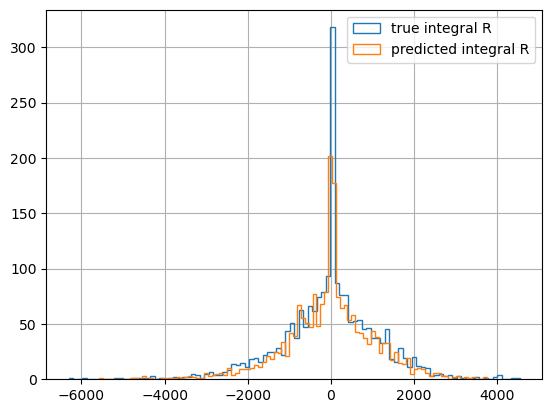

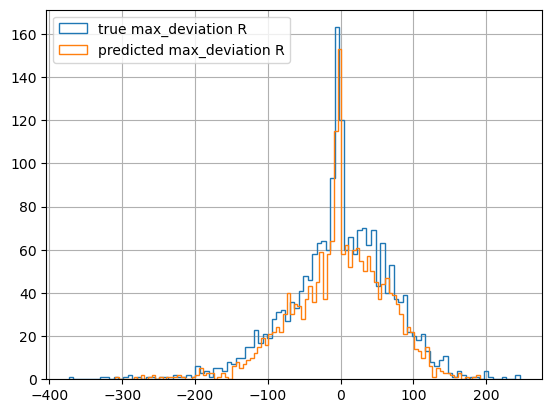

In [188]:
plt.figure()
plt.hist(test_df['true_integral_R'], histtype='step', bins=100, label='true integral R')
plt.hist(test_df['pred_integral_R'], histtype='step', bins=100, label='predicted integral R')
# plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.hist(test_df['true_max_deviation'], histtype='step', bins=100, label='true max_deviation R')
plt.hist(test_df['pred_max_deviation'], histtype='step', bins=100, label='predicted max_deviation R')
# plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

#### Classification using the predicted integral_R and max_deviation by the Regressor

In [156]:
# First split: separate test set (20% of total data)
X_temp, X_test, y_temp, y_test = train_test_split(
    pred_df, y_classifier, 
    test_size=0.2, # 20% for testing
    random_state=42
)

# Second split: divide remaining data into train and validation (80% train, 20% validation of remaining data)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.2, # 20% of the X_temp for validation ==> 16% for validation and 64% for training
    random_state=42
)

In [157]:
# Convert to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    # 'max_depth': 3,
    # 'learning_rate': 0.1,
    'learning_rate': 0.05, 'max_depth': 3,
    'objective': 'binary:logistic',  # for classification
    'eval_metric': 'logloss',
    'tree_method' : 'gpu_hist'
}

# Specify evaluation sets
evals = [(dtrain, 'train'), (dval, 'validation')]

# Train model
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    # num_boost_round = 200,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=True
)

[0]	train-logloss:0.52343	validation-logloss:0.52315
[1]	train-logloss:0.48902	validation-logloss:0.48852
[2]	train-logloss:0.45877	validation-logloss:0.45805


[3]	train-logloss:0.43185	validation-logloss:0.43094
[4]	train-logloss:0.40770	validation-logloss:0.40664
[5]	train-logloss:0.38579	validation-logloss:0.38456
[6]	train-logloss:0.36593	validation-logloss:0.36458
[7]	train-logloss:0.34778	validation-logloss:0.34633
[8]	train-logloss:0.33114	validation-logloss:0.32961
[9]	train-logloss:0.31580	validation-logloss:0.31424
[10]	train-logloss:0.30166	validation-logloss:0.30002
[11]	train-logloss:0.28851	validation-logloss:0.28680
[12]	train-logloss:0.27636	validation-logloss:0.27454
[13]	train-logloss:0.26501	validation-logloss:0.26314
[14]	train-logloss:0.25448	validation-logloss:0.25253
[15]	train-logloss:0.24463	validation-logloss:0.24261
[16]	train-logloss:0.23548	validation-logloss:0.23341
[17]	train-logloss:0.22688	validation-logloss:0.22474
[18]	train-logloss:0.21887	validation-logloss:0.21668
[19]	train-logloss:0.21133	validation-logloss:0.20907
[20]	train-logloss:0.20430	validation-logloss:0.20198
[21]	train-logloss:0.19766	validati

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:37:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[58]	train-logloss:0.10198	validation-logloss:0.09897
[59]	train-logloss:0.10125	validation-logloss:0.09824
[60]	train-logloss:0.10054	validation-logloss:0.09753
[61]	train-logloss:0.09986	validation-logloss:0.09685
[62]	train-logloss:0.09922	validation-logloss:0.09621
[63]	train-logloss:0.09861	validation-logloss:0.09559
[64]	train-logloss:0.09804	validation-logloss:0.09502
[65]	train-logloss:0.09750	validation-logloss:0.09446
[66]	train-logloss:0.09699	validation-logloss:0.09392
[67]	train-logloss:0.09651	validation-logloss:0.09343
[68]	train-logloss:0.09605	validation-logloss:0.09294
[69]	train-logloss:0.09562	validation-logloss:0.09248
[70]	train-logloss:0.09521	validation-logloss:0.09205
[71]	train-logloss:0.09480	validation-logloss:0.09162
[72]	train-logloss:0.09443	validation-logloss:0.09123
[73]	train-logloss:0.09408	validation-logloss:0.09084
[74]	train-logloss:0.09373	validation-logloss:0.09049
[75]	train-logloss:0.09339	validation-logloss:0.09016
[76]	train-logloss:0.09308	v

In [158]:
# Make predictions
preds = model.predict(dtest)
preds

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:37:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


array([[9.9947578e-01, 4.8818302e-04, 2.9245991e-04, 3.7122081e-04],
       [4.4144890e-01, 4.2444682e-03, 3.4826539e-02, 6.4001924e-01],
       [8.9922595e-01, 1.4097232e-01, 5.7262438e-03, 2.4425199e-03],
       ...,
       [9.9947578e-01, 4.8818302e-04, 2.9245991e-04, 3.7122081e-04],
       [7.9903525e-04, 7.9200801e-04, 2.3775561e-04, 9.9939680e-01],
       [7.9903525e-04, 7.9200801e-04, 2.3775561e-04, 9.9939680e-01]],
      dtype=float32)

In [159]:
columns = targets
predClass_df = pd.DataFrame(preds, index=X_test.index, columns=columns)
predClass_df

,class_c1,class_c2,class_c3,class_c4
3842,0.999476,0.000488,0.000292,0.000371
6480,0.441449,0.004244,0.034827,0.640019
4521,0.899226,0.140972,0.005726,0.002443
4026,0.021248,0.000999,0.003273,0.977481
10111,0.023386,0.000618,0.000238,0.974660
...,...,...,...,...
5474,0.001340,0.001112,0.000238,0.997804
3057,0.999526,0.000474,0.000292,0.000371
3123,0.999476,0.000488,0.000292,0.000371
9148,0.000799,0.000792,0.000238,0.999397


In [160]:
predClass_df['predicted_class'] = predClass_df.idxmax(axis=1)
predClass_df

,class_c1,class_c2,class_c3,class_c4,predicted_class
3842,0.999476,0.000488,0.000292,0.000371,class_c1
6480,0.441449,0.004244,0.034827,0.640019,class_c4
4521,0.899226,0.140972,0.005726,0.002443,class_c1
4026,0.021248,0.000999,0.003273,0.977481,class_c4
10111,0.023386,0.000618,0.000238,0.974660,class_c4
...,...,...,...,...,...
5474,0.001340,0.001112,0.000238,0.997804,class_c4
3057,0.999526,0.000474,0.000292,0.000371,class_c1
3123,0.999476,0.000488,0.000292,0.000371,class_c1
9148,0.000799,0.000792,0.000238,0.999397,class_c4


In [161]:
test_df = pd.concat([X_test, pd.DataFrame(y_test.idxmax(axis=1), columns=['trueClass']), predClass_df['predicted_class']], axis=1)
test_df['trueClass'] = test_df['trueClass'].apply(lambda x: '_'.join(x.split('_')[1:]))
test_df['predicted_class'] = test_df['predicted_class'].apply(lambda x: '_'.join(x.split('_')[1:]))

In [162]:
Accuracy = (np.sum(test_df['trueClass']==test_df['predicted_class'])/len(test_df['trueClass']))*100
print(f'Accuracy of the prediction = {np.round(Accuracy,2)}%')

Accuracy of the prediction = 91.02%


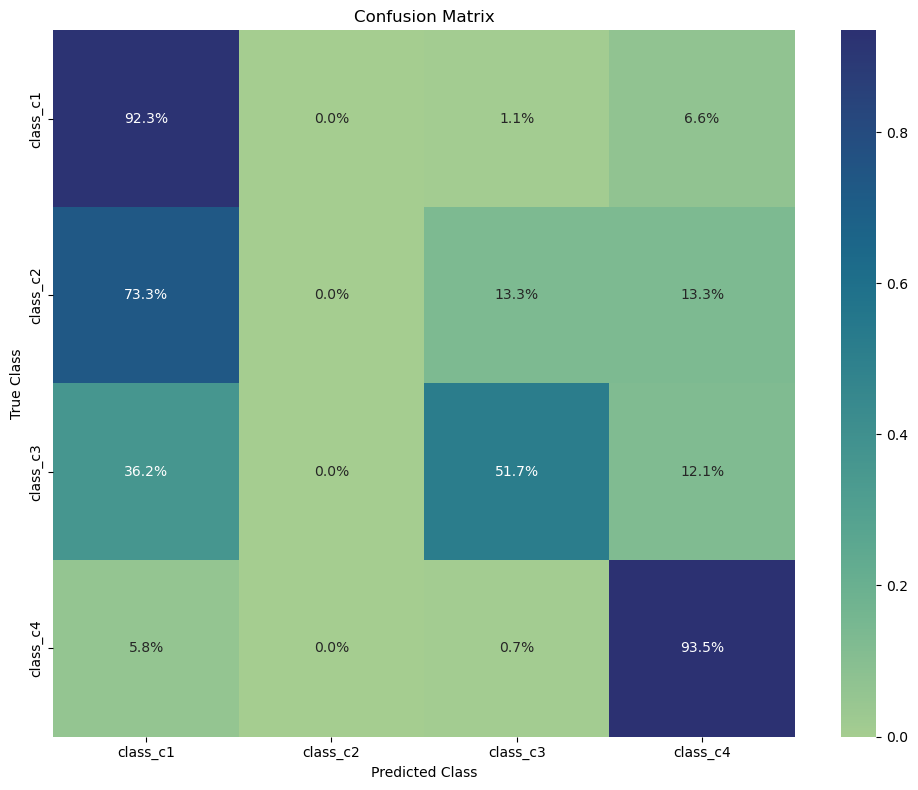

In [163]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_true=test_df['trueClass'], y_pred=test_df['predicted_class'])

# Create a figure and axis
plt.figure(figsize=(10, 8))

# Create heatmap
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.1%', cmap='crest',
            # xticklabels=['Overshoot', 'Undershoot', 'Ideal', 'Singularity', 'Abnormal'],  # If your classes are 0-4
            # yticklabels=['Overshoot', 'Undershoot', 'Ideal', 'Singularity', 'Abnormal'])  # If your classes are 0-4
            xticklabels=targets,
            yticklabels=targets)

# Add labels
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')

# Show plot
plt.tight_layout()
plt.show()

* Accuracy of the prediction and purity of the predicted classes : bad
* => One solution: try to classify the data using the true values first. Then visualize the response function, what could be the possible reasons of the confusion.

In [189]:
## Classification using true values instead of the ones predicted by the regressor
# First split: separate test set (20% of total data)
X_temp, X_test, y_temp, y_test = train_test_split(
    y_regressor, y_classifier, 
    test_size=0.2, # 20% for testing
    random_state=42
)

# Second split: divide remaining data into train and validation (80% train, 20% validation of remaining data)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.2, # 20% of the X_temp for validation ==> 16% for validation and 64% for training
    random_state=42
)

In [190]:
# Convert to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    # 'max_depth': 3,
    # 'learning_rate': 0.1,
    'learning_rate': 0.05, 'max_depth': 3,
    'objective': 'binary:logistic',  # for classification
    'eval_metric': 'logloss',
    'tree_method' : 'gpu_hist'
}

# Specify evaluation sets
evals = [(dtrain, 'train'), (dval, 'validation')]

# Train model
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    # num_boost_round = 200,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=True
)

[0]	train-logloss:0.51730	validation-logloss:0.51723
[1]	train-logloss:0.47774	validation-logloss:0.47761


[2]	train-logloss:0.44306	validation-logloss:0.44288
[3]	train-logloss:0.41225	validation-logloss:0.41203
[4]	train-logloss:0.38419	validation-logloss:0.38401
[5]	train-logloss:0.35883	validation-logloss:0.35869
[6]	train-logloss:0.33576	validation-logloss:0.33565
[7]	train-logloss:0.31467	validation-logloss:0.31459
[8]	train-logloss:0.29530	validation-logloss:0.29525
[9]	train-logloss:0.27745	validation-logloss:0.27742
[10]	train-logloss:0.26096	validation-logloss:0.26095
[11]	train-logloss:0.24567	validation-logloss:0.24568
[12]	train-logloss:0.23146	validation-logloss:0.23150
[13]	train-logloss:0.21823	validation-logloss:0.21832
[14]	train-logloss:0.20590	validation-logloss:0.20603
[15]	train-logloss:0.19438	validation-logloss:0.19455
[16]	train-logloss:0.18361	validation-logloss:0.18382
[17]	train-logloss:0.17352	validation-logloss:0.17377
[18]	train-logloss:0.16407	validation-logloss:0.16435
[19]	train-logloss:0.15519	validation-logloss:0.15552
[20]	train-logloss:0.14686	validatio

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:04:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[50]	train-logloss:0.03152	validation-logloss:0.03235
[51]	train-logloss:0.03005	validation-logloss:0.03089
[52]	train-logloss:0.02863	validation-logloss:0.02947
[53]	train-logloss:0.02727	validation-logloss:0.02813
[54]	train-logloss:0.02598	validation-logloss:0.02686
[55]	train-logloss:0.02476	validation-logloss:0.02564
[56]	train-logloss:0.02363	validation-logloss:0.02451
[57]	train-logloss:0.02252	validation-logloss:0.02342
[58]	train-logloss:0.02147	validation-logloss:0.02239
[59]	train-logloss:0.02047	validation-logloss:0.02140
[60]	train-logloss:0.01953	validation-logloss:0.02046
[61]	train-logloss:0.01863	validation-logloss:0.01958
[62]	train-logloss:0.01780	validation-logloss:0.01875
[63]	train-logloss:0.01699	validation-logloss:0.01795
[64]	train-logloss:0.01621	validation-logloss:0.01719
[65]	train-logloss:0.01548	validation-logloss:0.01646
[66]	train-logloss:0.01477	validation-logloss:0.01577
[67]	train-logloss:0.01414	validation-logloss:0.01513
[68]	train-logloss:0.01351	v

In [191]:
# Make predictions
preds = model.predict(dtest)
preds

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:04:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


array([[9.9972504e-01, 1.8576359e-04, 2.5229473e-04, 1.9972571e-04],
       [1.8311235e-04, 2.7918696e-04, 2.5108046e-04, 9.9971956e-01],
       [9.9972504e-01, 1.8576359e-04, 2.5229473e-04, 1.9972571e-04],
       ...,
       [9.9972504e-01, 1.8576359e-04, 2.5229473e-04, 1.9972571e-04],
       [1.8311235e-04, 1.8622862e-04, 2.5108046e-04, 9.9971956e-01],
       [1.8311235e-04, 1.8622862e-04, 2.5108046e-04, 9.9971956e-01]],
      dtype=float32)

In [192]:
columns = targets
predClass_df = pd.DataFrame(preds, index=X_test.index, columns=columns)
predClass_df

,class_c1,class_c2,class_c3,class_c4
3842,0.999725,0.000186,0.000252,0.00020
6480,0.000183,0.000279,0.000251,0.99972
4521,0.999725,0.000186,0.000252,0.00020
4026,0.999725,0.000186,0.000252,0.00020
10111,0.000183,0.000186,0.000251,0.99972
...,...,...,...,...
5474,0.000183,0.000186,0.000251,0.99972
3057,0.999725,0.000186,0.000252,0.00020
3123,0.999725,0.000186,0.000252,0.00020
9148,0.000183,0.000186,0.000251,0.99972


In [193]:
predClass_df['predicted_class'] = predClass_df.idxmax(axis=1)
predClass_df

,class_c1,class_c2,class_c3,class_c4,predicted_class
3842,0.999725,0.000186,0.000252,0.00020,class_c1
6480,0.000183,0.000279,0.000251,0.99972,class_c4
4521,0.999725,0.000186,0.000252,0.00020,class_c1
4026,0.999725,0.000186,0.000252,0.00020,class_c1
10111,0.000183,0.000186,0.000251,0.99972,class_c4
...,...,...,...,...,...
5474,0.000183,0.000186,0.000251,0.99972,class_c4
3057,0.999725,0.000186,0.000252,0.00020,class_c1
3123,0.999725,0.000186,0.000252,0.00020,class_c1
9148,0.000183,0.000186,0.000251,0.99972,class_c4


In [194]:
test_df = pd.concat([X_test, pd.DataFrame(y_test.idxmax(axis=1), columns=['trueClass']), predClass_df['predicted_class']], axis=1)
# test_df['trueClass'] = test_df['trueClass'].apply(lambda x: '_'.join(x.split('_')[1:]))
# test_df['predicted_class'] = test_df['predicted_class'].apply(lambda x: '_'.join(x.split('_')[1:]))
test_df

,integral_R,max_deviation,trueClass,predicted_class
3842,-2301.010830,-86.686725,class_c1,class_c1
6480,15.333931,3.782113,class_c4,class_c4
4521,-994.845933,-22.102865,class_c1,class_c1
4026,-1137.906462,-32.975760,class_c1,class_c1
10111,589.095070,59.747377,class_c4,class_c4
...,...,...,...,...
5474,1116.573543,71.409375,class_c4,class_c4
3057,-512.107397,-44.297583,class_c1,class_c1
3123,-926.358642,-46.112591,class_c1,class_c1
9148,2457.102655,104.155336,class_c4,class_c4


In [195]:
Accuracy = (np.sum(test_df['trueClass']==test_df['predicted_class'])/len(test_df['trueClass']))*100
print(f'Accuracy of the prediction = {np.round(Accuracy,5)}%')

Accuracy of the prediction = 100.0%


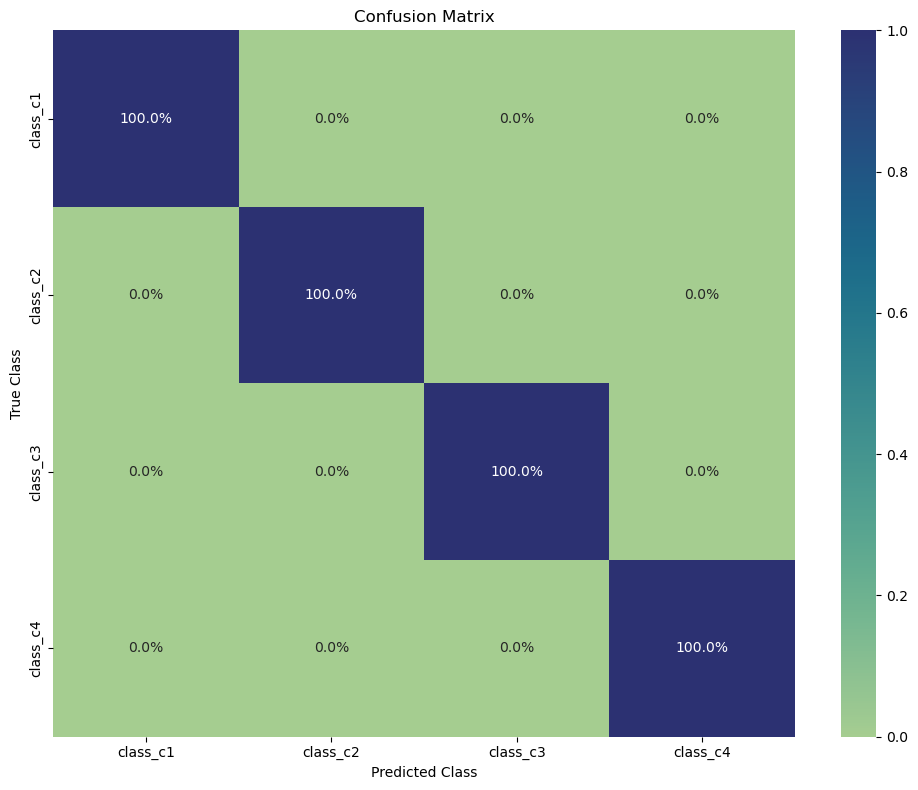

In [196]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_true=test_df['trueClass'], y_pred=test_df['predicted_class'])

# Create a figure and axis
plt.figure(figsize=(10, 8))

# Create heatmap
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.1%', cmap='crest',
            # xticklabels=['Overshoot', 'Undershoot', 'Ideal', 'Singularity', 'Abnormal'],  # If your classes are 0-4
            # yticklabels=['Overshoot', 'Undershoot', 'Ideal', 'Singularity', 'Abnormal'])  # If your classes are 0-4
            xticklabels=targets,
            yticklabels=targets)

# Add labels
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')

# Show plot
plt.tight_layout()
plt.show()

In [175]:
### Prediction of the classes corresponding to the predicted output of the regressor
pred_df.columns = cols
pred_dmatrix = xgb.DMatrix(pred_df)
pred_of_pred = model.predict(pred_dmatrix)
pred_of_pred

array([[9.9972504e-01, 2.2458569e-04, 2.5229473e-04, 1.9972571e-04],
       [9.9972504e-01, 2.5035426e-04, 2.5229473e-04, 1.9972571e-04],
       [9.9972504e-01, 1.8576359e-04, 2.5229473e-04, 1.9972571e-04],
       ...,
       [1.8311235e-04, 1.8622862e-04, 2.5108046e-04, 9.9971956e-01],
       [1.8311235e-04, 1.8622862e-04, 2.5108046e-04, 9.9971956e-01],
       [1.8311235e-04, 2.5100581e-04, 2.5108046e-04, 9.9971956e-01]],
      dtype=float32)

In [176]:
columns = targets
predClass_df = pd.DataFrame(pred_of_pred, index=pred_df.index, columns=columns)
predClass_df

,class_c1,class_c2,class_c3,class_c4
0,0.999725,0.000225,0.000252,0.000200
1,0.999725,0.000250,0.000252,0.000200
2,0.999725,0.000186,0.000252,0.000200
3,0.999725,0.000250,0.000252,0.000200
4,0.999725,0.000186,0.000252,0.000200
...,...,...,...,...
10235,0.000183,0.000186,0.000251,0.999720
10236,0.000183,0.000279,0.604354,0.809888
10237,0.000183,0.000186,0.000251,0.999720
10238,0.000183,0.000186,0.000251,0.999720


In [177]:
predClass_df['predicted_class'] = predClass_df.idxmax(axis=1)
predClass_df

,class_c1,class_c2,class_c3,class_c4,predicted_class
0,0.999725,0.000225,0.000252,0.000200,class_c1
1,0.999725,0.000250,0.000252,0.000200,class_c1
2,0.999725,0.000186,0.000252,0.000200,class_c1
3,0.999725,0.000250,0.000252,0.000200,class_c1
4,0.999725,0.000186,0.000252,0.000200,class_c1
...,...,...,...,...,...
10235,0.000183,0.000186,0.000251,0.999720,class_c4
10236,0.000183,0.000279,0.604354,0.809888,class_c4
10237,0.000183,0.000186,0.000251,0.999720,class_c4
10238,0.000183,0.000186,0.000251,0.999720,class_c4
